# Walter Piper - Springboard Capstone 2 - Notebook for EMG preprocessing and exploration

In [1]:
import numpy as np
from biosppy import signals
from glob import glob
import pandas as pd
from time import time
import matplotlib.pyplot as plt

In [2]:
# Check for data files from all 15 subjects
path = 'D:\\Springboard\\Capstone2\\WESAD\\Capstone2\\data\\raw\\'
#Subjects S1 and S12 had sensor errors and are not included in download
pkl_dict = {'S'+str(i) : glob(path+'S'+str(i)+'\\S'+str(i)+'*.pkl', recursive=True)[0] for i in range(2,18,1) if i != 12} #Signal data

for dictionary, name in zip([pkl_dict], ['signal data']):
    print(name,':')
    for subjectID, pathstring in dictionary.items():
        print(subjectID,': ',pathstring)
    print('\n')

signal data :
S2 :  D:\Springboard\Capstone2\WESAD\Capstone2\data\raw\S2\S2.pkl
S3 :  D:\Springboard\Capstone2\WESAD\Capstone2\data\raw\S3\S3.pkl
S4 :  D:\Springboard\Capstone2\WESAD\Capstone2\data\raw\S4\S4.pkl
S5 :  D:\Springboard\Capstone2\WESAD\Capstone2\data\raw\S5\S5.pkl
S6 :  D:\Springboard\Capstone2\WESAD\Capstone2\data\raw\S6\S6.pkl
S7 :  D:\Springboard\Capstone2\WESAD\Capstone2\data\raw\S7\S7.pkl
S8 :  D:\Springboard\Capstone2\WESAD\Capstone2\data\raw\S8\S8.pkl
S9 :  D:\Springboard\Capstone2\WESAD\Capstone2\data\raw\S9\S9.pkl
S10 :  D:\Springboard\Capstone2\WESAD\Capstone2\data\raw\S10\S10.pkl
S11 :  D:\Springboard\Capstone2\WESAD\Capstone2\data\raw\S11\S11.pkl
S13 :  D:\Springboard\Capstone2\WESAD\Capstone2\data\raw\S13\S13.pkl
S14 :  D:\Springboard\Capstone2\WESAD\Capstone2\data\raw\S14\S14.pkl
S15 :  D:\Springboard\Capstone2\WESAD\Capstone2\data\raw\S15\S15.pkl
S16 :  D:\Springboard\Capstone2\WESAD\Capstone2\data\raw\S16\S16.pkl
S17 :  D:\Springboard\Capstone2\WESAD\Capsto

In [3]:
def check_pkl_raw(Subj_ID, pkl_filepaths, return_data=False):
    """
    Check the integrity of raw time series data for a given subject.
    Input: 
        Subj_ID: string ('S2'-'S17')
        pkl_filepaths: dictionary of paths with Subj_ID as key
        return_data: Boolean. Indicates whether data should be returned at end of function
    Output (if requested by return_data keyword):
        dict_signal_single_subject: Dictionary containing data for the subject Subj_ID. 
    """    
    # LOAD DICTIONARY FROM PKL FILE
    dict_signal_single_subject = pd.read_pickle(pkl_filepaths[Subj_ID]) # Load pickle file
    print('Dictionary from .pkl file has keys:',dict_signal_single_subject.keys())
    # Check type, length of each key's value
    for key in dict_signal_single_subject.keys():
        print(key, ' is type:' , type(dict_signal_single_subject[key]), ' with length:', len(dict_signal_single_subject[key]))
        
    print('\n')
    print('SUBJECT #:',dict_signal_single_subject['subject'])
    
    # LABEL VALUES SHOW TEMPORAL STRUCTURE OF EXPERIMENT
    print('\n')
    print('LABEL unique values:',np.unique(dict_signal_single_subject['label'])) 
    # readme.pdf described label array as labels for the different experimental segments within the research design
    label_dict = {'0':'not defined/transient' ,'1':'baseline' ,'2':'stress' ,'3':'amusement' ,'4':'meditation' ,'5':'ignore' ,'6':'ignore' ,'7':'ignore' }
    print(label_dict)
    plt.plot(np.linspace(0, 6079, len(dict_signal_single_subject['label'])), dict_signal_single_subject['label'])
    plt.title(dict_signal_single_subject['subject']+' label array')
    plt.xlabel('time (s)')
    plt.ylabel('LABEL CODE')
    plt.show()
    
    # EXAMINE PHYSIOLOGY SIGNAL ARRAYS
    print('\n')
    print('SIGNAL KEYS:',dict_signal_single_subject['signal'].keys())
    print('chest:', type(dict_signal_single_subject['signal']['chest']), 'has keys:', dict_signal_single_subject['signal']['chest'].keys()) # Chest = RespiBAN data
    print('wrist:',type(dict_signal_single_subject['signal']['wrist']), 'has keys:', dict_signal_single_subject['signal']['wrist'].keys()) # Wrist = Empatica E4 data
    Wrist_Hz_dict = {'ACC':32, 'BVP':64, 'EDA':4, 'TEMP':4} # Frequency for Wrist device channels
    Chest_Hz_dict = {'ACC':700, 'ECG':700, 'EMG':700, 'EDA':700, 'Temp':700, 'Resp':700} # Frequency for Chest device channels
    # Plot histograms for each recording channel
    for device, device_name, Hz_dict in zip(['chest', 'wrist'], ['Chest (RespiBAN) sensor', 'Wrist (Empatica E4) sensor'], [Chest_Hz_dict, Wrist_Hz_dict]):
        print('\n',device_name)
        fig, axes = plt.subplots(1, len(dict_signal_single_subject['signal'][device].keys()), figsize=[16,2.5])
        for key, ax in zip(dict_signal_single_subject['signal'][device].keys(), axes):
            sig_array = dict_signal_single_subject['signal'][device][key]
            print(key, 'array has shape:', sig_array.shape, 'at',Hz_dict[key], 'Hz for a total of ', sig_array.shape[0]/Hz_dict[key],'seconds')
            sample = np.random.choice(sig_array.flatten(), size=10000)
            ax.hist(sample, bins=20)
            ax.set_title(key)
        fig.suptitle(device_name+'\nHistograms of 10000 randomly sampled datapoints')
        plt.tight_layout()
        plt.show()
    print('\n----------------------------------------------------------------------------\n')
    
    if return_data == True:
        return dict_signal_single_subject

Dictionary from .pkl file has keys: dict_keys(['signal', 'label', 'subject'])
signal  is type: <class 'dict'>  with length: 2
label  is type: <class 'numpy.ndarray'>  with length: 4255300
subject  is type: <class 'str'>  with length: 2


SUBJECT #: S2


LABEL unique values: [0 1 2 3 4 6 7]
{'0': 'not defined/transient', '1': 'baseline', '2': 'stress', '3': 'amusement', '4': 'meditation', '5': 'ignore', '6': 'ignore', '7': 'ignore'}


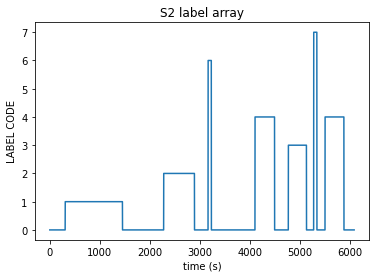



SIGNAL KEYS: dict_keys(['chest', 'wrist'])
chest: <class 'dict'> has keys: dict_keys(['ACC', 'ECG', 'EMG', 'EDA', 'Temp', 'Resp'])
wrist: <class 'dict'> has keys: dict_keys(['ACC', 'BVP', 'EDA', 'TEMP'])

 Chest (RespiBAN) sensor
ACC array has shape: (4255300, 3) at 700 Hz for a total of  6079.0 seconds
ECG array has shape: (4255300, 1) at 700 Hz for a total of  6079.0 seconds
EMG array has shape: (4255300, 1) at 700 Hz for a total of  6079.0 seconds
EDA array has shape: (4255300, 1) at 700 Hz for a total of  6079.0 seconds
Temp array has shape: (4255300, 1) at 700 Hz for a total of  6079.0 seconds
Resp array has shape: (4255300, 1) at 700 Hz for a total of  6079.0 seconds


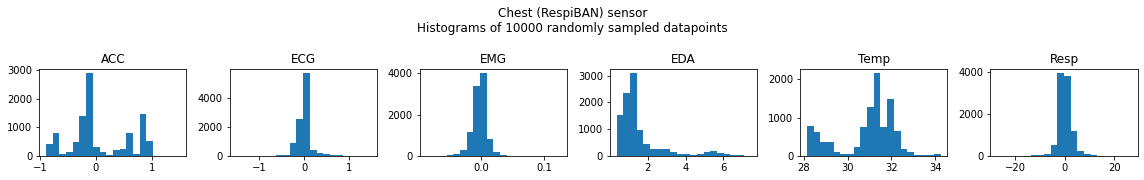


 Wrist (Empatica E4) sensor
ACC array has shape: (194528, 3) at 32 Hz for a total of  6079.0 seconds
BVP array has shape: (389056, 1) at 64 Hz for a total of  6079.0 seconds
EDA array has shape: (24316, 1) at 4 Hz for a total of  6079.0 seconds
TEMP array has shape: (24316, 1) at 4 Hz for a total of  6079.0 seconds


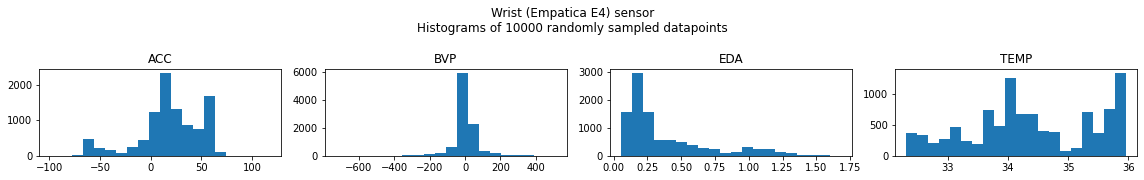


----------------------------------------------------------------------------

Elapsed time: 8.030363082885742


In [4]:
t0 = time()
S_signal = check_pkl_raw('S2', pkl_dict, return_data=True)
print('Elapsed time:',time() - t0)

In [7]:
EMG_y = S_signal['signal']['chest']['EMG']
EMG_x = np.linspace(0, len(EMG_y)/700, len(EMG_y), endpoint=False)
print(len(EMG_y), len(EMG_x))
print(EMG_x[0], EMG_x[-1])

4255300 4255300
0.0 6078.998571428571


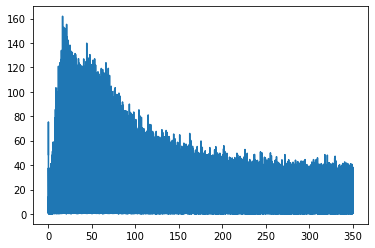

In [25]:
sp = np.fft.rfft(EMG_y.flatten())
freq = np.fft.rfftfreq(EMG_y.shape[0], 1/700)
plt.plot(freq[10:], abs(sp[:1+int(len(EMG_x)/2)])[10:])

In [22]:
EMG_y.flatten().shape

(4255300,)

In [34]:
import scipy.signal
EMG_y = EMG_y.flatten()

In [35]:
f, t, Sxx = scipy.signal.spectrogram(EMG_y, fs=700, nperseg=175)
print(f.shape, t.shape, Sxx.shape)

(88,) (27631,) (88, 27631)


In [37]:
print(f)

[  0.   4.   8.  12.  16.  20.  24.  28.  32.  36.  40.  44.  48.  52.
  56.  60.  64.  68.  72.  76.  80.  84.  88.  92.  96. 100. 104. 108.
 112. 116. 120. 124. 128. 132. 136. 140. 144. 148. 152. 156. 160. 164.
 168. 172. 176. 180. 184. 188. 192. 196. 200. 204. 208. 212. 216. 220.
 224. 228. 232. 236. 240. 244. 248. 252. 256. 260. 264. 268. 272. 276.
 280. 284. 288. 292. 296. 300. 304. 308. 312. 316. 320. 324. 328. 332.
 336. 340. 344. 348.]


5937 7108


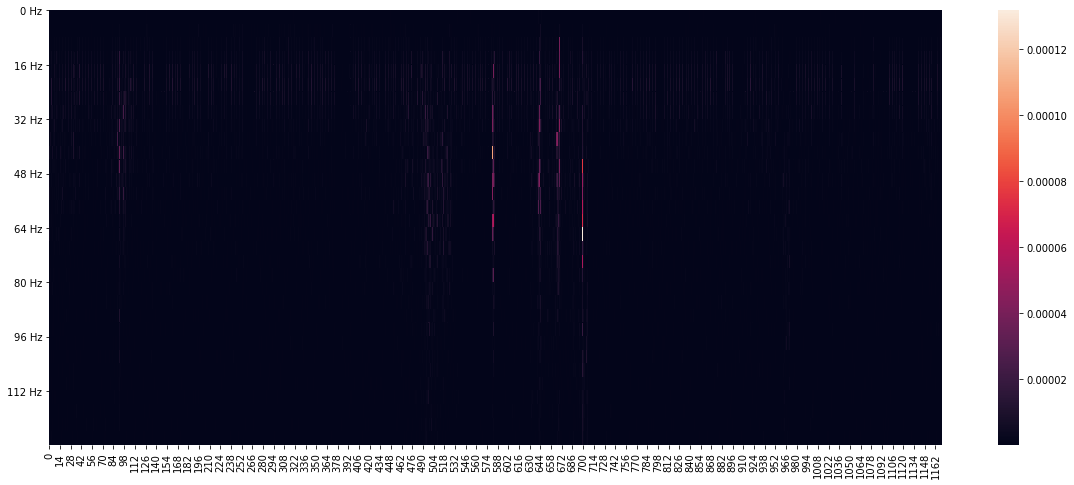

In [123]:
import seaborn as sns
import matplotlib.ticker
def Hz_formatter(x):
    """
    Input:
        x : value
        pos : position
    Output:
        label string
    """
    output_labels=[]
    for value in list(x):
        output_labels.append(str(x)+' Hz')
    return output_labels
    
s = int(1039000/175)
e = int(1244000/175)
print(s,e)
fig, ax = plt.subplots(1,1,figsize=[20,8])
sns.heatmap(Sxx[:32,s:e], ax=ax)
ax.set_yticks(np.arange(0, len(f[:32]), 4))
ax.set_yticklabels([str(int(x))+' Hz' for x in list(f[:32:4])], rotation=0)
#ax.set_xticks(np.arange(0, e-s, 2))
#ax.set_xticklabels([str(np.round(x,1))+' s' for x in t[s:e:2]])
#ax.xaxis.set_major_formatter(matplotlib.ticker.FormatStrFormatter('%.1f'))
plt.show()

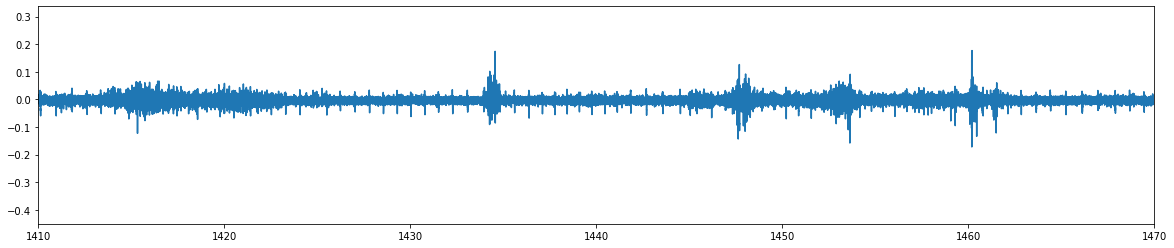

In [134]:
plt.figure(figsize=[20,4])
plt.plot(EMG_x, EMG_y)
plt.xlim(1410, 1470)
plt.show()

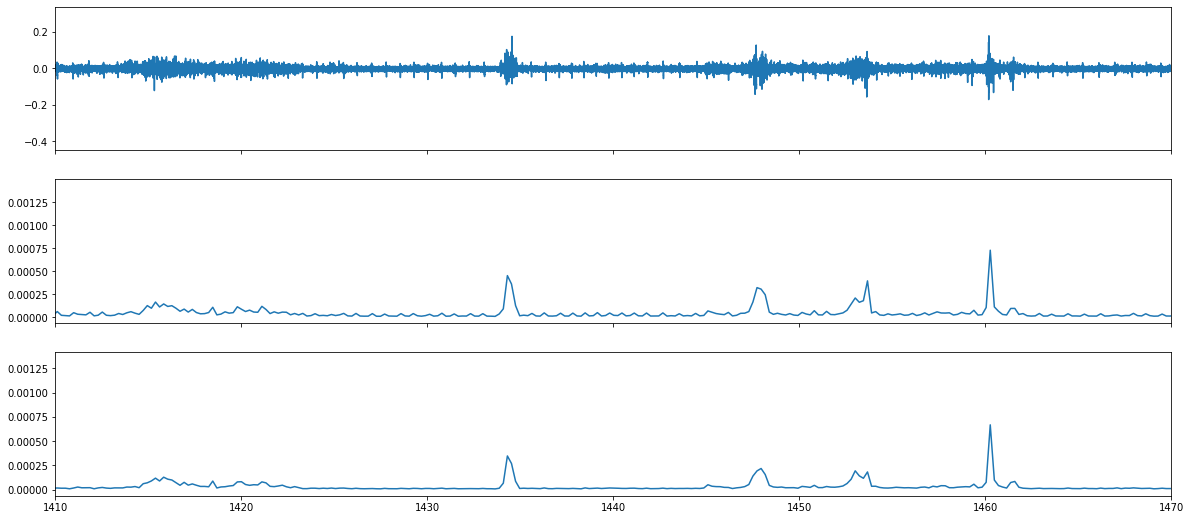

In [150]:
fig, ax = plt.subplots(3,1,figsize=[20,9],sharex=True)
ax[0].plot(EMG_x, EMG_y)
temp_array = np.sum(Sxx[:], axis=0)
ax[1].plot(t, temp_array)
ax[1].set_xlim(1410, 1470)
temp_array2 = np.sum(Sxx[9:], axis=0)
ax[2].plot(t, temp_array2)
plt.show()

In [215]:
def highpass_filter(y, sr):
  filter_stop_freq = 32  # Hz
  filter_pass_freq = 40  # Hz
  numtaps = 115

  # High-pass filter
  nyquist_rate = sr / 2.
  desired = (0, 0, 1, 1)
  bands = (0, filter_stop_freq, filter_pass_freq, nyquist_rate)
  filter_coefs = scipy.signal.firls(numtaps, bands, desired, fs=700)

  # Apply high-pass filter
  filtered_emg = scipy.signal.filtfilt(filter_coefs, [1], y)
  return filtered_emg

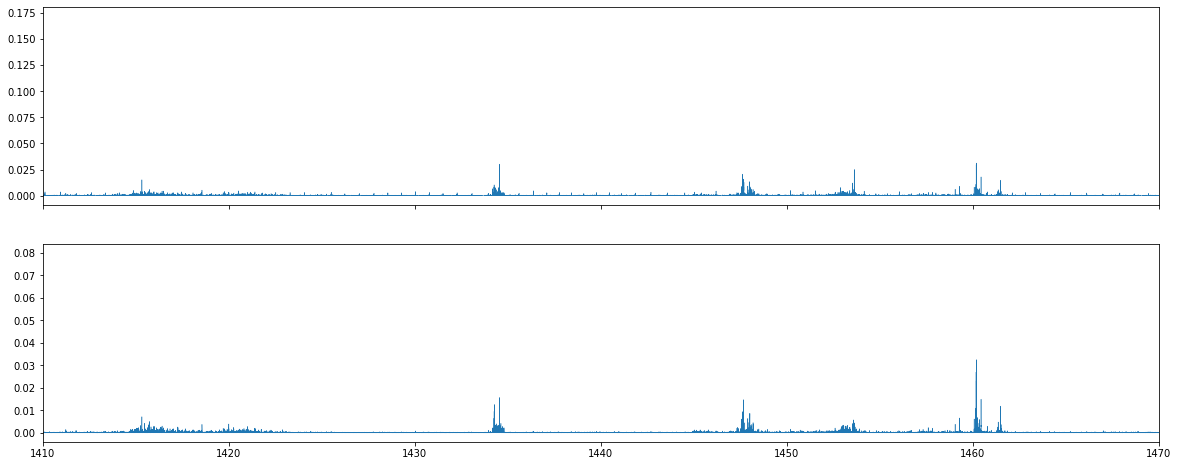

In [200]:
filtered_emg = highpass_filter(EMG_y, sr=700)
fig, ax = plt.subplots(2,1,sharex=True, figsize=[20,8])
ax[0].plot(EMG_x, EMG_y**2, lw=0.5)
ax[1].plot(EMG_x, filtered_emg**2, lw=0.5)
ax[1].set_xlim(1410, 1470)
plt.show()

# It appears I can run a high-pass filter eliminating everything below 36 Hz
# Now to batch process subjects

Dictionary from .pkl file has keys: dict_keys(['signal', 'label', 'subject'])
signal  is type: <class 'dict'>  with length: 2
label  is type: <class 'numpy.ndarray'>  with length: 4545100
subject  is type: <class 'str'>  with length: 2


SUBJECT #: S3


LABEL unique values: [0 1 2 3 4 5 6 7]
{'0': 'not defined/transient', '1': 'baseline', '2': 'stress', '3': 'amusement', '4': 'meditation', '5': 'ignore', '6': 'ignore', '7': 'ignore'}


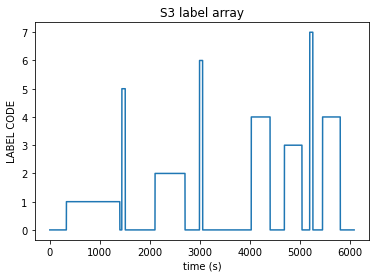



SIGNAL KEYS: dict_keys(['chest', 'wrist'])
chest: <class 'dict'> has keys: dict_keys(['ACC', 'ECG', 'EMG', 'EDA', 'Temp', 'Resp'])
wrist: <class 'dict'> has keys: dict_keys(['ACC', 'BVP', 'EDA', 'TEMP'])

 Chest (RespiBAN) sensor
ACC array has shape: (4545100, 3) at 700 Hz for a total of  6493.0 seconds
ECG array has shape: (4545100, 1) at 700 Hz for a total of  6493.0 seconds
EMG array has shape: (4545100, 1) at 700 Hz for a total of  6493.0 seconds
EDA array has shape: (4545100, 1) at 700 Hz for a total of  6493.0 seconds
Temp array has shape: (4545100, 1) at 700 Hz for a total of  6493.0 seconds
Resp array has shape: (4545100, 1) at 700 Hz for a total of  6493.0 seconds


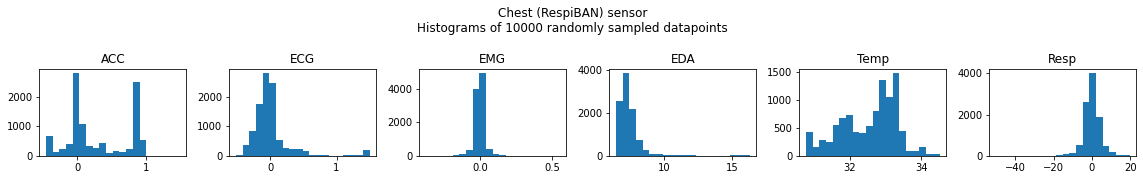


 Wrist (Empatica E4) sensor
ACC array has shape: (207776, 3) at 32 Hz for a total of  6493.0 seconds
BVP array has shape: (415552, 1) at 64 Hz for a total of  6493.0 seconds
EDA array has shape: (25972, 1) at 4 Hz for a total of  6493.0 seconds
TEMP array has shape: (25972, 1) at 4 Hz for a total of  6493.0 seconds


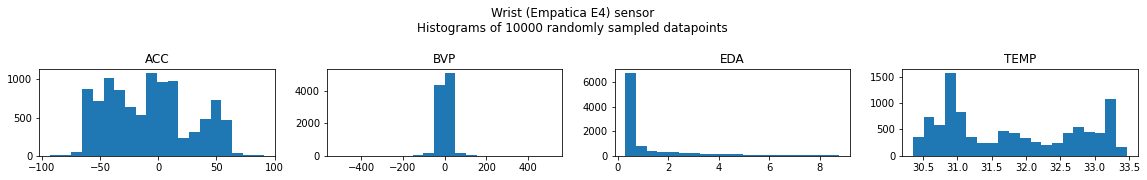


----------------------------------------------------------------------------

Elapsed time: 18.024598121643066
4545100 4545100
0.0 6492.998571428571


In [202]:
Subj_ID = 'S3'
t0 = time()
S_signal = check_pkl_raw(Subj_ID, pkl_dict, return_data=True)
print('Elapsed time:',time() - t0)

In [204]:
EMG_y = S_signal['signal']['chest']['EMG'].flatten()
EMG_x = np.linspace(0, len(EMG_y)/700, len(EMG_y), endpoint=False)
print(len(EMG_y), len(EMG_x))
print(EMG_x[0], EMG_x[-1])

4545100 4545100
0.0 6492.998571428571


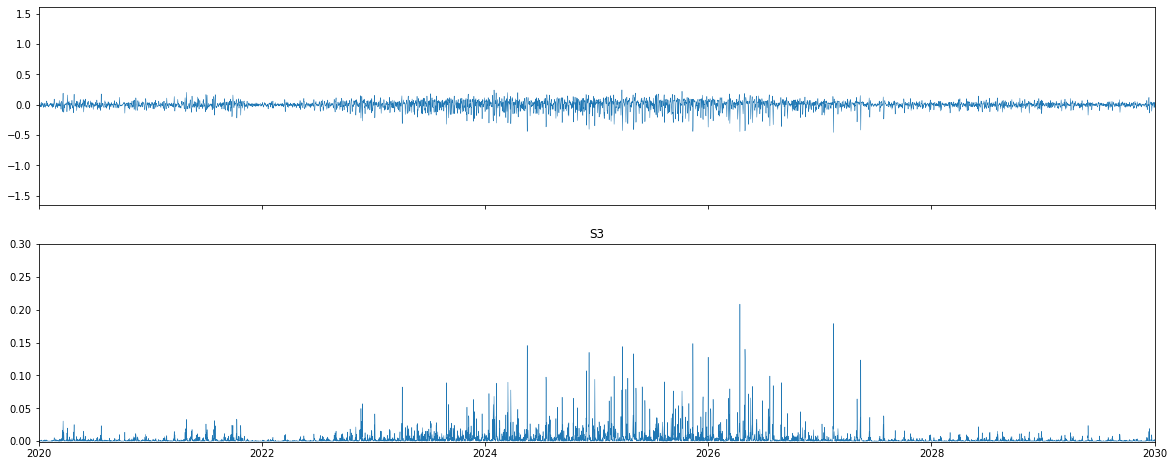

In [221]:
filtered_emg = highpass_filter(EMG_y, sr=700)
fig, ax = plt.subplots(2,1,sharex=True, figsize=[20,8])
ax[0].plot(EMG_x, EMG_y, lw=0.5)
ax[1].plot(EMG_x, filtered_emg**2, lw=0.5)
ax[1].set_xlim(2020, 2030)
ax[1].set_ylim(-0.001, 0.3)
ax[1].set_title(Subj_ID)
plt.show()

In [246]:
emg_df = pd.DataFrame(dict(time=EMG_x, emg=filtered_emg**2))
emg_df_time_index = pd.to_timedelta(emg_df.time, 'seconds')
emg_df.index = emg_df_time_index
emg_df.head()

time           emg
time                                             
0 days 00:00:00            0.000000  4.013194e-13
0 days 00:00:00.001428571  0.001429  2.251988e-03
0 days 00:00:00.002857143  0.002857  3.704678e-03
0 days 00:00:00.004285714  0.004286  7.534900e-04
0 days 00:00:00.005714286  0.005714  2.075124e-04

In [247]:

emg_rolling_mean = emg_df.resample('50ms').mean().dropna()
emg_rolling_mean.dropna().head()

time       emg
time                                      
0 days 00:00:00         0.024286  0.000620
0 days 00:00:00.050000  0.074286  0.001124
0 days 00:00:00.100000  0.124286  0.000174
0 days 00:00:00.150000  0.174286  0.001643
0 days 00:00:00.200000  0.224286  0.002100

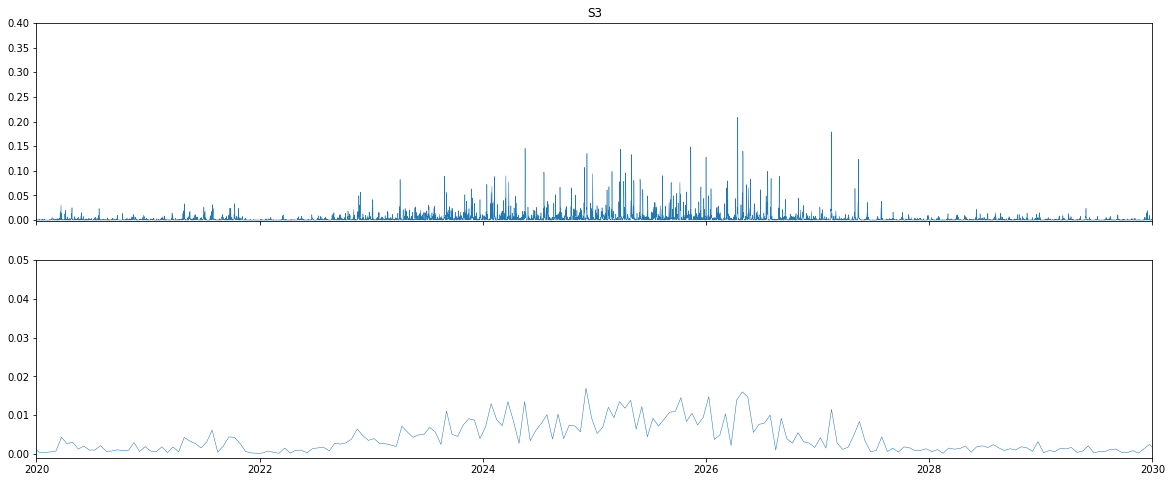

In [248]:
filtered_emg = highpass_filter(EMG_y, sr=700)
fig, ax = plt.subplots(2,1,sharex=True, figsize=[20,8])
ax[0].plot(EMG_x, filtered_emg**2, lw=0.5)
ax[0].set_xlim(2020, 2030)
ax[0].set_ylim(-0.001, 0.4)
ax[0].set_title(Subj_ID)
ax[1].plot(emg_rolling_mean.time.values, emg_rolling_mean.emg.values, lw=0.5)
ax[1].set_ylim(-0.001, 0.05)
plt.show()

# Now to batch process for real

Dictionary from .pkl file has keys: dict_keys(['signal', 'label', 'subject'])
signal  is type: <class 'dict'>  with length: 2
label  is type: <class 'numpy.ndarray'>  with length: 4255300
subject  is type: <class 'str'>  with length: 2


SUBJECT #: S2


LABEL unique values: [0 1 2 3 4 6 7]
{'0': 'not defined/transient', '1': 'baseline', '2': 'stress', '3': 'amusement', '4': 'meditation', '5': 'ignore', '6': 'ignore', '7': 'ignore'}


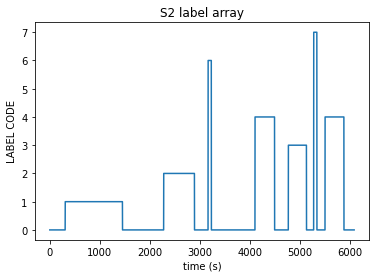



SIGNAL KEYS: dict_keys(['chest', 'wrist'])
chest: <class 'dict'> has keys: dict_keys(['ACC', 'ECG', 'EMG', 'EDA', 'Temp', 'Resp'])
wrist: <class 'dict'> has keys: dict_keys(['ACC', 'BVP', 'EDA', 'TEMP'])

 Chest (RespiBAN) sensor
ACC array has shape: (4255300, 3) at 700 Hz for a total of  6079.0 seconds
ECG array has shape: (4255300, 1) at 700 Hz for a total of  6079.0 seconds
EMG array has shape: (4255300, 1) at 700 Hz for a total of  6079.0 seconds
EDA array has shape: (4255300, 1) at 700 Hz for a total of  6079.0 seconds
Temp array has shape: (4255300, 1) at 700 Hz for a total of  6079.0 seconds
Resp array has shape: (4255300, 1) at 700 Hz for a total of  6079.0 seconds


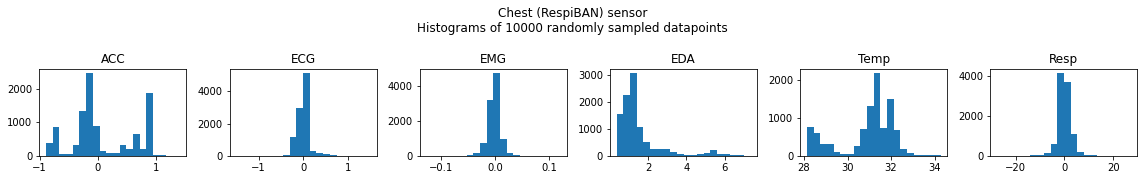


 Wrist (Empatica E4) sensor
ACC array has shape: (194528, 3) at 32 Hz for a total of  6079.0 seconds
BVP array has shape: (389056, 1) at 64 Hz for a total of  6079.0 seconds
EDA array has shape: (24316, 1) at 4 Hz for a total of  6079.0 seconds
TEMP array has shape: (24316, 1) at 4 Hz for a total of  6079.0 seconds


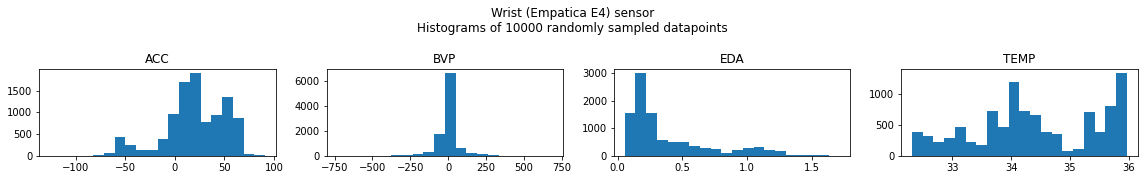


----------------------------------------------------------------------------

Elapsed time: 15.97729778289795
4255300 4255300
0.0 6078.998571428571


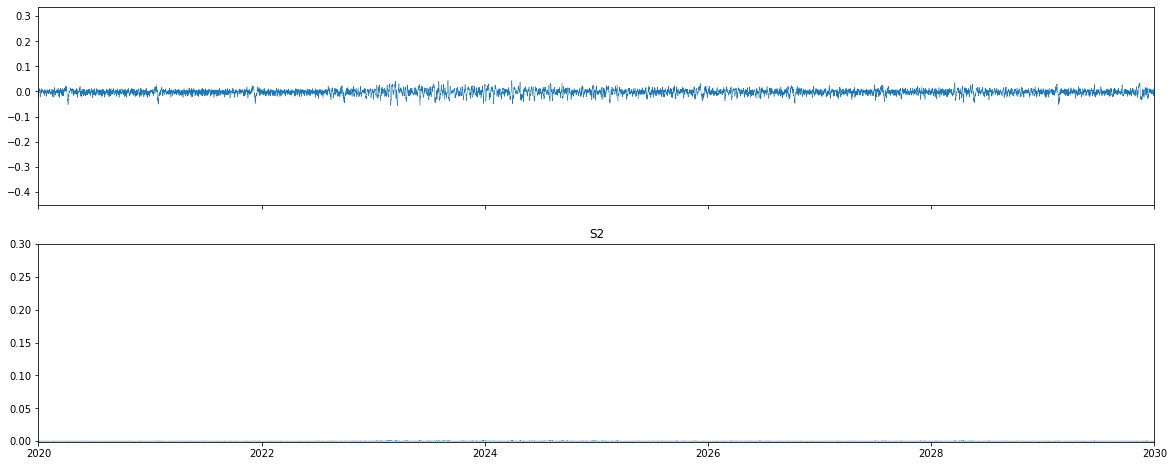

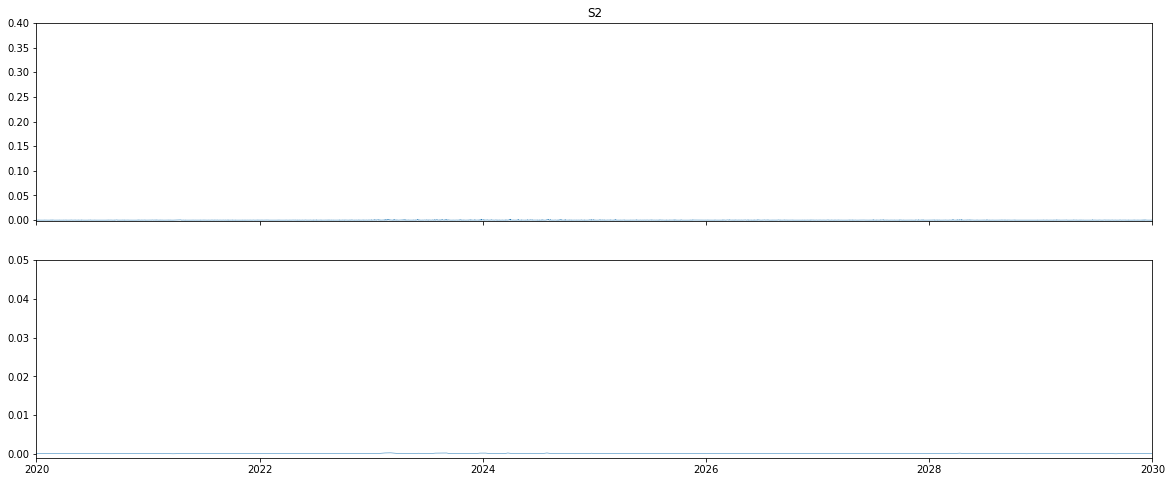

Dictionary from .pkl file has keys: dict_keys(['signal', 'label', 'subject'])
signal  is type: <class 'dict'>  with length: 2
label  is type: <class 'numpy.ndarray'>  with length: 4545100
subject  is type: <class 'str'>  with length: 2


SUBJECT #: S3


LABEL unique values: [0 1 2 3 4 5 6 7]
{'0': 'not defined/transient', '1': 'baseline', '2': 'stress', '3': 'amusement', '4': 'meditation', '5': 'ignore', '6': 'ignore', '7': 'ignore'}


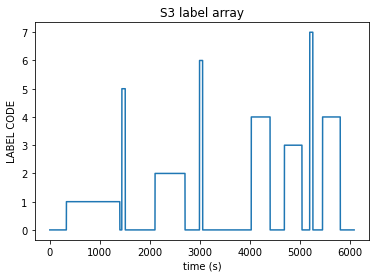



SIGNAL KEYS: dict_keys(['chest', 'wrist'])
chest: <class 'dict'> has keys: dict_keys(['ACC', 'ECG', 'EMG', 'EDA', 'Temp', 'Resp'])
wrist: <class 'dict'> has keys: dict_keys(['ACC', 'BVP', 'EDA', 'TEMP'])

 Chest (RespiBAN) sensor
ACC array has shape: (4545100, 3) at 700 Hz for a total of  6493.0 seconds
ECG array has shape: (4545100, 1) at 700 Hz for a total of  6493.0 seconds
EMG array has shape: (4545100, 1) at 700 Hz for a total of  6493.0 seconds
EDA array has shape: (4545100, 1) at 700 Hz for a total of  6493.0 seconds
Temp array has shape: (4545100, 1) at 700 Hz for a total of  6493.0 seconds
Resp array has shape: (4545100, 1) at 700 Hz for a total of  6493.0 seconds


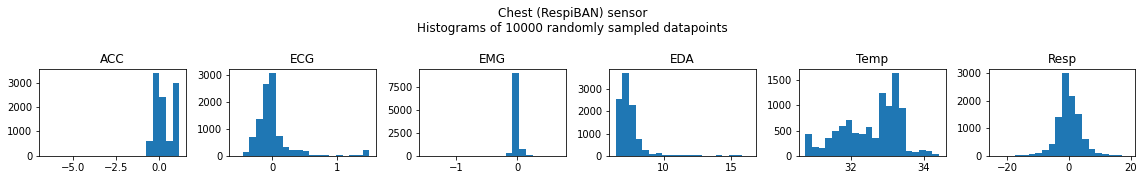


 Wrist (Empatica E4) sensor
ACC array has shape: (207776, 3) at 32 Hz for a total of  6493.0 seconds
BVP array has shape: (415552, 1) at 64 Hz for a total of  6493.0 seconds
EDA array has shape: (25972, 1) at 4 Hz for a total of  6493.0 seconds
TEMP array has shape: (25972, 1) at 4 Hz for a total of  6493.0 seconds


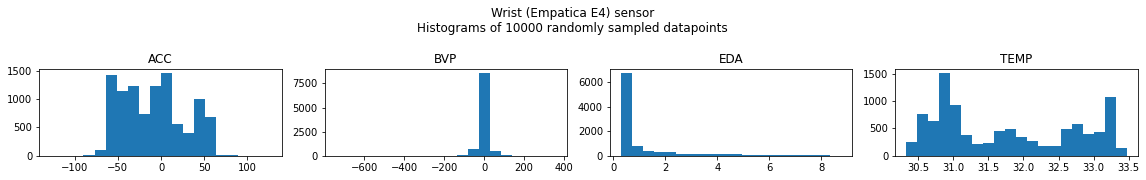


----------------------------------------------------------------------------

Elapsed time: 8.601635694503784
4545100 4545100
0.0 6492.998571428571


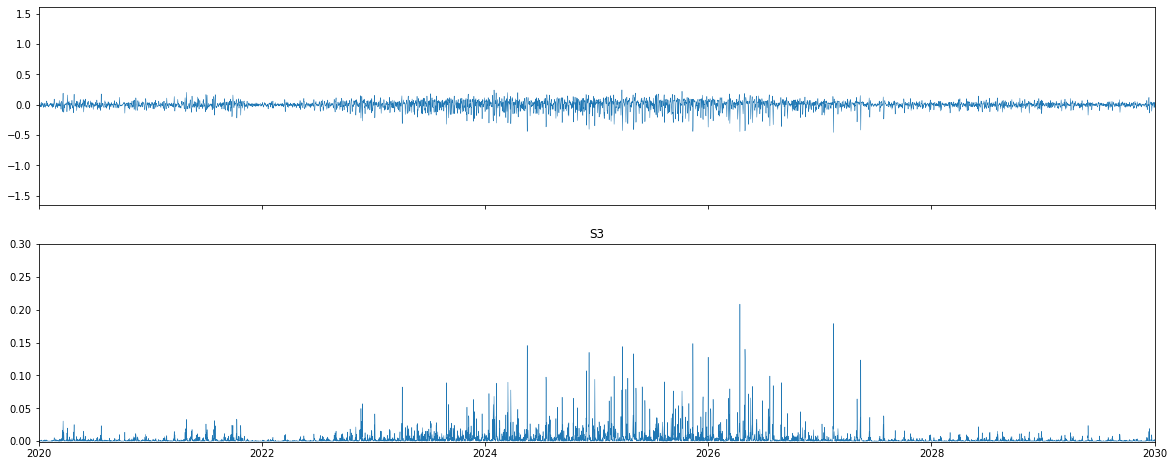

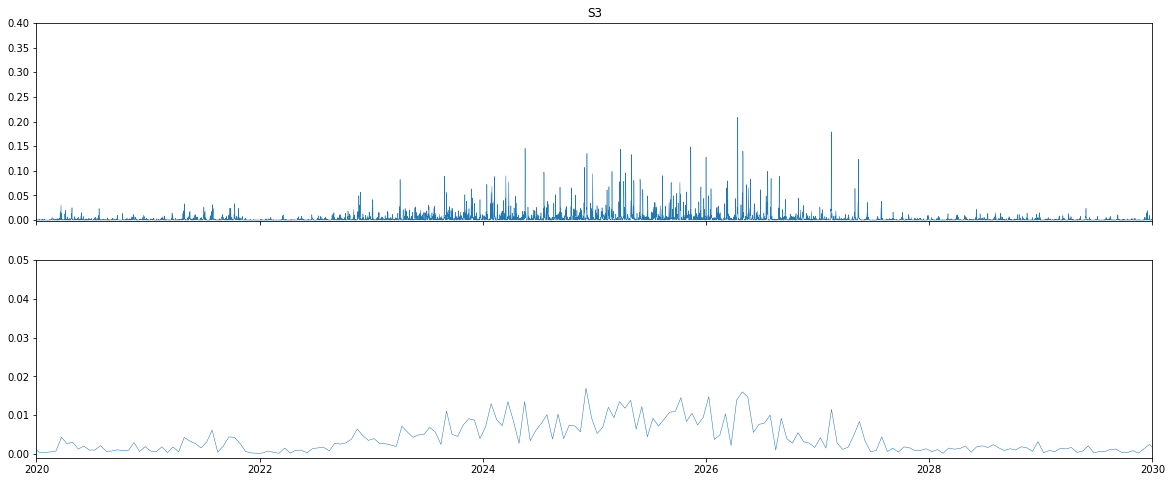

Dictionary from .pkl file has keys: dict_keys(['signal', 'label', 'subject'])
signal  is type: <class 'dict'>  with length: 2
label  is type: <class 'numpy.ndarray'>  with length: 4496100
subject  is type: <class 'str'>  with length: 2


SUBJECT #: S4


LABEL unique values: [0 1 2 3 4 5 6 7]
{'0': 'not defined/transient', '1': 'baseline', '2': 'stress', '3': 'amusement', '4': 'meditation', '5': 'ignore', '6': 'ignore', '7': 'ignore'}


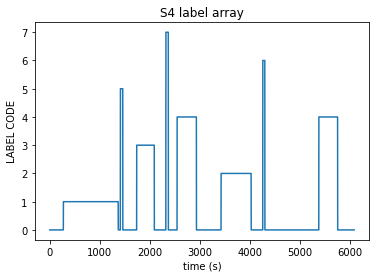



SIGNAL KEYS: dict_keys(['chest', 'wrist'])
chest: <class 'dict'> has keys: dict_keys(['ACC', 'ECG', 'EMG', 'EDA', 'Temp', 'Resp'])
wrist: <class 'dict'> has keys: dict_keys(['ACC', 'BVP', 'EDA', 'TEMP'])

 Chest (RespiBAN) sensor
ACC array has shape: (4496100, 3) at 700 Hz for a total of  6423.0 seconds
ECG array has shape: (4496100, 1) at 700 Hz for a total of  6423.0 seconds
EMG array has shape: (4496100, 1) at 700 Hz for a total of  6423.0 seconds
EDA array has shape: (4496100, 1) at 700 Hz for a total of  6423.0 seconds
Temp array has shape: (4496100, 1) at 700 Hz for a total of  6423.0 seconds
Resp array has shape: (4496100, 1) at 700 Hz for a total of  6423.0 seconds


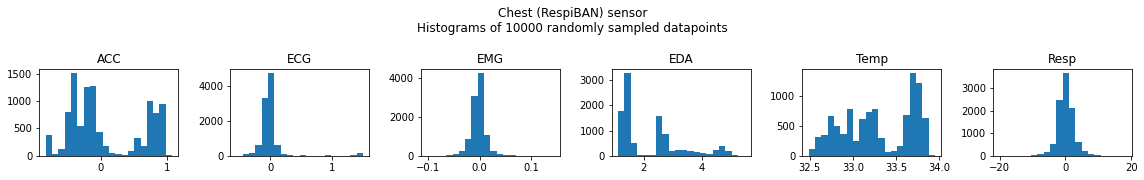


 Wrist (Empatica E4) sensor
ACC array has shape: (205536, 3) at 32 Hz for a total of  6423.0 seconds
BVP array has shape: (411072, 1) at 64 Hz for a total of  6423.0 seconds
EDA array has shape: (25692, 1) at 4 Hz for a total of  6423.0 seconds
TEMP array has shape: (25692, 1) at 4 Hz for a total of  6423.0 seconds


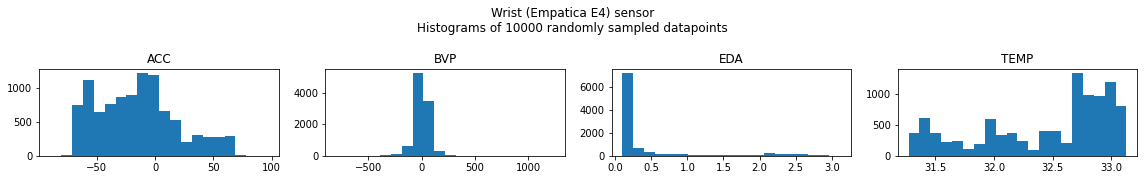


----------------------------------------------------------------------------

Elapsed time: 16.61514949798584
4496100 4496100
0.0 6422.998571428571


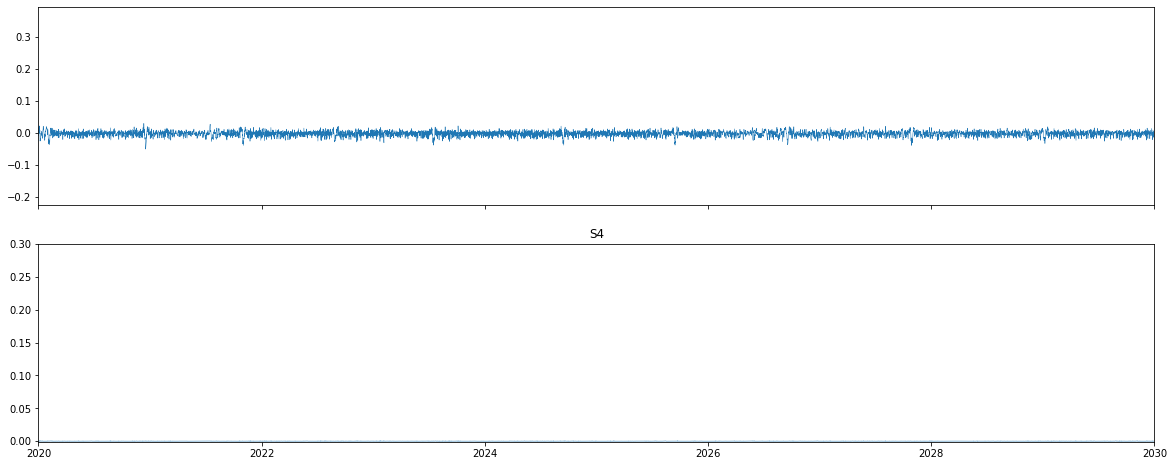

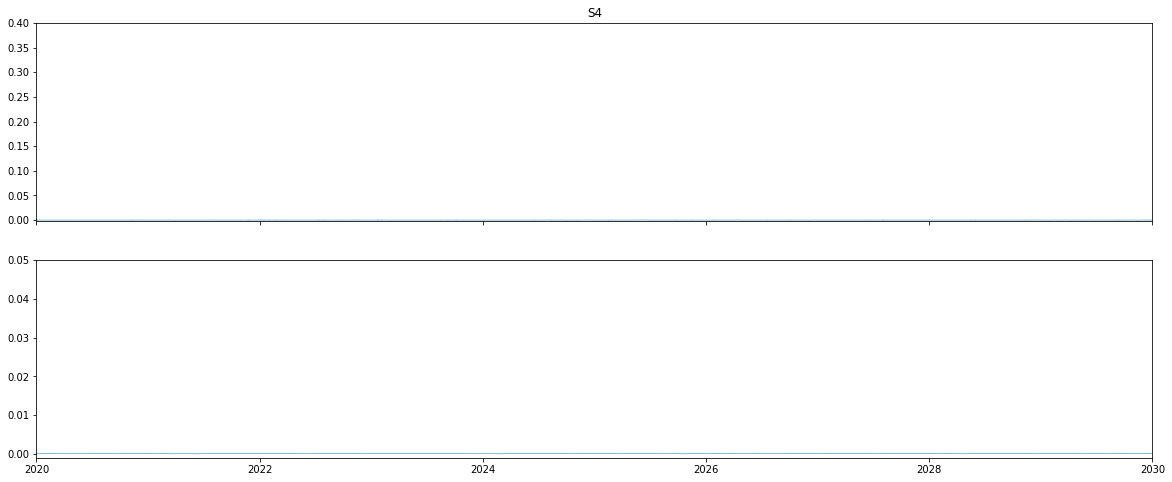

Dictionary from .pkl file has keys: dict_keys(['signal', 'label', 'subject'])
signal  is type: <class 'dict'>  with length: 2
label  is type: <class 'numpy.ndarray'>  with length: 4380600
subject  is type: <class 'str'>  with length: 2


SUBJECT #: S5


LABEL unique values: [0 1 2 3 4 5 6 7]
{'0': 'not defined/transient', '1': 'baseline', '2': 'stress', '3': 'amusement', '4': 'meditation', '5': 'ignore', '6': 'ignore', '7': 'ignore'}


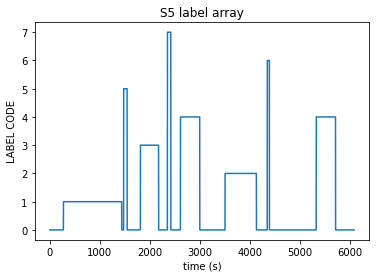



SIGNAL KEYS: dict_keys(['chest', 'wrist'])
chest: <class 'dict'> has keys: dict_keys(['ACC', 'ECG', 'EMG', 'EDA', 'Temp', 'Resp'])
wrist: <class 'dict'> has keys: dict_keys(['ACC', 'BVP', 'EDA', 'TEMP'])

 Chest (RespiBAN) sensor
ACC array has shape: (4380600, 3) at 700 Hz for a total of  6258.0 seconds
ECG array has shape: (4380600, 1) at 700 Hz for a total of  6258.0 seconds
EMG array has shape: (4380600, 1) at 700 Hz for a total of  6258.0 seconds
EDA array has shape: (4380600, 1) at 700 Hz for a total of  6258.0 seconds
Temp array has shape: (4380600, 1) at 700 Hz for a total of  6258.0 seconds
Resp array has shape: (4380600, 1) at 700 Hz for a total of  6258.0 seconds


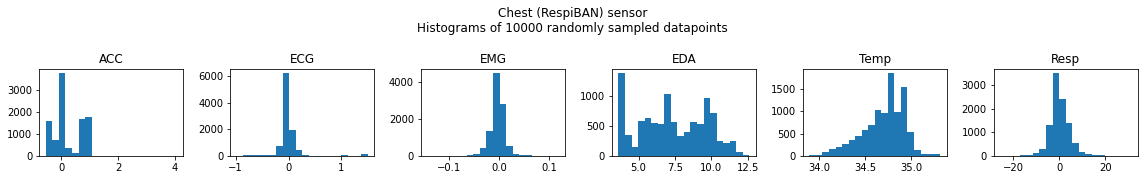


 Wrist (Empatica E4) sensor
ACC array has shape: (200256, 3) at 32 Hz for a total of  6258.0 seconds
BVP array has shape: (400512, 1) at 64 Hz for a total of  6258.0 seconds
EDA array has shape: (25032, 1) at 4 Hz for a total of  6258.0 seconds
TEMP array has shape: (25032, 1) at 4 Hz for a total of  6258.0 seconds


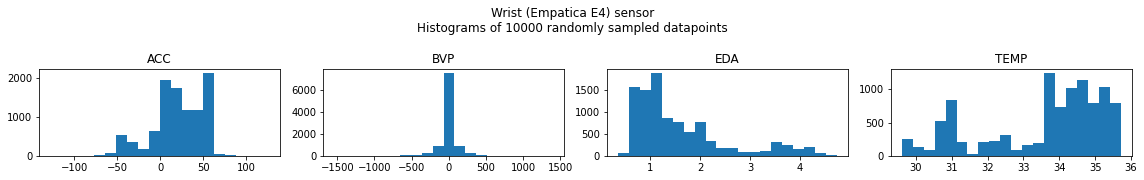


----------------------------------------------------------------------------

Elapsed time: 16.859825611114502
4380600 4380600
0.0 6257.998571428571


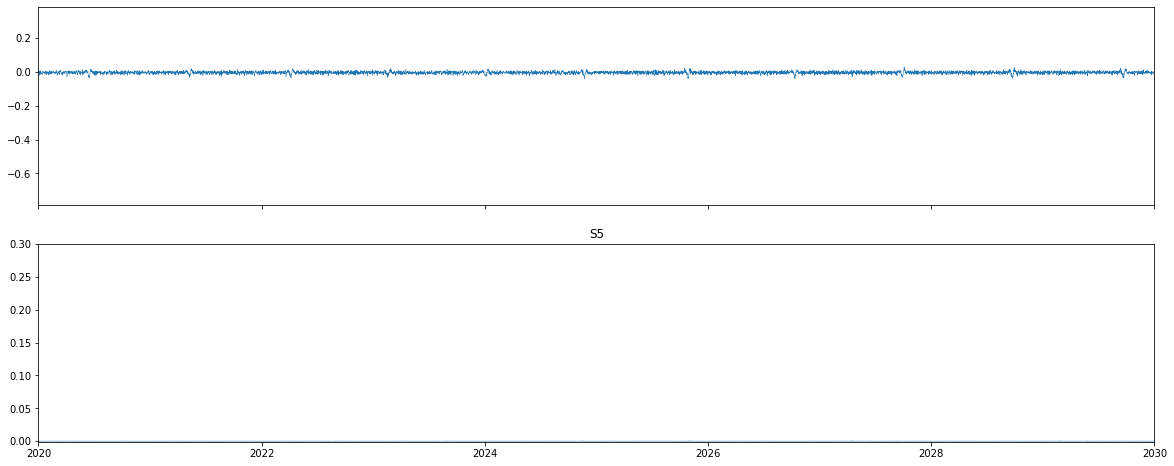

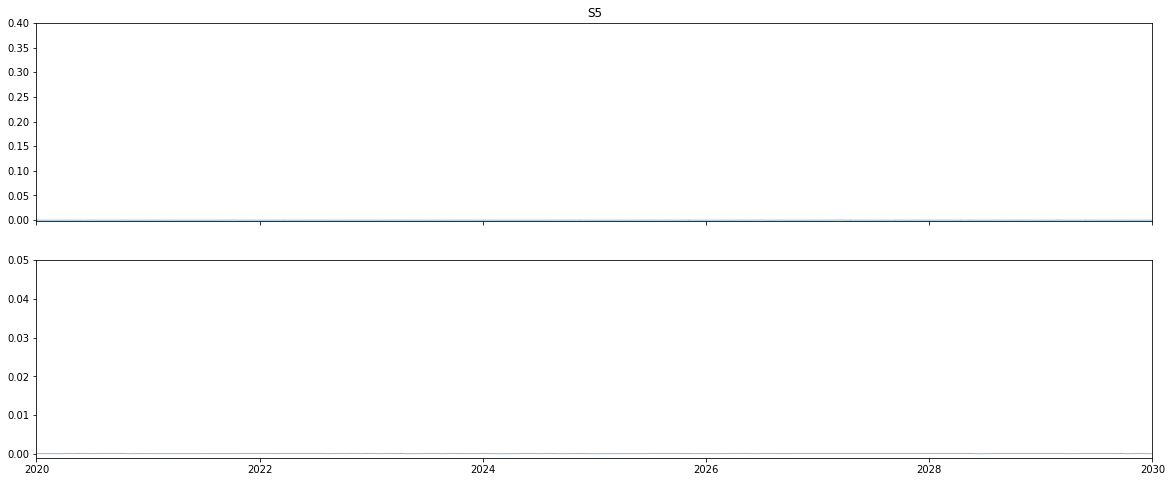

Dictionary from .pkl file has keys: dict_keys(['signal', 'label', 'subject'])
signal  is type: <class 'dict'>  with length: 2
label  is type: <class 'numpy.ndarray'>  with length: 4949700
subject  is type: <class 'str'>  with length: 2


SUBJECT #: S6


LABEL unique values: [0 1 2 3 4 5 6 7]
{'0': 'not defined/transient', '1': 'baseline', '2': 'stress', '3': 'amusement', '4': 'meditation', '5': 'ignore', '6': 'ignore', '7': 'ignore'}


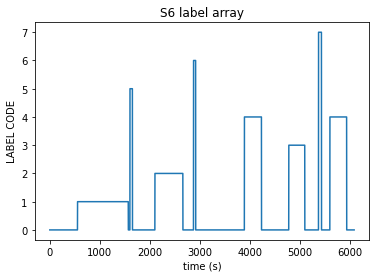



SIGNAL KEYS: dict_keys(['chest', 'wrist'])
chest: <class 'dict'> has keys: dict_keys(['ACC', 'ECG', 'EMG', 'EDA', 'Temp', 'Resp'])
wrist: <class 'dict'> has keys: dict_keys(['ACC', 'BVP', 'EDA', 'TEMP'])

 Chest (RespiBAN) sensor
ACC array has shape: (4949700, 3) at 700 Hz for a total of  7071.0 seconds
ECG array has shape: (4949700, 1) at 700 Hz for a total of  7071.0 seconds
EMG array has shape: (4949700, 1) at 700 Hz for a total of  7071.0 seconds
EDA array has shape: (4949700, 1) at 700 Hz for a total of  7071.0 seconds
Temp array has shape: (4949700, 1) at 700 Hz for a total of  7071.0 seconds
Resp array has shape: (4949700, 1) at 700 Hz for a total of  7071.0 seconds


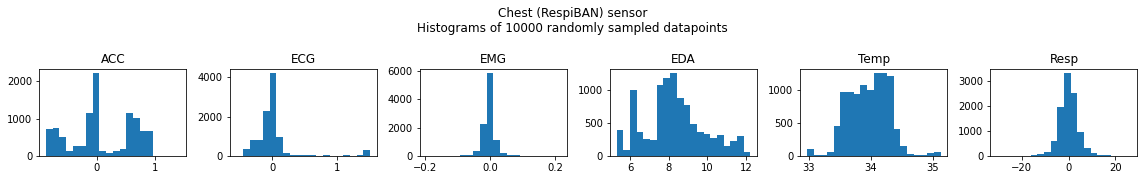


 Wrist (Empatica E4) sensor
ACC array has shape: (226272, 3) at 32 Hz for a total of  7071.0 seconds
BVP array has shape: (452544, 1) at 64 Hz for a total of  7071.0 seconds
EDA array has shape: (28284, 1) at 4 Hz for a total of  7071.0 seconds
TEMP array has shape: (28284, 1) at 4 Hz for a total of  7071.0 seconds


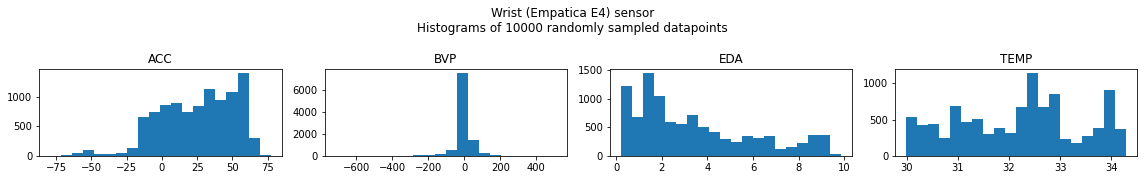


----------------------------------------------------------------------------

Elapsed time: 18.59902024269104
4949700 4949700
0.0 7070.998571428571


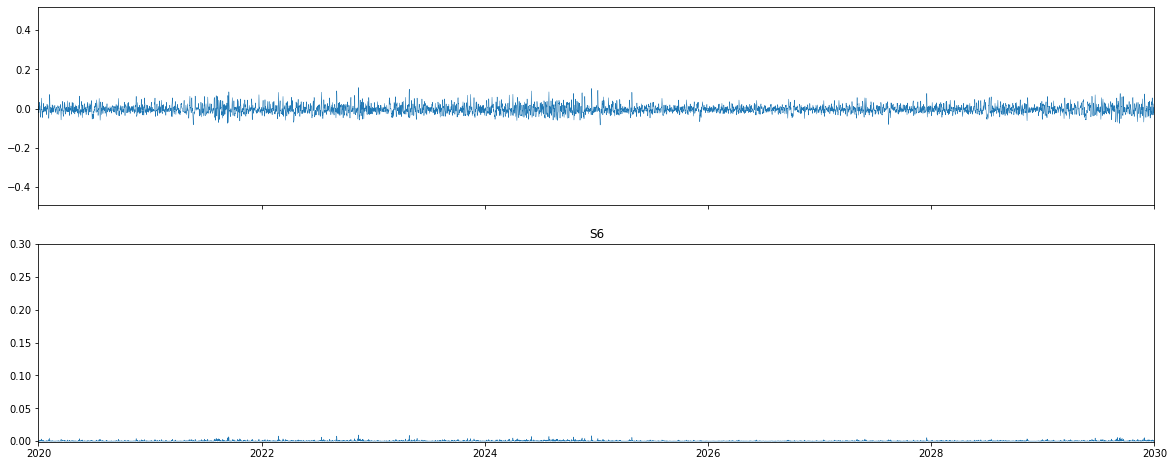

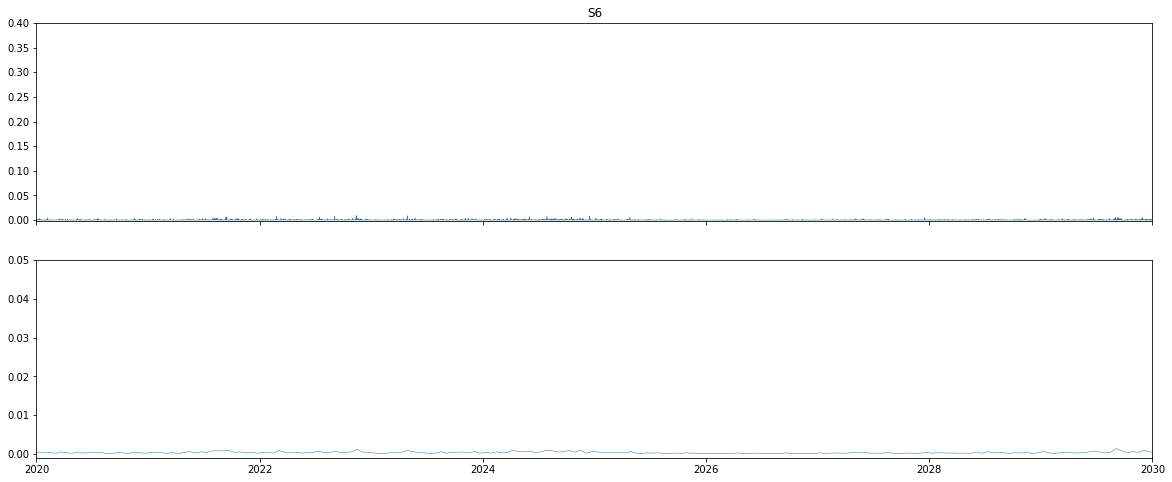

Dictionary from .pkl file has keys: dict_keys(['signal', 'label', 'subject'])
signal  is type: <class 'dict'>  with length: 2
label  is type: <class 'numpy.ndarray'>  with length: 3666600
subject  is type: <class 'str'>  with length: 2


SUBJECT #: S7


LABEL unique values: [0 1 2 3 4 5 6 7]
{'0': 'not defined/transient', '1': 'baseline', '2': 'stress', '3': 'amusement', '4': 'meditation', '5': 'ignore', '6': 'ignore', '7': 'ignore'}


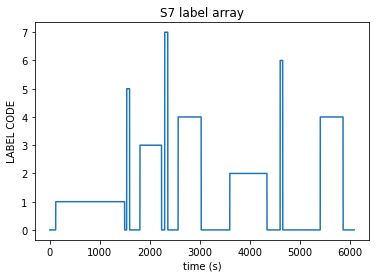



SIGNAL KEYS: dict_keys(['chest', 'wrist'])
chest: <class 'dict'> has keys: dict_keys(['ACC', 'ECG', 'EMG', 'EDA', 'Temp', 'Resp'])
wrist: <class 'dict'> has keys: dict_keys(['ACC', 'BVP', 'EDA', 'TEMP'])

 Chest (RespiBAN) sensor
ACC array has shape: (3666600, 3) at 700 Hz for a total of  5238.0 seconds
ECG array has shape: (3666600, 1) at 700 Hz for a total of  5238.0 seconds
EMG array has shape: (3666600, 1) at 700 Hz for a total of  5238.0 seconds
EDA array has shape: (3666600, 1) at 700 Hz for a total of  5238.0 seconds
Temp array has shape: (3666600, 1) at 700 Hz for a total of  5238.0 seconds
Resp array has shape: (3666600, 1) at 700 Hz for a total of  5238.0 seconds


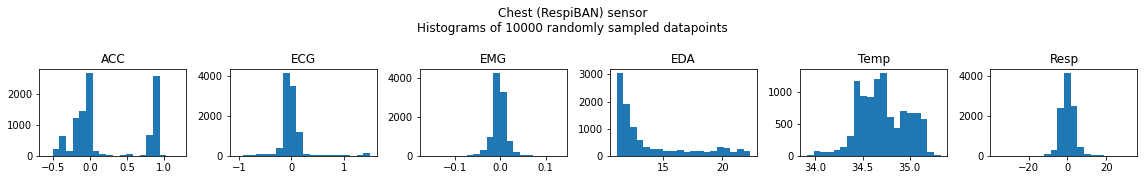


 Wrist (Empatica E4) sensor
ACC array has shape: (167616, 3) at 32 Hz for a total of  5238.0 seconds
BVP array has shape: (335232, 1) at 64 Hz for a total of  5238.0 seconds
EDA array has shape: (20952, 1) at 4 Hz for a total of  5238.0 seconds
TEMP array has shape: (20952, 1) at 4 Hz for a total of  5238.0 seconds


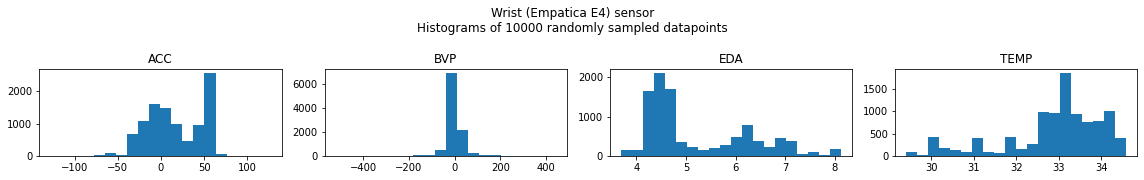


----------------------------------------------------------------------------

Elapsed time: 12.961854934692383
3666600 3666600
0.0 5237.998571428571


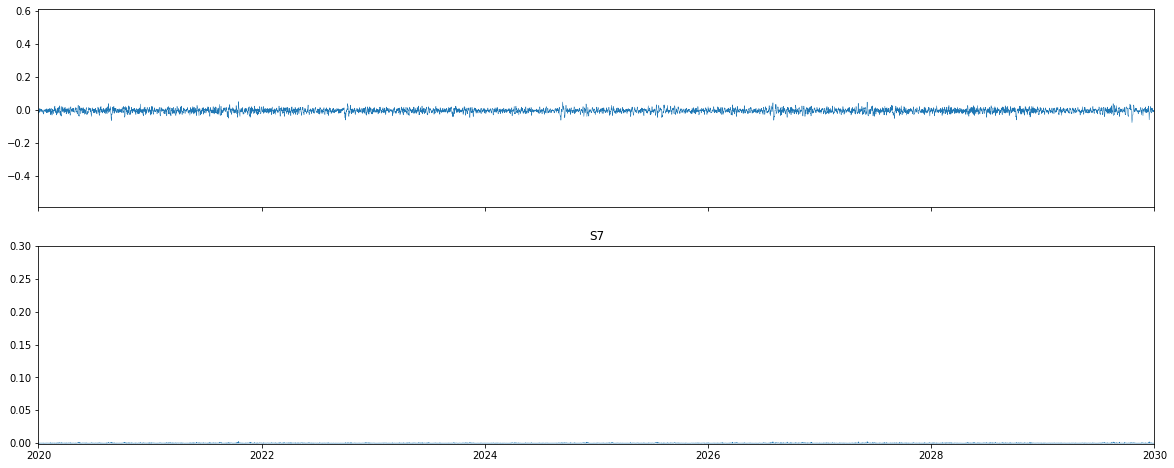

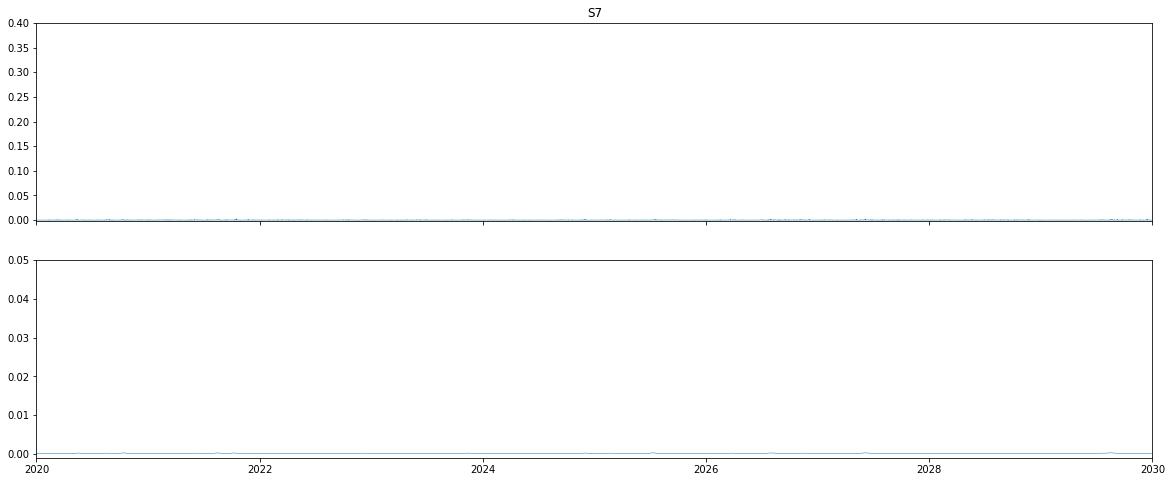

Dictionary from .pkl file has keys: dict_keys(['signal', 'label', 'subject'])
signal  is type: <class 'dict'>  with length: 2
label  is type: <class 'numpy.ndarray'>  with length: 3826200
subject  is type: <class 'str'>  with length: 2


SUBJECT #: S8


LABEL unique values: [0 1 2 3 4 5 6 7]
{'0': 'not defined/transient', '1': 'baseline', '2': 'stress', '3': 'amusement', '4': 'meditation', '5': 'ignore', '6': 'ignore', '7': 'ignore'}


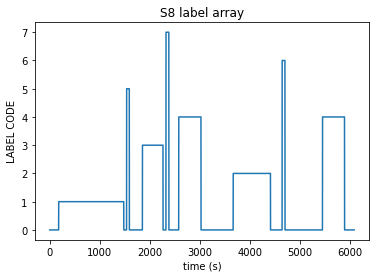



SIGNAL KEYS: dict_keys(['chest', 'wrist'])
chest: <class 'dict'> has keys: dict_keys(['ACC', 'ECG', 'EMG', 'EDA', 'Temp', 'Resp'])
wrist: <class 'dict'> has keys: dict_keys(['ACC', 'BVP', 'EDA', 'TEMP'])

 Chest (RespiBAN) sensor
ACC array has shape: (3826200, 3) at 700 Hz for a total of  5466.0 seconds
ECG array has shape: (3826200, 1) at 700 Hz for a total of  5466.0 seconds
EMG array has shape: (3826200, 1) at 700 Hz for a total of  5466.0 seconds
EDA array has shape: (3826200, 1) at 700 Hz for a total of  5466.0 seconds
Temp array has shape: (3826200, 1) at 700 Hz for a total of  5466.0 seconds
Resp array has shape: (3826200, 1) at 700 Hz for a total of  5466.0 seconds


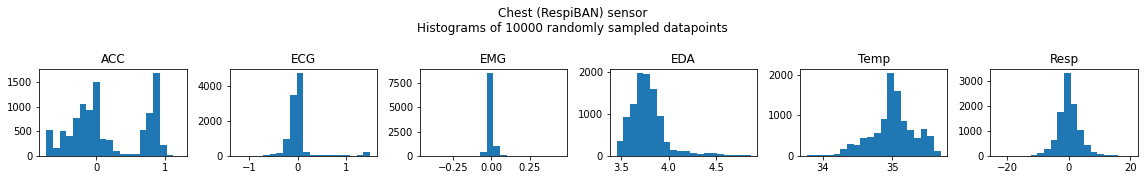


 Wrist (Empatica E4) sensor
ACC array has shape: (174912, 3) at 32 Hz for a total of  5466.0 seconds
BVP array has shape: (349824, 1) at 64 Hz for a total of  5466.0 seconds
EDA array has shape: (21864, 1) at 4 Hz for a total of  5466.0 seconds
TEMP array has shape: (21864, 1) at 4 Hz for a total of  5466.0 seconds


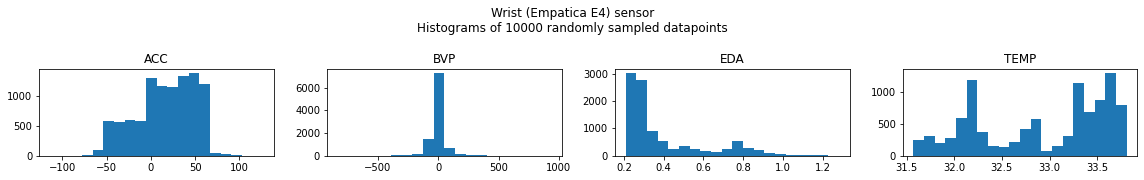


----------------------------------------------------------------------------

Elapsed time: 14.92666506767273
3826200 3826200
0.0 5465.998571428571


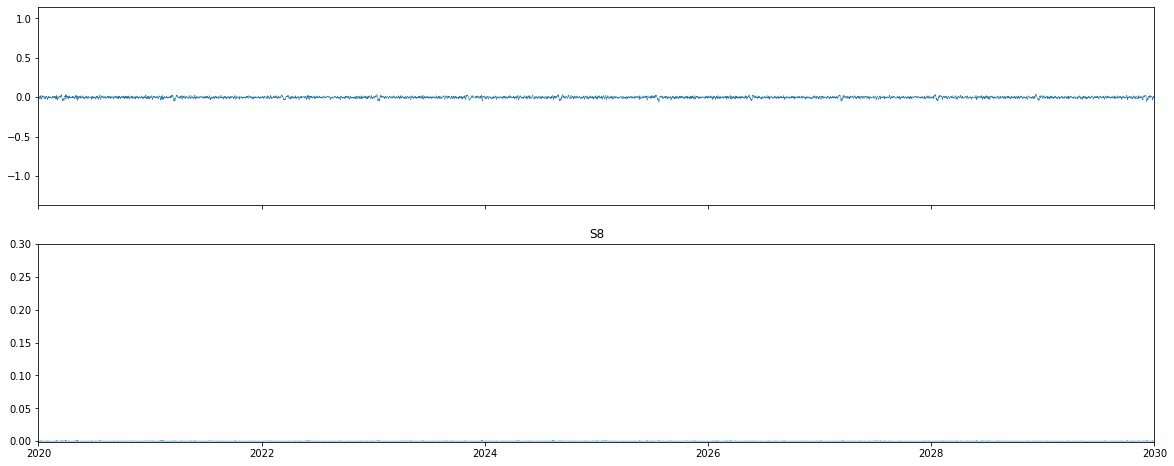

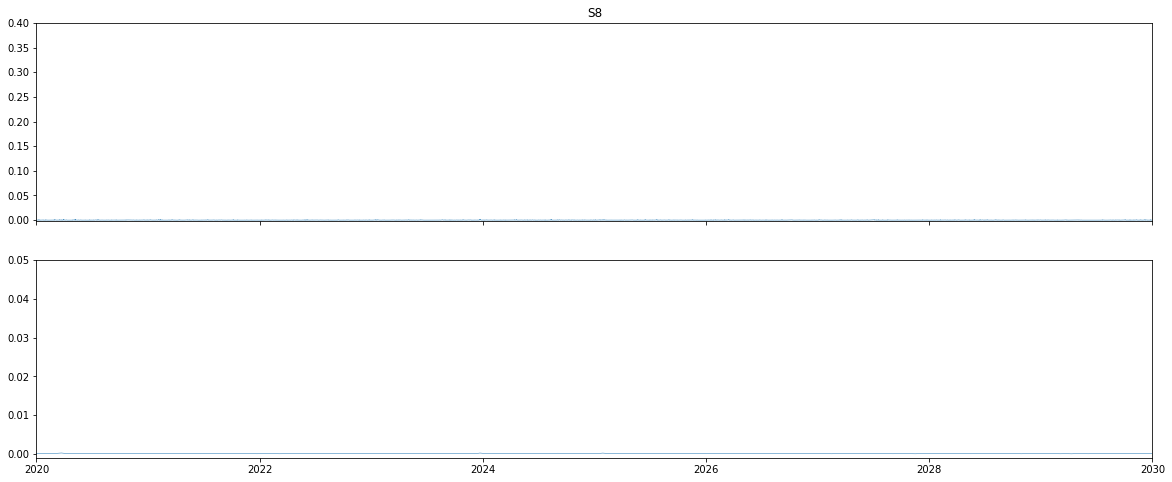

Dictionary from .pkl file has keys: dict_keys(['signal', 'label', 'subject'])
signal  is type: <class 'dict'>  with length: 2
label  is type: <class 'numpy.ndarray'>  with length: 3656100
subject  is type: <class 'str'>  with length: 2


SUBJECT #: S9


LABEL unique values: [0 1 2 3 4 5 6 7]
{'0': 'not defined/transient', '1': 'baseline', '2': 'stress', '3': 'amusement', '4': 'meditation', '5': 'ignore', '6': 'ignore', '7': 'ignore'}


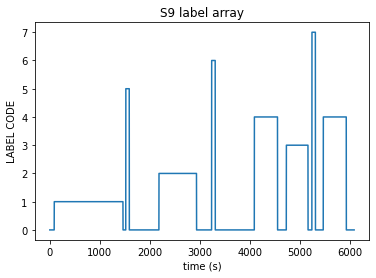



SIGNAL KEYS: dict_keys(['chest', 'wrist'])
chest: <class 'dict'> has keys: dict_keys(['ACC', 'ECG', 'EMG', 'EDA', 'Temp', 'Resp'])
wrist: <class 'dict'> has keys: dict_keys(['ACC', 'BVP', 'EDA', 'TEMP'])

 Chest (RespiBAN) sensor
ACC array has shape: (3656100, 3) at 700 Hz for a total of  5223.0 seconds
ECG array has shape: (3656100, 1) at 700 Hz for a total of  5223.0 seconds
EMG array has shape: (3656100, 1) at 700 Hz for a total of  5223.0 seconds
EDA array has shape: (3656100, 1) at 700 Hz for a total of  5223.0 seconds
Temp array has shape: (3656100, 1) at 700 Hz for a total of  5223.0 seconds
Resp array has shape: (3656100, 1) at 700 Hz for a total of  5223.0 seconds


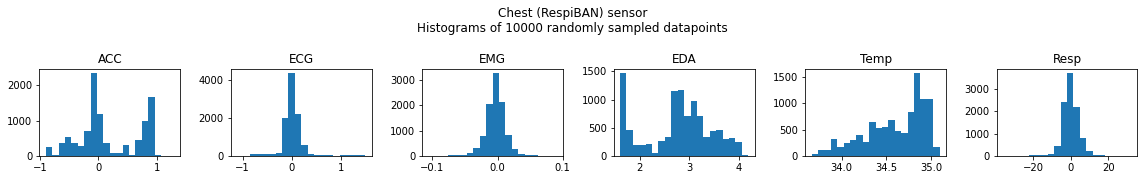


 Wrist (Empatica E4) sensor
ACC array has shape: (167136, 3) at 32 Hz for a total of  5223.0 seconds
BVP array has shape: (334272, 1) at 64 Hz for a total of  5223.0 seconds
EDA array has shape: (20892, 1) at 4 Hz for a total of  5223.0 seconds
TEMP array has shape: (20892, 1) at 4 Hz for a total of  5223.0 seconds


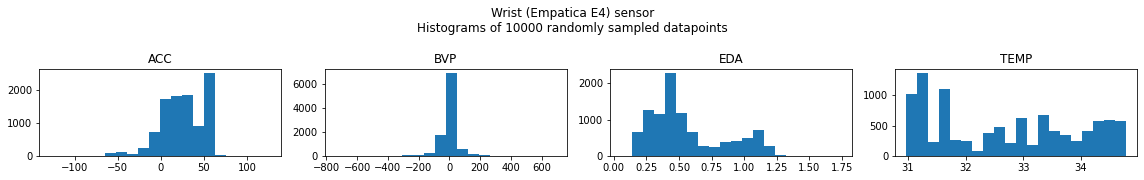


----------------------------------------------------------------------------

Elapsed time: 14.485987186431885
3656100 3656100
0.0 5222.998571428571


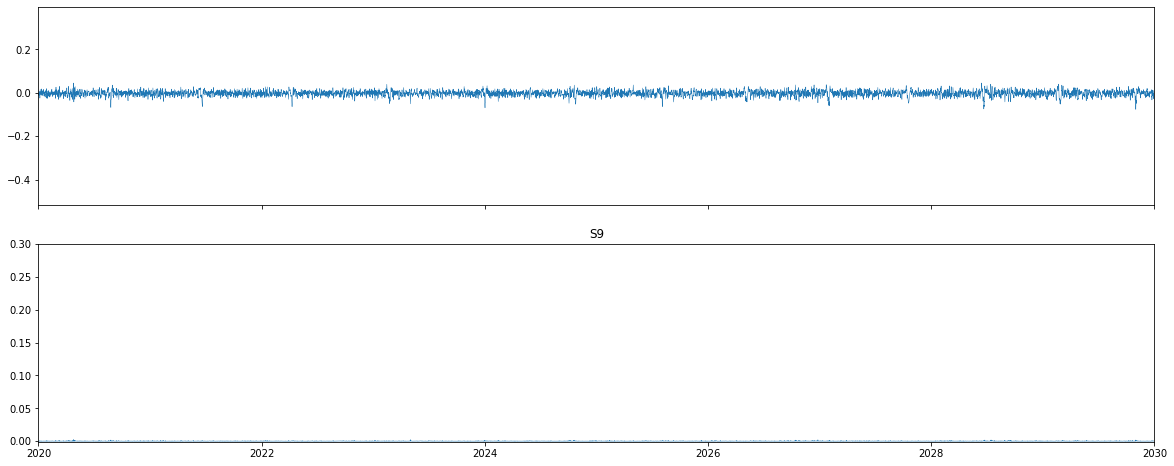

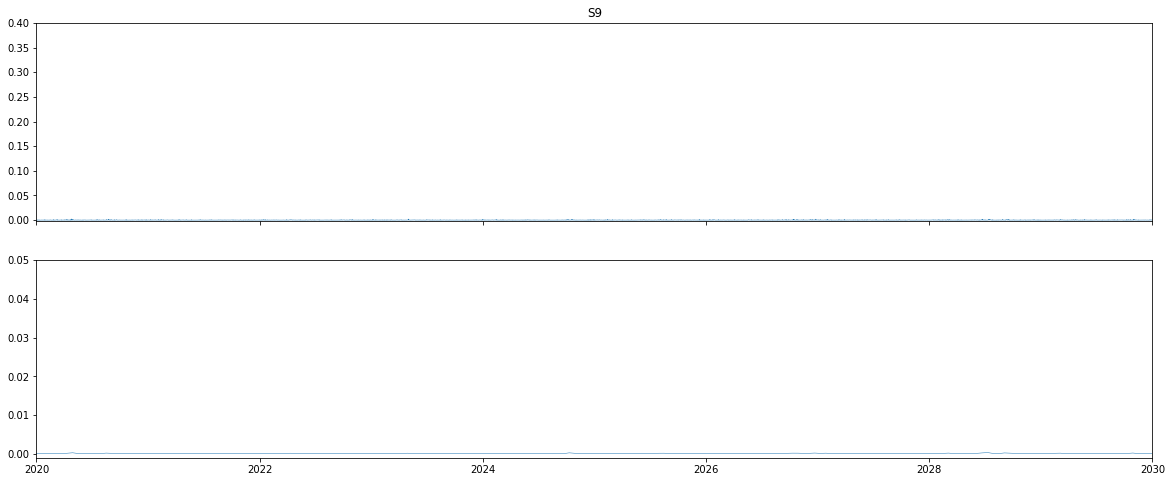

Dictionary from .pkl file has keys: dict_keys(['signal', 'label', 'subject'])
signal  is type: <class 'dict'>  with length: 2
label  is type: <class 'numpy.ndarray'>  with length: 3847200
subject  is type: <class 'str'>  with length: 3


SUBJECT #: S10


LABEL unique values: [0 1 2 3 4 5 6 7]
{'0': 'not defined/transient', '1': 'baseline', '2': 'stress', '3': 'amusement', '4': 'meditation', '5': 'ignore', '6': 'ignore', '7': 'ignore'}


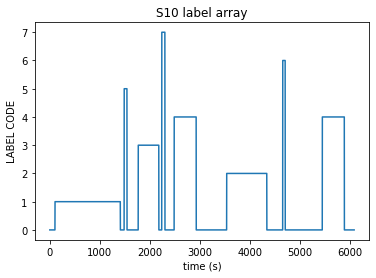



SIGNAL KEYS: dict_keys(['chest', 'wrist'])
chest: <class 'dict'> has keys: dict_keys(['ACC', 'ECG', 'EMG', 'EDA', 'Temp', 'Resp'])
wrist: <class 'dict'> has keys: dict_keys(['ACC', 'BVP', 'EDA', 'TEMP'])

 Chest (RespiBAN) sensor
ACC array has shape: (3847200, 3) at 700 Hz for a total of  5496.0 seconds
ECG array has shape: (3847200, 1) at 700 Hz for a total of  5496.0 seconds
EMG array has shape: (3847200, 1) at 700 Hz for a total of  5496.0 seconds
EDA array has shape: (3847200, 1) at 700 Hz for a total of  5496.0 seconds
Temp array has shape: (3847200, 1) at 700 Hz for a total of  5496.0 seconds
Resp array has shape: (3847200, 1) at 700 Hz for a total of  5496.0 seconds


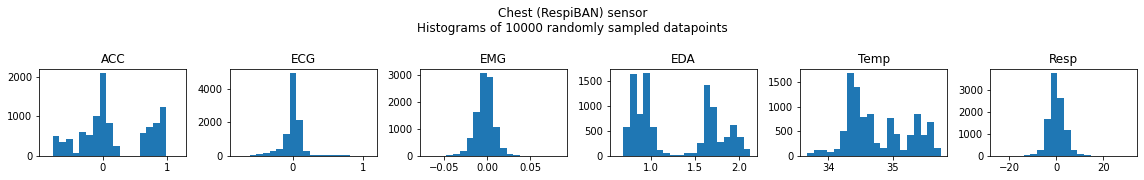


 Wrist (Empatica E4) sensor
ACC array has shape: (175872, 3) at 32 Hz for a total of  5496.0 seconds
BVP array has shape: (351744, 1) at 64 Hz for a total of  5496.0 seconds
EDA array has shape: (21984, 1) at 4 Hz for a total of  5496.0 seconds
TEMP array has shape: (21984, 1) at 4 Hz for a total of  5496.0 seconds


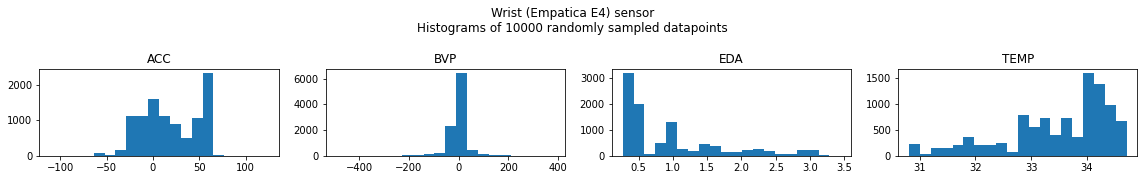


----------------------------------------------------------------------------

Elapsed time: 13.387960195541382
3847200 3847200
0.0 5495.998571428571


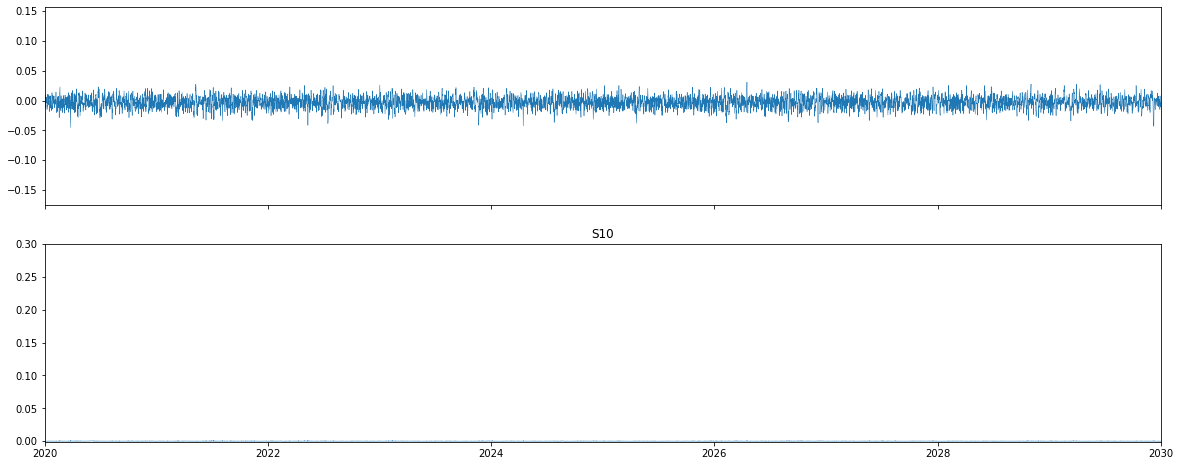

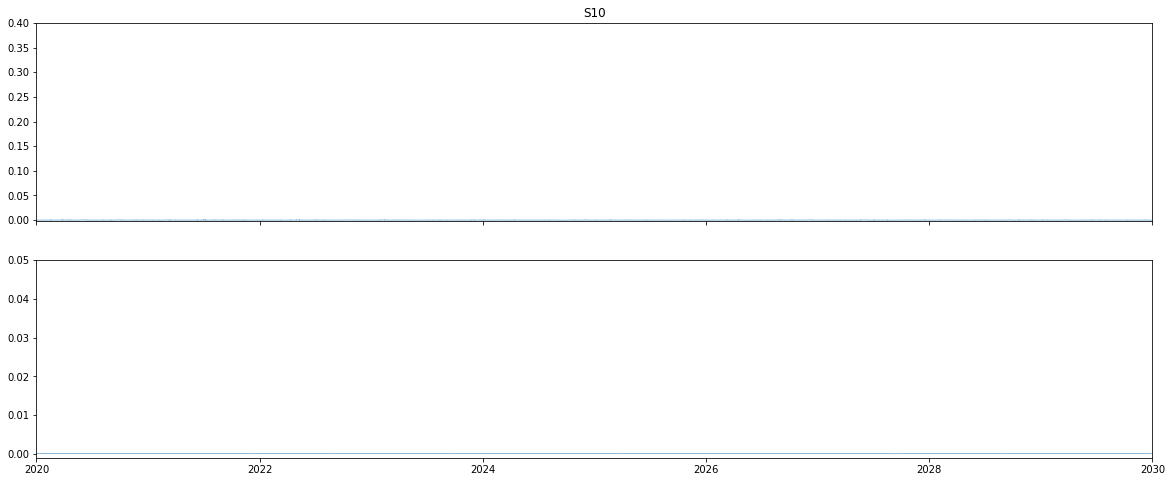

Dictionary from .pkl file has keys: dict_keys(['signal', 'label', 'subject'])
signal  is type: <class 'dict'>  with length: 2
label  is type: <class 'numpy.ndarray'>  with length: 3663100
subject  is type: <class 'str'>  with length: 3


SUBJECT #: S11


LABEL unique values: [0 1 2 3 4 5 6 7]
{'0': 'not defined/transient', '1': 'baseline', '2': 'stress', '3': 'amusement', '4': 'meditation', '5': 'ignore', '6': 'ignore', '7': 'ignore'}


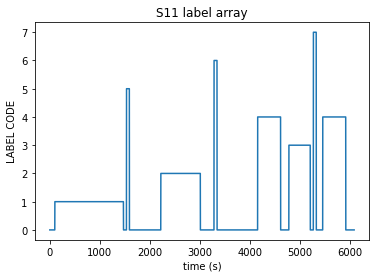



SIGNAL KEYS: dict_keys(['chest', 'wrist'])
chest: <class 'dict'> has keys: dict_keys(['ACC', 'ECG', 'EMG', 'EDA', 'Temp', 'Resp'])
wrist: <class 'dict'> has keys: dict_keys(['ACC', 'BVP', 'EDA', 'TEMP'])

 Chest (RespiBAN) sensor
ACC array has shape: (3663100, 3) at 700 Hz for a total of  5233.0 seconds
ECG array has shape: (3663100, 1) at 700 Hz for a total of  5233.0 seconds
EMG array has shape: (3663100, 1) at 700 Hz for a total of  5233.0 seconds
EDA array has shape: (3663100, 1) at 700 Hz for a total of  5233.0 seconds
Temp array has shape: (3663100, 1) at 700 Hz for a total of  5233.0 seconds
Resp array has shape: (3663100, 1) at 700 Hz for a total of  5233.0 seconds


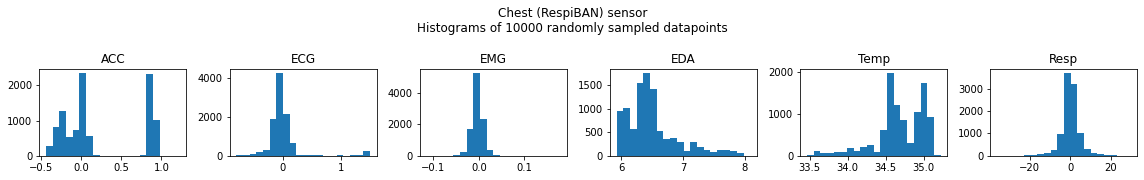


 Wrist (Empatica E4) sensor
ACC array has shape: (167456, 3) at 32 Hz for a total of  5233.0 seconds
BVP array has shape: (334912, 1) at 64 Hz for a total of  5233.0 seconds
EDA array has shape: (20932, 1) at 4 Hz for a total of  5233.0 seconds
TEMP array has shape: (20932, 1) at 4 Hz for a total of  5233.0 seconds


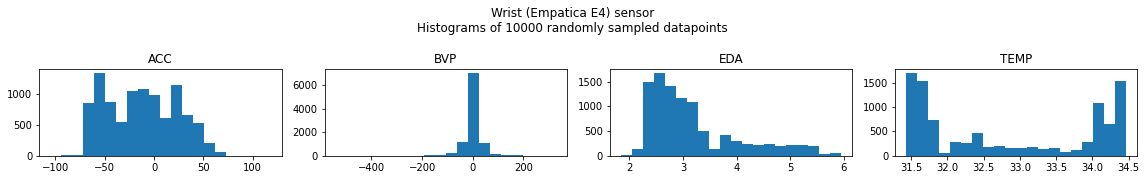


----------------------------------------------------------------------------

Elapsed time: 12.686256170272827
3663100 3663100
0.0 5232.998571428571


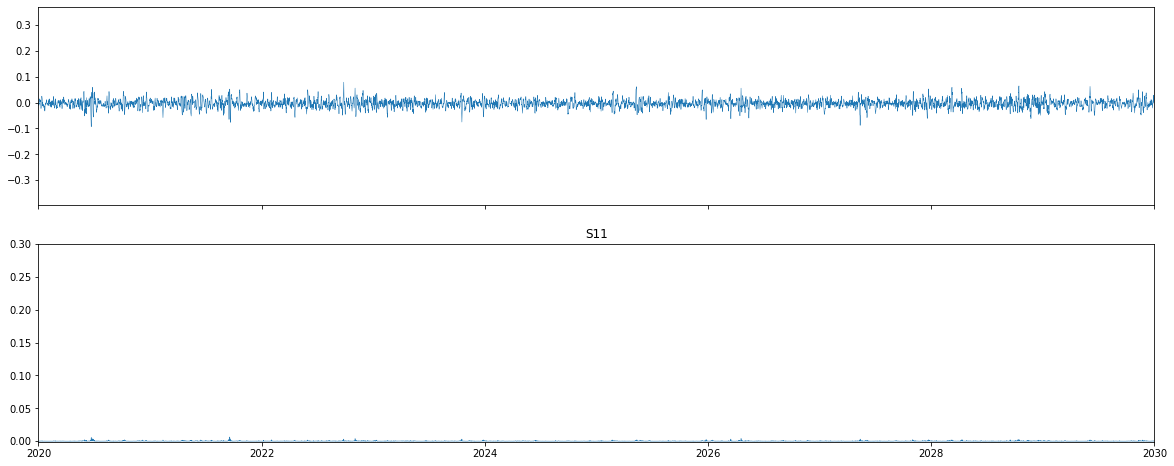

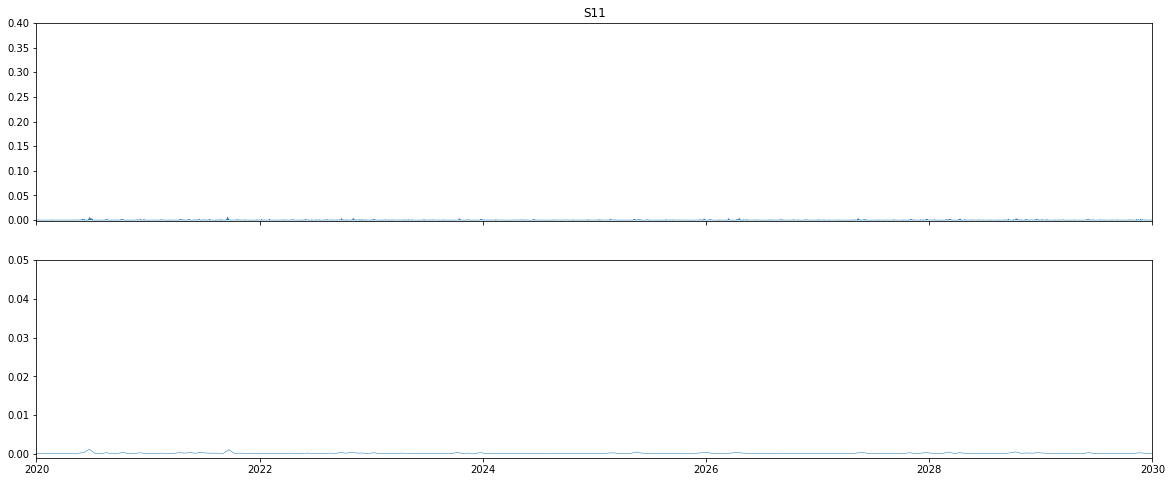

Dictionary from .pkl file has keys: dict_keys(['signal', 'label', 'subject'])
signal  is type: <class 'dict'>  with length: 2
label  is type: <class 'numpy.ndarray'>  with length: 3875900
subject  is type: <class 'str'>  with length: 3


SUBJECT #: S13


LABEL unique values: [0 1 2 3 4 5 6 7]
{'0': 'not defined/transient', '1': 'baseline', '2': 'stress', '3': 'amusement', '4': 'meditation', '5': 'ignore', '6': 'ignore', '7': 'ignore'}


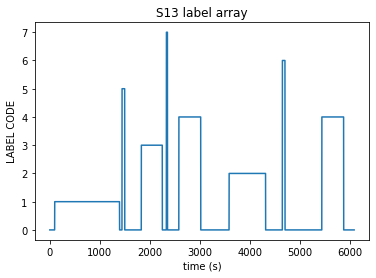



SIGNAL KEYS: dict_keys(['chest', 'wrist'])
chest: <class 'dict'> has keys: dict_keys(['ACC', 'ECG', 'EMG', 'EDA', 'Temp', 'Resp'])
wrist: <class 'dict'> has keys: dict_keys(['ACC', 'BVP', 'EDA', 'TEMP'])

 Chest (RespiBAN) sensor
ACC array has shape: (3875900, 3) at 700 Hz for a total of  5537.0 seconds
ECG array has shape: (3875900, 1) at 700 Hz for a total of  5537.0 seconds
EMG array has shape: (3875900, 1) at 700 Hz for a total of  5537.0 seconds
EDA array has shape: (3875900, 1) at 700 Hz for a total of  5537.0 seconds
Temp array has shape: (3875900, 1) at 700 Hz for a total of  5537.0 seconds
Resp array has shape: (3875900, 1) at 700 Hz for a total of  5537.0 seconds


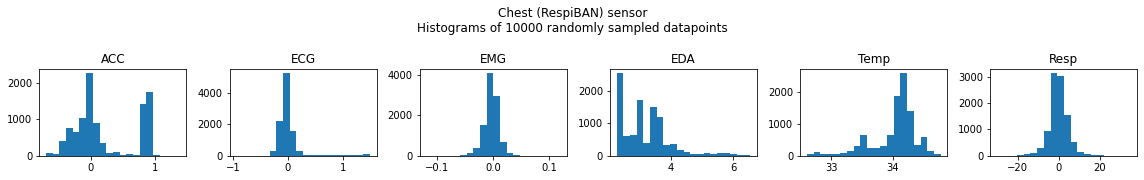


 Wrist (Empatica E4) sensor
ACC array has shape: (177184, 3) at 32 Hz for a total of  5537.0 seconds
BVP array has shape: (354368, 1) at 64 Hz for a total of  5537.0 seconds
EDA array has shape: (22148, 1) at 4 Hz for a total of  5537.0 seconds
TEMP array has shape: (22148, 1) at 4 Hz for a total of  5537.0 seconds


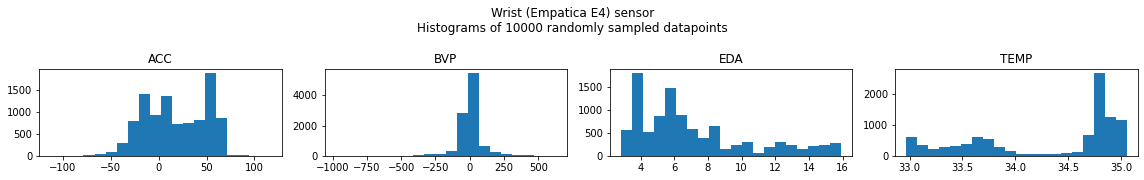


----------------------------------------------------------------------------

Elapsed time: 13.398585081100464
3875900 3875900
0.0 5536.998571428571


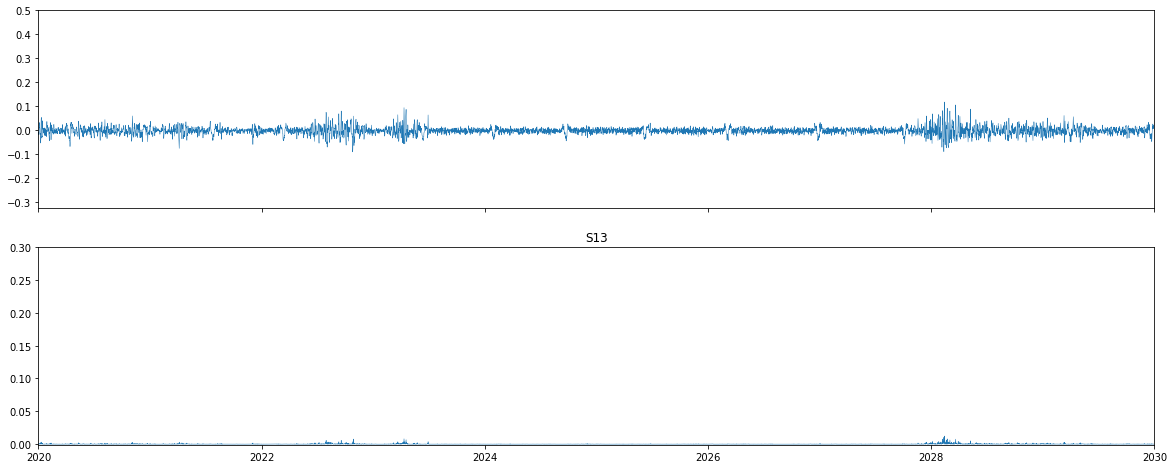

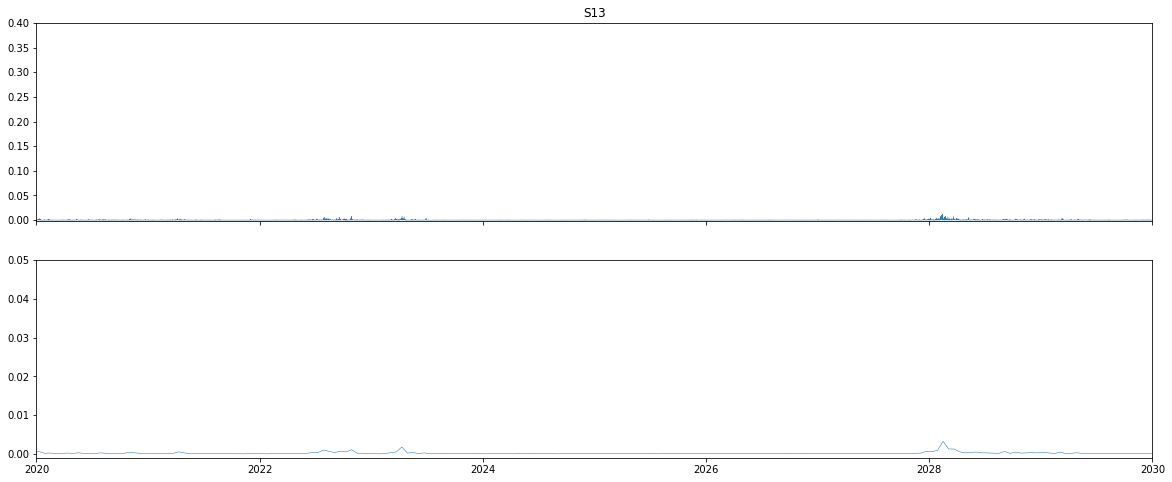

Dictionary from .pkl file has keys: dict_keys(['signal', 'label', 'subject'])
signal  is type: <class 'dict'>  with length: 2
label  is type: <class 'numpy.ndarray'>  with length: 3883600
subject  is type: <class 'str'>  with length: 3


SUBJECT #: S14


LABEL unique values: [0 1 2 3 4 5 6 7]
{'0': 'not defined/transient', '1': 'baseline', '2': 'stress', '3': 'amusement', '4': 'meditation', '5': 'ignore', '6': 'ignore', '7': 'ignore'}


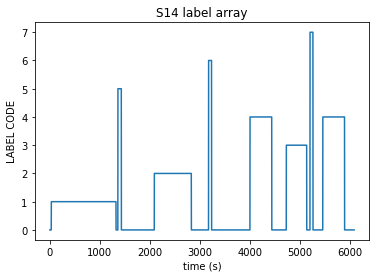



SIGNAL KEYS: dict_keys(['chest', 'wrist'])
chest: <class 'dict'> has keys: dict_keys(['ACC', 'ECG', 'EMG', 'EDA', 'Temp', 'Resp'])
wrist: <class 'dict'> has keys: dict_keys(['ACC', 'BVP', 'EDA', 'TEMP'])

 Chest (RespiBAN) sensor
ACC array has shape: (3883600, 3) at 700 Hz for a total of  5548.0 seconds
ECG array has shape: (3883600, 1) at 700 Hz for a total of  5548.0 seconds
EMG array has shape: (3883600, 1) at 700 Hz for a total of  5548.0 seconds
EDA array has shape: (3883600, 1) at 700 Hz for a total of  5548.0 seconds
Temp array has shape: (3883600, 1) at 700 Hz for a total of  5548.0 seconds
Resp array has shape: (3883600, 1) at 700 Hz for a total of  5548.0 seconds


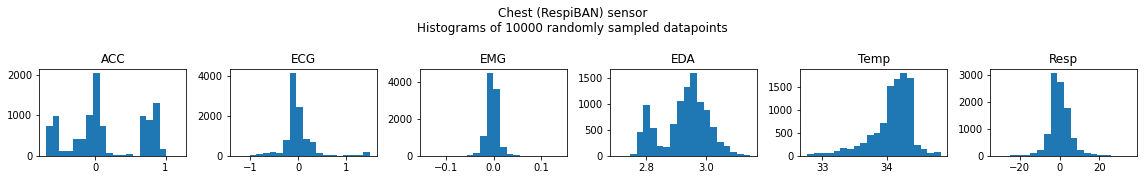


 Wrist (Empatica E4) sensor
ACC array has shape: (177536, 3) at 32 Hz for a total of  5548.0 seconds
BVP array has shape: (355072, 1) at 64 Hz for a total of  5548.0 seconds
EDA array has shape: (22192, 1) at 4 Hz for a total of  5548.0 seconds
TEMP array has shape: (22192, 1) at 4 Hz for a total of  5548.0 seconds


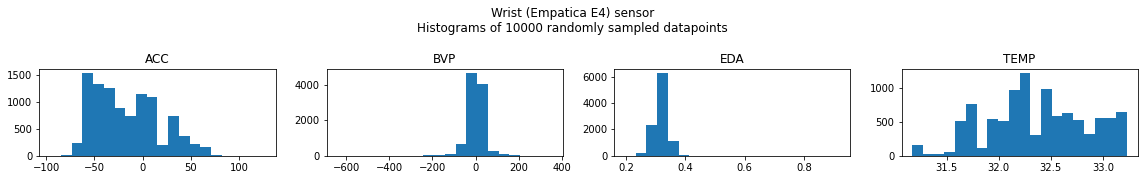


----------------------------------------------------------------------------

Elapsed time: 14.407341718673706
3883600 3883600
0.0 5547.998571428571


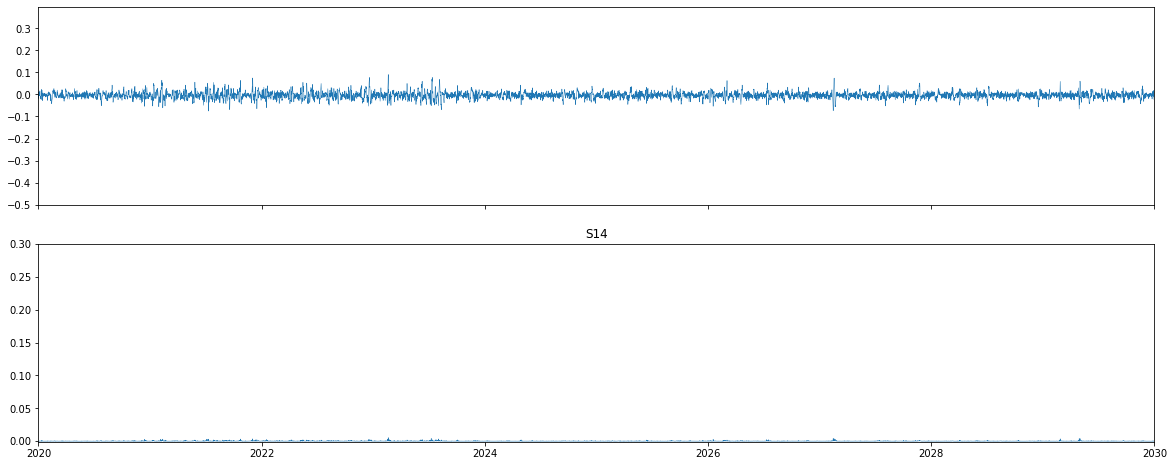

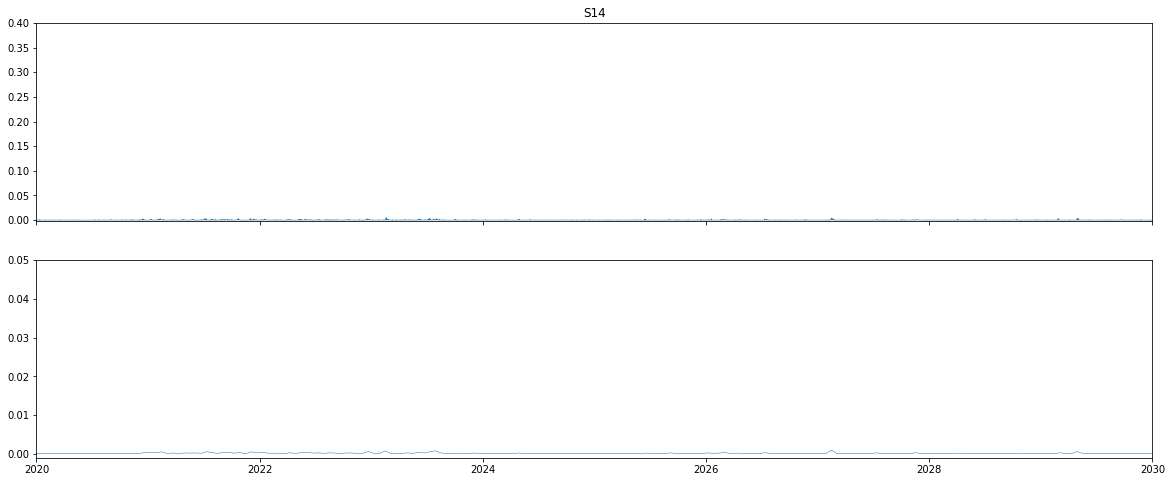

Dictionary from .pkl file has keys: dict_keys(['signal', 'label', 'subject'])
signal  is type: <class 'dict'>  with length: 2
label  is type: <class 'numpy.ndarray'>  with length: 3676400
subject  is type: <class 'str'>  with length: 3


SUBJECT #: S15


LABEL unique values: [0 1 2 3 4 5 6 7]
{'0': 'not defined/transient', '1': 'baseline', '2': 'stress', '3': 'amusement', '4': 'meditation', '5': 'ignore', '6': 'ignore', '7': 'ignore'}


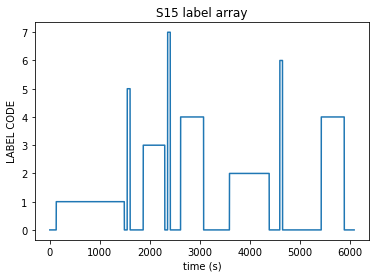



SIGNAL KEYS: dict_keys(['chest', 'wrist'])
chest: <class 'dict'> has keys: dict_keys(['ACC', 'ECG', 'EMG', 'EDA', 'Temp', 'Resp'])
wrist: <class 'dict'> has keys: dict_keys(['ACC', 'BVP', 'EDA', 'TEMP'])

 Chest (RespiBAN) sensor
ACC array has shape: (3676400, 3) at 700 Hz for a total of  5252.0 seconds
ECG array has shape: (3676400, 1) at 700 Hz for a total of  5252.0 seconds
EMG array has shape: (3676400, 1) at 700 Hz for a total of  5252.0 seconds
EDA array has shape: (3676400, 1) at 700 Hz for a total of  5252.0 seconds
Temp array has shape: (3676400, 1) at 700 Hz for a total of  5252.0 seconds
Resp array has shape: (3676400, 1) at 700 Hz for a total of  5252.0 seconds


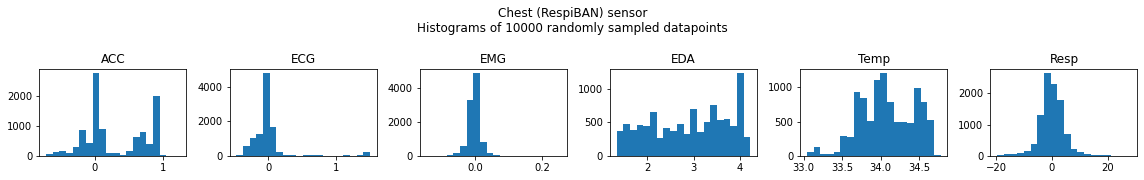


 Wrist (Empatica E4) sensor
ACC array has shape: (168064, 3) at 32 Hz for a total of  5252.0 seconds
BVP array has shape: (336128, 1) at 64 Hz for a total of  5252.0 seconds
EDA array has shape: (21008, 1) at 4 Hz for a total of  5252.0 seconds
TEMP array has shape: (21008, 1) at 4 Hz for a total of  5252.0 seconds


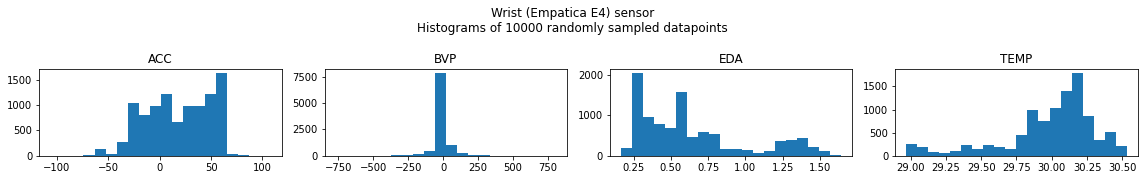


----------------------------------------------------------------------------

Elapsed time: 13.988088846206665
3676400 3676400
0.0 5251.998571428571


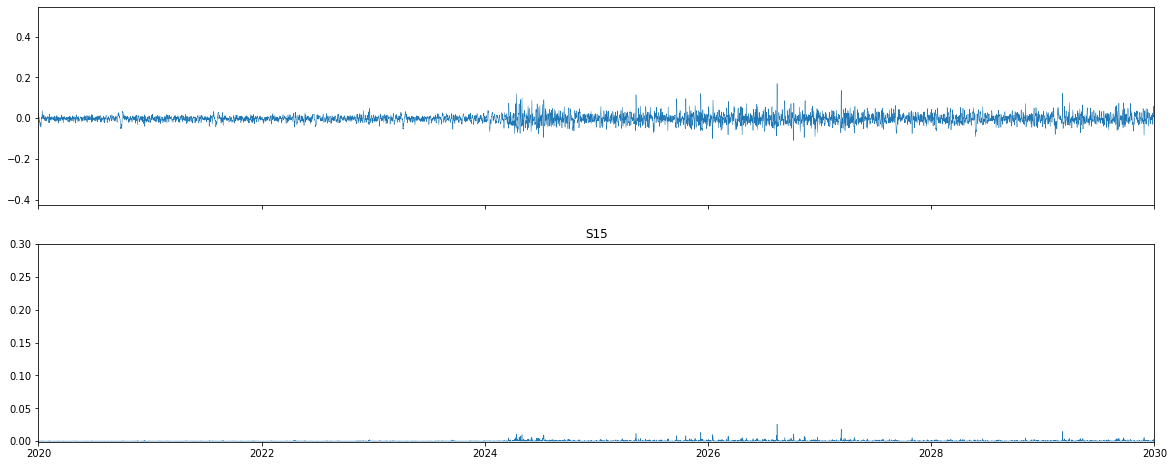

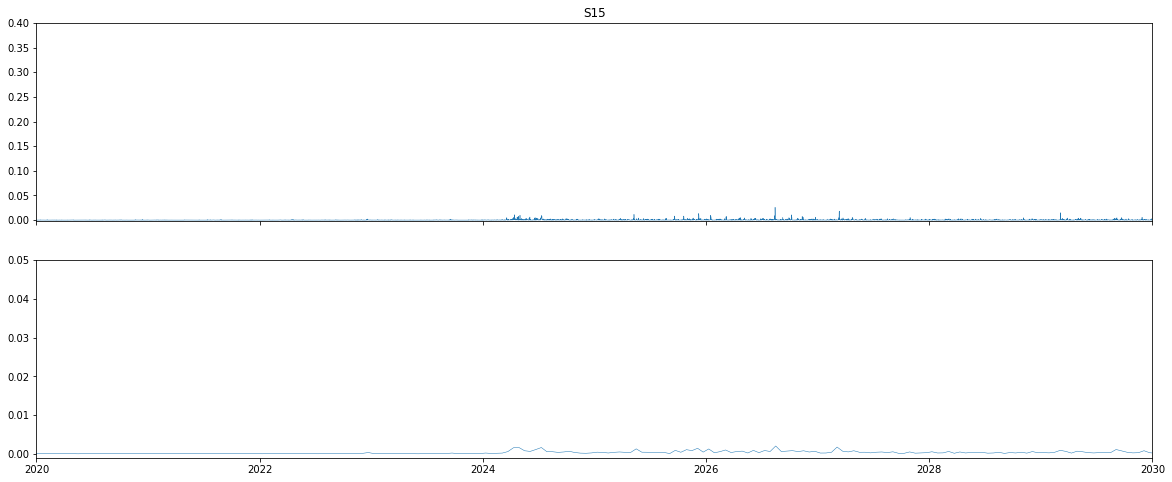

Dictionary from .pkl file has keys: dict_keys(['signal', 'label', 'subject'])
signal  is type: <class 'dict'>  with length: 2
label  is type: <class 'numpy.ndarray'>  with length: 3941700
subject  is type: <class 'str'>  with length: 3


SUBJECT #: S16


LABEL unique values: [0 1 2 3 4 5 6 7]
{'0': 'not defined/transient', '1': 'baseline', '2': 'stress', '3': 'amusement', '4': 'meditation', '5': 'ignore', '6': 'ignore', '7': 'ignore'}


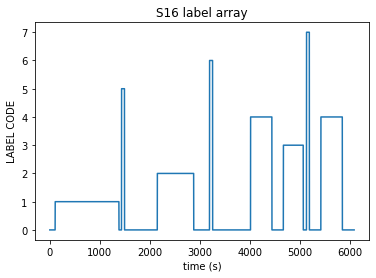



SIGNAL KEYS: dict_keys(['chest', 'wrist'])
chest: <class 'dict'> has keys: dict_keys(['ACC', 'ECG', 'EMG', 'EDA', 'Temp', 'Resp'])
wrist: <class 'dict'> has keys: dict_keys(['ACC', 'BVP', 'EDA', 'TEMP'])

 Chest (RespiBAN) sensor
ACC array has shape: (3941700, 3) at 700 Hz for a total of  5631.0 seconds
ECG array has shape: (3941700, 1) at 700 Hz for a total of  5631.0 seconds
EMG array has shape: (3941700, 1) at 700 Hz for a total of  5631.0 seconds
EDA array has shape: (3941700, 1) at 700 Hz for a total of  5631.0 seconds
Temp array has shape: (3941700, 1) at 700 Hz for a total of  5631.0 seconds
Resp array has shape: (3941700, 1) at 700 Hz for a total of  5631.0 seconds


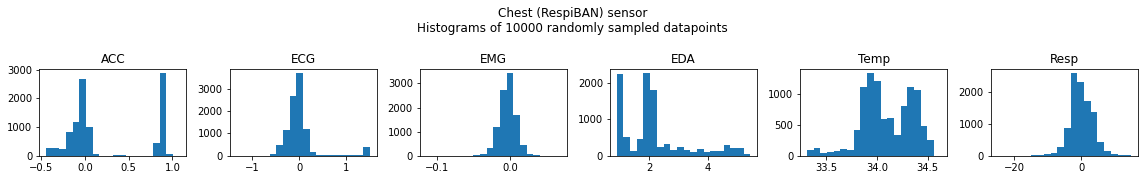


 Wrist (Empatica E4) sensor
ACC array has shape: (180192, 3) at 32 Hz for a total of  5631.0 seconds
BVP array has shape: (360384, 1) at 64 Hz for a total of  5631.0 seconds
EDA array has shape: (22524, 1) at 4 Hz for a total of  5631.0 seconds
TEMP array has shape: (22524, 1) at 4 Hz for a total of  5631.0 seconds


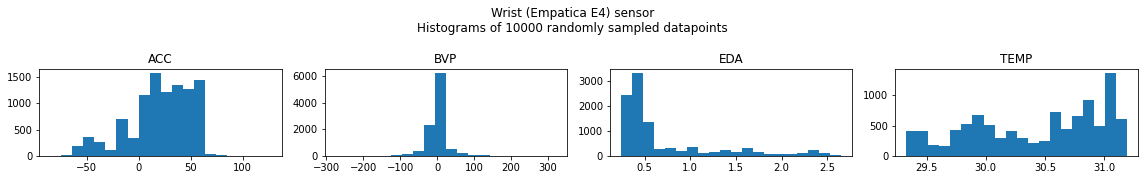


----------------------------------------------------------------------------

Elapsed time: 14.586037397384644
3941700 3941700
0.0 5630.998571428571


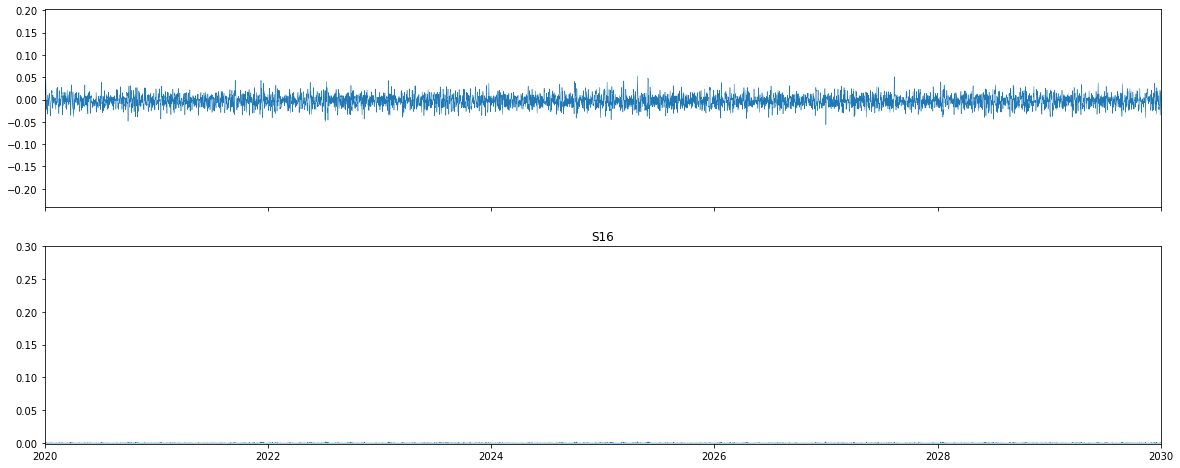

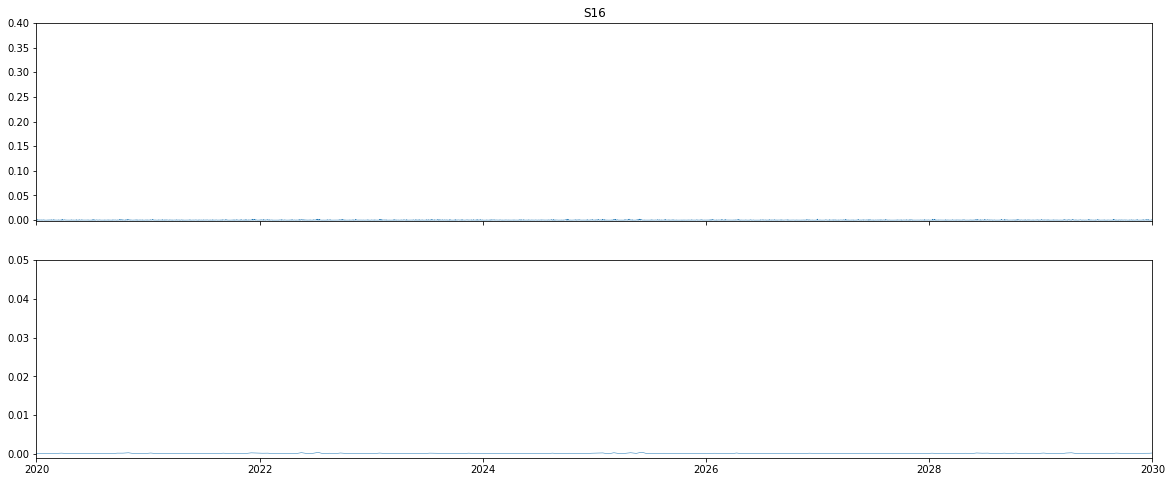

Dictionary from .pkl file has keys: dict_keys(['signal', 'label', 'subject'])
signal  is type: <class 'dict'>  with length: 2
label  is type: <class 'numpy.ndarray'>  with length: 4144000
subject  is type: <class 'str'>  with length: 3


SUBJECT #: S17


LABEL unique values: [0 1 2 3 4 5 6 7]
{'0': 'not defined/transient', '1': 'baseline', '2': 'stress', '3': 'amusement', '4': 'meditation', '5': 'ignore', '6': 'ignore', '7': 'ignore'}


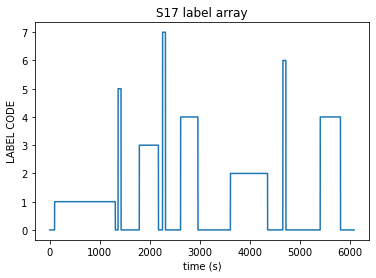



SIGNAL KEYS: dict_keys(['chest', 'wrist'])
chest: <class 'dict'> has keys: dict_keys(['ACC', 'ECG', 'EMG', 'EDA', 'Temp', 'Resp'])
wrist: <class 'dict'> has keys: dict_keys(['ACC', 'BVP', 'EDA', 'TEMP'])

 Chest (RespiBAN) sensor
ACC array has shape: (4144000, 3) at 700 Hz for a total of  5920.0 seconds
ECG array has shape: (4144000, 1) at 700 Hz for a total of  5920.0 seconds
EMG array has shape: (4144000, 1) at 700 Hz for a total of  5920.0 seconds
EDA array has shape: (4144000, 1) at 700 Hz for a total of  5920.0 seconds
Temp array has shape: (4144000, 1) at 700 Hz for a total of  5920.0 seconds
Resp array has shape: (4144000, 1) at 700 Hz for a total of  5920.0 seconds


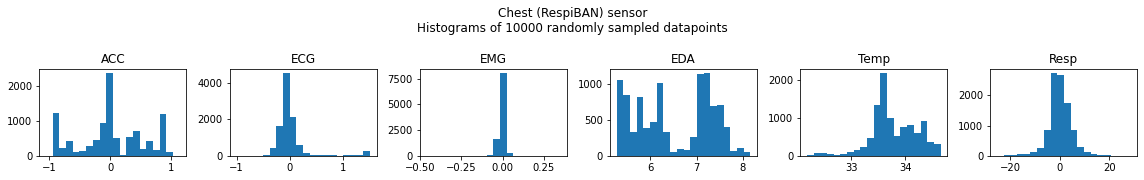


 Wrist (Empatica E4) sensor
ACC array has shape: (189440, 3) at 32 Hz for a total of  5920.0 seconds
BVP array has shape: (378880, 1) at 64 Hz for a total of  5920.0 seconds
EDA array has shape: (23680, 1) at 4 Hz for a total of  5920.0 seconds
TEMP array has shape: (23680, 1) at 4 Hz for a total of  5920.0 seconds


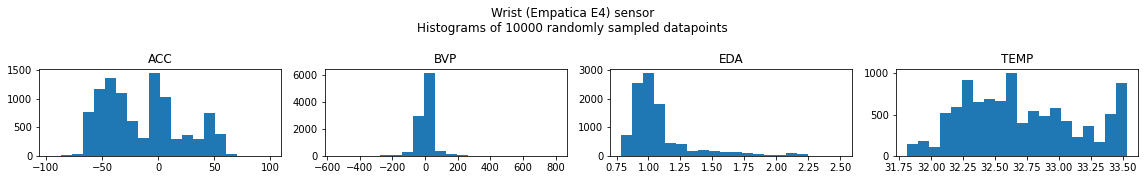


----------------------------------------------------------------------------

Elapsed time: 16.522592306137085
4144000 4144000
0.0 5919.998571428571


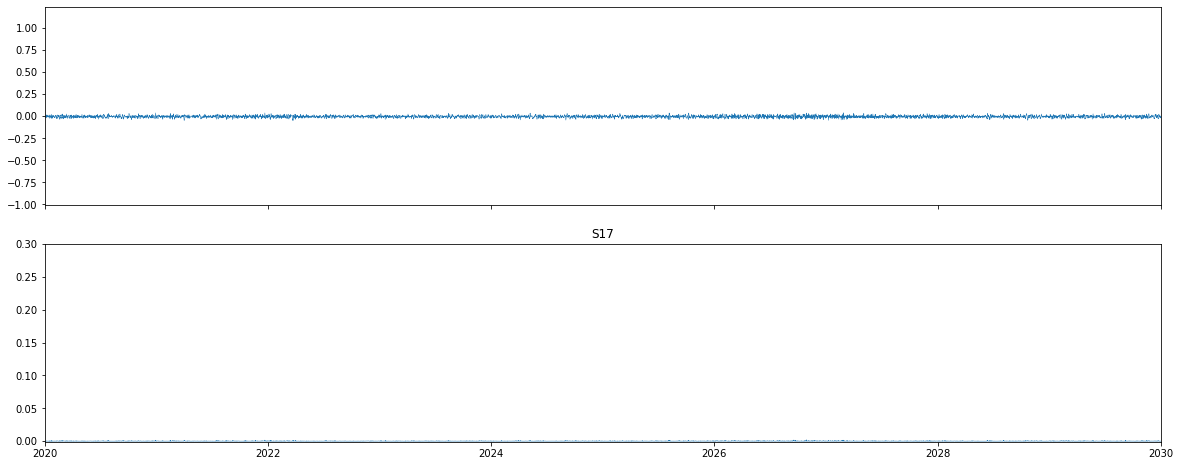

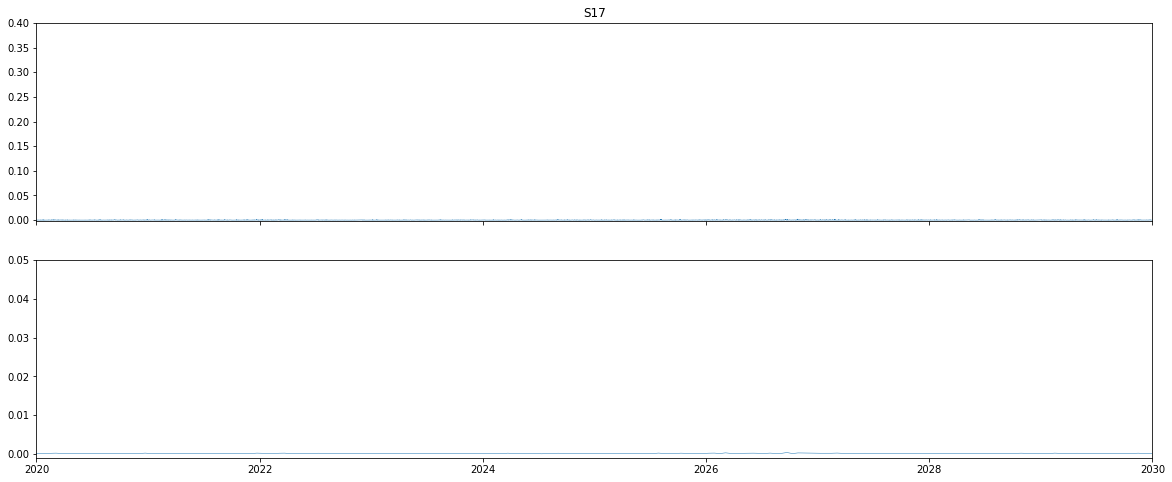

In [252]:
for Subj_ID in pkl_dict.keys():
    #Subj_ID = 'S3'
    t0 = time()
    S_signal = check_pkl_raw(Subj_ID, pkl_dict, return_data=True)
    print('Elapsed time:',time() - t0)

    EMG_y = S_signal['signal']['chest']['EMG'].flatten()
    EMG_x = np.linspace(0, len(EMG_y)/700, len(EMG_y), endpoint=False)
    print(len(EMG_y), len(EMG_x))
    print(EMG_x[0], EMG_x[-1])

    filtered_emg = highpass_filter(EMG_y, sr=700)
    fig, ax = plt.subplots(2,1,sharex=True, figsize=[20,8])
    ax[0].plot(EMG_x, EMG_y, lw=0.5)
    ax[1].plot(EMG_x, filtered_emg**2, lw=0.5)
    ax[1].set_xlim(2020, 2030)
    ax[1].set_ylim(-0.001, 0.3)
    ax[1].set_title(Subj_ID)
    plt.show()

    emg_df = pd.DataFrame(dict(time=EMG_x, emg=filtered_emg**2))
    emg_df_time_index = pd.to_timedelta(emg_df.time, 'seconds')
    emg_df.index = emg_df_time_index
    emg_df.head()

    emg_rolling_mean = emg_df.resample('50ms').mean().dropna()
    emg_rolling_mean.dropna().head()

    filtered_emg = highpass_filter(EMG_y, sr=700)
    fig, ax = plt.subplots(2,1,sharex=True, figsize=[20,8])
    ax[0].plot(EMG_x, filtered_emg**2, lw=0.5)
    ax[0].set_xlim(2020, 2030)
    ax[0].set_ylim(-0.001, 0.4)
    ax[0].set_title(Subj_ID)
    ax[1].plot(emg_rolling_mean.time.values, emg_rolling_mean.emg.values, lw=0.5)
    ax[1].set_ylim(-0.001, 0.05)
    plt.show()

    emg_rolling_mean.to_csv('EMG_50msMEAN_'+Subj_ID+'.csv')

In [251]:
pkl_dict.keys()

dict_keys(['S2', 'S3', 'S4', 'S5', 'S6', 'S7', 'S8', 'S9', 'S10', 'S11', 'S13', 'S14', 'S15', 'S16', 'S17'])

# Now for energy of accelerometer

Dictionary from .pkl file has keys: dict_keys(['signal', 'label', 'subject'])
signal  is type: <class 'dict'>  with length: 2
label  is type: <class 'numpy.ndarray'>  with length: 4255300
subject  is type: <class 'str'>  with length: 2


SUBJECT #: S2


LABEL unique values: [0 1 2 3 4 6 7]
{'0': 'not defined/transient', '1': 'baseline', '2': 'stress', '3': 'amusement', '4': 'meditation', '5': 'ignore', '6': 'ignore', '7': 'ignore'}


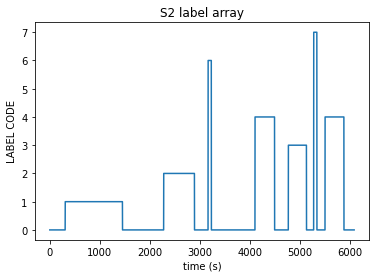



SIGNAL KEYS: dict_keys(['chest', 'wrist'])
chest: <class 'dict'> has keys: dict_keys(['ACC', 'ECG', 'EMG', 'EDA', 'Temp', 'Resp'])
wrist: <class 'dict'> has keys: dict_keys(['ACC', 'BVP', 'EDA', 'TEMP'])

 Chest (RespiBAN) sensor
ACC array has shape: (4255300, 3) at 700 Hz for a total of  6079.0 seconds
ECG array has shape: (4255300, 1) at 700 Hz for a total of  6079.0 seconds
EMG array has shape: (4255300, 1) at 700 Hz for a total of  6079.0 seconds
EDA array has shape: (4255300, 1) at 700 Hz for a total of  6079.0 seconds
Temp array has shape: (4255300, 1) at 700 Hz for a total of  6079.0 seconds
Resp array has shape: (4255300, 1) at 700 Hz for a total of  6079.0 seconds


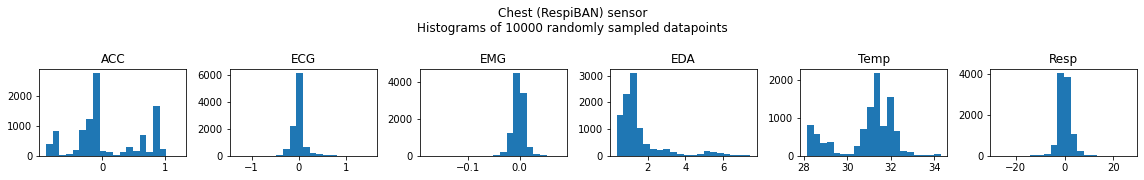


 Wrist (Empatica E4) sensor
ACC array has shape: (194528, 3) at 32 Hz for a total of  6079.0 seconds
BVP array has shape: (389056, 1) at 64 Hz for a total of  6079.0 seconds
EDA array has shape: (24316, 1) at 4 Hz for a total of  6079.0 seconds
TEMP array has shape: (24316, 1) at 4 Hz for a total of  6079.0 seconds


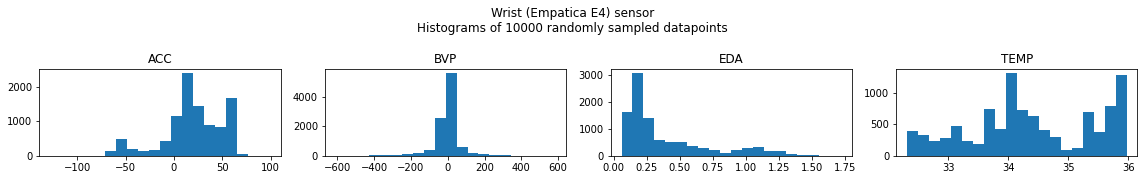


----------------------------------------------------------------------------

Elapsed time: 8.218620777130127
4255300 4255300


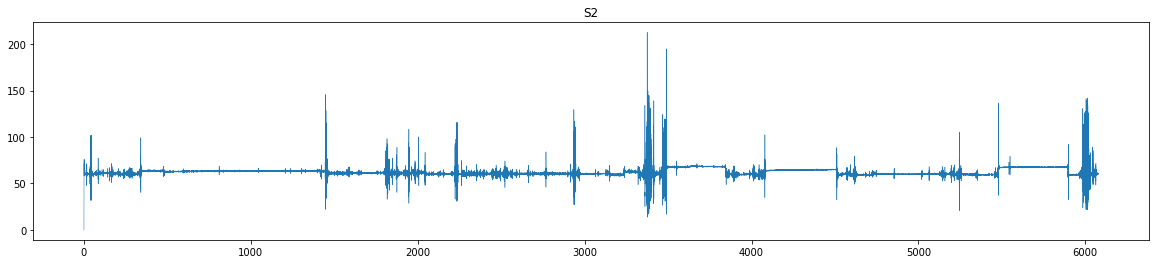

Dictionary from .pkl file has keys: dict_keys(['signal', 'label', 'subject'])
signal  is type: <class 'dict'>  with length: 2
label  is type: <class 'numpy.ndarray'>  with length: 4545100
subject  is type: <class 'str'>  with length: 2


SUBJECT #: S3


LABEL unique values: [0 1 2 3 4 5 6 7]
{'0': 'not defined/transient', '1': 'baseline', '2': 'stress', '3': 'amusement', '4': 'meditation', '5': 'ignore', '6': 'ignore', '7': 'ignore'}


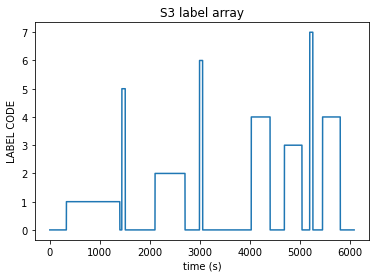



SIGNAL KEYS: dict_keys(['chest', 'wrist'])
chest: <class 'dict'> has keys: dict_keys(['ACC', 'ECG', 'EMG', 'EDA', 'Temp', 'Resp'])
wrist: <class 'dict'> has keys: dict_keys(['ACC', 'BVP', 'EDA', 'TEMP'])

 Chest (RespiBAN) sensor
ACC array has shape: (4545100, 3) at 700 Hz for a total of  6493.0 seconds
ECG array has shape: (4545100, 1) at 700 Hz for a total of  6493.0 seconds
EMG array has shape: (4545100, 1) at 700 Hz for a total of  6493.0 seconds
EDA array has shape: (4545100, 1) at 700 Hz for a total of  6493.0 seconds
Temp array has shape: (4545100, 1) at 700 Hz for a total of  6493.0 seconds
Resp array has shape: (4545100, 1) at 700 Hz for a total of  6493.0 seconds


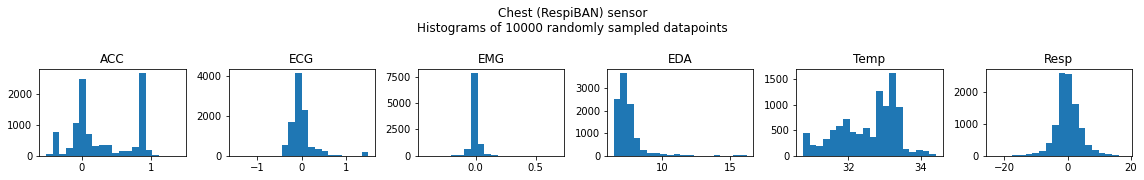


 Wrist (Empatica E4) sensor
ACC array has shape: (207776, 3) at 32 Hz for a total of  6493.0 seconds
BVP array has shape: (415552, 1) at 64 Hz for a total of  6493.0 seconds
EDA array has shape: (25972, 1) at 4 Hz for a total of  6493.0 seconds
TEMP array has shape: (25972, 1) at 4 Hz for a total of  6493.0 seconds


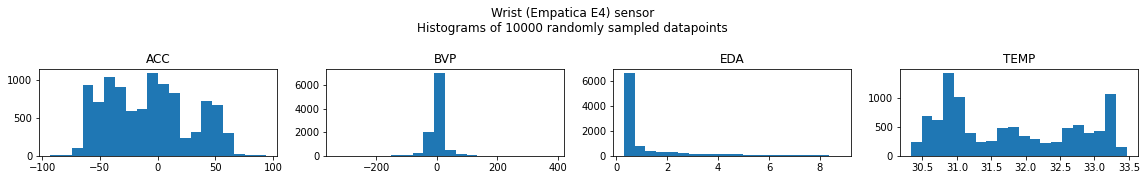


----------------------------------------------------------------------------

Elapsed time: 8.385636329650879
4545100 4545100


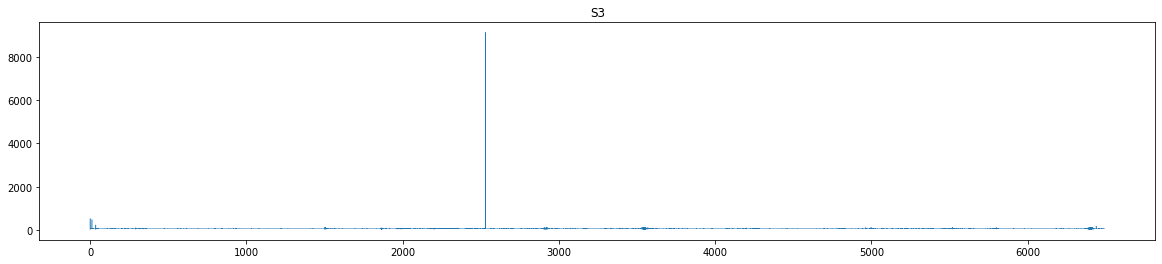

In [266]:
#ACC
for Subj_ID in ['S2','S3']:# pkl_dict.keys():
    #Subj_ID = 'S3'
    t0 = time()
    S_signal = check_pkl_raw(Subj_ID, pkl_dict, return_data=True)
    print('Elapsed time:',time() - t0)

    ACC_y0 = S_signal['signal']['chest']['ACC'][:,0]
    ACC_y1 = S_signal['signal']['chest']['ACC'][:,1]
    ACC_y2 = S_signal['signal']['chest']['ACC'][:,2]
    ACC_x = np.linspace(0, len(ACC_y0)/700, len(ACC_y0), endpoint=False)
    print(len(ACC_x), len(ACC_y0))
    
    ACC_df = pd.DataFrame(dict(time=ACC_x, ACC_y0=ACC_y0, ACC_y1=ACC_y1, ACC_y2=ACC_y2))
    ACC_df[['ACC_y0','ACC_y1','ACC_y2']] = ACC_df[['ACC_y0','ACC_y1','ACC_y2']].diff().dropna()
    ACC_df[['ACC_y0','ACC_y1','ACC_y2']] = ACC_df[['ACC_y0','ACC_y1','ACC_y2']]**2
    ACC_df[['ACC_y0','ACC_y1','ACC_y2']] = ACC_df[['ACC_y0','ACC_y1','ACC_y2']].rolling(70).sum().dropna()
    ACC_df['ACC_energy'] = ACC_df[['ACC_y0','ACC_y1','ACC_y2']].sum(axis=1)
    
    fig, ax = plt.subplots(1,1,sharex=True, figsize=[20,4])
    ax.plot(ACC_df['time'], ACC_df['ACC_energy'], lw=0.5)
    #ax.set_xlim(2000, 2060)
    ax.set_title(Subj_ID)
    plt.show()

    #emg_rolling_mean.to_csv('EMG_50msMEAN_'+Subj_ID+'.csv')

Dictionary from .pkl file has keys: dict_keys(['signal', 'label', 'subject'])
signal  is type: <class 'dict'>  with length: 2
label  is type: <class 'numpy.ndarray'>  with length: 4255300
subject  is type: <class 'str'>  with length: 2


SUBJECT #: S2


LABEL unique values: [0 1 2 3 4 6 7]
{'0': 'not defined/transient', '1': 'baseline', '2': 'stress', '3': 'amusement', '4': 'meditation', '5': 'ignore', '6': 'ignore', '7': 'ignore'}


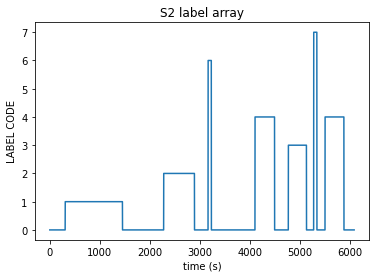



SIGNAL KEYS: dict_keys(['chest', 'wrist'])
chest: <class 'dict'> has keys: dict_keys(['ACC', 'ECG', 'EMG', 'EDA', 'Temp', 'Resp'])
wrist: <class 'dict'> has keys: dict_keys(['ACC', 'BVP', 'EDA', 'TEMP'])

 Chest (RespiBAN) sensor
ACC array has shape: (4255300, 3) at 700 Hz for a total of  6079.0 seconds
ECG array has shape: (4255300, 1) at 700 Hz for a total of  6079.0 seconds
EMG array has shape: (4255300, 1) at 700 Hz for a total of  6079.0 seconds
EDA array has shape: (4255300, 1) at 700 Hz for a total of  6079.0 seconds
Temp array has shape: (4255300, 1) at 700 Hz for a total of  6079.0 seconds
Resp array has shape: (4255300, 1) at 700 Hz for a total of  6079.0 seconds


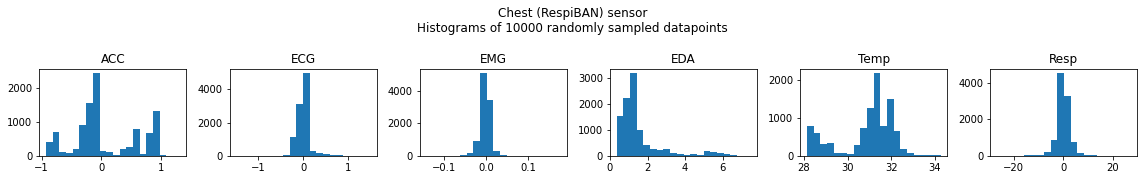


 Wrist (Empatica E4) sensor
ACC array has shape: (194528, 3) at 32 Hz for a total of  6079.0 seconds
BVP array has shape: (389056, 1) at 64 Hz for a total of  6079.0 seconds
EDA array has shape: (24316, 1) at 4 Hz for a total of  6079.0 seconds
TEMP array has shape: (24316, 1) at 4 Hz for a total of  6079.0 seconds


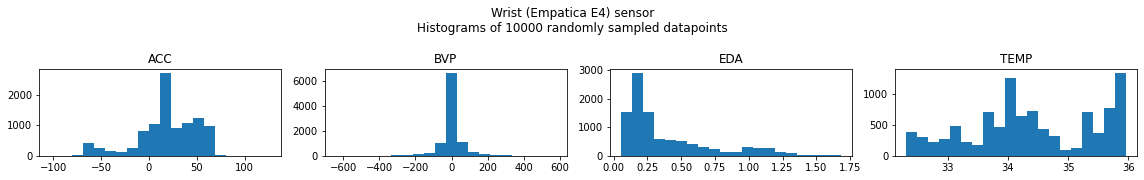


----------------------------------------------------------------------------

Elapsed time: 7.975950241088867
4255300 4255300


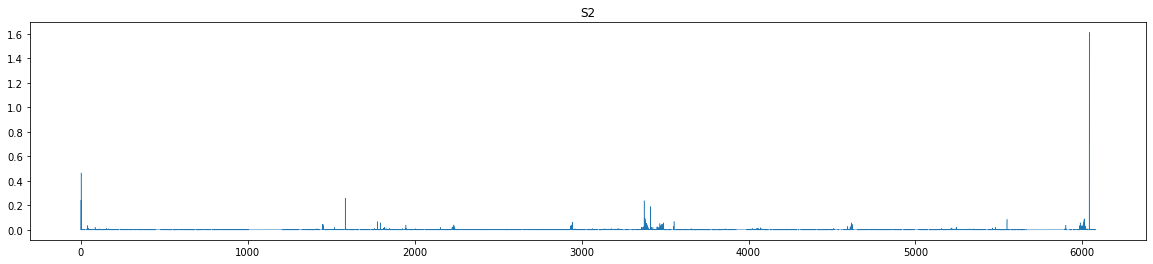

Dictionary from .pkl file has keys: dict_keys(['signal', 'label', 'subject'])
signal  is type: <class 'dict'>  with length: 2
label  is type: <class 'numpy.ndarray'>  with length: 4545100
subject  is type: <class 'str'>  with length: 2


SUBJECT #: S3


LABEL unique values: [0 1 2 3 4 5 6 7]
{'0': 'not defined/transient', '1': 'baseline', '2': 'stress', '3': 'amusement', '4': 'meditation', '5': 'ignore', '6': 'ignore', '7': 'ignore'}


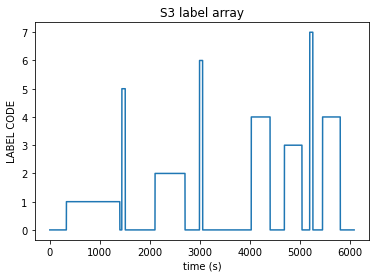



SIGNAL KEYS: dict_keys(['chest', 'wrist'])
chest: <class 'dict'> has keys: dict_keys(['ACC', 'ECG', 'EMG', 'EDA', 'Temp', 'Resp'])
wrist: <class 'dict'> has keys: dict_keys(['ACC', 'BVP', 'EDA', 'TEMP'])

 Chest (RespiBAN) sensor
ACC array has shape: (4545100, 3) at 700 Hz for a total of  6493.0 seconds
ECG array has shape: (4545100, 1) at 700 Hz for a total of  6493.0 seconds
EMG array has shape: (4545100, 1) at 700 Hz for a total of  6493.0 seconds
EDA array has shape: (4545100, 1) at 700 Hz for a total of  6493.0 seconds
Temp array has shape: (4545100, 1) at 700 Hz for a total of  6493.0 seconds
Resp array has shape: (4545100, 1) at 700 Hz for a total of  6493.0 seconds


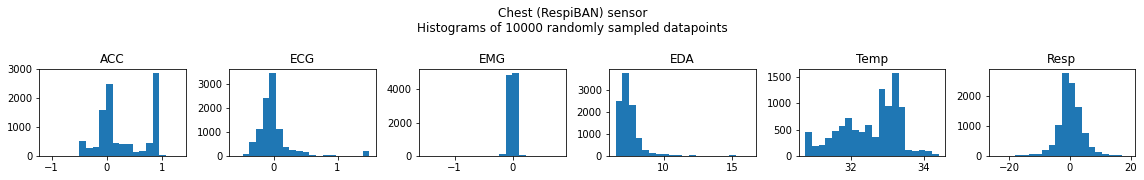


 Wrist (Empatica E4) sensor
ACC array has shape: (207776, 3) at 32 Hz for a total of  6493.0 seconds
BVP array has shape: (415552, 1) at 64 Hz for a total of  6493.0 seconds
EDA array has shape: (25972, 1) at 4 Hz for a total of  6493.0 seconds
TEMP array has shape: (25972, 1) at 4 Hz for a total of  6493.0 seconds


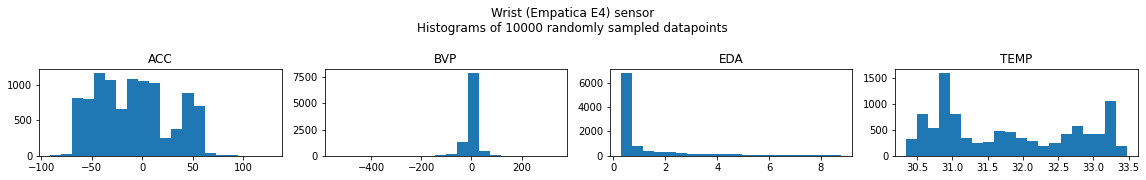


----------------------------------------------------------------------------

Elapsed time: 8.43563985824585
4545100 4545100


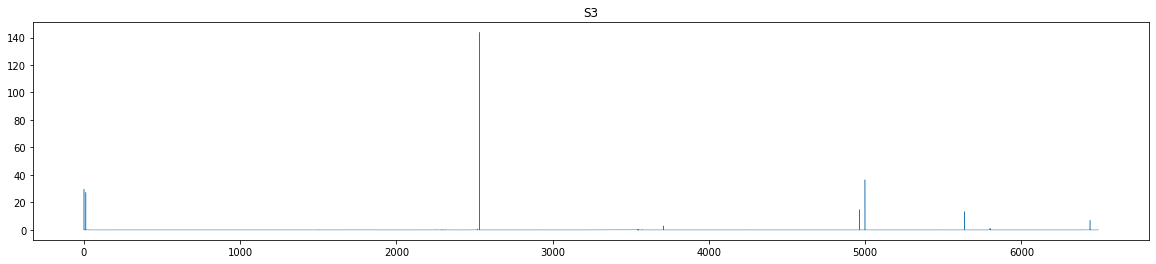

Dictionary from .pkl file has keys: dict_keys(['signal', 'label', 'subject'])
signal  is type: <class 'dict'>  with length: 2
label  is type: <class 'numpy.ndarray'>  with length: 4496100
subject  is type: <class 'str'>  with length: 2


SUBJECT #: S4


LABEL unique values: [0 1 2 3 4 5 6 7]
{'0': 'not defined/transient', '1': 'baseline', '2': 'stress', '3': 'amusement', '4': 'meditation', '5': 'ignore', '6': 'ignore', '7': 'ignore'}


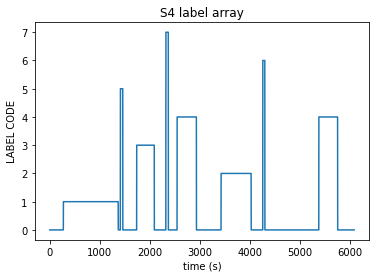



SIGNAL KEYS: dict_keys(['chest', 'wrist'])
chest: <class 'dict'> has keys: dict_keys(['ACC', 'ECG', 'EMG', 'EDA', 'Temp', 'Resp'])
wrist: <class 'dict'> has keys: dict_keys(['ACC', 'BVP', 'EDA', 'TEMP'])

 Chest (RespiBAN) sensor
ACC array has shape: (4496100, 3) at 700 Hz for a total of  6423.0 seconds
ECG array has shape: (4496100, 1) at 700 Hz for a total of  6423.0 seconds
EMG array has shape: (4496100, 1) at 700 Hz for a total of  6423.0 seconds
EDA array has shape: (4496100, 1) at 700 Hz for a total of  6423.0 seconds
Temp array has shape: (4496100, 1) at 700 Hz for a total of  6423.0 seconds
Resp array has shape: (4496100, 1) at 700 Hz for a total of  6423.0 seconds


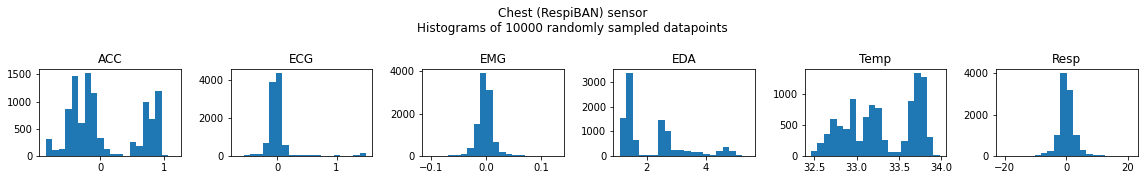


 Wrist (Empatica E4) sensor
ACC array has shape: (205536, 3) at 32 Hz for a total of  6423.0 seconds
BVP array has shape: (411072, 1) at 64 Hz for a total of  6423.0 seconds
EDA array has shape: (25692, 1) at 4 Hz for a total of  6423.0 seconds
TEMP array has shape: (25692, 1) at 4 Hz for a total of  6423.0 seconds


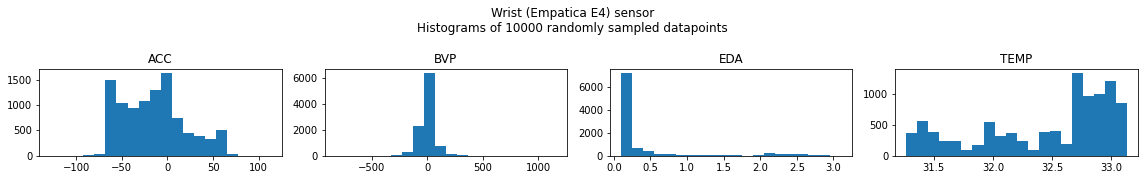


----------------------------------------------------------------------------

Elapsed time: 17.410882234573364
4496100 4496100


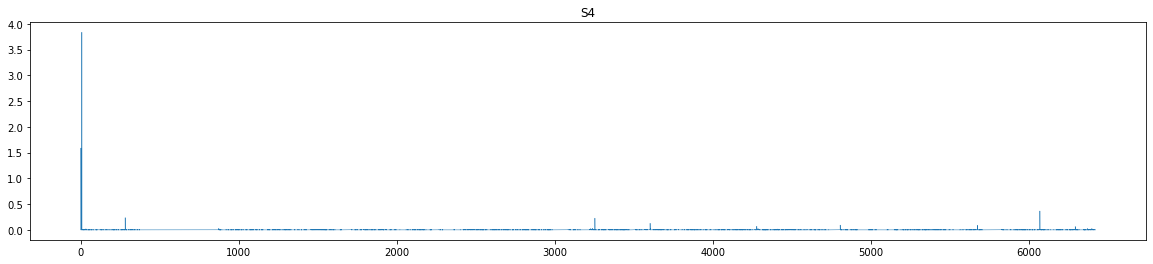

Dictionary from .pkl file has keys: dict_keys(['signal', 'label', 'subject'])
signal  is type: <class 'dict'>  with length: 2
label  is type: <class 'numpy.ndarray'>  with length: 4380600
subject  is type: <class 'str'>  with length: 2


SUBJECT #: S5


LABEL unique values: [0 1 2 3 4 5 6 7]
{'0': 'not defined/transient', '1': 'baseline', '2': 'stress', '3': 'amusement', '4': 'meditation', '5': 'ignore', '6': 'ignore', '7': 'ignore'}


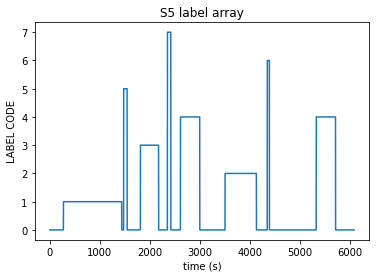



SIGNAL KEYS: dict_keys(['chest', 'wrist'])
chest: <class 'dict'> has keys: dict_keys(['ACC', 'ECG', 'EMG', 'EDA', 'Temp', 'Resp'])
wrist: <class 'dict'> has keys: dict_keys(['ACC', 'BVP', 'EDA', 'TEMP'])

 Chest (RespiBAN) sensor
ACC array has shape: (4380600, 3) at 700 Hz for a total of  6258.0 seconds
ECG array has shape: (4380600, 1) at 700 Hz for a total of  6258.0 seconds
EMG array has shape: (4380600, 1) at 700 Hz for a total of  6258.0 seconds
EDA array has shape: (4380600, 1) at 700 Hz for a total of  6258.0 seconds
Temp array has shape: (4380600, 1) at 700 Hz for a total of  6258.0 seconds
Resp array has shape: (4380600, 1) at 700 Hz for a total of  6258.0 seconds


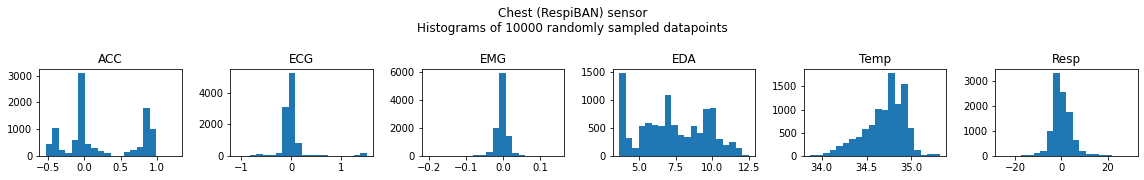


 Wrist (Empatica E4) sensor
ACC array has shape: (200256, 3) at 32 Hz for a total of  6258.0 seconds
BVP array has shape: (400512, 1) at 64 Hz for a total of  6258.0 seconds
EDA array has shape: (25032, 1) at 4 Hz for a total of  6258.0 seconds
TEMP array has shape: (25032, 1) at 4 Hz for a total of  6258.0 seconds


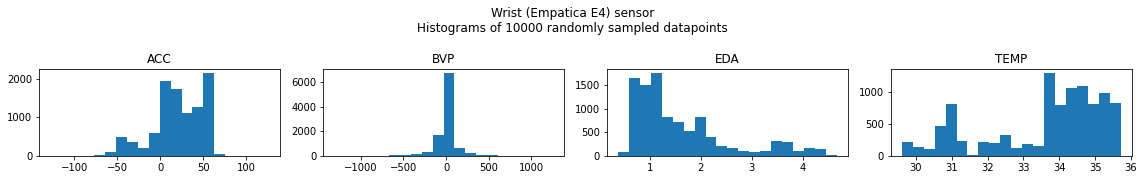


----------------------------------------------------------------------------

Elapsed time: 18.142918348312378
4380600 4380600


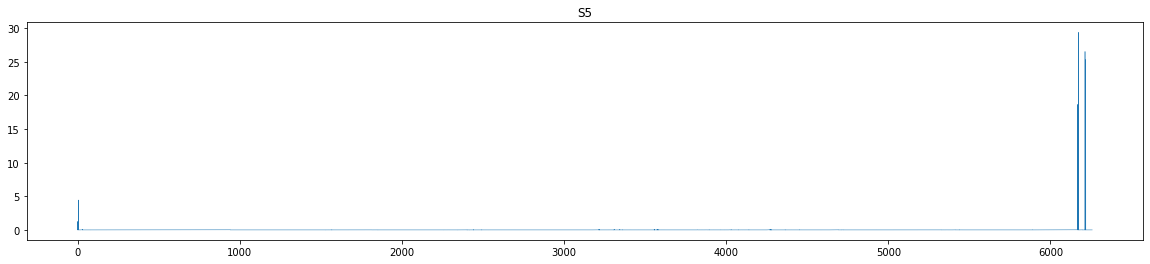

Dictionary from .pkl file has keys: dict_keys(['signal', 'label', 'subject'])
signal  is type: <class 'dict'>  with length: 2
label  is type: <class 'numpy.ndarray'>  with length: 4949700
subject  is type: <class 'str'>  with length: 2


SUBJECT #: S6


LABEL unique values: [0 1 2 3 4 5 6 7]
{'0': 'not defined/transient', '1': 'baseline', '2': 'stress', '3': 'amusement', '4': 'meditation', '5': 'ignore', '6': 'ignore', '7': 'ignore'}


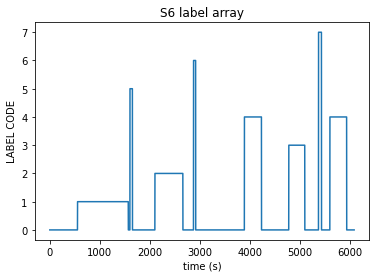



SIGNAL KEYS: dict_keys(['chest', 'wrist'])
chest: <class 'dict'> has keys: dict_keys(['ACC', 'ECG', 'EMG', 'EDA', 'Temp', 'Resp'])
wrist: <class 'dict'> has keys: dict_keys(['ACC', 'BVP', 'EDA', 'TEMP'])

 Chest (RespiBAN) sensor
ACC array has shape: (4949700, 3) at 700 Hz for a total of  7071.0 seconds
ECG array has shape: (4949700, 1) at 700 Hz for a total of  7071.0 seconds
EMG array has shape: (4949700, 1) at 700 Hz for a total of  7071.0 seconds
EDA array has shape: (4949700, 1) at 700 Hz for a total of  7071.0 seconds
Temp array has shape: (4949700, 1) at 700 Hz for a total of  7071.0 seconds
Resp array has shape: (4949700, 1) at 700 Hz for a total of  7071.0 seconds


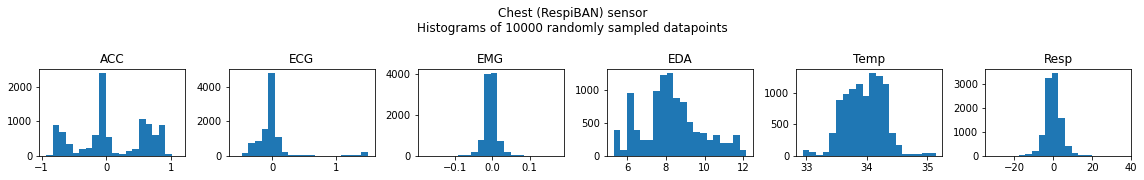


 Wrist (Empatica E4) sensor
ACC array has shape: (226272, 3) at 32 Hz for a total of  7071.0 seconds
BVP array has shape: (452544, 1) at 64 Hz for a total of  7071.0 seconds
EDA array has shape: (28284, 1) at 4 Hz for a total of  7071.0 seconds
TEMP array has shape: (28284, 1) at 4 Hz for a total of  7071.0 seconds


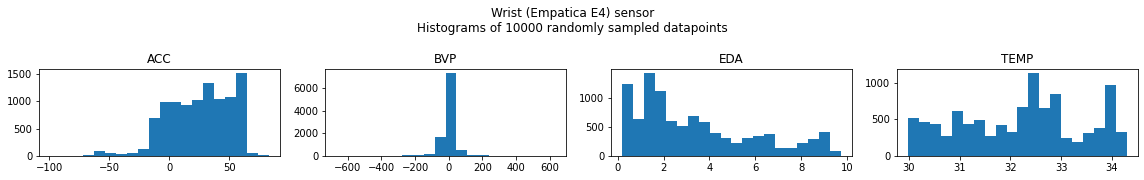


----------------------------------------------------------------------------

Elapsed time: 19.76152753829956
4949700 4949700


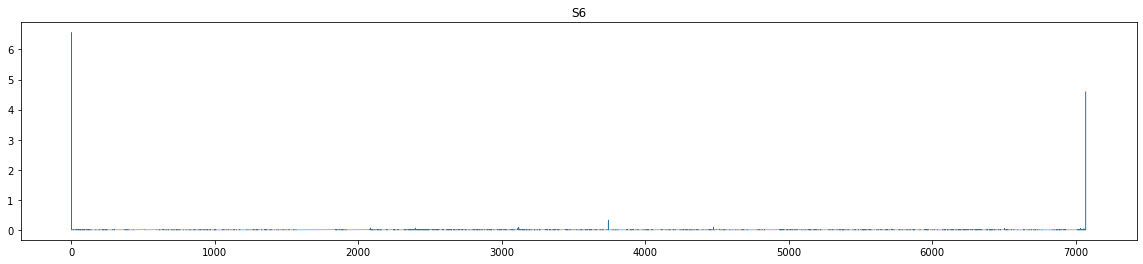

Dictionary from .pkl file has keys: dict_keys(['signal', 'label', 'subject'])
signal  is type: <class 'dict'>  with length: 2
label  is type: <class 'numpy.ndarray'>  with length: 3666600
subject  is type: <class 'str'>  with length: 2


SUBJECT #: S7


LABEL unique values: [0 1 2 3 4 5 6 7]
{'0': 'not defined/transient', '1': 'baseline', '2': 'stress', '3': 'amusement', '4': 'meditation', '5': 'ignore', '6': 'ignore', '7': 'ignore'}


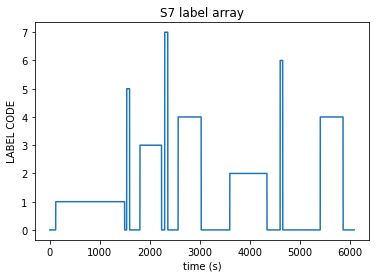



SIGNAL KEYS: dict_keys(['chest', 'wrist'])
chest: <class 'dict'> has keys: dict_keys(['ACC', 'ECG', 'EMG', 'EDA', 'Temp', 'Resp'])
wrist: <class 'dict'> has keys: dict_keys(['ACC', 'BVP', 'EDA', 'TEMP'])

 Chest (RespiBAN) sensor
ACC array has shape: (3666600, 3) at 700 Hz for a total of  5238.0 seconds
ECG array has shape: (3666600, 1) at 700 Hz for a total of  5238.0 seconds
EMG array has shape: (3666600, 1) at 700 Hz for a total of  5238.0 seconds
EDA array has shape: (3666600, 1) at 700 Hz for a total of  5238.0 seconds
Temp array has shape: (3666600, 1) at 700 Hz for a total of  5238.0 seconds
Resp array has shape: (3666600, 1) at 700 Hz for a total of  5238.0 seconds


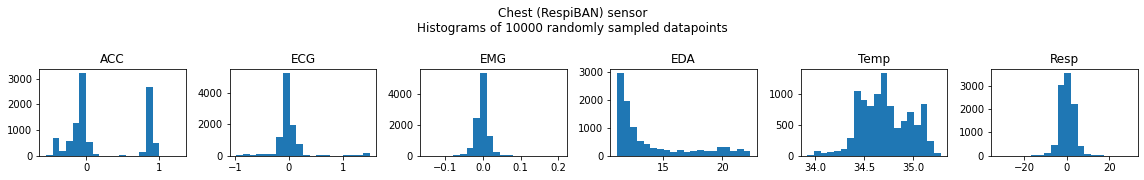


 Wrist (Empatica E4) sensor
ACC array has shape: (167616, 3) at 32 Hz for a total of  5238.0 seconds
BVP array has shape: (335232, 1) at 64 Hz for a total of  5238.0 seconds
EDA array has shape: (20952, 1) at 4 Hz for a total of  5238.0 seconds
TEMP array has shape: (20952, 1) at 4 Hz for a total of  5238.0 seconds


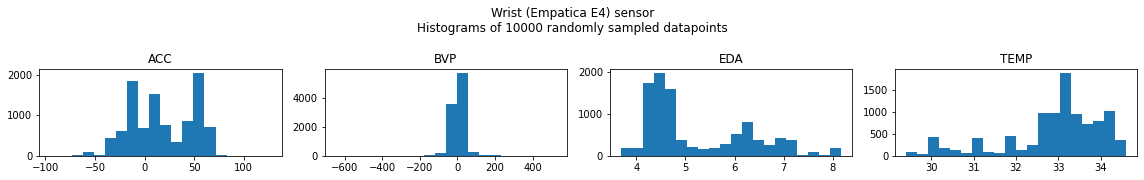


----------------------------------------------------------------------------

Elapsed time: 13.724664449691772
3666600 3666600


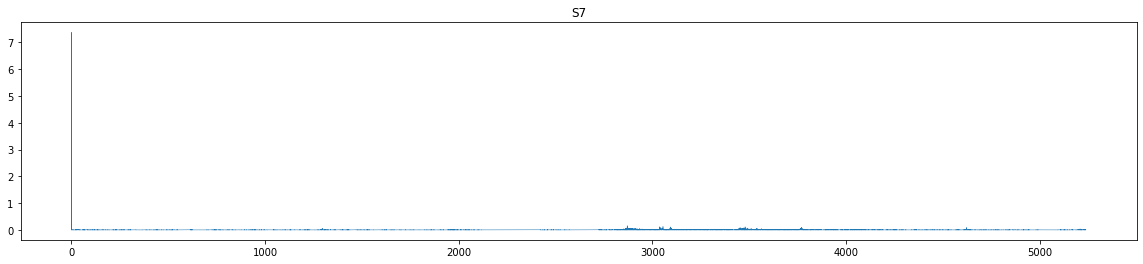

Dictionary from .pkl file has keys: dict_keys(['signal', 'label', 'subject'])
signal  is type: <class 'dict'>  with length: 2
label  is type: <class 'numpy.ndarray'>  with length: 3826200
subject  is type: <class 'str'>  with length: 2


SUBJECT #: S8


LABEL unique values: [0 1 2 3 4 5 6 7]
{'0': 'not defined/transient', '1': 'baseline', '2': 'stress', '3': 'amusement', '4': 'meditation', '5': 'ignore', '6': 'ignore', '7': 'ignore'}


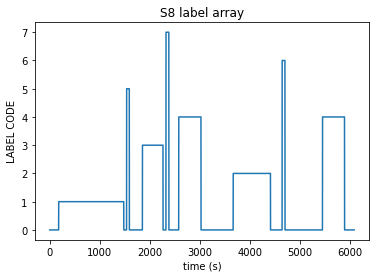



SIGNAL KEYS: dict_keys(['chest', 'wrist'])
chest: <class 'dict'> has keys: dict_keys(['ACC', 'ECG', 'EMG', 'EDA', 'Temp', 'Resp'])
wrist: <class 'dict'> has keys: dict_keys(['ACC', 'BVP', 'EDA', 'TEMP'])

 Chest (RespiBAN) sensor
ACC array has shape: (3826200, 3) at 700 Hz for a total of  5466.0 seconds
ECG array has shape: (3826200, 1) at 700 Hz for a total of  5466.0 seconds
EMG array has shape: (3826200, 1) at 700 Hz for a total of  5466.0 seconds
EDA array has shape: (3826200, 1) at 700 Hz for a total of  5466.0 seconds
Temp array has shape: (3826200, 1) at 700 Hz for a total of  5466.0 seconds
Resp array has shape: (3826200, 1) at 700 Hz for a total of  5466.0 seconds


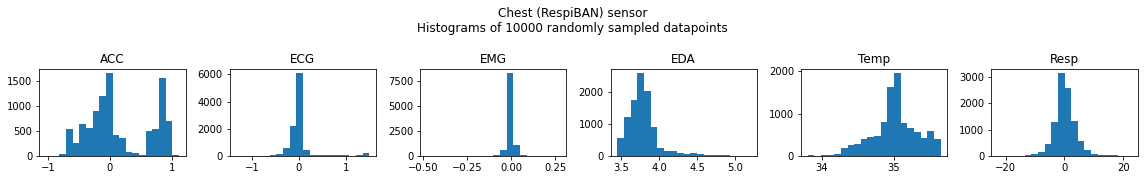


 Wrist (Empatica E4) sensor
ACC array has shape: (174912, 3) at 32 Hz for a total of  5466.0 seconds
BVP array has shape: (349824, 1) at 64 Hz for a total of  5466.0 seconds
EDA array has shape: (21864, 1) at 4 Hz for a total of  5466.0 seconds
TEMP array has shape: (21864, 1) at 4 Hz for a total of  5466.0 seconds


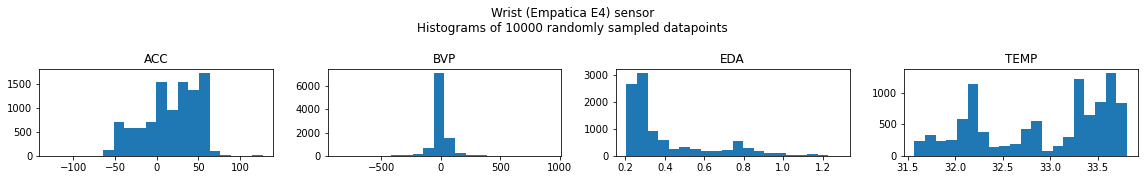


----------------------------------------------------------------------------

Elapsed time: 15.807093858718872
3826200 3826200


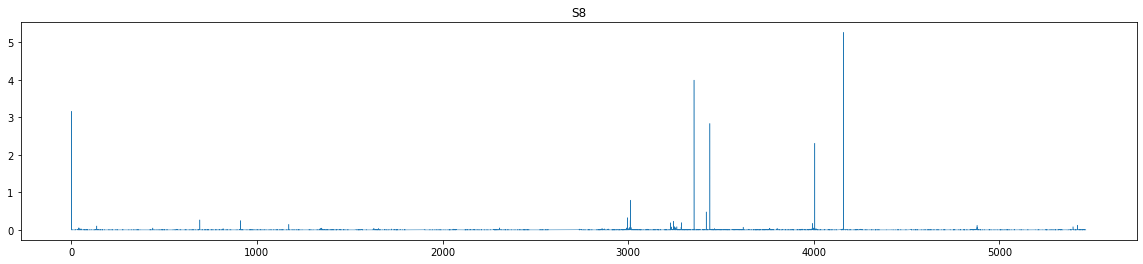

Dictionary from .pkl file has keys: dict_keys(['signal', 'label', 'subject'])
signal  is type: <class 'dict'>  with length: 2
label  is type: <class 'numpy.ndarray'>  with length: 3656100
subject  is type: <class 'str'>  with length: 2


SUBJECT #: S9


LABEL unique values: [0 1 2 3 4 5 6 7]
{'0': 'not defined/transient', '1': 'baseline', '2': 'stress', '3': 'amusement', '4': 'meditation', '5': 'ignore', '6': 'ignore', '7': 'ignore'}


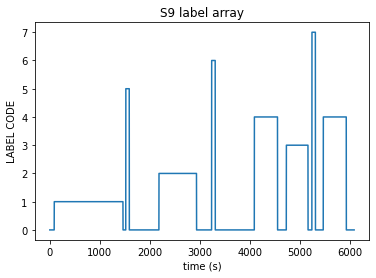



SIGNAL KEYS: dict_keys(['chest', 'wrist'])
chest: <class 'dict'> has keys: dict_keys(['ACC', 'ECG', 'EMG', 'EDA', 'Temp', 'Resp'])
wrist: <class 'dict'> has keys: dict_keys(['ACC', 'BVP', 'EDA', 'TEMP'])

 Chest (RespiBAN) sensor
ACC array has shape: (3656100, 3) at 700 Hz for a total of  5223.0 seconds
ECG array has shape: (3656100, 1) at 700 Hz for a total of  5223.0 seconds
EMG array has shape: (3656100, 1) at 700 Hz for a total of  5223.0 seconds
EDA array has shape: (3656100, 1) at 700 Hz for a total of  5223.0 seconds
Temp array has shape: (3656100, 1) at 700 Hz for a total of  5223.0 seconds
Resp array has shape: (3656100, 1) at 700 Hz for a total of  5223.0 seconds


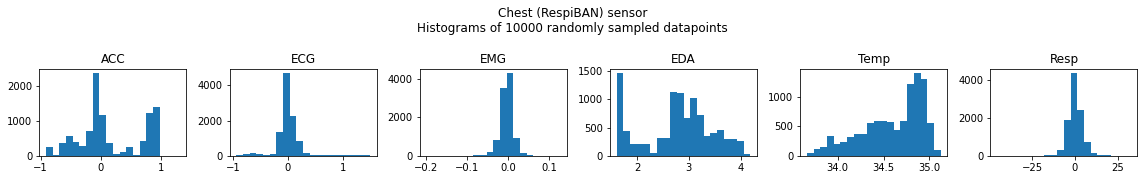


 Wrist (Empatica E4) sensor
ACC array has shape: (167136, 3) at 32 Hz for a total of  5223.0 seconds
BVP array has shape: (334272, 1) at 64 Hz for a total of  5223.0 seconds
EDA array has shape: (20892, 1) at 4 Hz for a total of  5223.0 seconds
TEMP array has shape: (20892, 1) at 4 Hz for a total of  5223.0 seconds


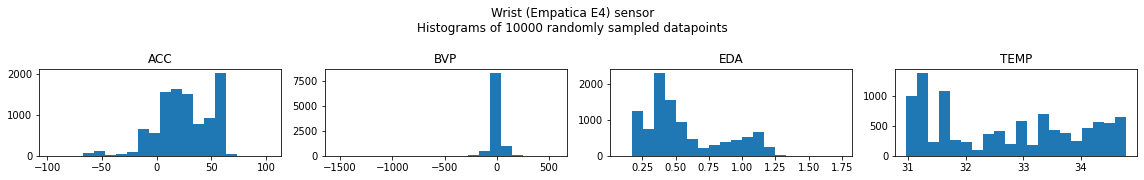


----------------------------------------------------------------------------

Elapsed time: 15.758274555206299
3656100 3656100


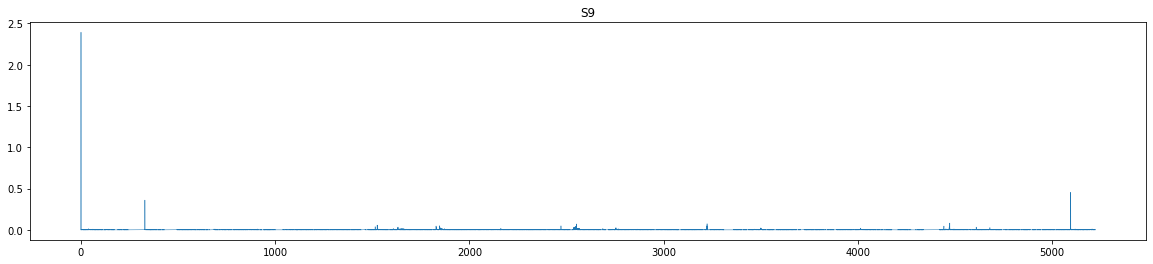

Dictionary from .pkl file has keys: dict_keys(['signal', 'label', 'subject'])
signal  is type: <class 'dict'>  with length: 2
label  is type: <class 'numpy.ndarray'>  with length: 3847200
subject  is type: <class 'str'>  with length: 3


SUBJECT #: S10


LABEL unique values: [0 1 2 3 4 5 6 7]
{'0': 'not defined/transient', '1': 'baseline', '2': 'stress', '3': 'amusement', '4': 'meditation', '5': 'ignore', '6': 'ignore', '7': 'ignore'}


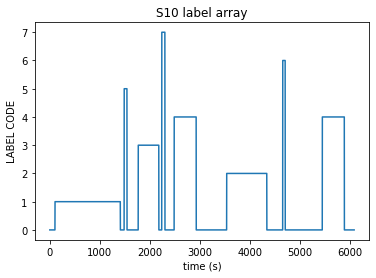



SIGNAL KEYS: dict_keys(['chest', 'wrist'])
chest: <class 'dict'> has keys: dict_keys(['ACC', 'ECG', 'EMG', 'EDA', 'Temp', 'Resp'])
wrist: <class 'dict'> has keys: dict_keys(['ACC', 'BVP', 'EDA', 'TEMP'])

 Chest (RespiBAN) sensor
ACC array has shape: (3847200, 3) at 700 Hz for a total of  5496.0 seconds
ECG array has shape: (3847200, 1) at 700 Hz for a total of  5496.0 seconds
EMG array has shape: (3847200, 1) at 700 Hz for a total of  5496.0 seconds
EDA array has shape: (3847200, 1) at 700 Hz for a total of  5496.0 seconds
Temp array has shape: (3847200, 1) at 700 Hz for a total of  5496.0 seconds
Resp array has shape: (3847200, 1) at 700 Hz for a total of  5496.0 seconds


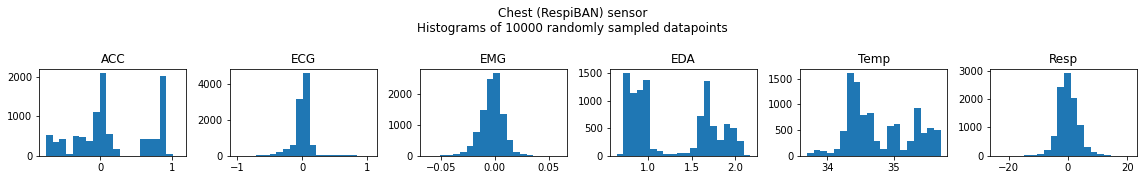


 Wrist (Empatica E4) sensor
ACC array has shape: (175872, 3) at 32 Hz for a total of  5496.0 seconds
BVP array has shape: (351744, 1) at 64 Hz for a total of  5496.0 seconds
EDA array has shape: (21984, 1) at 4 Hz for a total of  5496.0 seconds
TEMP array has shape: (21984, 1) at 4 Hz for a total of  5496.0 seconds


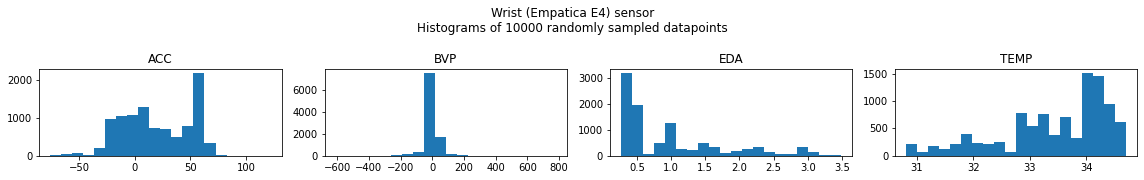


----------------------------------------------------------------------------

Elapsed time: 14.057249784469604
3847200 3847200


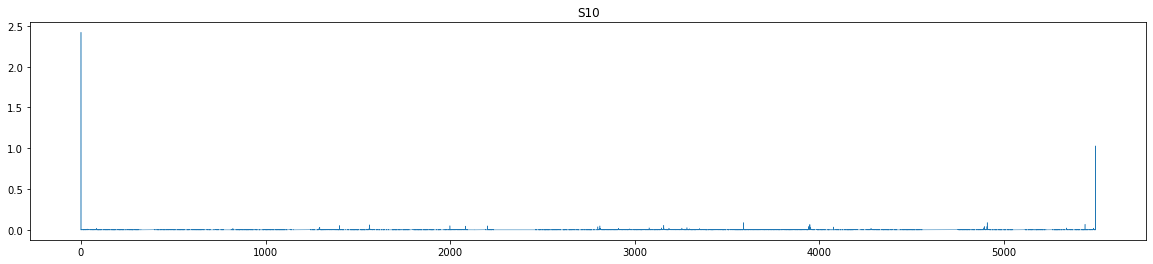

Dictionary from .pkl file has keys: dict_keys(['signal', 'label', 'subject'])
signal  is type: <class 'dict'>  with length: 2
label  is type: <class 'numpy.ndarray'>  with length: 3663100
subject  is type: <class 'str'>  with length: 3


SUBJECT #: S11


LABEL unique values: [0 1 2 3 4 5 6 7]
{'0': 'not defined/transient', '1': 'baseline', '2': 'stress', '3': 'amusement', '4': 'meditation', '5': 'ignore', '6': 'ignore', '7': 'ignore'}


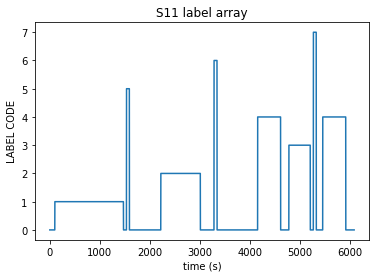



SIGNAL KEYS: dict_keys(['chest', 'wrist'])
chest: <class 'dict'> has keys: dict_keys(['ACC', 'ECG', 'EMG', 'EDA', 'Temp', 'Resp'])
wrist: <class 'dict'> has keys: dict_keys(['ACC', 'BVP', 'EDA', 'TEMP'])

 Chest (RespiBAN) sensor
ACC array has shape: (3663100, 3) at 700 Hz for a total of  5233.0 seconds
ECG array has shape: (3663100, 1) at 700 Hz for a total of  5233.0 seconds
EMG array has shape: (3663100, 1) at 700 Hz for a total of  5233.0 seconds
EDA array has shape: (3663100, 1) at 700 Hz for a total of  5233.0 seconds
Temp array has shape: (3663100, 1) at 700 Hz for a total of  5233.0 seconds
Resp array has shape: (3663100, 1) at 700 Hz for a total of  5233.0 seconds


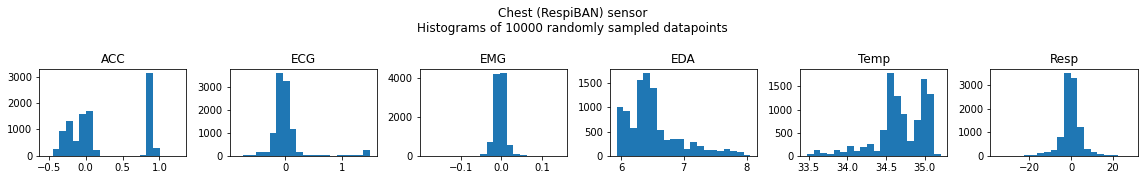


 Wrist (Empatica E4) sensor
ACC array has shape: (167456, 3) at 32 Hz for a total of  5233.0 seconds
BVP array has shape: (334912, 1) at 64 Hz for a total of  5233.0 seconds
EDA array has shape: (20932, 1) at 4 Hz for a total of  5233.0 seconds
TEMP array has shape: (20932, 1) at 4 Hz for a total of  5233.0 seconds


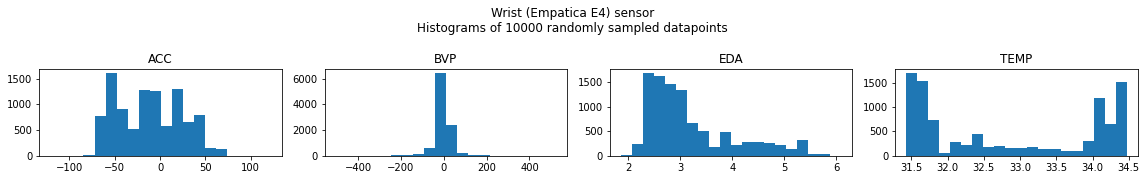


----------------------------------------------------------------------------

Elapsed time: 14.043854713439941
3663100 3663100


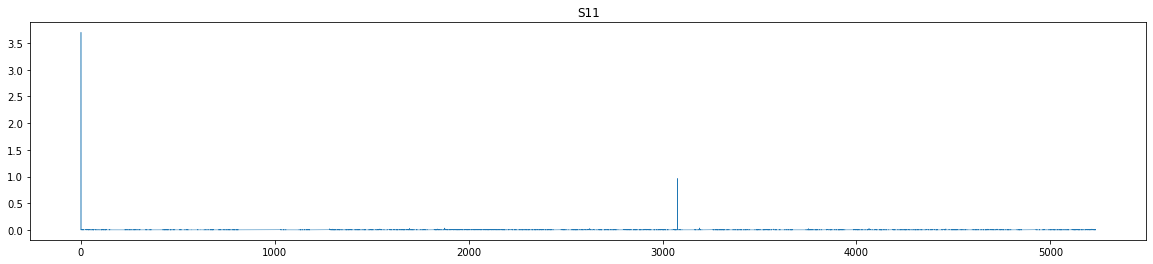

Dictionary from .pkl file has keys: dict_keys(['signal', 'label', 'subject'])
signal  is type: <class 'dict'>  with length: 2
label  is type: <class 'numpy.ndarray'>  with length: 3875900
subject  is type: <class 'str'>  with length: 3


SUBJECT #: S13


LABEL unique values: [0 1 2 3 4 5 6 7]
{'0': 'not defined/transient', '1': 'baseline', '2': 'stress', '3': 'amusement', '4': 'meditation', '5': 'ignore', '6': 'ignore', '7': 'ignore'}


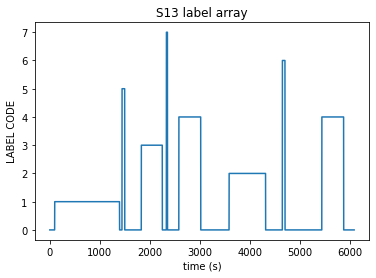



SIGNAL KEYS: dict_keys(['chest', 'wrist'])
chest: <class 'dict'> has keys: dict_keys(['ACC', 'ECG', 'EMG', 'EDA', 'Temp', 'Resp'])
wrist: <class 'dict'> has keys: dict_keys(['ACC', 'BVP', 'EDA', 'TEMP'])

 Chest (RespiBAN) sensor
ACC array has shape: (3875900, 3) at 700 Hz for a total of  5537.0 seconds
ECG array has shape: (3875900, 1) at 700 Hz for a total of  5537.0 seconds
EMG array has shape: (3875900, 1) at 700 Hz for a total of  5537.0 seconds
EDA array has shape: (3875900, 1) at 700 Hz for a total of  5537.0 seconds
Temp array has shape: (3875900, 1) at 700 Hz for a total of  5537.0 seconds
Resp array has shape: (3875900, 1) at 700 Hz for a total of  5537.0 seconds


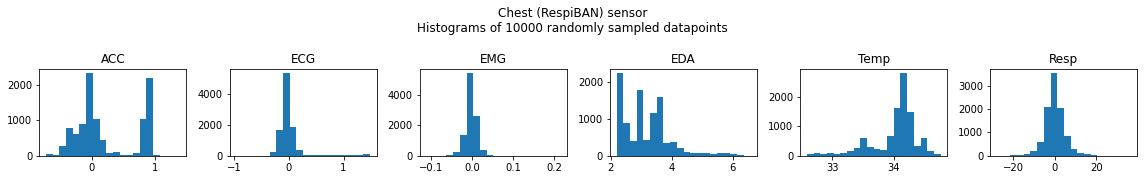


 Wrist (Empatica E4) sensor
ACC array has shape: (177184, 3) at 32 Hz for a total of  5537.0 seconds
BVP array has shape: (354368, 1) at 64 Hz for a total of  5537.0 seconds
EDA array has shape: (22148, 1) at 4 Hz for a total of  5537.0 seconds
TEMP array has shape: (22148, 1) at 4 Hz for a total of  5537.0 seconds


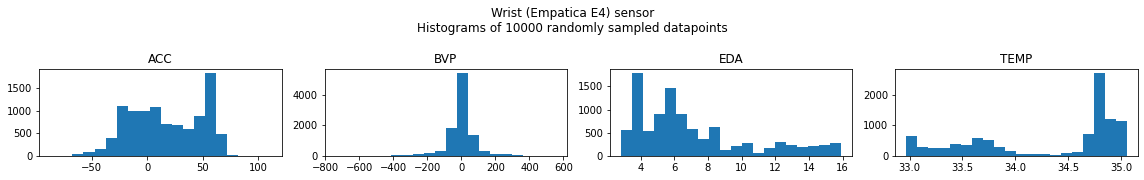


----------------------------------------------------------------------------

Elapsed time: 14.372657060623169
3875900 3875900


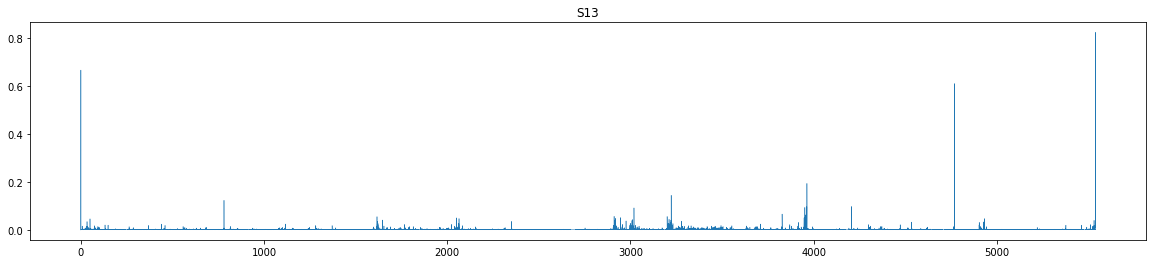

Dictionary from .pkl file has keys: dict_keys(['signal', 'label', 'subject'])
signal  is type: <class 'dict'>  with length: 2
label  is type: <class 'numpy.ndarray'>  with length: 3883600
subject  is type: <class 'str'>  with length: 3


SUBJECT #: S14


LABEL unique values: [0 1 2 3 4 5 6 7]
{'0': 'not defined/transient', '1': 'baseline', '2': 'stress', '3': 'amusement', '4': 'meditation', '5': 'ignore', '6': 'ignore', '7': 'ignore'}


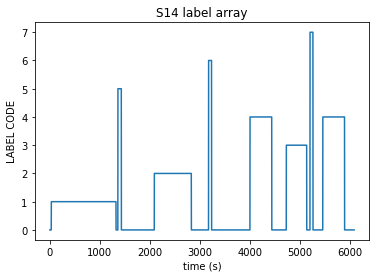



SIGNAL KEYS: dict_keys(['chest', 'wrist'])
chest: <class 'dict'> has keys: dict_keys(['ACC', 'ECG', 'EMG', 'EDA', 'Temp', 'Resp'])
wrist: <class 'dict'> has keys: dict_keys(['ACC', 'BVP', 'EDA', 'TEMP'])

 Chest (RespiBAN) sensor
ACC array has shape: (3883600, 3) at 700 Hz for a total of  5548.0 seconds
ECG array has shape: (3883600, 1) at 700 Hz for a total of  5548.0 seconds
EMG array has shape: (3883600, 1) at 700 Hz for a total of  5548.0 seconds
EDA array has shape: (3883600, 1) at 700 Hz for a total of  5548.0 seconds
Temp array has shape: (3883600, 1) at 700 Hz for a total of  5548.0 seconds
Resp array has shape: (3883600, 1) at 700 Hz for a total of  5548.0 seconds


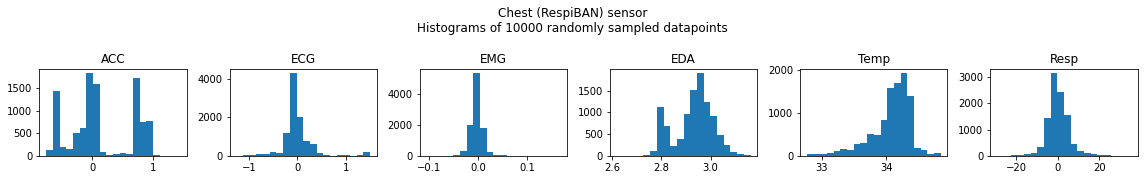


 Wrist (Empatica E4) sensor
ACC array has shape: (177536, 3) at 32 Hz for a total of  5548.0 seconds
BVP array has shape: (355072, 1) at 64 Hz for a total of  5548.0 seconds
EDA array has shape: (22192, 1) at 4 Hz for a total of  5548.0 seconds
TEMP array has shape: (22192, 1) at 4 Hz for a total of  5548.0 seconds


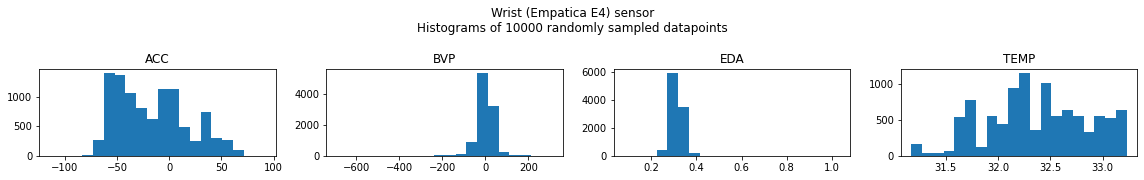


----------------------------------------------------------------------------

Elapsed time: 15.507174968719482
3883600 3883600


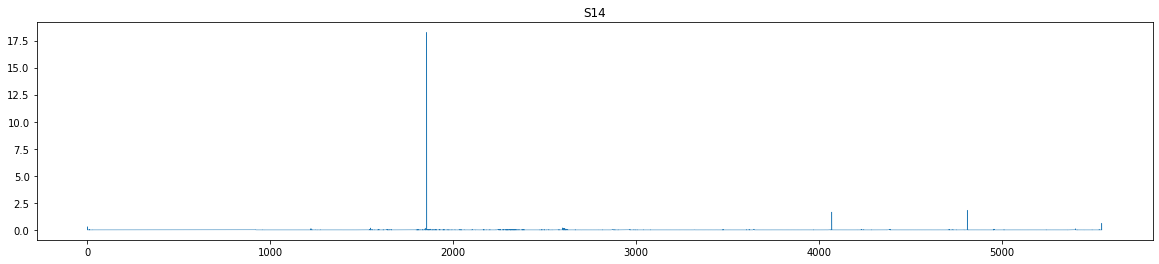

Dictionary from .pkl file has keys: dict_keys(['signal', 'label', 'subject'])
signal  is type: <class 'dict'>  with length: 2
label  is type: <class 'numpy.ndarray'>  with length: 3676400
subject  is type: <class 'str'>  with length: 3


SUBJECT #: S15


LABEL unique values: [0 1 2 3 4 5 6 7]
{'0': 'not defined/transient', '1': 'baseline', '2': 'stress', '3': 'amusement', '4': 'meditation', '5': 'ignore', '6': 'ignore', '7': 'ignore'}


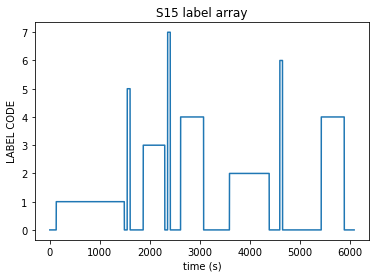



SIGNAL KEYS: dict_keys(['chest', 'wrist'])
chest: <class 'dict'> has keys: dict_keys(['ACC', 'ECG', 'EMG', 'EDA', 'Temp', 'Resp'])
wrist: <class 'dict'> has keys: dict_keys(['ACC', 'BVP', 'EDA', 'TEMP'])

 Chest (RespiBAN) sensor
ACC array has shape: (3676400, 3) at 700 Hz for a total of  5252.0 seconds
ECG array has shape: (3676400, 1) at 700 Hz for a total of  5252.0 seconds
EMG array has shape: (3676400, 1) at 700 Hz for a total of  5252.0 seconds
EDA array has shape: (3676400, 1) at 700 Hz for a total of  5252.0 seconds
Temp array has shape: (3676400, 1) at 700 Hz for a total of  5252.0 seconds
Resp array has shape: (3676400, 1) at 700 Hz for a total of  5252.0 seconds


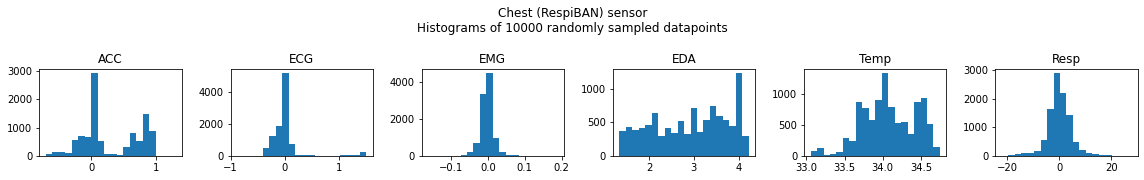


 Wrist (Empatica E4) sensor
ACC array has shape: (168064, 3) at 32 Hz for a total of  5252.0 seconds
BVP array has shape: (336128, 1) at 64 Hz for a total of  5252.0 seconds
EDA array has shape: (21008, 1) at 4 Hz for a total of  5252.0 seconds
TEMP array has shape: (21008, 1) at 4 Hz for a total of  5252.0 seconds


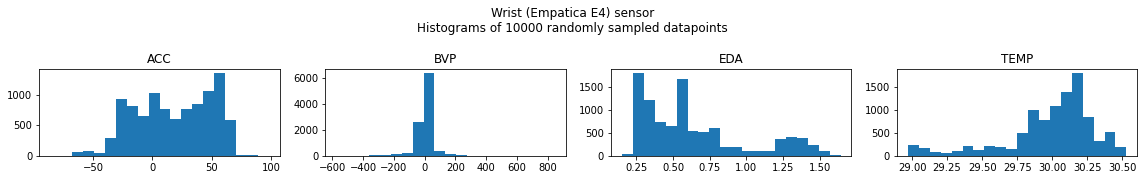


----------------------------------------------------------------------------

Elapsed time: 14.935645341873169
3676400 3676400


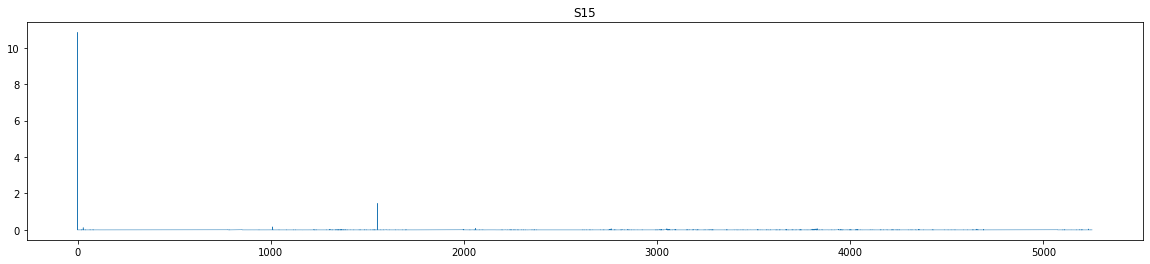

Dictionary from .pkl file has keys: dict_keys(['signal', 'label', 'subject'])
signal  is type: <class 'dict'>  with length: 2
label  is type: <class 'numpy.ndarray'>  with length: 3941700
subject  is type: <class 'str'>  with length: 3


SUBJECT #: S16


LABEL unique values: [0 1 2 3 4 5 6 7]
{'0': 'not defined/transient', '1': 'baseline', '2': 'stress', '3': 'amusement', '4': 'meditation', '5': 'ignore', '6': 'ignore', '7': 'ignore'}


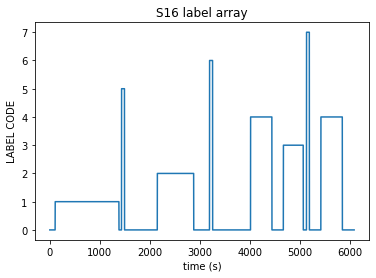



SIGNAL KEYS: dict_keys(['chest', 'wrist'])
chest: <class 'dict'> has keys: dict_keys(['ACC', 'ECG', 'EMG', 'EDA', 'Temp', 'Resp'])
wrist: <class 'dict'> has keys: dict_keys(['ACC', 'BVP', 'EDA', 'TEMP'])

 Chest (RespiBAN) sensor
ACC array has shape: (3941700, 3) at 700 Hz for a total of  5631.0 seconds
ECG array has shape: (3941700, 1) at 700 Hz for a total of  5631.0 seconds
EMG array has shape: (3941700, 1) at 700 Hz for a total of  5631.0 seconds
EDA array has shape: (3941700, 1) at 700 Hz for a total of  5631.0 seconds
Temp array has shape: (3941700, 1) at 700 Hz for a total of  5631.0 seconds
Resp array has shape: (3941700, 1) at 700 Hz for a total of  5631.0 seconds


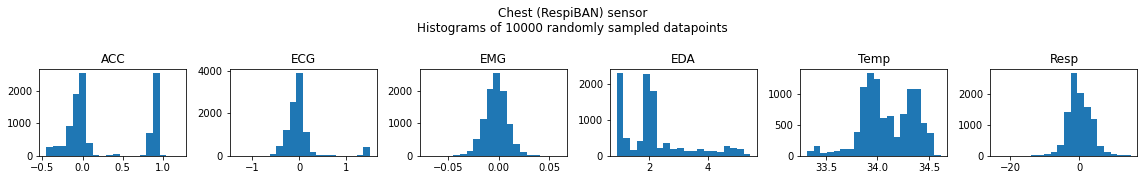


 Wrist (Empatica E4) sensor
ACC array has shape: (180192, 3) at 32 Hz for a total of  5631.0 seconds
BVP array has shape: (360384, 1) at 64 Hz for a total of  5631.0 seconds
EDA array has shape: (22524, 1) at 4 Hz for a total of  5631.0 seconds
TEMP array has shape: (22524, 1) at 4 Hz for a total of  5631.0 seconds


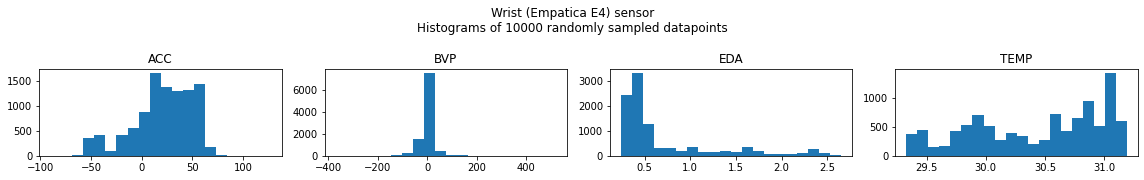


----------------------------------------------------------------------------

Elapsed time: 15.731531858444214
3941700 3941700


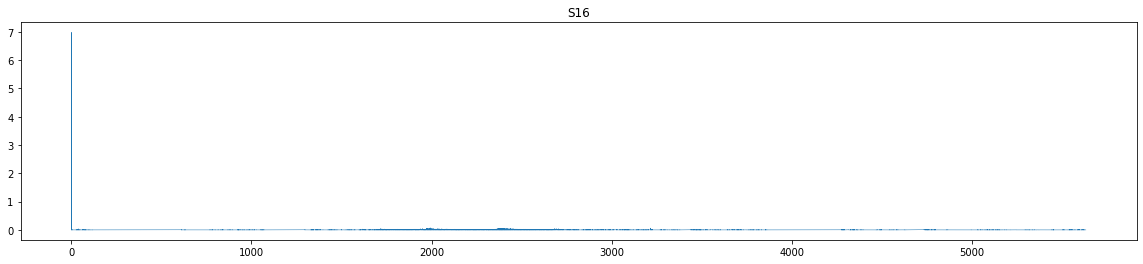

Dictionary from .pkl file has keys: dict_keys(['signal', 'label', 'subject'])
signal  is type: <class 'dict'>  with length: 2
label  is type: <class 'numpy.ndarray'>  with length: 4144000
subject  is type: <class 'str'>  with length: 3


SUBJECT #: S17


LABEL unique values: [0 1 2 3 4 5 6 7]
{'0': 'not defined/transient', '1': 'baseline', '2': 'stress', '3': 'amusement', '4': 'meditation', '5': 'ignore', '6': 'ignore', '7': 'ignore'}


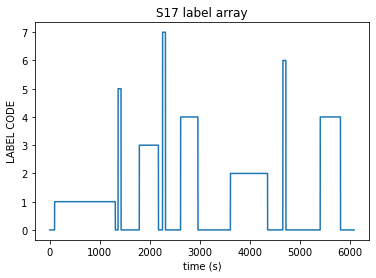



SIGNAL KEYS: dict_keys(['chest', 'wrist'])
chest: <class 'dict'> has keys: dict_keys(['ACC', 'ECG', 'EMG', 'EDA', 'Temp', 'Resp'])
wrist: <class 'dict'> has keys: dict_keys(['ACC', 'BVP', 'EDA', 'TEMP'])

 Chest (RespiBAN) sensor
ACC array has shape: (4144000, 3) at 700 Hz for a total of  5920.0 seconds
ECG array has shape: (4144000, 1) at 700 Hz for a total of  5920.0 seconds
EMG array has shape: (4144000, 1) at 700 Hz for a total of  5920.0 seconds
EDA array has shape: (4144000, 1) at 700 Hz for a total of  5920.0 seconds
Temp array has shape: (4144000, 1) at 700 Hz for a total of  5920.0 seconds
Resp array has shape: (4144000, 1) at 700 Hz for a total of  5920.0 seconds


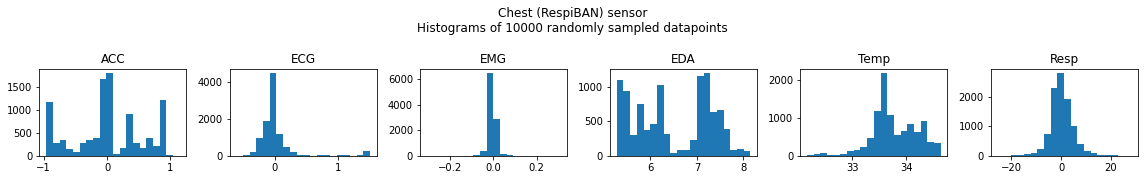


 Wrist (Empatica E4) sensor
ACC array has shape: (189440, 3) at 32 Hz for a total of  5920.0 seconds
BVP array has shape: (378880, 1) at 64 Hz for a total of  5920.0 seconds
EDA array has shape: (23680, 1) at 4 Hz for a total of  5920.0 seconds
TEMP array has shape: (23680, 1) at 4 Hz for a total of  5920.0 seconds


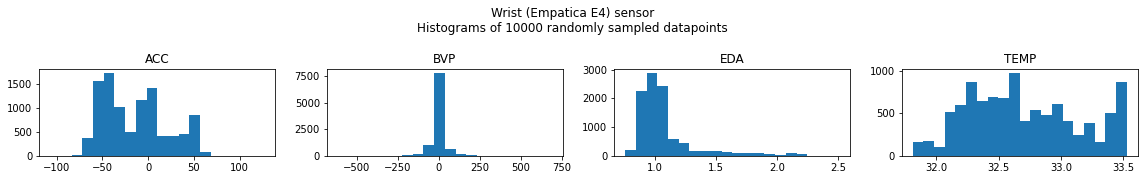


----------------------------------------------------------------------------

Elapsed time: 17.402329444885254
4144000 4144000


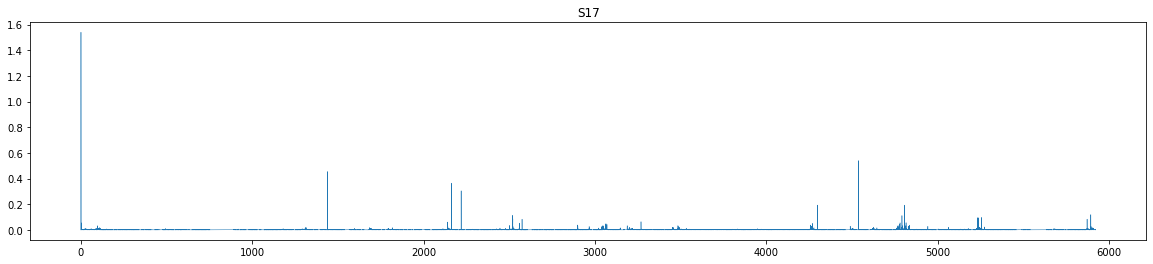

In [268]:
#ACC
for Subj_ID in pkl_dict.keys():
    #Subj_ID = 'S3'
    t0 = time()
    S_signal = check_pkl_raw(Subj_ID, pkl_dict, return_data=True)
    print('Elapsed time:',time() - t0)

    ACC_y0 = S_signal['signal']['chest']['ACC'][:,0]
    ACC_y1 = S_signal['signal']['chest']['ACC'][:,1]
    ACC_y2 = S_signal['signal']['chest']['ACC'][:,2]
    ACC_x = np.linspace(0, len(ACC_y0)/700, len(ACC_y0), endpoint=False)
    print(len(ACC_x), len(ACC_y0))
    
    ACC_df = pd.DataFrame(dict(time=ACC_x, ACC_y0=ACC_y0, ACC_y1=ACC_y1, ACC_y2=ACC_y2))
    ACC_df[['ACC_y0','ACC_y1','ACC_y2']] = ACC_df[['ACC_y0','ACC_y1','ACC_y2']].diff().dropna()
    ACC_df[['ACC_y0','ACC_y1','ACC_y2']] = ACC_df[['ACC_y0','ACC_y1','ACC_y2']]**2
    ACC_df[['ACC_y0','ACC_y1','ACC_y2']] = ACC_df[['ACC_y0','ACC_y1','ACC_y2']].rolling(70).sum().dropna()
    ACC_df['ACC_energy'] = ACC_df[['ACC_y0','ACC_y1','ACC_y2']].sum(axis=1)
    
    fig, ax = plt.subplots(1,1,sharex=True, figsize=[20,4])
    ax.plot(ACC_df['time'], ACC_df['ACC_energy'], lw=0.5)
    #ax.set_xlim(2000, 2060)
    ax.set_title(Subj_ID)
    plt.show()

    ACC_df.to_csv('ACC_100msSUM_'+Subj_ID+'.csv')

Dictionary from .pkl file has keys: dict_keys(['signal', 'label', 'subject'])
signal  is type: <class 'dict'>  with length: 2
label  is type: <class 'numpy.ndarray'>  with length: 4255300
subject  is type: <class 'str'>  with length: 2


SUBJECT #: S2


LABEL unique values: [0 1 2 3 4 6 7]
{'0': 'not defined/transient', '1': 'baseline', '2': 'stress', '3': 'amusement', '4': 'meditation', '5': 'ignore', '6': 'ignore', '7': 'ignore'}


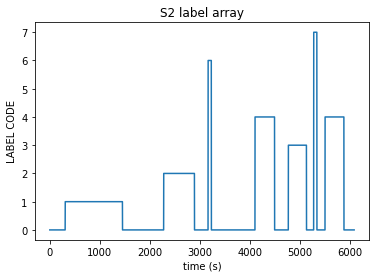



SIGNAL KEYS: dict_keys(['chest', 'wrist'])
chest: <class 'dict'> has keys: dict_keys(['ACC', 'ECG', 'EMG', 'EDA', 'Temp', 'Resp'])
wrist: <class 'dict'> has keys: dict_keys(['ACC', 'BVP', 'EDA', 'TEMP'])

 Chest (RespiBAN) sensor
ACC array has shape: (4255300, 3) at 700 Hz for a total of  6079.0 seconds
ECG array has shape: (4255300, 1) at 700 Hz for a total of  6079.0 seconds
EMG array has shape: (4255300, 1) at 700 Hz for a total of  6079.0 seconds
EDA array has shape: (4255300, 1) at 700 Hz for a total of  6079.0 seconds
Temp array has shape: (4255300, 1) at 700 Hz for a total of  6079.0 seconds
Resp array has shape: (4255300, 1) at 700 Hz for a total of  6079.0 seconds


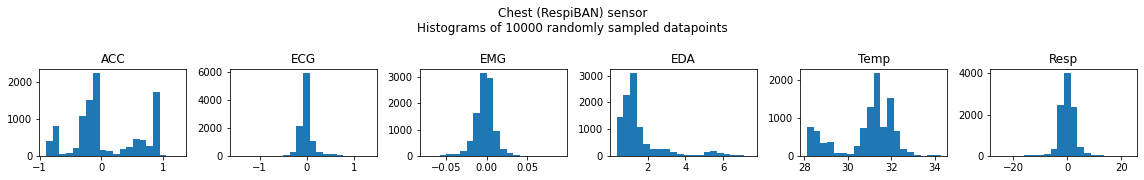


 Wrist (Empatica E4) sensor
ACC array has shape: (194528, 3) at 32 Hz for a total of  6079.0 seconds
BVP array has shape: (389056, 1) at 64 Hz for a total of  6079.0 seconds
EDA array has shape: (24316, 1) at 4 Hz for a total of  6079.0 seconds
TEMP array has shape: (24316, 1) at 4 Hz for a total of  6079.0 seconds


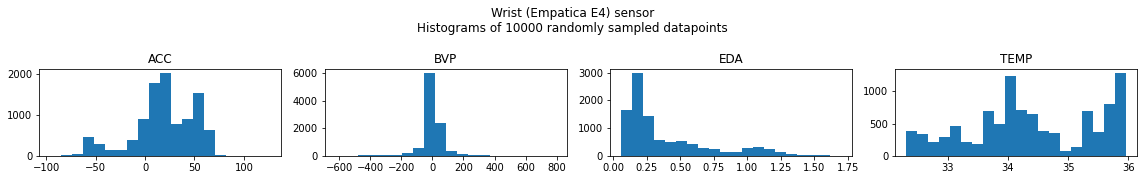


----------------------------------------------------------------------------

Elapsed time: 17.549506902694702
194528 194528


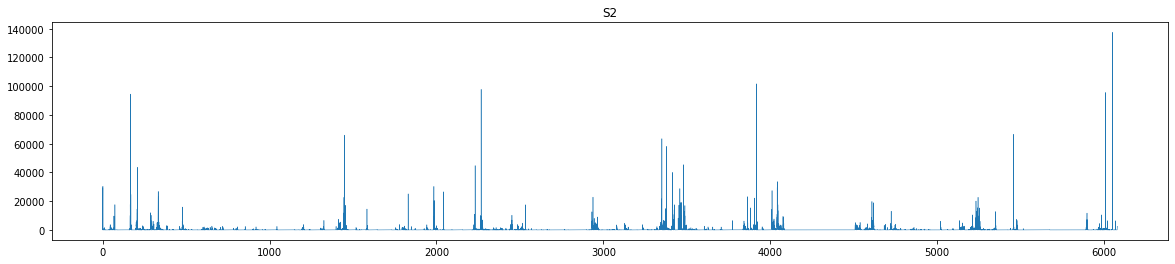

Dictionary from .pkl file has keys: dict_keys(['signal', 'label', 'subject'])
signal  is type: <class 'dict'>  with length: 2
label  is type: <class 'numpy.ndarray'>  with length: 4545100
subject  is type: <class 'str'>  with length: 2


SUBJECT #: S3


LABEL unique values: [0 1 2 3 4 5 6 7]
{'0': 'not defined/transient', '1': 'baseline', '2': 'stress', '3': 'amusement', '4': 'meditation', '5': 'ignore', '6': 'ignore', '7': 'ignore'}


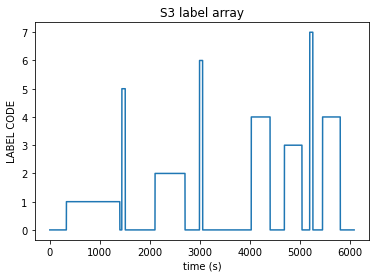



SIGNAL KEYS: dict_keys(['chest', 'wrist'])
chest: <class 'dict'> has keys: dict_keys(['ACC', 'ECG', 'EMG', 'EDA', 'Temp', 'Resp'])
wrist: <class 'dict'> has keys: dict_keys(['ACC', 'BVP', 'EDA', 'TEMP'])

 Chest (RespiBAN) sensor
ACC array has shape: (4545100, 3) at 700 Hz for a total of  6493.0 seconds
ECG array has shape: (4545100, 1) at 700 Hz for a total of  6493.0 seconds
EMG array has shape: (4545100, 1) at 700 Hz for a total of  6493.0 seconds
EDA array has shape: (4545100, 1) at 700 Hz for a total of  6493.0 seconds
Temp array has shape: (4545100, 1) at 700 Hz for a total of  6493.0 seconds
Resp array has shape: (4545100, 1) at 700 Hz for a total of  6493.0 seconds


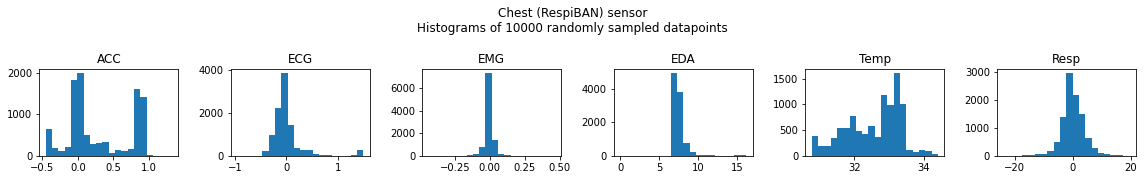


 Wrist (Empatica E4) sensor
ACC array has shape: (207776, 3) at 32 Hz for a total of  6493.0 seconds
BVP array has shape: (415552, 1) at 64 Hz for a total of  6493.0 seconds
EDA array has shape: (25972, 1) at 4 Hz for a total of  6493.0 seconds
TEMP array has shape: (25972, 1) at 4 Hz for a total of  6493.0 seconds


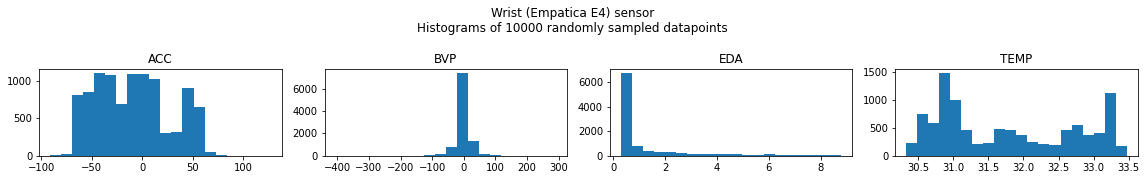


----------------------------------------------------------------------------

Elapsed time: 17.851441860198975
207776 207776


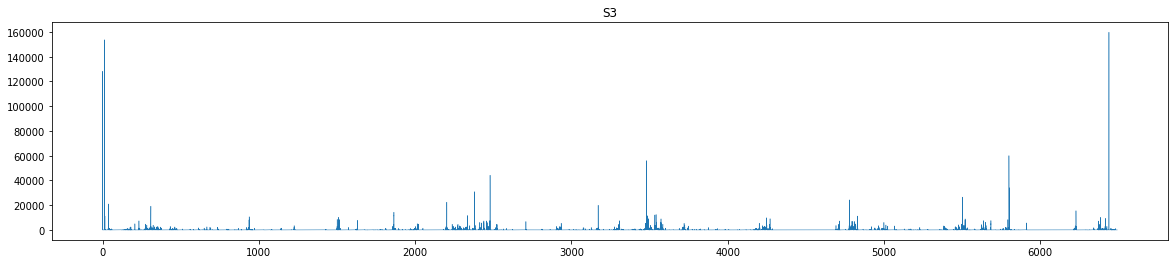

Dictionary from .pkl file has keys: dict_keys(['signal', 'label', 'subject'])
signal  is type: <class 'dict'>  with length: 2
label  is type: <class 'numpy.ndarray'>  with length: 4496100
subject  is type: <class 'str'>  with length: 2


SUBJECT #: S4


LABEL unique values: [0 1 2 3 4 5 6 7]
{'0': 'not defined/transient', '1': 'baseline', '2': 'stress', '3': 'amusement', '4': 'meditation', '5': 'ignore', '6': 'ignore', '7': 'ignore'}


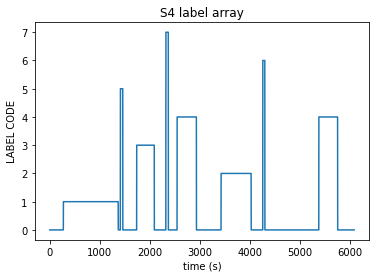



SIGNAL KEYS: dict_keys(['chest', 'wrist'])
chest: <class 'dict'> has keys: dict_keys(['ACC', 'ECG', 'EMG', 'EDA', 'Temp', 'Resp'])
wrist: <class 'dict'> has keys: dict_keys(['ACC', 'BVP', 'EDA', 'TEMP'])

 Chest (RespiBAN) sensor
ACC array has shape: (4496100, 3) at 700 Hz for a total of  6423.0 seconds
ECG array has shape: (4496100, 1) at 700 Hz for a total of  6423.0 seconds
EMG array has shape: (4496100, 1) at 700 Hz for a total of  6423.0 seconds
EDA array has shape: (4496100, 1) at 700 Hz for a total of  6423.0 seconds
Temp array has shape: (4496100, 1) at 700 Hz for a total of  6423.0 seconds
Resp array has shape: (4496100, 1) at 700 Hz for a total of  6423.0 seconds


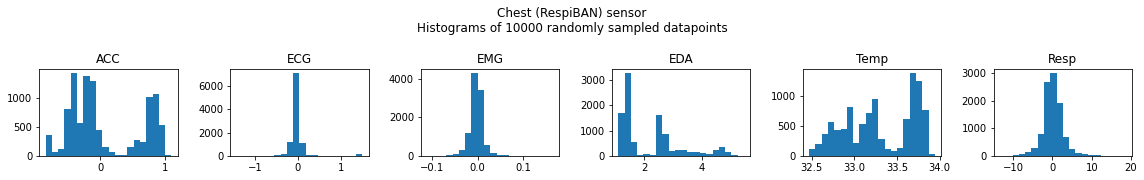


 Wrist (Empatica E4) sensor
ACC array has shape: (205536, 3) at 32 Hz for a total of  6423.0 seconds
BVP array has shape: (411072, 1) at 64 Hz for a total of  6423.0 seconds
EDA array has shape: (25692, 1) at 4 Hz for a total of  6423.0 seconds
TEMP array has shape: (25692, 1) at 4 Hz for a total of  6423.0 seconds


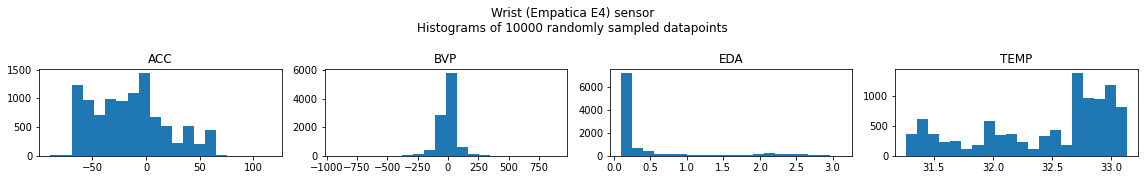


----------------------------------------------------------------------------

Elapsed time: 17.030259132385254
205536 205536


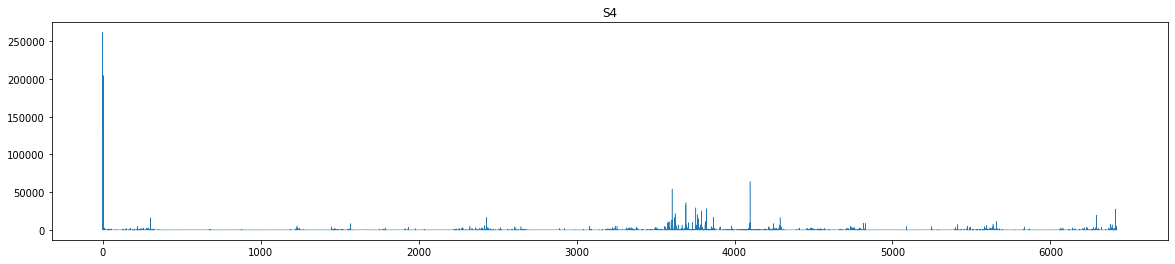

Dictionary from .pkl file has keys: dict_keys(['signal', 'label', 'subject'])
signal  is type: <class 'dict'>  with length: 2
label  is type: <class 'numpy.ndarray'>  with length: 4380600
subject  is type: <class 'str'>  with length: 2


SUBJECT #: S5


LABEL unique values: [0 1 2 3 4 5 6 7]
{'0': 'not defined/transient', '1': 'baseline', '2': 'stress', '3': 'amusement', '4': 'meditation', '5': 'ignore', '6': 'ignore', '7': 'ignore'}


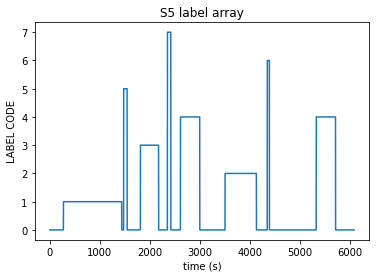



SIGNAL KEYS: dict_keys(['chest', 'wrist'])
chest: <class 'dict'> has keys: dict_keys(['ACC', 'ECG', 'EMG', 'EDA', 'Temp', 'Resp'])
wrist: <class 'dict'> has keys: dict_keys(['ACC', 'BVP', 'EDA', 'TEMP'])

 Chest (RespiBAN) sensor
ACC array has shape: (4380600, 3) at 700 Hz for a total of  6258.0 seconds
ECG array has shape: (4380600, 1) at 700 Hz for a total of  6258.0 seconds
EMG array has shape: (4380600, 1) at 700 Hz for a total of  6258.0 seconds
EDA array has shape: (4380600, 1) at 700 Hz for a total of  6258.0 seconds
Temp array has shape: (4380600, 1) at 700 Hz for a total of  6258.0 seconds
Resp array has shape: (4380600, 1) at 700 Hz for a total of  6258.0 seconds


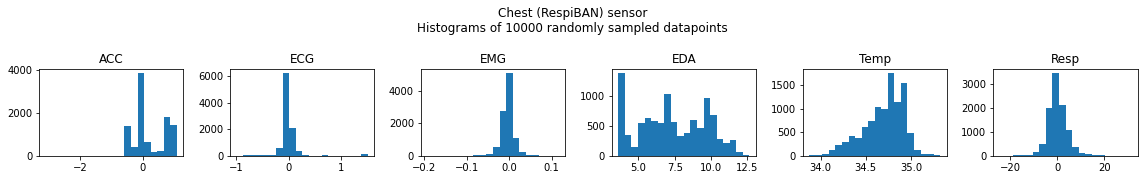


 Wrist (Empatica E4) sensor
ACC array has shape: (200256, 3) at 32 Hz for a total of  6258.0 seconds
BVP array has shape: (400512, 1) at 64 Hz for a total of  6258.0 seconds
EDA array has shape: (25032, 1) at 4 Hz for a total of  6258.0 seconds
TEMP array has shape: (25032, 1) at 4 Hz for a total of  6258.0 seconds


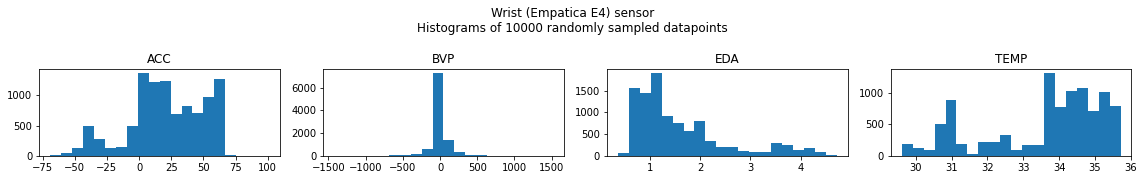


----------------------------------------------------------------------------

Elapsed time: 16.91587781906128
200256 200256


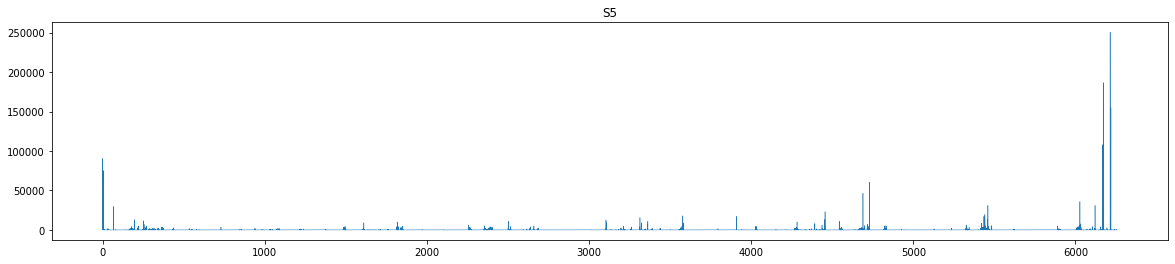

Dictionary from .pkl file has keys: dict_keys(['signal', 'label', 'subject'])
signal  is type: <class 'dict'>  with length: 2
label  is type: <class 'numpy.ndarray'>  with length: 4949700
subject  is type: <class 'str'>  with length: 2


SUBJECT #: S6


LABEL unique values: [0 1 2 3 4 5 6 7]
{'0': 'not defined/transient', '1': 'baseline', '2': 'stress', '3': 'amusement', '4': 'meditation', '5': 'ignore', '6': 'ignore', '7': 'ignore'}


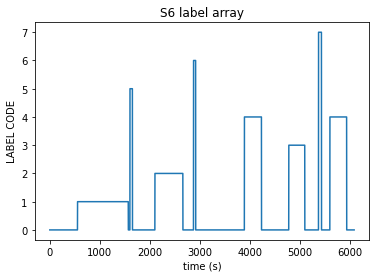



SIGNAL KEYS: dict_keys(['chest', 'wrist'])
chest: <class 'dict'> has keys: dict_keys(['ACC', 'ECG', 'EMG', 'EDA', 'Temp', 'Resp'])
wrist: <class 'dict'> has keys: dict_keys(['ACC', 'BVP', 'EDA', 'TEMP'])

 Chest (RespiBAN) sensor
ACC array has shape: (4949700, 3) at 700 Hz for a total of  7071.0 seconds
ECG array has shape: (4949700, 1) at 700 Hz for a total of  7071.0 seconds
EMG array has shape: (4949700, 1) at 700 Hz for a total of  7071.0 seconds
EDA array has shape: (4949700, 1) at 700 Hz for a total of  7071.0 seconds
Temp array has shape: (4949700, 1) at 700 Hz for a total of  7071.0 seconds
Resp array has shape: (4949700, 1) at 700 Hz for a total of  7071.0 seconds


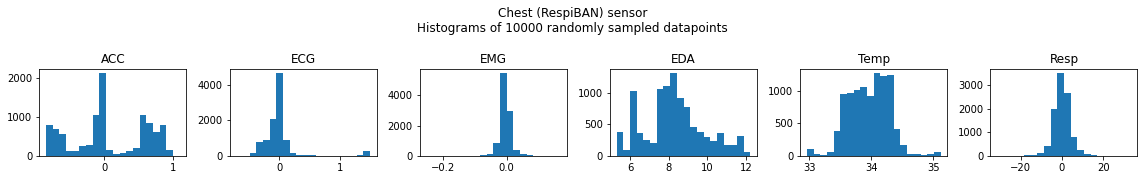


 Wrist (Empatica E4) sensor
ACC array has shape: (226272, 3) at 32 Hz for a total of  7071.0 seconds
BVP array has shape: (452544, 1) at 64 Hz for a total of  7071.0 seconds
EDA array has shape: (28284, 1) at 4 Hz for a total of  7071.0 seconds
TEMP array has shape: (28284, 1) at 4 Hz for a total of  7071.0 seconds


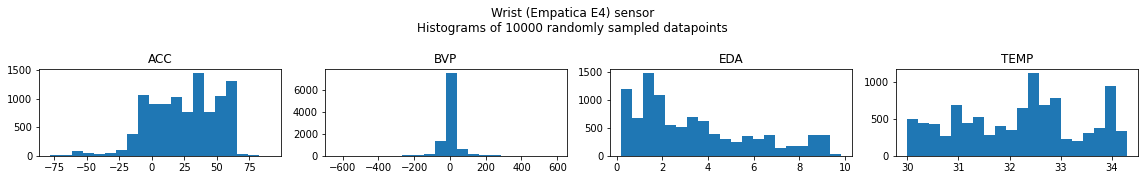


----------------------------------------------------------------------------

Elapsed time: 18.512094736099243
226272 226272


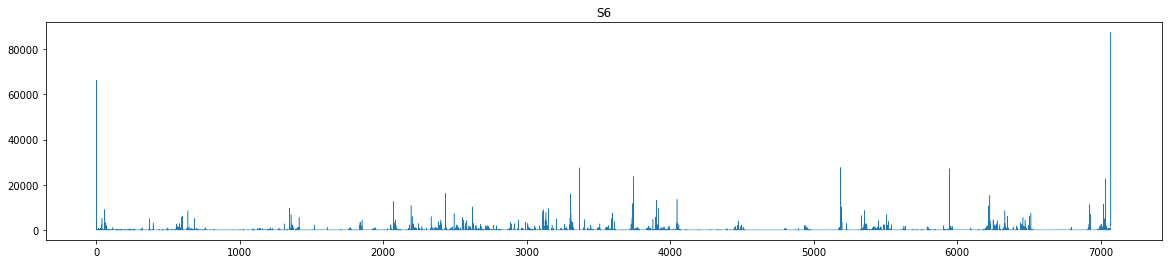

Dictionary from .pkl file has keys: dict_keys(['signal', 'label', 'subject'])
signal  is type: <class 'dict'>  with length: 2
label  is type: <class 'numpy.ndarray'>  with length: 3666600
subject  is type: <class 'str'>  with length: 2


SUBJECT #: S7


LABEL unique values: [0 1 2 3 4 5 6 7]
{'0': 'not defined/transient', '1': 'baseline', '2': 'stress', '3': 'amusement', '4': 'meditation', '5': 'ignore', '6': 'ignore', '7': 'ignore'}


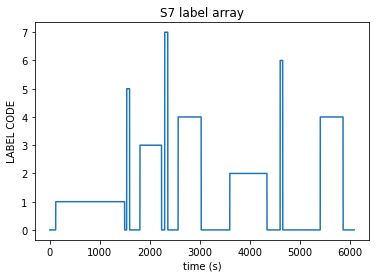



SIGNAL KEYS: dict_keys(['chest', 'wrist'])
chest: <class 'dict'> has keys: dict_keys(['ACC', 'ECG', 'EMG', 'EDA', 'Temp', 'Resp'])
wrist: <class 'dict'> has keys: dict_keys(['ACC', 'BVP', 'EDA', 'TEMP'])

 Chest (RespiBAN) sensor
ACC array has shape: (3666600, 3) at 700 Hz for a total of  5238.0 seconds
ECG array has shape: (3666600, 1) at 700 Hz for a total of  5238.0 seconds
EMG array has shape: (3666600, 1) at 700 Hz for a total of  5238.0 seconds
EDA array has shape: (3666600, 1) at 700 Hz for a total of  5238.0 seconds
Temp array has shape: (3666600, 1) at 700 Hz for a total of  5238.0 seconds
Resp array has shape: (3666600, 1) at 700 Hz for a total of  5238.0 seconds


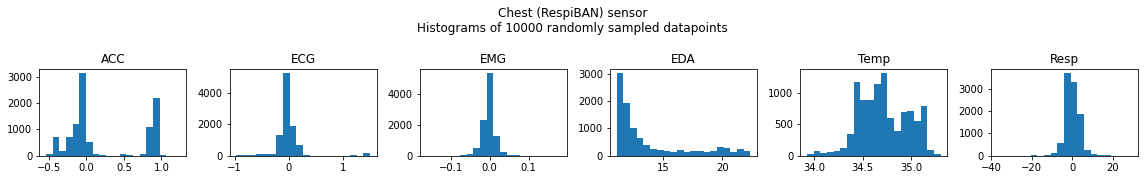


 Wrist (Empatica E4) sensor
ACC array has shape: (167616, 3) at 32 Hz for a total of  5238.0 seconds
BVP array has shape: (335232, 1) at 64 Hz for a total of  5238.0 seconds
EDA array has shape: (20952, 1) at 4 Hz for a total of  5238.0 seconds
TEMP array has shape: (20952, 1) at 4 Hz for a total of  5238.0 seconds


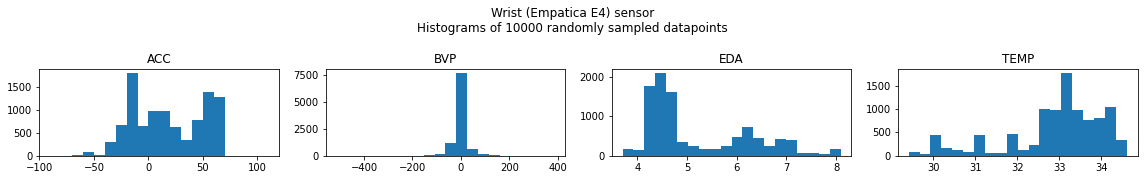


----------------------------------------------------------------------------

Elapsed time: 13.510828018188477
167616 167616


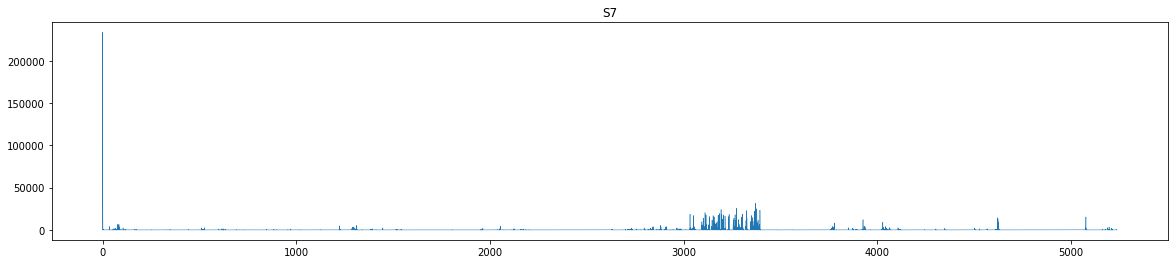

Dictionary from .pkl file has keys: dict_keys(['signal', 'label', 'subject'])
signal  is type: <class 'dict'>  with length: 2
label  is type: <class 'numpy.ndarray'>  with length: 3826200
subject  is type: <class 'str'>  with length: 2


SUBJECT #: S8


LABEL unique values: [0 1 2 3 4 5 6 7]
{'0': 'not defined/transient', '1': 'baseline', '2': 'stress', '3': 'amusement', '4': 'meditation', '5': 'ignore', '6': 'ignore', '7': 'ignore'}


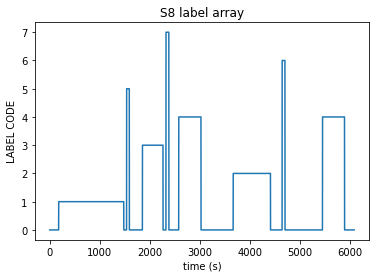



SIGNAL KEYS: dict_keys(['chest', 'wrist'])
chest: <class 'dict'> has keys: dict_keys(['ACC', 'ECG', 'EMG', 'EDA', 'Temp', 'Resp'])
wrist: <class 'dict'> has keys: dict_keys(['ACC', 'BVP', 'EDA', 'TEMP'])

 Chest (RespiBAN) sensor
ACC array has shape: (3826200, 3) at 700 Hz for a total of  5466.0 seconds
ECG array has shape: (3826200, 1) at 700 Hz for a total of  5466.0 seconds
EMG array has shape: (3826200, 1) at 700 Hz for a total of  5466.0 seconds
EDA array has shape: (3826200, 1) at 700 Hz for a total of  5466.0 seconds
Temp array has shape: (3826200, 1) at 700 Hz for a total of  5466.0 seconds
Resp array has shape: (3826200, 1) at 700 Hz for a total of  5466.0 seconds


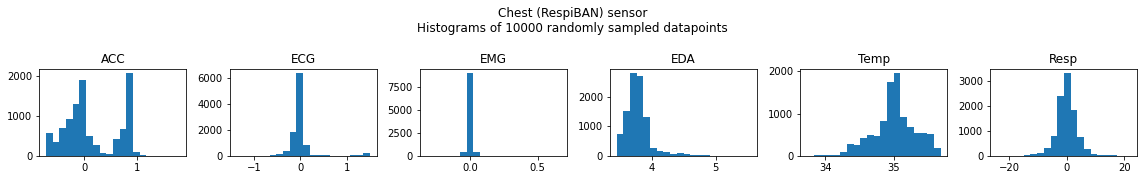


 Wrist (Empatica E4) sensor
ACC array has shape: (174912, 3) at 32 Hz for a total of  5466.0 seconds
BVP array has shape: (349824, 1) at 64 Hz for a total of  5466.0 seconds
EDA array has shape: (21864, 1) at 4 Hz for a total of  5466.0 seconds
TEMP array has shape: (21864, 1) at 4 Hz for a total of  5466.0 seconds


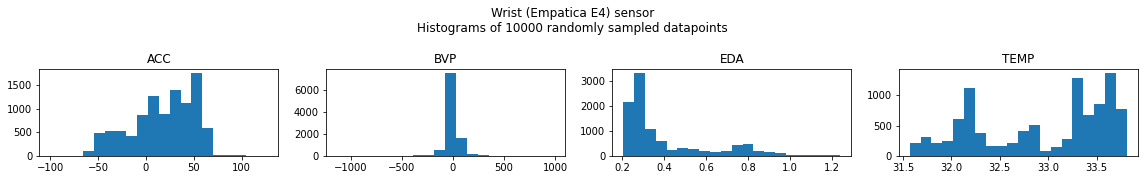


----------------------------------------------------------------------------

Elapsed time: 15.141986846923828
174912 174912


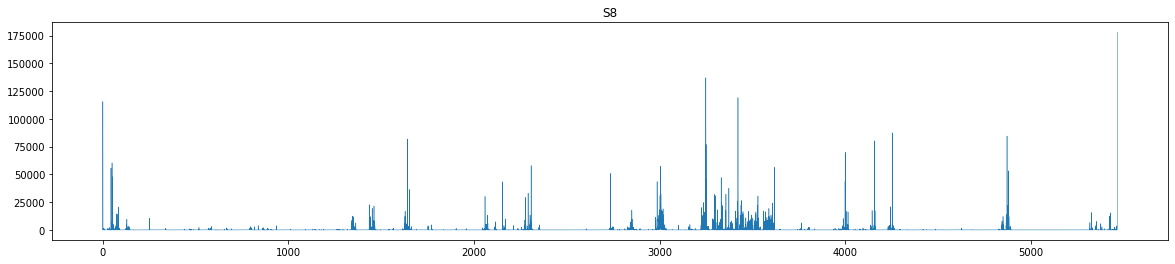

Dictionary from .pkl file has keys: dict_keys(['signal', 'label', 'subject'])
signal  is type: <class 'dict'>  with length: 2
label  is type: <class 'numpy.ndarray'>  with length: 3656100
subject  is type: <class 'str'>  with length: 2


SUBJECT #: S9


LABEL unique values: [0 1 2 3 4 5 6 7]
{'0': 'not defined/transient', '1': 'baseline', '2': 'stress', '3': 'amusement', '4': 'meditation', '5': 'ignore', '6': 'ignore', '7': 'ignore'}


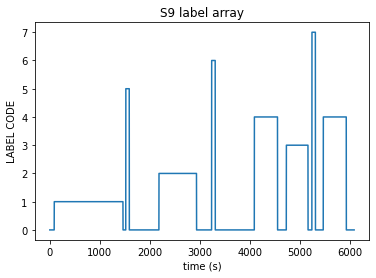



SIGNAL KEYS: dict_keys(['chest', 'wrist'])
chest: <class 'dict'> has keys: dict_keys(['ACC', 'ECG', 'EMG', 'EDA', 'Temp', 'Resp'])
wrist: <class 'dict'> has keys: dict_keys(['ACC', 'BVP', 'EDA', 'TEMP'])

 Chest (RespiBAN) sensor
ACC array has shape: (3656100, 3) at 700 Hz for a total of  5223.0 seconds
ECG array has shape: (3656100, 1) at 700 Hz for a total of  5223.0 seconds
EMG array has shape: (3656100, 1) at 700 Hz for a total of  5223.0 seconds
EDA array has shape: (3656100, 1) at 700 Hz for a total of  5223.0 seconds
Temp array has shape: (3656100, 1) at 700 Hz for a total of  5223.0 seconds
Resp array has shape: (3656100, 1) at 700 Hz for a total of  5223.0 seconds


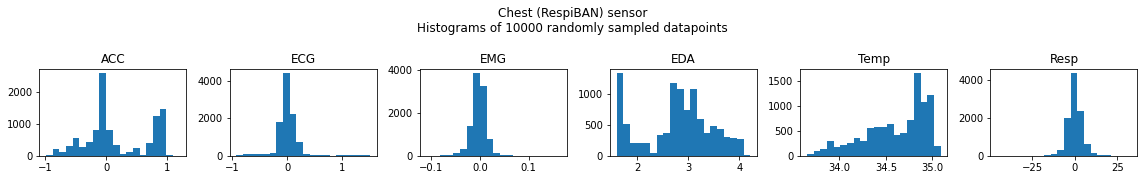


 Wrist (Empatica E4) sensor
ACC array has shape: (167136, 3) at 32 Hz for a total of  5223.0 seconds
BVP array has shape: (334272, 1) at 64 Hz for a total of  5223.0 seconds
EDA array has shape: (20892, 1) at 4 Hz for a total of  5223.0 seconds
TEMP array has shape: (20892, 1) at 4 Hz for a total of  5223.0 seconds


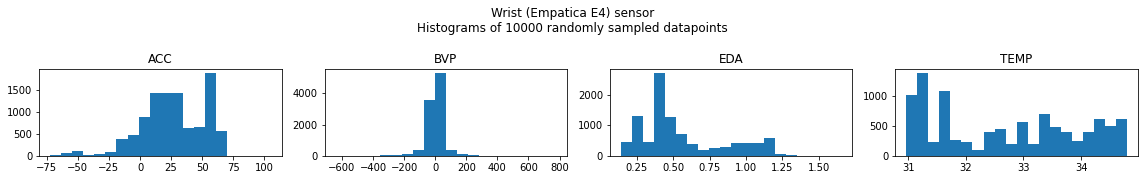


----------------------------------------------------------------------------

Elapsed time: 14.525821685791016
167136 167136


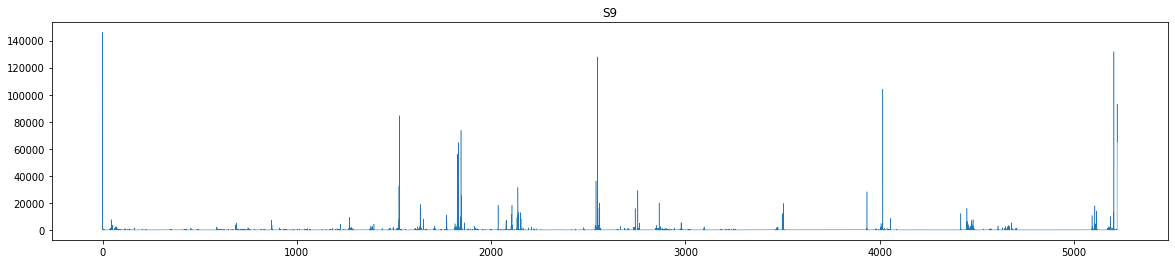

Dictionary from .pkl file has keys: dict_keys(['signal', 'label', 'subject'])
signal  is type: <class 'dict'>  with length: 2
label  is type: <class 'numpy.ndarray'>  with length: 3847200
subject  is type: <class 'str'>  with length: 3


SUBJECT #: S10


LABEL unique values: [0 1 2 3 4 5 6 7]
{'0': 'not defined/transient', '1': 'baseline', '2': 'stress', '3': 'amusement', '4': 'meditation', '5': 'ignore', '6': 'ignore', '7': 'ignore'}


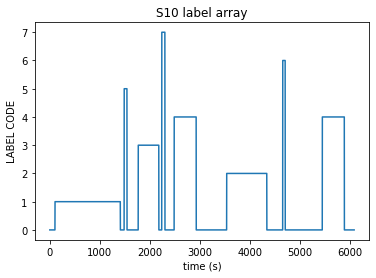



SIGNAL KEYS: dict_keys(['chest', 'wrist'])
chest: <class 'dict'> has keys: dict_keys(['ACC', 'ECG', 'EMG', 'EDA', 'Temp', 'Resp'])
wrist: <class 'dict'> has keys: dict_keys(['ACC', 'BVP', 'EDA', 'TEMP'])

 Chest (RespiBAN) sensor
ACC array has shape: (3847200, 3) at 700 Hz for a total of  5496.0 seconds
ECG array has shape: (3847200, 1) at 700 Hz for a total of  5496.0 seconds
EMG array has shape: (3847200, 1) at 700 Hz for a total of  5496.0 seconds
EDA array has shape: (3847200, 1) at 700 Hz for a total of  5496.0 seconds
Temp array has shape: (3847200, 1) at 700 Hz for a total of  5496.0 seconds
Resp array has shape: (3847200, 1) at 700 Hz for a total of  5496.0 seconds


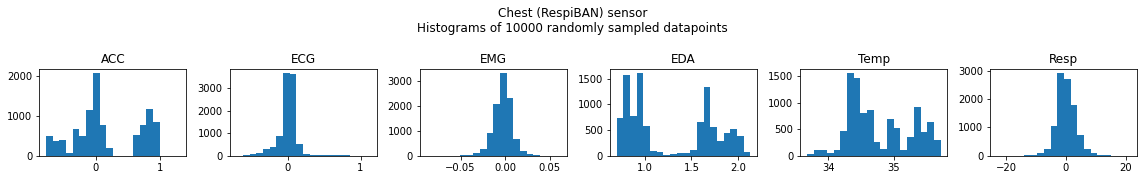


 Wrist (Empatica E4) sensor
ACC array has shape: (175872, 3) at 32 Hz for a total of  5496.0 seconds
BVP array has shape: (351744, 1) at 64 Hz for a total of  5496.0 seconds
EDA array has shape: (21984, 1) at 4 Hz for a total of  5496.0 seconds
TEMP array has shape: (21984, 1) at 4 Hz for a total of  5496.0 seconds


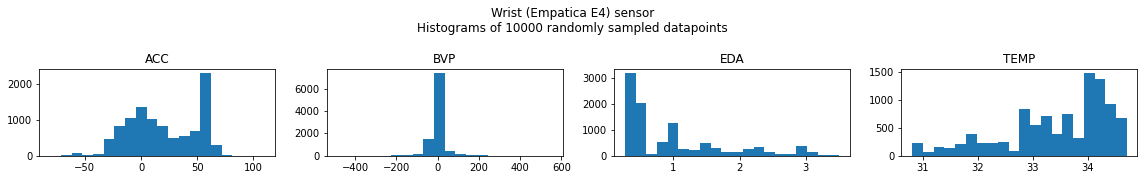


----------------------------------------------------------------------------

Elapsed time: 13.506924629211426
175872 175872


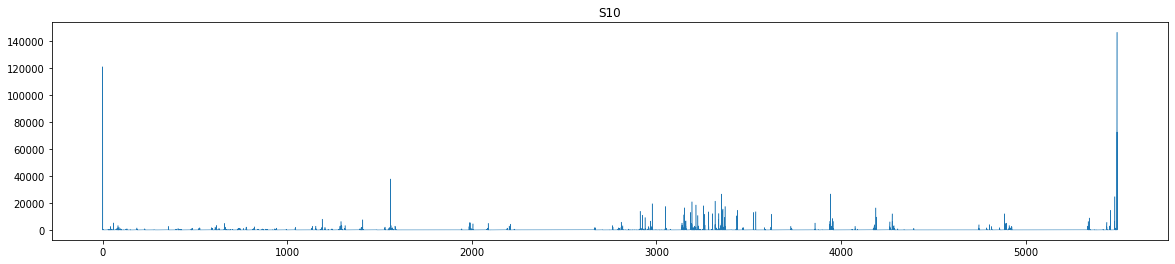

Dictionary from .pkl file has keys: dict_keys(['signal', 'label', 'subject'])
signal  is type: <class 'dict'>  with length: 2
label  is type: <class 'numpy.ndarray'>  with length: 3663100
subject  is type: <class 'str'>  with length: 3


SUBJECT #: S11


LABEL unique values: [0 1 2 3 4 5 6 7]
{'0': 'not defined/transient', '1': 'baseline', '2': 'stress', '3': 'amusement', '4': 'meditation', '5': 'ignore', '6': 'ignore', '7': 'ignore'}


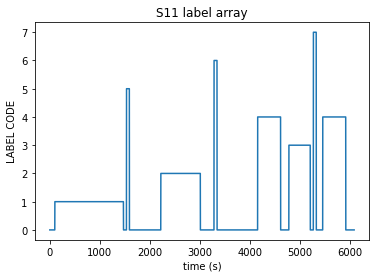



SIGNAL KEYS: dict_keys(['chest', 'wrist'])
chest: <class 'dict'> has keys: dict_keys(['ACC', 'ECG', 'EMG', 'EDA', 'Temp', 'Resp'])
wrist: <class 'dict'> has keys: dict_keys(['ACC', 'BVP', 'EDA', 'TEMP'])

 Chest (RespiBAN) sensor
ACC array has shape: (3663100, 3) at 700 Hz for a total of  5233.0 seconds
ECG array has shape: (3663100, 1) at 700 Hz for a total of  5233.0 seconds
EMG array has shape: (3663100, 1) at 700 Hz for a total of  5233.0 seconds
EDA array has shape: (3663100, 1) at 700 Hz for a total of  5233.0 seconds
Temp array has shape: (3663100, 1) at 700 Hz for a total of  5233.0 seconds
Resp array has shape: (3663100, 1) at 700 Hz for a total of  5233.0 seconds


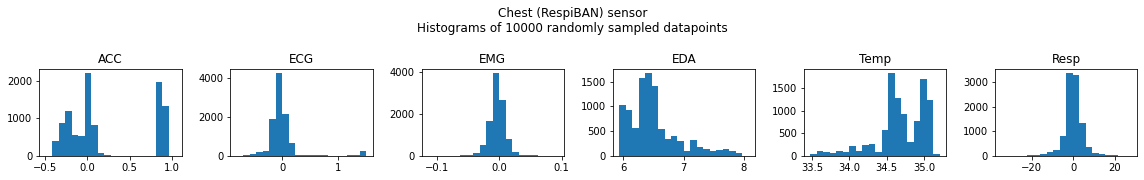


 Wrist (Empatica E4) sensor
ACC array has shape: (167456, 3) at 32 Hz for a total of  5233.0 seconds
BVP array has shape: (334912, 1) at 64 Hz for a total of  5233.0 seconds
EDA array has shape: (20932, 1) at 4 Hz for a total of  5233.0 seconds
TEMP array has shape: (20932, 1) at 4 Hz for a total of  5233.0 seconds


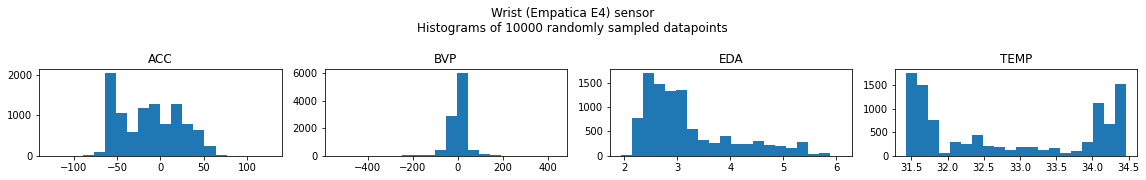


----------------------------------------------------------------------------

Elapsed time: 13.105463027954102
167456 167456


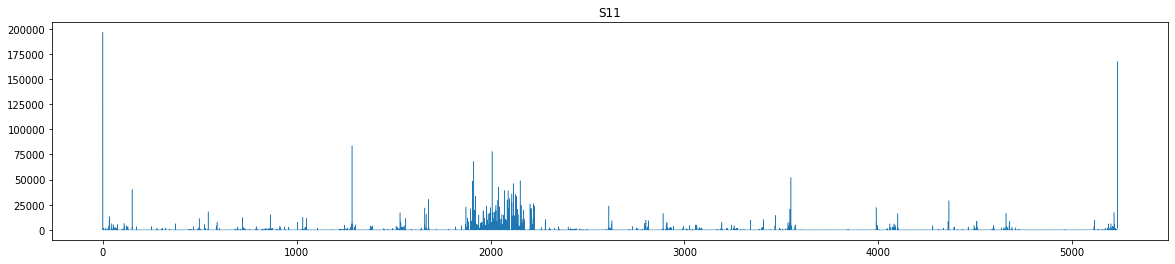

Dictionary from .pkl file has keys: dict_keys(['signal', 'label', 'subject'])
signal  is type: <class 'dict'>  with length: 2
label  is type: <class 'numpy.ndarray'>  with length: 3875900
subject  is type: <class 'str'>  with length: 3


SUBJECT #: S13


LABEL unique values: [0 1 2 3 4 5 6 7]
{'0': 'not defined/transient', '1': 'baseline', '2': 'stress', '3': 'amusement', '4': 'meditation', '5': 'ignore', '6': 'ignore', '7': 'ignore'}


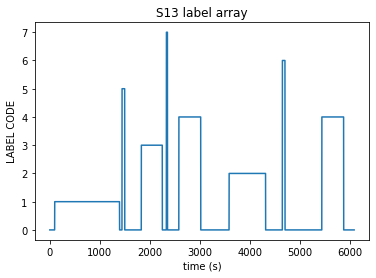



SIGNAL KEYS: dict_keys(['chest', 'wrist'])
chest: <class 'dict'> has keys: dict_keys(['ACC', 'ECG', 'EMG', 'EDA', 'Temp', 'Resp'])
wrist: <class 'dict'> has keys: dict_keys(['ACC', 'BVP', 'EDA', 'TEMP'])

 Chest (RespiBAN) sensor
ACC array has shape: (3875900, 3) at 700 Hz for a total of  5537.0 seconds
ECG array has shape: (3875900, 1) at 700 Hz for a total of  5537.0 seconds
EMG array has shape: (3875900, 1) at 700 Hz for a total of  5537.0 seconds
EDA array has shape: (3875900, 1) at 700 Hz for a total of  5537.0 seconds
Temp array has shape: (3875900, 1) at 700 Hz for a total of  5537.0 seconds
Resp array has shape: (3875900, 1) at 700 Hz for a total of  5537.0 seconds


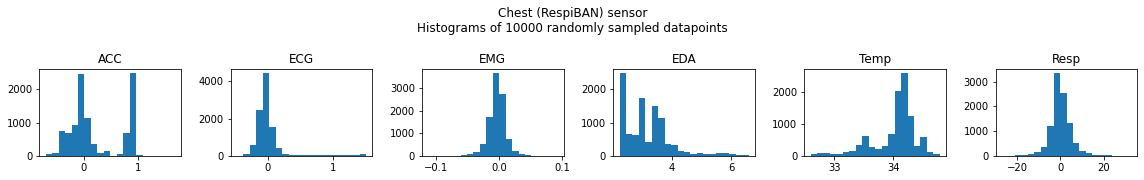


 Wrist (Empatica E4) sensor
ACC array has shape: (177184, 3) at 32 Hz for a total of  5537.0 seconds
BVP array has shape: (354368, 1) at 64 Hz for a total of  5537.0 seconds
EDA array has shape: (22148, 1) at 4 Hz for a total of  5537.0 seconds
TEMP array has shape: (22148, 1) at 4 Hz for a total of  5537.0 seconds


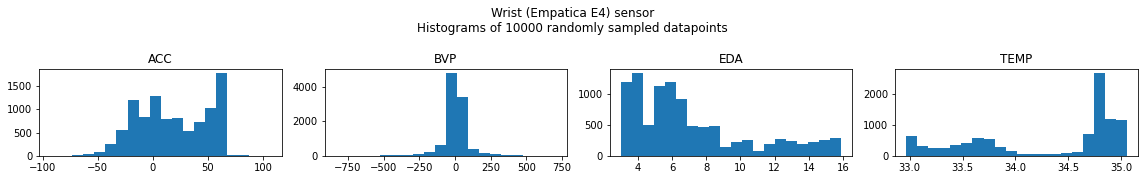


----------------------------------------------------------------------------

Elapsed time: 13.392381429672241
177184 177184


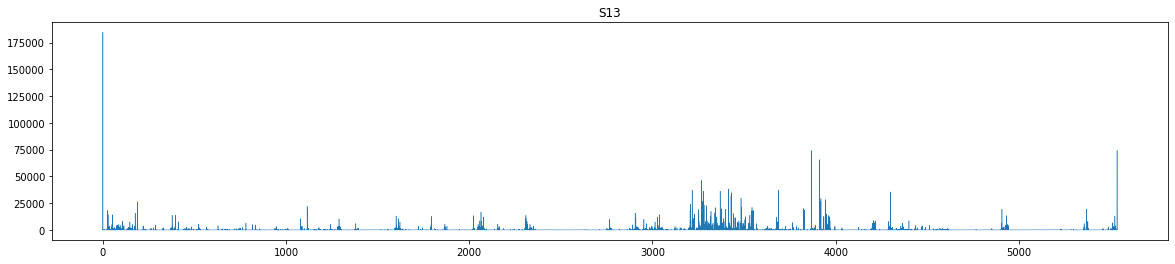

Dictionary from .pkl file has keys: dict_keys(['signal', 'label', 'subject'])
signal  is type: <class 'dict'>  with length: 2
label  is type: <class 'numpy.ndarray'>  with length: 3883600
subject  is type: <class 'str'>  with length: 3


SUBJECT #: S14


LABEL unique values: [0 1 2 3 4 5 6 7]
{'0': 'not defined/transient', '1': 'baseline', '2': 'stress', '3': 'amusement', '4': 'meditation', '5': 'ignore', '6': 'ignore', '7': 'ignore'}


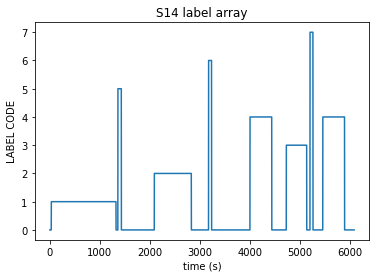



SIGNAL KEYS: dict_keys(['chest', 'wrist'])
chest: <class 'dict'> has keys: dict_keys(['ACC', 'ECG', 'EMG', 'EDA', 'Temp', 'Resp'])
wrist: <class 'dict'> has keys: dict_keys(['ACC', 'BVP', 'EDA', 'TEMP'])

 Chest (RespiBAN) sensor
ACC array has shape: (3883600, 3) at 700 Hz for a total of  5548.0 seconds
ECG array has shape: (3883600, 1) at 700 Hz for a total of  5548.0 seconds
EMG array has shape: (3883600, 1) at 700 Hz for a total of  5548.0 seconds
EDA array has shape: (3883600, 1) at 700 Hz for a total of  5548.0 seconds
Temp array has shape: (3883600, 1) at 700 Hz for a total of  5548.0 seconds
Resp array has shape: (3883600, 1) at 700 Hz for a total of  5548.0 seconds


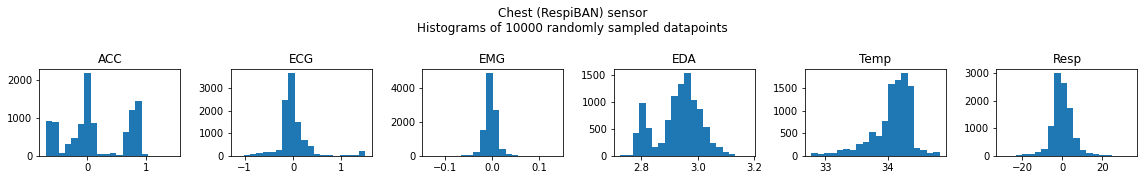


 Wrist (Empatica E4) sensor
ACC array has shape: (177536, 3) at 32 Hz for a total of  5548.0 seconds
BVP array has shape: (355072, 1) at 64 Hz for a total of  5548.0 seconds
EDA array has shape: (22192, 1) at 4 Hz for a total of  5548.0 seconds
TEMP array has shape: (22192, 1) at 4 Hz for a total of  5548.0 seconds


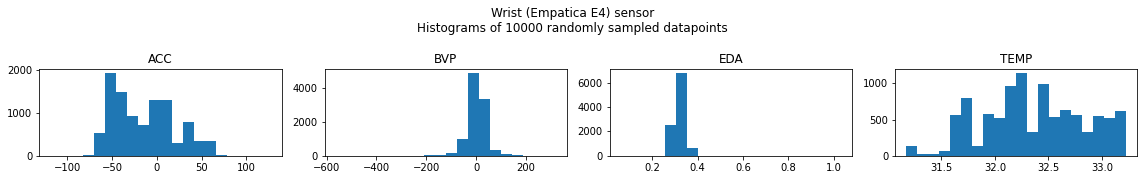


----------------------------------------------------------------------------

Elapsed time: 14.68985652923584
177536 177536


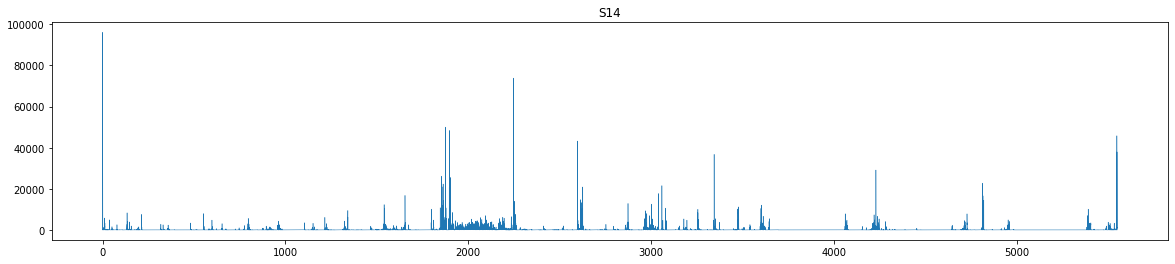

Dictionary from .pkl file has keys: dict_keys(['signal', 'label', 'subject'])
signal  is type: <class 'dict'>  with length: 2
label  is type: <class 'numpy.ndarray'>  with length: 3676400
subject  is type: <class 'str'>  with length: 3


SUBJECT #: S15


LABEL unique values: [0 1 2 3 4 5 6 7]
{'0': 'not defined/transient', '1': 'baseline', '2': 'stress', '3': 'amusement', '4': 'meditation', '5': 'ignore', '6': 'ignore', '7': 'ignore'}


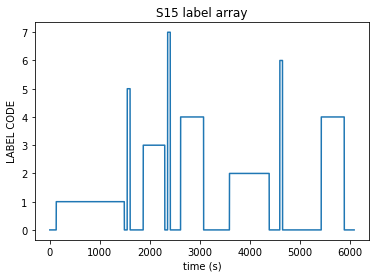



SIGNAL KEYS: dict_keys(['chest', 'wrist'])
chest: <class 'dict'> has keys: dict_keys(['ACC', 'ECG', 'EMG', 'EDA', 'Temp', 'Resp'])
wrist: <class 'dict'> has keys: dict_keys(['ACC', 'BVP', 'EDA', 'TEMP'])

 Chest (RespiBAN) sensor
ACC array has shape: (3676400, 3) at 700 Hz for a total of  5252.0 seconds
ECG array has shape: (3676400, 1) at 700 Hz for a total of  5252.0 seconds
EMG array has shape: (3676400, 1) at 700 Hz for a total of  5252.0 seconds
EDA array has shape: (3676400, 1) at 700 Hz for a total of  5252.0 seconds
Temp array has shape: (3676400, 1) at 700 Hz for a total of  5252.0 seconds
Resp array has shape: (3676400, 1) at 700 Hz for a total of  5252.0 seconds


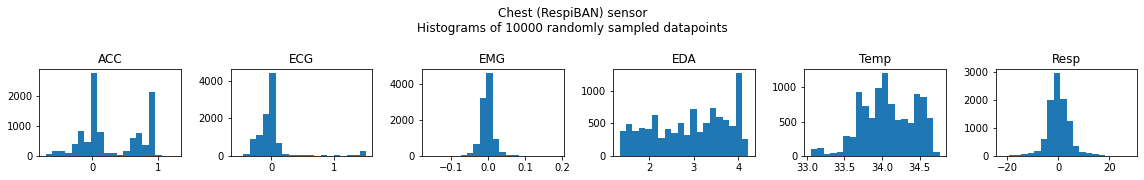


 Wrist (Empatica E4) sensor
ACC array has shape: (168064, 3) at 32 Hz for a total of  5252.0 seconds
BVP array has shape: (336128, 1) at 64 Hz for a total of  5252.0 seconds
EDA array has shape: (21008, 1) at 4 Hz for a total of  5252.0 seconds
TEMP array has shape: (21008, 1) at 4 Hz for a total of  5252.0 seconds


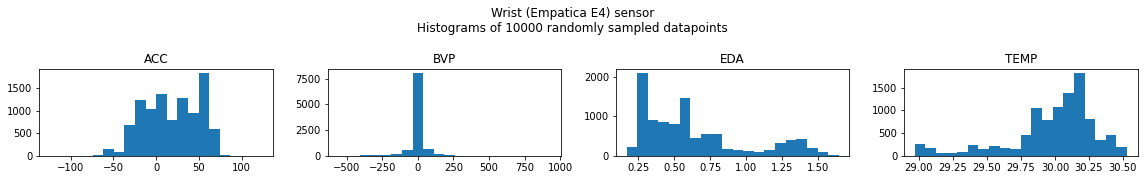


----------------------------------------------------------------------------

Elapsed time: 14.292882680892944
168064 168064


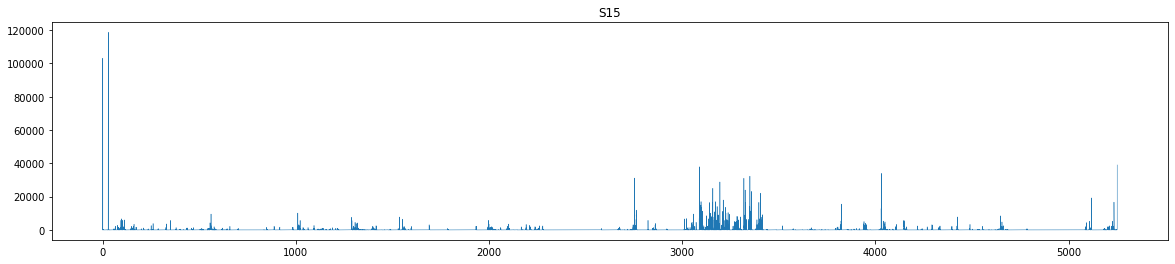

Dictionary from .pkl file has keys: dict_keys(['signal', 'label', 'subject'])
signal  is type: <class 'dict'>  with length: 2
label  is type: <class 'numpy.ndarray'>  with length: 3941700
subject  is type: <class 'str'>  with length: 3


SUBJECT #: S16


LABEL unique values: [0 1 2 3 4 5 6 7]
{'0': 'not defined/transient', '1': 'baseline', '2': 'stress', '3': 'amusement', '4': 'meditation', '5': 'ignore', '6': 'ignore', '7': 'ignore'}


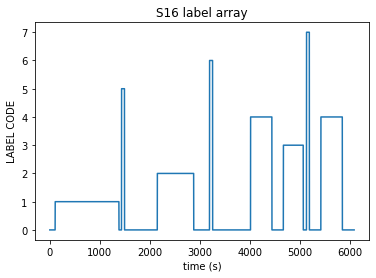



SIGNAL KEYS: dict_keys(['chest', 'wrist'])
chest: <class 'dict'> has keys: dict_keys(['ACC', 'ECG', 'EMG', 'EDA', 'Temp', 'Resp'])
wrist: <class 'dict'> has keys: dict_keys(['ACC', 'BVP', 'EDA', 'TEMP'])

 Chest (RespiBAN) sensor
ACC array has shape: (3941700, 3) at 700 Hz for a total of  5631.0 seconds
ECG array has shape: (3941700, 1) at 700 Hz for a total of  5631.0 seconds
EMG array has shape: (3941700, 1) at 700 Hz for a total of  5631.0 seconds
EDA array has shape: (3941700, 1) at 700 Hz for a total of  5631.0 seconds
Temp array has shape: (3941700, 1) at 700 Hz for a total of  5631.0 seconds
Resp array has shape: (3941700, 1) at 700 Hz for a total of  5631.0 seconds


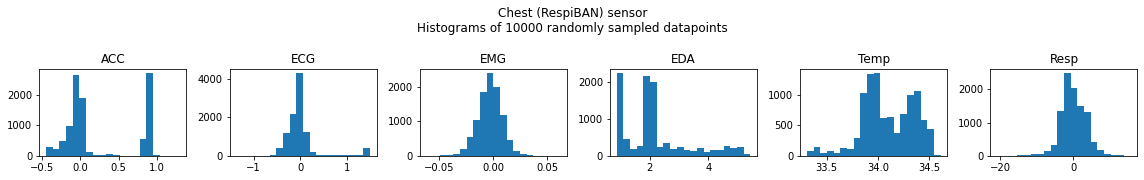


 Wrist (Empatica E4) sensor
ACC array has shape: (180192, 3) at 32 Hz for a total of  5631.0 seconds
BVP array has shape: (360384, 1) at 64 Hz for a total of  5631.0 seconds
EDA array has shape: (22524, 1) at 4 Hz for a total of  5631.0 seconds
TEMP array has shape: (22524, 1) at 4 Hz for a total of  5631.0 seconds


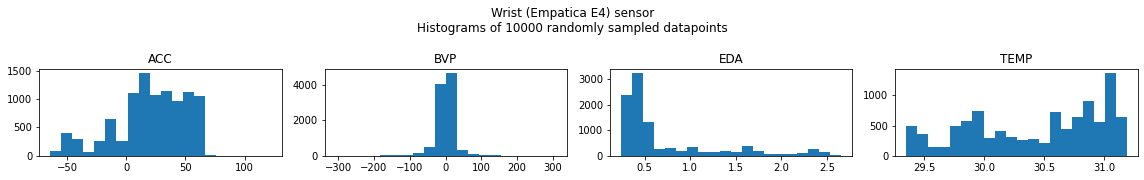


----------------------------------------------------------------------------

Elapsed time: 14.301367044448853
180192 180192


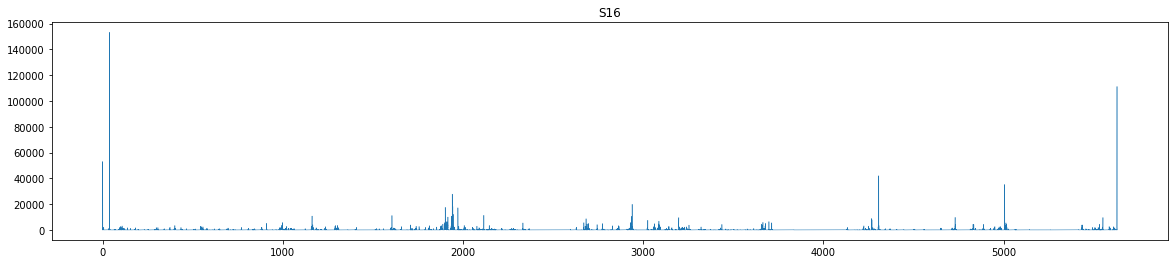

Dictionary from .pkl file has keys: dict_keys(['signal', 'label', 'subject'])
signal  is type: <class 'dict'>  with length: 2
label  is type: <class 'numpy.ndarray'>  with length: 4144000
subject  is type: <class 'str'>  with length: 3


SUBJECT #: S17


LABEL unique values: [0 1 2 3 4 5 6 7]
{'0': 'not defined/transient', '1': 'baseline', '2': 'stress', '3': 'amusement', '4': 'meditation', '5': 'ignore', '6': 'ignore', '7': 'ignore'}


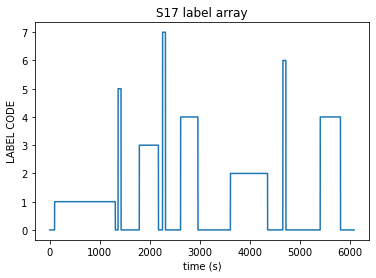



SIGNAL KEYS: dict_keys(['chest', 'wrist'])
chest: <class 'dict'> has keys: dict_keys(['ACC', 'ECG', 'EMG', 'EDA', 'Temp', 'Resp'])
wrist: <class 'dict'> has keys: dict_keys(['ACC', 'BVP', 'EDA', 'TEMP'])

 Chest (RespiBAN) sensor
ACC array has shape: (4144000, 3) at 700 Hz for a total of  5920.0 seconds
ECG array has shape: (4144000, 1) at 700 Hz for a total of  5920.0 seconds
EMG array has shape: (4144000, 1) at 700 Hz for a total of  5920.0 seconds
EDA array has shape: (4144000, 1) at 700 Hz for a total of  5920.0 seconds
Temp array has shape: (4144000, 1) at 700 Hz for a total of  5920.0 seconds
Resp array has shape: (4144000, 1) at 700 Hz for a total of  5920.0 seconds


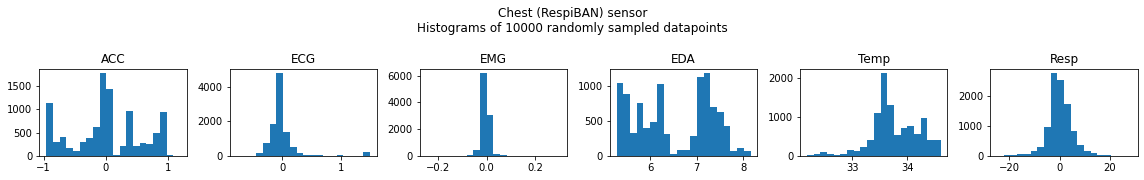


 Wrist (Empatica E4) sensor
ACC array has shape: (189440, 3) at 32 Hz for a total of  5920.0 seconds
BVP array has shape: (378880, 1) at 64 Hz for a total of  5920.0 seconds
EDA array has shape: (23680, 1) at 4 Hz for a total of  5920.0 seconds
TEMP array has shape: (23680, 1) at 4 Hz for a total of  5920.0 seconds


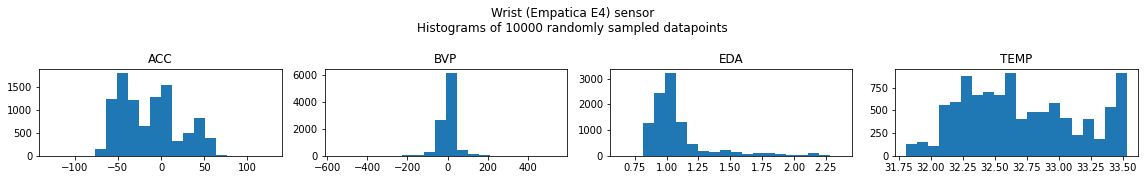


----------------------------------------------------------------------------

Elapsed time: 16.37732195854187
189440 189440


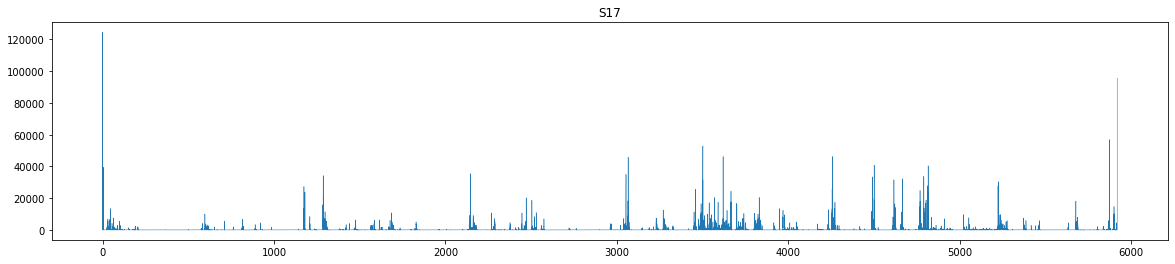

In [269]:
#wrist ACC
for Subj_ID in pkl_dict.keys():
    #Subj_ID = 'S3'
    t0 = time()
    S_signal = check_pkl_raw(Subj_ID, pkl_dict, return_data=True)
    print('Elapsed time:',time() - t0)

    ACC_y0 = S_signal['signal']['wrist']['ACC'][:,0]
    ACC_y1 = S_signal['signal']['wrist']['ACC'][:,1]
    ACC_y2 = S_signal['signal']['wrist']['ACC'][:,2]
    ACC_x = np.linspace(0, len(ACC_y0)/32, len(ACC_y0), endpoint=False)
    print(len(ACC_x), len(ACC_y0))
    
    ACC_df = pd.DataFrame(dict(time=ACC_x, ACC_y0=ACC_y0, ACC_y1=ACC_y1, ACC_y2=ACC_y2))
    ACC_df[['ACC_y0','ACC_y1','ACC_y2']] = ACC_df[['ACC_y0','ACC_y1','ACC_y2']].diff().dropna()
    ACC_df[['ACC_y0','ACC_y1','ACC_y2']] = ACC_df[['ACC_y0','ACC_y1','ACC_y2']]**2
    ACC_df[['ACC_y0','ACC_y1','ACC_y2']] = ACC_df[['ACC_y0','ACC_y1','ACC_y2']].rolling(4).sum().dropna()
    ACC_df['ACC_energy'] = ACC_df[['ACC_y0','ACC_y1','ACC_y2']].sum(axis=1)
    
    fig, ax = plt.subplots(1,1,sharex=True, figsize=[20,4])
    ax.plot(ACC_df['time'], ACC_df['ACC_energy'], lw=0.5)
    #ax.set_xlim(2000, 2060)
    ax.set_title(Subj_ID)
    plt.show()

    ACC_df.to_csv('wristACC_125msSUM_'+Subj_ID+'.csv')

Dictionary from .pkl file has keys: dict_keys(['signal', 'label', 'subject'])
signal  is type: <class 'dict'>  with length: 2
label  is type: <class 'numpy.ndarray'>  with length: 4255300
subject  is type: <class 'str'>  with length: 2


SUBJECT #: S2


LABEL unique values: [0 1 2 3 4 6 7]
{'0': 'not defined/transient', '1': 'baseline', '2': 'stress', '3': 'amusement', '4': 'meditation', '5': 'ignore', '6': 'ignore', '7': 'ignore'}


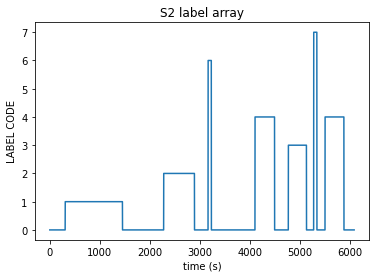



SIGNAL KEYS: dict_keys(['chest', 'wrist'])
chest: <class 'dict'> has keys: dict_keys(['ACC', 'ECG', 'EMG', 'EDA', 'Temp', 'Resp'])
wrist: <class 'dict'> has keys: dict_keys(['ACC', 'BVP', 'EDA', 'TEMP'])

 Chest (RespiBAN) sensor
ACC array has shape: (4255300, 3) at 700 Hz for a total of  6079.0 seconds
ECG array has shape: (4255300, 1) at 700 Hz for a total of  6079.0 seconds
EMG array has shape: (4255300, 1) at 700 Hz for a total of  6079.0 seconds
EDA array has shape: (4255300, 1) at 700 Hz for a total of  6079.0 seconds
Temp array has shape: (4255300, 1) at 700 Hz for a total of  6079.0 seconds
Resp array has shape: (4255300, 1) at 700 Hz for a total of  6079.0 seconds


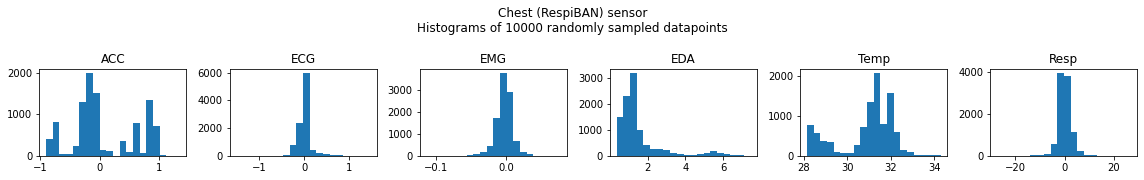


 Wrist (Empatica E4) sensor
ACC array has shape: (194528, 3) at 32 Hz for a total of  6079.0 seconds
BVP array has shape: (389056, 1) at 64 Hz for a total of  6079.0 seconds
EDA array has shape: (24316, 1) at 4 Hz for a total of  6079.0 seconds
TEMP array has shape: (24316, 1) at 4 Hz for a total of  6079.0 seconds


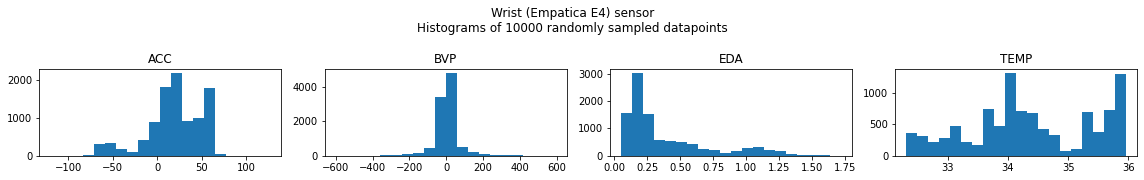


----------------------------------------------------------------------------

Elapsed time: 8.460642337799072
4255300 4255300


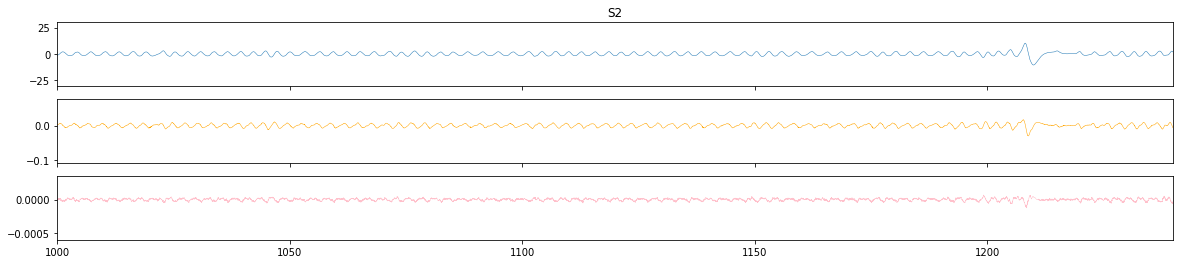

Dictionary from .pkl file has keys: dict_keys(['signal', 'label', 'subject'])
signal  is type: <class 'dict'>  with length: 2
label  is type: <class 'numpy.ndarray'>  with length: 4545100
subject  is type: <class 'str'>  with length: 2


SUBJECT #: S3


LABEL unique values: [0 1 2 3 4 5 6 7]
{'0': 'not defined/transient', '1': 'baseline', '2': 'stress', '3': 'amusement', '4': 'meditation', '5': 'ignore', '6': 'ignore', '7': 'ignore'}


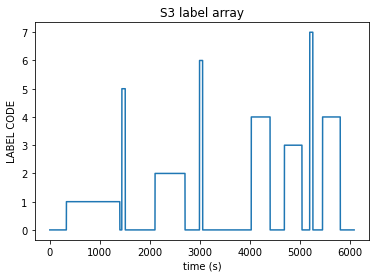



SIGNAL KEYS: dict_keys(['chest', 'wrist'])
chest: <class 'dict'> has keys: dict_keys(['ACC', 'ECG', 'EMG', 'EDA', 'Temp', 'Resp'])
wrist: <class 'dict'> has keys: dict_keys(['ACC', 'BVP', 'EDA', 'TEMP'])

 Chest (RespiBAN) sensor
ACC array has shape: (4545100, 3) at 700 Hz for a total of  6493.0 seconds
ECG array has shape: (4545100, 1) at 700 Hz for a total of  6493.0 seconds
EMG array has shape: (4545100, 1) at 700 Hz for a total of  6493.0 seconds
EDA array has shape: (4545100, 1) at 700 Hz for a total of  6493.0 seconds
Temp array has shape: (4545100, 1) at 700 Hz for a total of  6493.0 seconds
Resp array has shape: (4545100, 1) at 700 Hz for a total of  6493.0 seconds


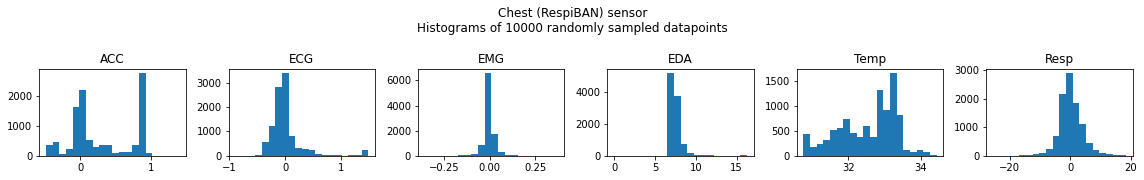


 Wrist (Empatica E4) sensor
ACC array has shape: (207776, 3) at 32 Hz for a total of  6493.0 seconds
BVP array has shape: (415552, 1) at 64 Hz for a total of  6493.0 seconds
EDA array has shape: (25972, 1) at 4 Hz for a total of  6493.0 seconds
TEMP array has shape: (25972, 1) at 4 Hz for a total of  6493.0 seconds


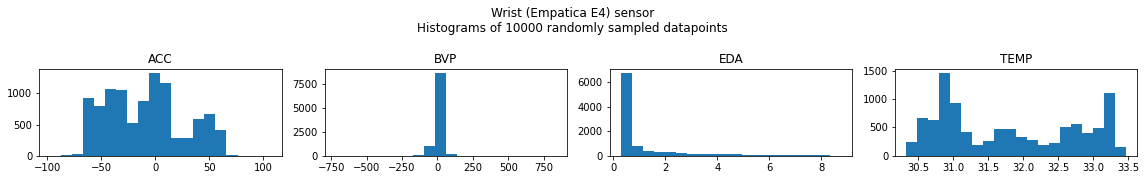


----------------------------------------------------------------------------

Elapsed time: 8.427637577056885
4545100 4545100


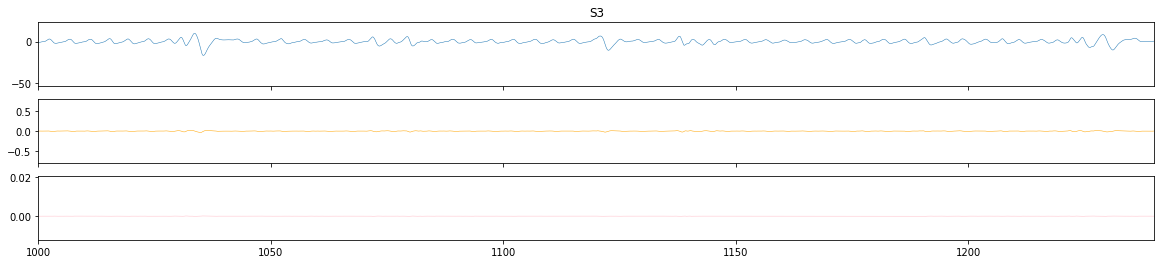

Dictionary from .pkl file has keys: dict_keys(['signal', 'label', 'subject'])
signal  is type: <class 'dict'>  with length: 2
label  is type: <class 'numpy.ndarray'>  with length: 4496100
subject  is type: <class 'str'>  with length: 2


SUBJECT #: S4


LABEL unique values: [0 1 2 3 4 5 6 7]
{'0': 'not defined/transient', '1': 'baseline', '2': 'stress', '3': 'amusement', '4': 'meditation', '5': 'ignore', '6': 'ignore', '7': 'ignore'}


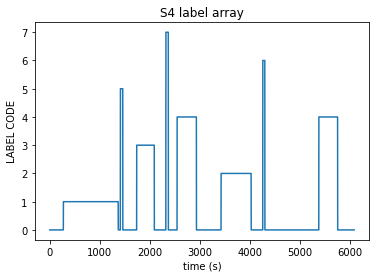



SIGNAL KEYS: dict_keys(['chest', 'wrist'])
chest: <class 'dict'> has keys: dict_keys(['ACC', 'ECG', 'EMG', 'EDA', 'Temp', 'Resp'])
wrist: <class 'dict'> has keys: dict_keys(['ACC', 'BVP', 'EDA', 'TEMP'])

 Chest (RespiBAN) sensor
ACC array has shape: (4496100, 3) at 700 Hz for a total of  6423.0 seconds
ECG array has shape: (4496100, 1) at 700 Hz for a total of  6423.0 seconds
EMG array has shape: (4496100, 1) at 700 Hz for a total of  6423.0 seconds
EDA array has shape: (4496100, 1) at 700 Hz for a total of  6423.0 seconds
Temp array has shape: (4496100, 1) at 700 Hz for a total of  6423.0 seconds
Resp array has shape: (4496100, 1) at 700 Hz for a total of  6423.0 seconds


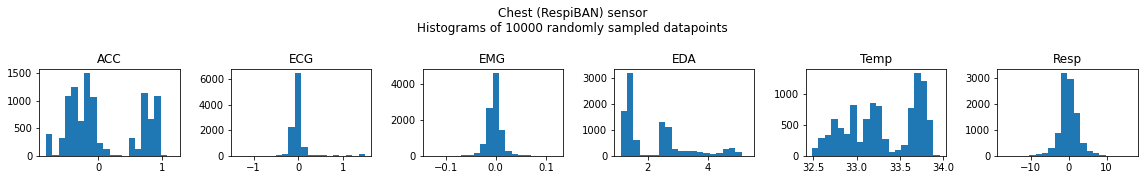


 Wrist (Empatica E4) sensor
ACC array has shape: (205536, 3) at 32 Hz for a total of  6423.0 seconds
BVP array has shape: (411072, 1) at 64 Hz for a total of  6423.0 seconds
EDA array has shape: (25692, 1) at 4 Hz for a total of  6423.0 seconds
TEMP array has shape: (25692, 1) at 4 Hz for a total of  6423.0 seconds


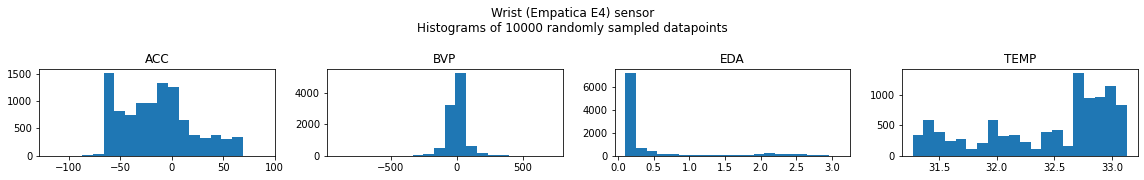


----------------------------------------------------------------------------

Elapsed time: 17.449023485183716
4496100 4496100


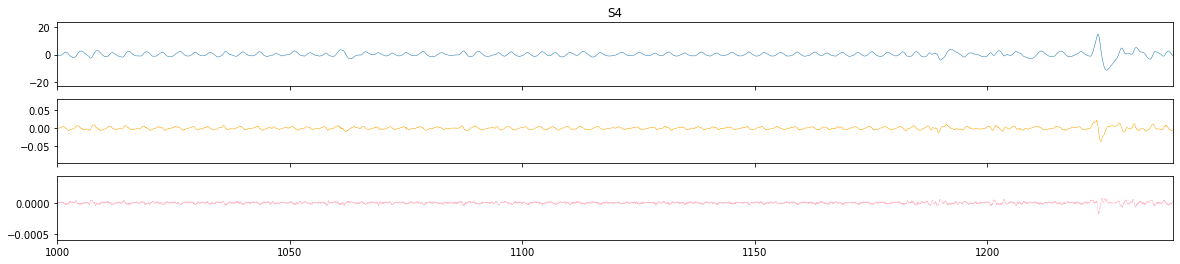

Dictionary from .pkl file has keys: dict_keys(['signal', 'label', 'subject'])
signal  is type: <class 'dict'>  with length: 2
label  is type: <class 'numpy.ndarray'>  with length: 4380600
subject  is type: <class 'str'>  with length: 2


SUBJECT #: S5


LABEL unique values: [0 1 2 3 4 5 6 7]
{'0': 'not defined/transient', '1': 'baseline', '2': 'stress', '3': 'amusement', '4': 'meditation', '5': 'ignore', '6': 'ignore', '7': 'ignore'}


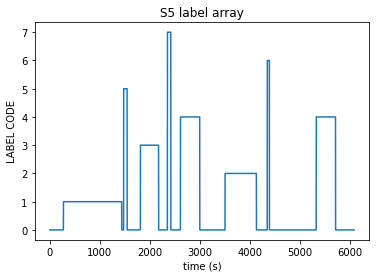



SIGNAL KEYS: dict_keys(['chest', 'wrist'])
chest: <class 'dict'> has keys: dict_keys(['ACC', 'ECG', 'EMG', 'EDA', 'Temp', 'Resp'])
wrist: <class 'dict'> has keys: dict_keys(['ACC', 'BVP', 'EDA', 'TEMP'])

 Chest (RespiBAN) sensor
ACC array has shape: (4380600, 3) at 700 Hz for a total of  6258.0 seconds
ECG array has shape: (4380600, 1) at 700 Hz for a total of  6258.0 seconds
EMG array has shape: (4380600, 1) at 700 Hz for a total of  6258.0 seconds
EDA array has shape: (4380600, 1) at 700 Hz for a total of  6258.0 seconds
Temp array has shape: (4380600, 1) at 700 Hz for a total of  6258.0 seconds
Resp array has shape: (4380600, 1) at 700 Hz for a total of  6258.0 seconds


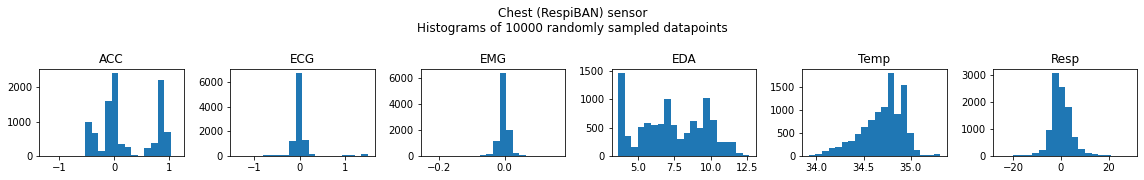


 Wrist (Empatica E4) sensor
ACC array has shape: (200256, 3) at 32 Hz for a total of  6258.0 seconds
BVP array has shape: (400512, 1) at 64 Hz for a total of  6258.0 seconds
EDA array has shape: (25032, 1) at 4 Hz for a total of  6258.0 seconds
TEMP array has shape: (25032, 1) at 4 Hz for a total of  6258.0 seconds


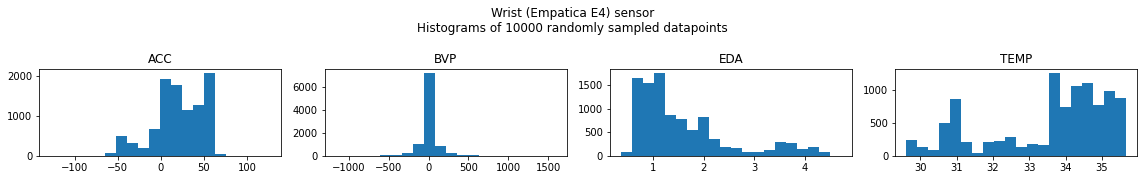


----------------------------------------------------------------------------

Elapsed time: 18.260518074035645
4380600 4380600


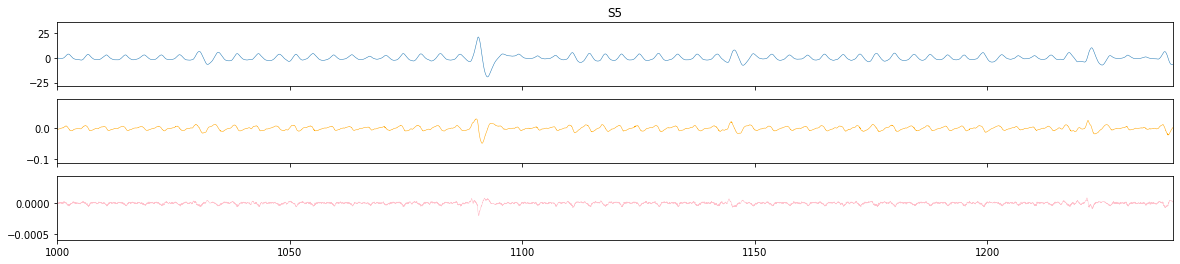

Dictionary from .pkl file has keys: dict_keys(['signal', 'label', 'subject'])
signal  is type: <class 'dict'>  with length: 2
label  is type: <class 'numpy.ndarray'>  with length: 4949700
subject  is type: <class 'str'>  with length: 2


SUBJECT #: S6


LABEL unique values: [0 1 2 3 4 5 6 7]
{'0': 'not defined/transient', '1': 'baseline', '2': 'stress', '3': 'amusement', '4': 'meditation', '5': 'ignore', '6': 'ignore', '7': 'ignore'}


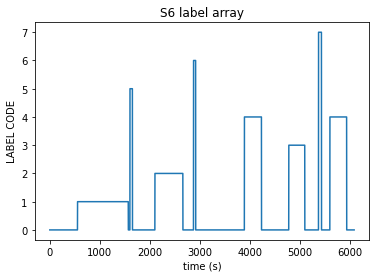



SIGNAL KEYS: dict_keys(['chest', 'wrist'])
chest: <class 'dict'> has keys: dict_keys(['ACC', 'ECG', 'EMG', 'EDA', 'Temp', 'Resp'])
wrist: <class 'dict'> has keys: dict_keys(['ACC', 'BVP', 'EDA', 'TEMP'])

 Chest (RespiBAN) sensor
ACC array has shape: (4949700, 3) at 700 Hz for a total of  7071.0 seconds
ECG array has shape: (4949700, 1) at 700 Hz for a total of  7071.0 seconds
EMG array has shape: (4949700, 1) at 700 Hz for a total of  7071.0 seconds
EDA array has shape: (4949700, 1) at 700 Hz for a total of  7071.0 seconds
Temp array has shape: (4949700, 1) at 700 Hz for a total of  7071.0 seconds
Resp array has shape: (4949700, 1) at 700 Hz for a total of  7071.0 seconds


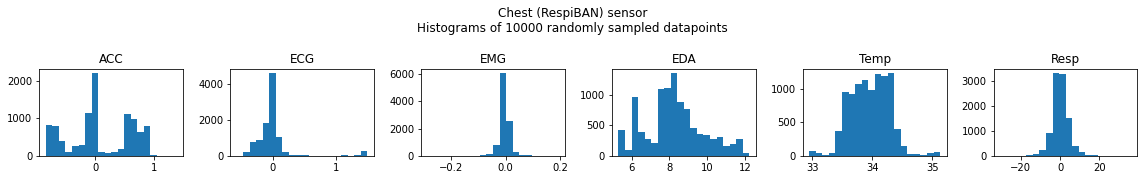


 Wrist (Empatica E4) sensor
ACC array has shape: (226272, 3) at 32 Hz for a total of  7071.0 seconds
BVP array has shape: (452544, 1) at 64 Hz for a total of  7071.0 seconds
EDA array has shape: (28284, 1) at 4 Hz for a total of  7071.0 seconds
TEMP array has shape: (28284, 1) at 4 Hz for a total of  7071.0 seconds


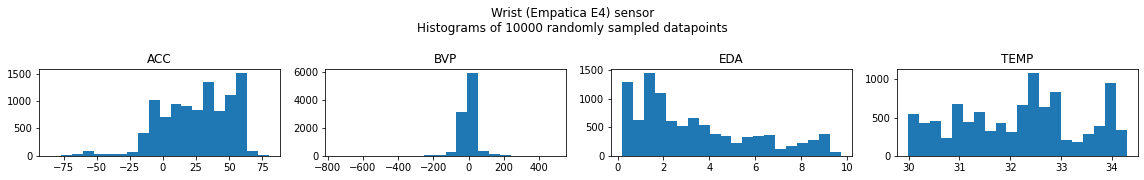


----------------------------------------------------------------------------

Elapsed time: 19.3265278339386
4949700 4949700


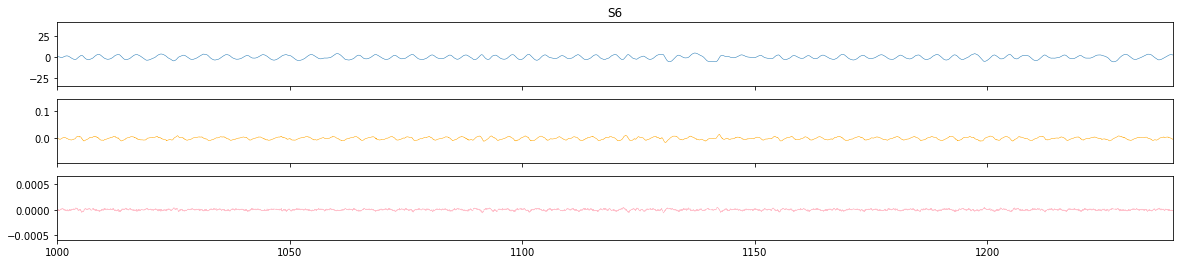

Dictionary from .pkl file has keys: dict_keys(['signal', 'label', 'subject'])
signal  is type: <class 'dict'>  with length: 2
label  is type: <class 'numpy.ndarray'>  with length: 3666600
subject  is type: <class 'str'>  with length: 2


SUBJECT #: S7


LABEL unique values: [0 1 2 3 4 5 6 7]
{'0': 'not defined/transient', '1': 'baseline', '2': 'stress', '3': 'amusement', '4': 'meditation', '5': 'ignore', '6': 'ignore', '7': 'ignore'}


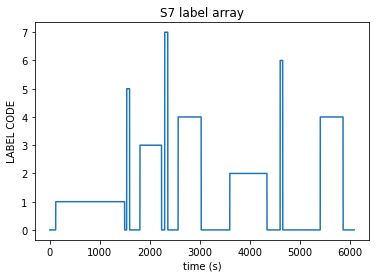



SIGNAL KEYS: dict_keys(['chest', 'wrist'])
chest: <class 'dict'> has keys: dict_keys(['ACC', 'ECG', 'EMG', 'EDA', 'Temp', 'Resp'])
wrist: <class 'dict'> has keys: dict_keys(['ACC', 'BVP', 'EDA', 'TEMP'])

 Chest (RespiBAN) sensor
ACC array has shape: (3666600, 3) at 700 Hz for a total of  5238.0 seconds
ECG array has shape: (3666600, 1) at 700 Hz for a total of  5238.0 seconds
EMG array has shape: (3666600, 1) at 700 Hz for a total of  5238.0 seconds
EDA array has shape: (3666600, 1) at 700 Hz for a total of  5238.0 seconds
Temp array has shape: (3666600, 1) at 700 Hz for a total of  5238.0 seconds
Resp array has shape: (3666600, 1) at 700 Hz for a total of  5238.0 seconds


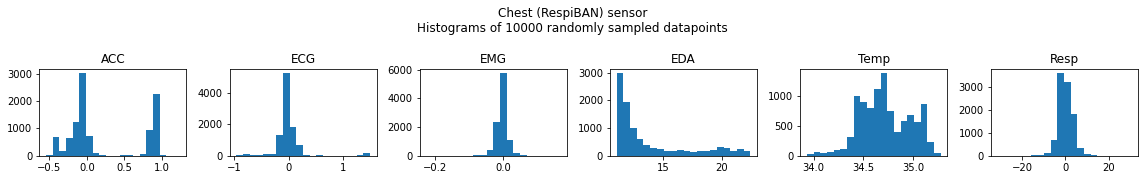


 Wrist (Empatica E4) sensor
ACC array has shape: (167616, 3) at 32 Hz for a total of  5238.0 seconds
BVP array has shape: (335232, 1) at 64 Hz for a total of  5238.0 seconds
EDA array has shape: (20952, 1) at 4 Hz for a total of  5238.0 seconds
TEMP array has shape: (20952, 1) at 4 Hz for a total of  5238.0 seconds


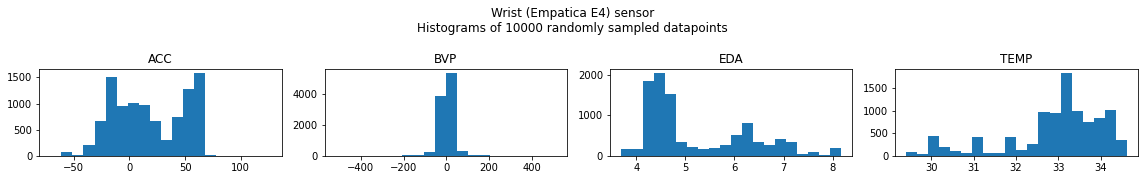


----------------------------------------------------------------------------

Elapsed time: 14.571412563323975
3666600 3666600


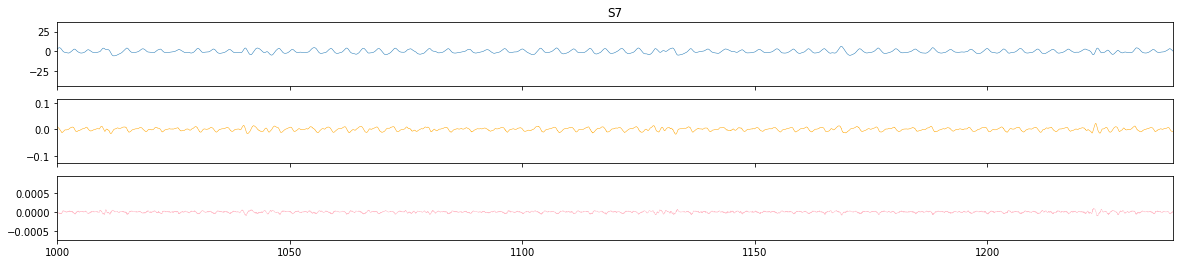

Dictionary from .pkl file has keys: dict_keys(['signal', 'label', 'subject'])
signal  is type: <class 'dict'>  with length: 2
label  is type: <class 'numpy.ndarray'>  with length: 3826200
subject  is type: <class 'str'>  with length: 2


SUBJECT #: S8


LABEL unique values: [0 1 2 3 4 5 6 7]
{'0': 'not defined/transient', '1': 'baseline', '2': 'stress', '3': 'amusement', '4': 'meditation', '5': 'ignore', '6': 'ignore', '7': 'ignore'}


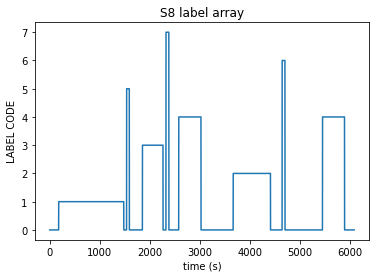



SIGNAL KEYS: dict_keys(['chest', 'wrist'])
chest: <class 'dict'> has keys: dict_keys(['ACC', 'ECG', 'EMG', 'EDA', 'Temp', 'Resp'])
wrist: <class 'dict'> has keys: dict_keys(['ACC', 'BVP', 'EDA', 'TEMP'])

 Chest (RespiBAN) sensor
ACC array has shape: (3826200, 3) at 700 Hz for a total of  5466.0 seconds
ECG array has shape: (3826200, 1) at 700 Hz for a total of  5466.0 seconds
EMG array has shape: (3826200, 1) at 700 Hz for a total of  5466.0 seconds
EDA array has shape: (3826200, 1) at 700 Hz for a total of  5466.0 seconds
Temp array has shape: (3826200, 1) at 700 Hz for a total of  5466.0 seconds
Resp array has shape: (3826200, 1) at 700 Hz for a total of  5466.0 seconds


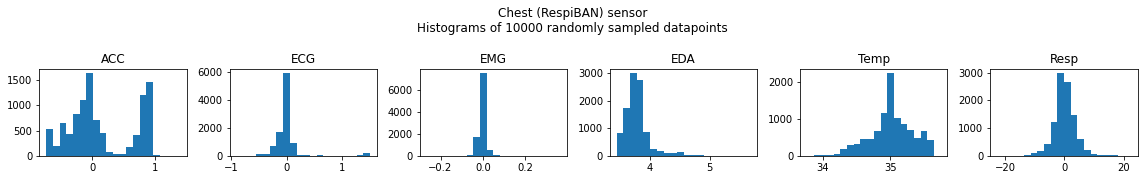


 Wrist (Empatica E4) sensor
ACC array has shape: (174912, 3) at 32 Hz for a total of  5466.0 seconds
BVP array has shape: (349824, 1) at 64 Hz for a total of  5466.0 seconds
EDA array has shape: (21864, 1) at 4 Hz for a total of  5466.0 seconds
TEMP array has shape: (21864, 1) at 4 Hz for a total of  5466.0 seconds


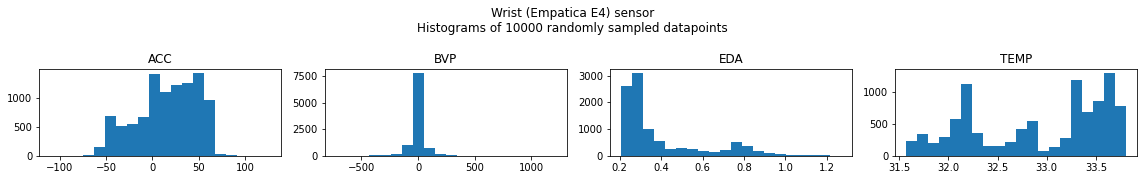


----------------------------------------------------------------------------

Elapsed time: 15.939266443252563
3826200 3826200


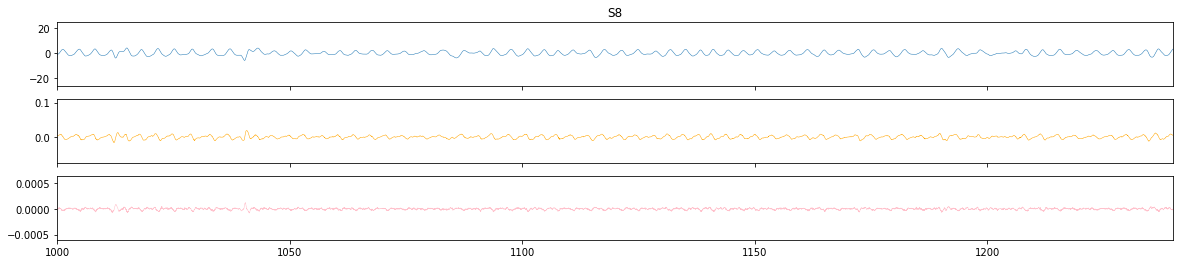

Dictionary from .pkl file has keys: dict_keys(['signal', 'label', 'subject'])
signal  is type: <class 'dict'>  with length: 2
label  is type: <class 'numpy.ndarray'>  with length: 3656100
subject  is type: <class 'str'>  with length: 2


SUBJECT #: S9


LABEL unique values: [0 1 2 3 4 5 6 7]
{'0': 'not defined/transient', '1': 'baseline', '2': 'stress', '3': 'amusement', '4': 'meditation', '5': 'ignore', '6': 'ignore', '7': 'ignore'}


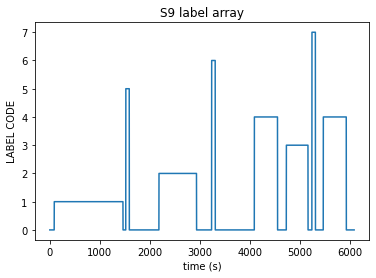



SIGNAL KEYS: dict_keys(['chest', 'wrist'])
chest: <class 'dict'> has keys: dict_keys(['ACC', 'ECG', 'EMG', 'EDA', 'Temp', 'Resp'])
wrist: <class 'dict'> has keys: dict_keys(['ACC', 'BVP', 'EDA', 'TEMP'])

 Chest (RespiBAN) sensor
ACC array has shape: (3656100, 3) at 700 Hz for a total of  5223.0 seconds
ECG array has shape: (3656100, 1) at 700 Hz for a total of  5223.0 seconds
EMG array has shape: (3656100, 1) at 700 Hz for a total of  5223.0 seconds
EDA array has shape: (3656100, 1) at 700 Hz for a total of  5223.0 seconds
Temp array has shape: (3656100, 1) at 700 Hz for a total of  5223.0 seconds
Resp array has shape: (3656100, 1) at 700 Hz for a total of  5223.0 seconds


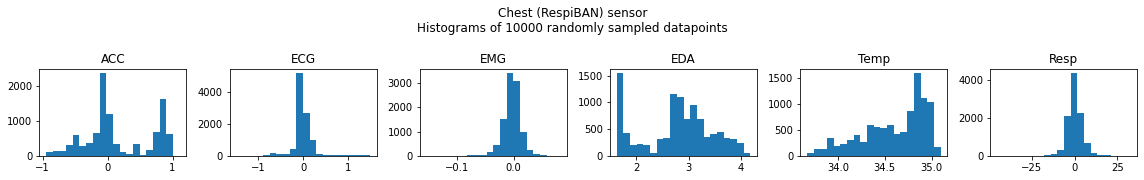


 Wrist (Empatica E4) sensor
ACC array has shape: (167136, 3) at 32 Hz for a total of  5223.0 seconds
BVP array has shape: (334272, 1) at 64 Hz for a total of  5223.0 seconds
EDA array has shape: (20892, 1) at 4 Hz for a total of  5223.0 seconds
TEMP array has shape: (20892, 1) at 4 Hz for a total of  5223.0 seconds


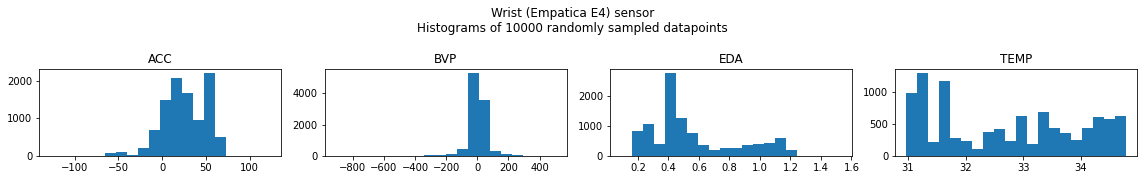


----------------------------------------------------------------------------

Elapsed time: 14.93015170097351
3656100 3656100


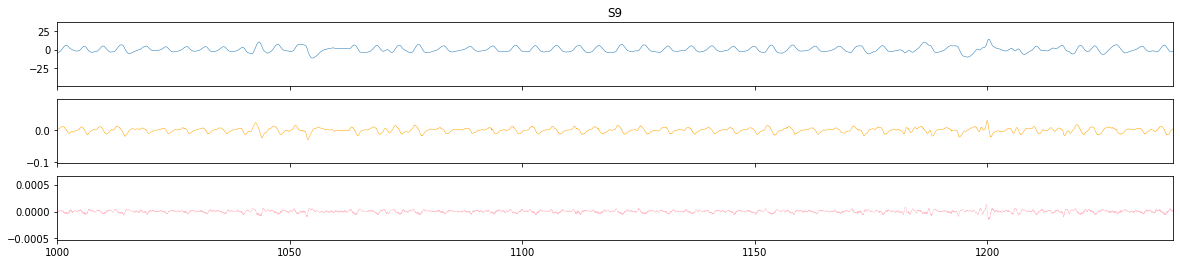

Dictionary from .pkl file has keys: dict_keys(['signal', 'label', 'subject'])
signal  is type: <class 'dict'>  with length: 2
label  is type: <class 'numpy.ndarray'>  with length: 3847200
subject  is type: <class 'str'>  with length: 3


SUBJECT #: S10


LABEL unique values: [0 1 2 3 4 5 6 7]
{'0': 'not defined/transient', '1': 'baseline', '2': 'stress', '3': 'amusement', '4': 'meditation', '5': 'ignore', '6': 'ignore', '7': 'ignore'}


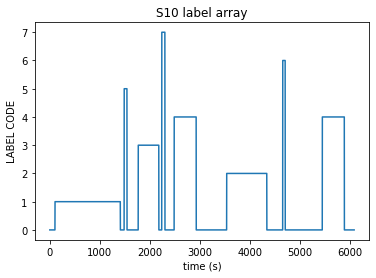



SIGNAL KEYS: dict_keys(['chest', 'wrist'])
chest: <class 'dict'> has keys: dict_keys(['ACC', 'ECG', 'EMG', 'EDA', 'Temp', 'Resp'])
wrist: <class 'dict'> has keys: dict_keys(['ACC', 'BVP', 'EDA', 'TEMP'])

 Chest (RespiBAN) sensor
ACC array has shape: (3847200, 3) at 700 Hz for a total of  5496.0 seconds
ECG array has shape: (3847200, 1) at 700 Hz for a total of  5496.0 seconds
EMG array has shape: (3847200, 1) at 700 Hz for a total of  5496.0 seconds
EDA array has shape: (3847200, 1) at 700 Hz for a total of  5496.0 seconds
Temp array has shape: (3847200, 1) at 700 Hz for a total of  5496.0 seconds
Resp array has shape: (3847200, 1) at 700 Hz for a total of  5496.0 seconds


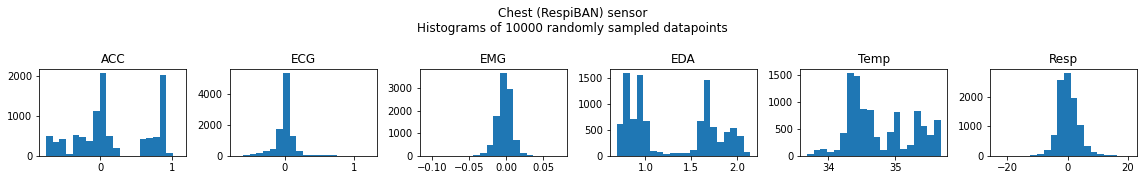


 Wrist (Empatica E4) sensor
ACC array has shape: (175872, 3) at 32 Hz for a total of  5496.0 seconds
BVP array has shape: (351744, 1) at 64 Hz for a total of  5496.0 seconds
EDA array has shape: (21984, 1) at 4 Hz for a total of  5496.0 seconds
TEMP array has shape: (21984, 1) at 4 Hz for a total of  5496.0 seconds


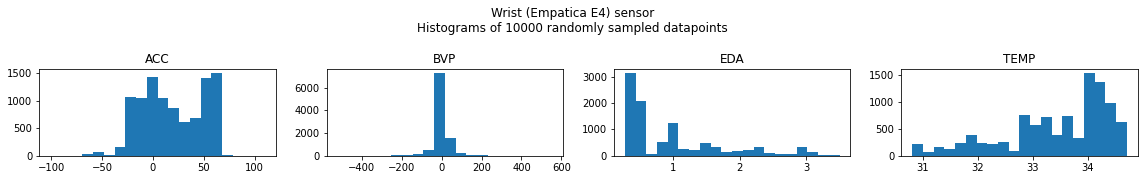


----------------------------------------------------------------------------

Elapsed time: 13.604877710342407
3847200 3847200


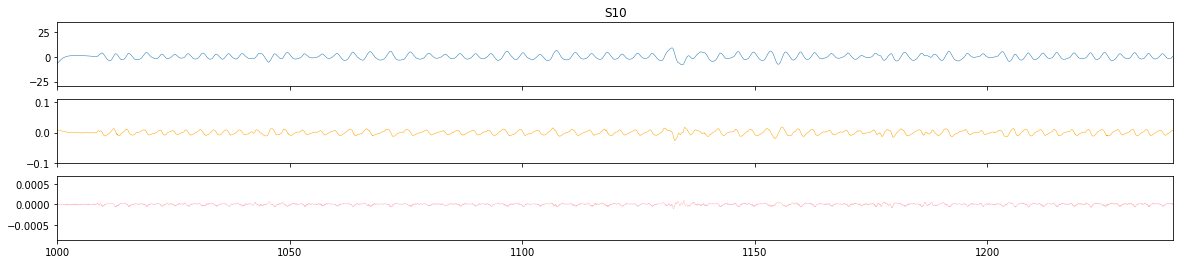

Dictionary from .pkl file has keys: dict_keys(['signal', 'label', 'subject'])
signal  is type: <class 'dict'>  with length: 2
label  is type: <class 'numpy.ndarray'>  with length: 3663100
subject  is type: <class 'str'>  with length: 3


SUBJECT #: S11


LABEL unique values: [0 1 2 3 4 5 6 7]
{'0': 'not defined/transient', '1': 'baseline', '2': 'stress', '3': 'amusement', '4': 'meditation', '5': 'ignore', '6': 'ignore', '7': 'ignore'}


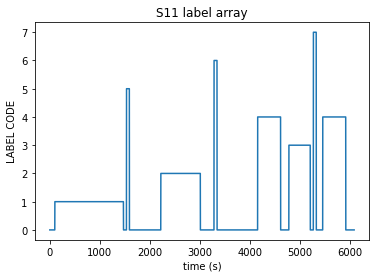



SIGNAL KEYS: dict_keys(['chest', 'wrist'])
chest: <class 'dict'> has keys: dict_keys(['ACC', 'ECG', 'EMG', 'EDA', 'Temp', 'Resp'])
wrist: <class 'dict'> has keys: dict_keys(['ACC', 'BVP', 'EDA', 'TEMP'])

 Chest (RespiBAN) sensor
ACC array has shape: (3663100, 3) at 700 Hz for a total of  5233.0 seconds
ECG array has shape: (3663100, 1) at 700 Hz for a total of  5233.0 seconds
EMG array has shape: (3663100, 1) at 700 Hz for a total of  5233.0 seconds
EDA array has shape: (3663100, 1) at 700 Hz for a total of  5233.0 seconds
Temp array has shape: (3663100, 1) at 700 Hz for a total of  5233.0 seconds
Resp array has shape: (3663100, 1) at 700 Hz for a total of  5233.0 seconds


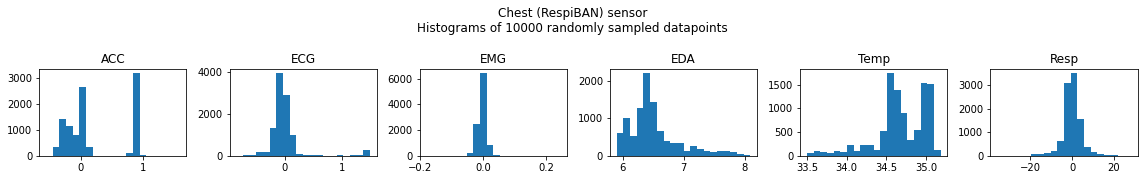


 Wrist (Empatica E4) sensor
ACC array has shape: (167456, 3) at 32 Hz for a total of  5233.0 seconds
BVP array has shape: (334912, 1) at 64 Hz for a total of  5233.0 seconds
EDA array has shape: (20932, 1) at 4 Hz for a total of  5233.0 seconds
TEMP array has shape: (20932, 1) at 4 Hz for a total of  5233.0 seconds


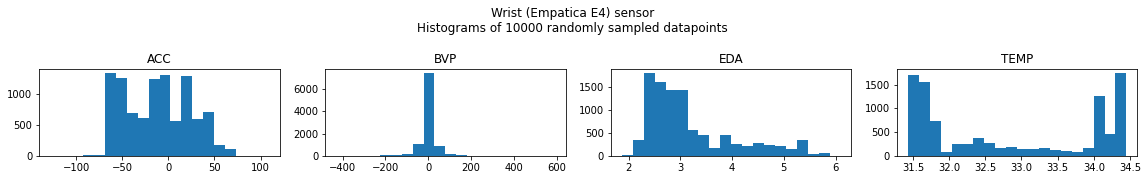


----------------------------------------------------------------------------

Elapsed time: 13.414476871490479
3663100 3663100


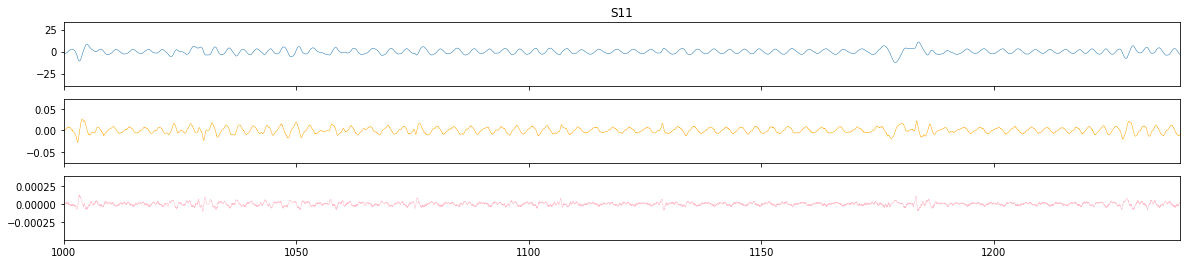

Dictionary from .pkl file has keys: dict_keys(['signal', 'label', 'subject'])
signal  is type: <class 'dict'>  with length: 2
label  is type: <class 'numpy.ndarray'>  with length: 3875900
subject  is type: <class 'str'>  with length: 3


SUBJECT #: S13


LABEL unique values: [0 1 2 3 4 5 6 7]
{'0': 'not defined/transient', '1': 'baseline', '2': 'stress', '3': 'amusement', '4': 'meditation', '5': 'ignore', '6': 'ignore', '7': 'ignore'}


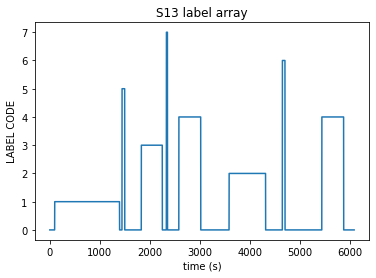



SIGNAL KEYS: dict_keys(['chest', 'wrist'])
chest: <class 'dict'> has keys: dict_keys(['ACC', 'ECG', 'EMG', 'EDA', 'Temp', 'Resp'])
wrist: <class 'dict'> has keys: dict_keys(['ACC', 'BVP', 'EDA', 'TEMP'])

 Chest (RespiBAN) sensor
ACC array has shape: (3875900, 3) at 700 Hz for a total of  5537.0 seconds
ECG array has shape: (3875900, 1) at 700 Hz for a total of  5537.0 seconds
EMG array has shape: (3875900, 1) at 700 Hz for a total of  5537.0 seconds
EDA array has shape: (3875900, 1) at 700 Hz for a total of  5537.0 seconds
Temp array has shape: (3875900, 1) at 700 Hz for a total of  5537.0 seconds
Resp array has shape: (3875900, 1) at 700 Hz for a total of  5537.0 seconds


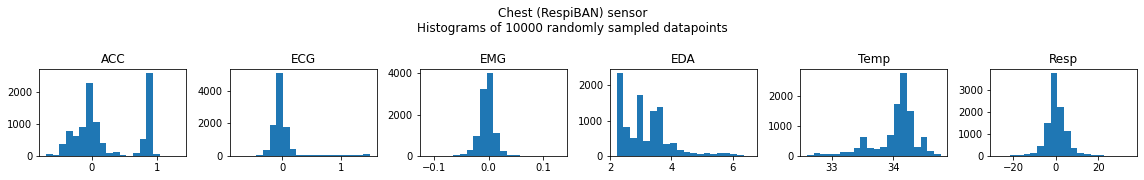


 Wrist (Empatica E4) sensor
ACC array has shape: (177184, 3) at 32 Hz for a total of  5537.0 seconds
BVP array has shape: (354368, 1) at 64 Hz for a total of  5537.0 seconds
EDA array has shape: (22148, 1) at 4 Hz for a total of  5537.0 seconds
TEMP array has shape: (22148, 1) at 4 Hz for a total of  5537.0 seconds


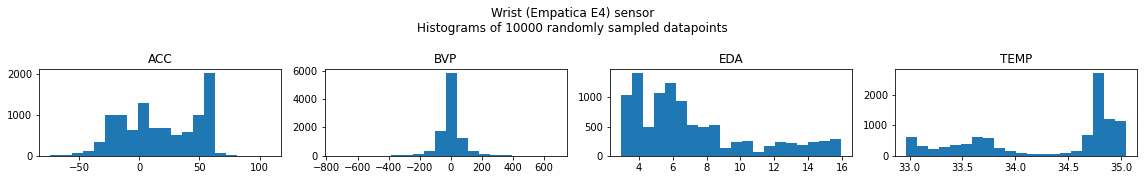


----------------------------------------------------------------------------

Elapsed time: 14.232893466949463
3875900 3875900


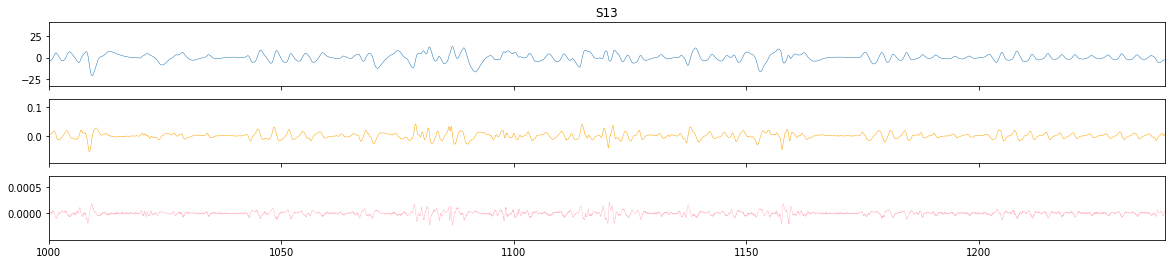

Dictionary from .pkl file has keys: dict_keys(['signal', 'label', 'subject'])
signal  is type: <class 'dict'>  with length: 2
label  is type: <class 'numpy.ndarray'>  with length: 3883600
subject  is type: <class 'str'>  with length: 3


SUBJECT #: S14


LABEL unique values: [0 1 2 3 4 5 6 7]
{'0': 'not defined/transient', '1': 'baseline', '2': 'stress', '3': 'amusement', '4': 'meditation', '5': 'ignore', '6': 'ignore', '7': 'ignore'}


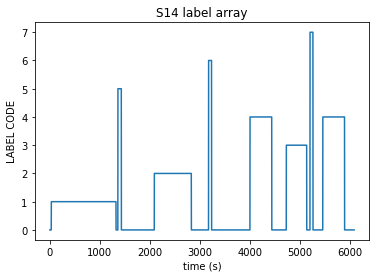



SIGNAL KEYS: dict_keys(['chest', 'wrist'])
chest: <class 'dict'> has keys: dict_keys(['ACC', 'ECG', 'EMG', 'EDA', 'Temp', 'Resp'])
wrist: <class 'dict'> has keys: dict_keys(['ACC', 'BVP', 'EDA', 'TEMP'])

 Chest (RespiBAN) sensor
ACC array has shape: (3883600, 3) at 700 Hz for a total of  5548.0 seconds
ECG array has shape: (3883600, 1) at 700 Hz for a total of  5548.0 seconds
EMG array has shape: (3883600, 1) at 700 Hz for a total of  5548.0 seconds
EDA array has shape: (3883600, 1) at 700 Hz for a total of  5548.0 seconds
Temp array has shape: (3883600, 1) at 700 Hz for a total of  5548.0 seconds
Resp array has shape: (3883600, 1) at 700 Hz for a total of  5548.0 seconds


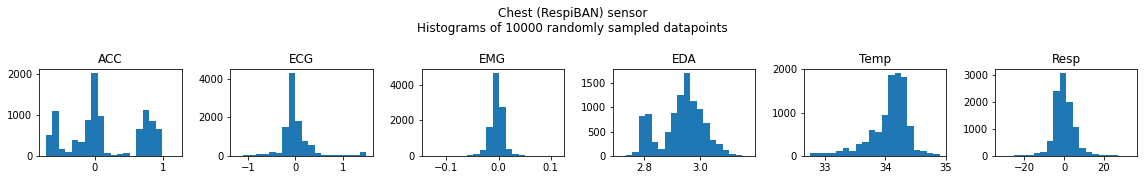


 Wrist (Empatica E4) sensor
ACC array has shape: (177536, 3) at 32 Hz for a total of  5548.0 seconds
BVP array has shape: (355072, 1) at 64 Hz for a total of  5548.0 seconds
EDA array has shape: (22192, 1) at 4 Hz for a total of  5548.0 seconds
TEMP array has shape: (22192, 1) at 4 Hz for a total of  5548.0 seconds


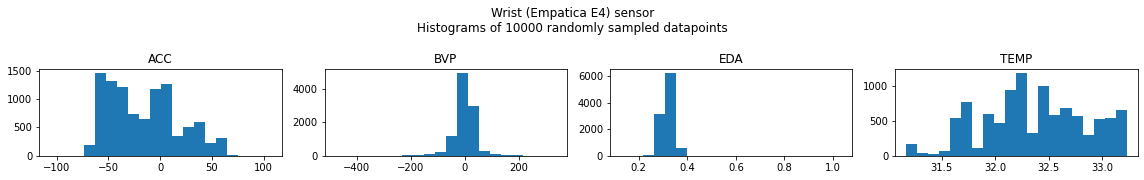


----------------------------------------------------------------------------

Elapsed time: 15.419084787368774
3883600 3883600


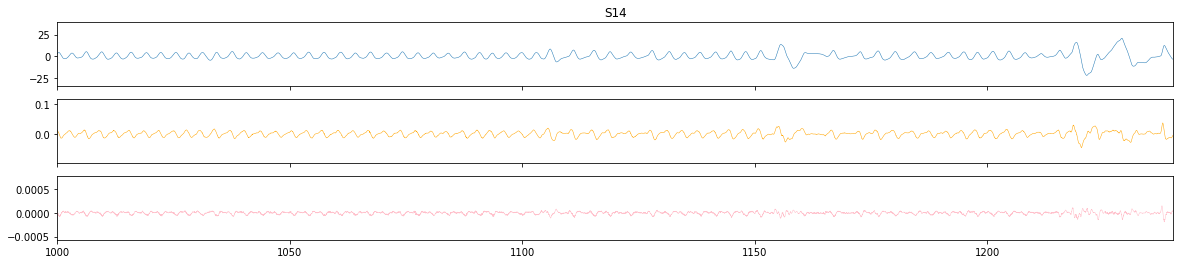

Dictionary from .pkl file has keys: dict_keys(['signal', 'label', 'subject'])
signal  is type: <class 'dict'>  with length: 2
label  is type: <class 'numpy.ndarray'>  with length: 3676400
subject  is type: <class 'str'>  with length: 3


SUBJECT #: S15


LABEL unique values: [0 1 2 3 4 5 6 7]
{'0': 'not defined/transient', '1': 'baseline', '2': 'stress', '3': 'amusement', '4': 'meditation', '5': 'ignore', '6': 'ignore', '7': 'ignore'}


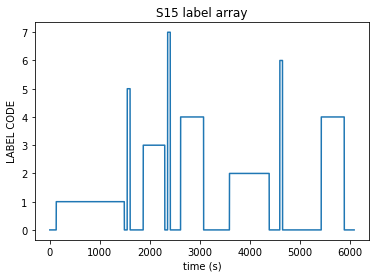



SIGNAL KEYS: dict_keys(['chest', 'wrist'])
chest: <class 'dict'> has keys: dict_keys(['ACC', 'ECG', 'EMG', 'EDA', 'Temp', 'Resp'])
wrist: <class 'dict'> has keys: dict_keys(['ACC', 'BVP', 'EDA', 'TEMP'])

 Chest (RespiBAN) sensor
ACC array has shape: (3676400, 3) at 700 Hz for a total of  5252.0 seconds
ECG array has shape: (3676400, 1) at 700 Hz for a total of  5252.0 seconds
EMG array has shape: (3676400, 1) at 700 Hz for a total of  5252.0 seconds
EDA array has shape: (3676400, 1) at 700 Hz for a total of  5252.0 seconds
Temp array has shape: (3676400, 1) at 700 Hz for a total of  5252.0 seconds
Resp array has shape: (3676400, 1) at 700 Hz for a total of  5252.0 seconds


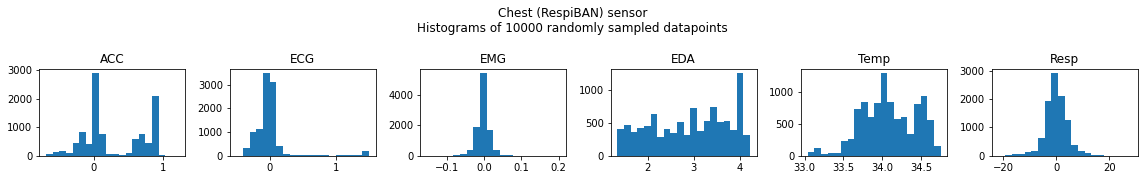


 Wrist (Empatica E4) sensor
ACC array has shape: (168064, 3) at 32 Hz for a total of  5252.0 seconds
BVP array has shape: (336128, 1) at 64 Hz for a total of  5252.0 seconds
EDA array has shape: (21008, 1) at 4 Hz for a total of  5252.0 seconds
TEMP array has shape: (21008, 1) at 4 Hz for a total of  5252.0 seconds


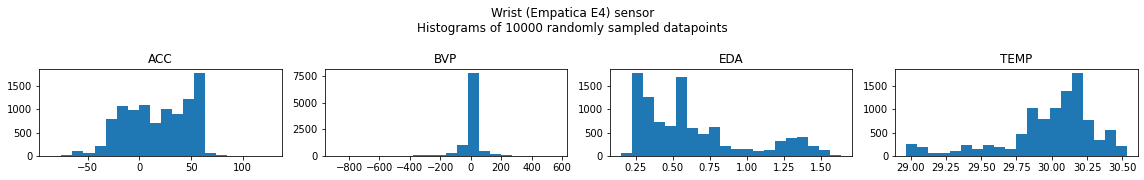


----------------------------------------------------------------------------

Elapsed time: 15.117908716201782
3676400 3676400


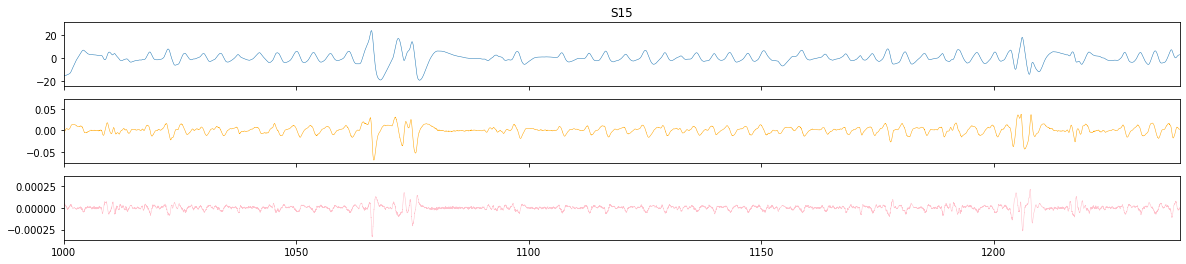

Dictionary from .pkl file has keys: dict_keys(['signal', 'label', 'subject'])
signal  is type: <class 'dict'>  with length: 2
label  is type: <class 'numpy.ndarray'>  with length: 3941700
subject  is type: <class 'str'>  with length: 3


SUBJECT #: S16


LABEL unique values: [0 1 2 3 4 5 6 7]
{'0': 'not defined/transient', '1': 'baseline', '2': 'stress', '3': 'amusement', '4': 'meditation', '5': 'ignore', '6': 'ignore', '7': 'ignore'}


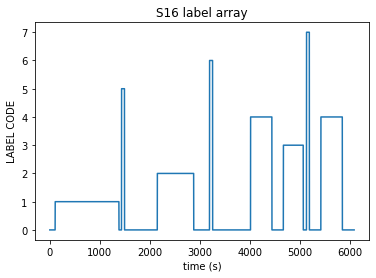



SIGNAL KEYS: dict_keys(['chest', 'wrist'])
chest: <class 'dict'> has keys: dict_keys(['ACC', 'ECG', 'EMG', 'EDA', 'Temp', 'Resp'])
wrist: <class 'dict'> has keys: dict_keys(['ACC', 'BVP', 'EDA', 'TEMP'])

 Chest (RespiBAN) sensor
ACC array has shape: (3941700, 3) at 700 Hz for a total of  5631.0 seconds
ECG array has shape: (3941700, 1) at 700 Hz for a total of  5631.0 seconds
EMG array has shape: (3941700, 1) at 700 Hz for a total of  5631.0 seconds
EDA array has shape: (3941700, 1) at 700 Hz for a total of  5631.0 seconds
Temp array has shape: (3941700, 1) at 700 Hz for a total of  5631.0 seconds
Resp array has shape: (3941700, 1) at 700 Hz for a total of  5631.0 seconds


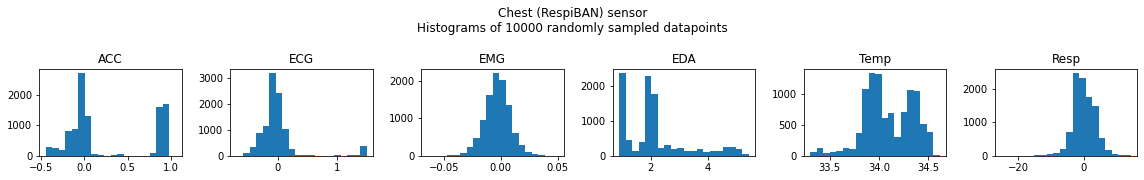


 Wrist (Empatica E4) sensor
ACC array has shape: (180192, 3) at 32 Hz for a total of  5631.0 seconds
BVP array has shape: (360384, 1) at 64 Hz for a total of  5631.0 seconds
EDA array has shape: (22524, 1) at 4 Hz for a total of  5631.0 seconds
TEMP array has shape: (22524, 1) at 4 Hz for a total of  5631.0 seconds


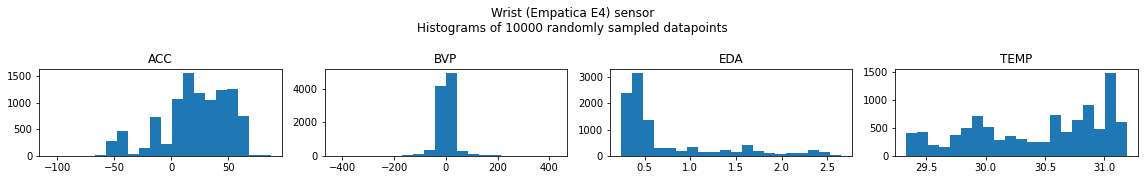


----------------------------------------------------------------------------

Elapsed time: 15.177582502365112
3941700 3941700


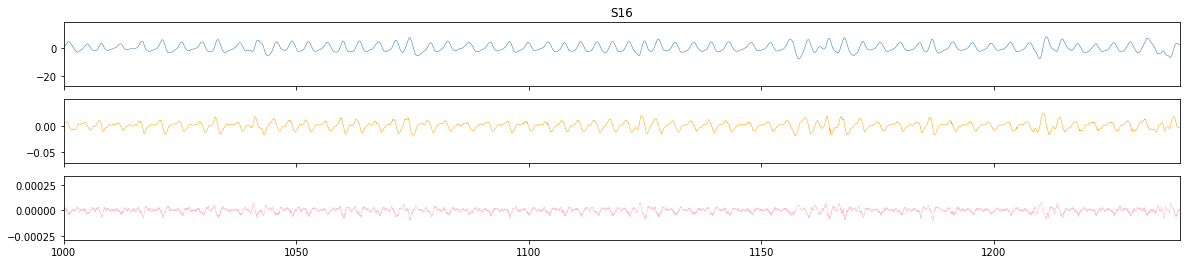

Dictionary from .pkl file has keys: dict_keys(['signal', 'label', 'subject'])
signal  is type: <class 'dict'>  with length: 2
label  is type: <class 'numpy.ndarray'>  with length: 4144000
subject  is type: <class 'str'>  with length: 3


SUBJECT #: S17


LABEL unique values: [0 1 2 3 4 5 6 7]
{'0': 'not defined/transient', '1': 'baseline', '2': 'stress', '3': 'amusement', '4': 'meditation', '5': 'ignore', '6': 'ignore', '7': 'ignore'}


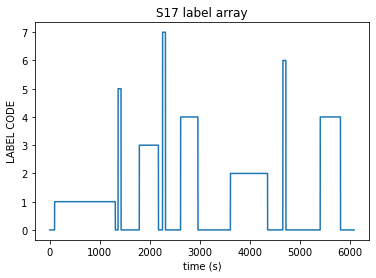



SIGNAL KEYS: dict_keys(['chest', 'wrist'])
chest: <class 'dict'> has keys: dict_keys(['ACC', 'ECG', 'EMG', 'EDA', 'Temp', 'Resp'])
wrist: <class 'dict'> has keys: dict_keys(['ACC', 'BVP', 'EDA', 'TEMP'])

 Chest (RespiBAN) sensor
ACC array has shape: (4144000, 3) at 700 Hz for a total of  5920.0 seconds
ECG array has shape: (4144000, 1) at 700 Hz for a total of  5920.0 seconds
EMG array has shape: (4144000, 1) at 700 Hz for a total of  5920.0 seconds
EDA array has shape: (4144000, 1) at 700 Hz for a total of  5920.0 seconds
Temp array has shape: (4144000, 1) at 700 Hz for a total of  5920.0 seconds
Resp array has shape: (4144000, 1) at 700 Hz for a total of  5920.0 seconds


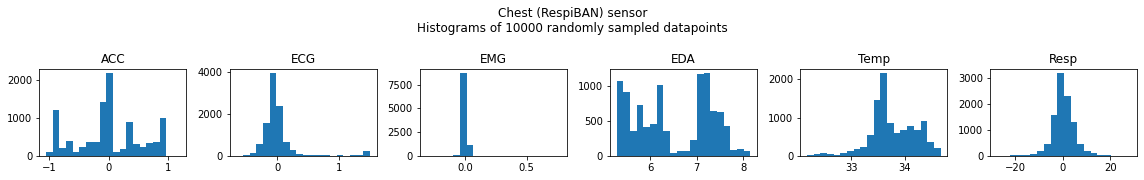


 Wrist (Empatica E4) sensor
ACC array has shape: (189440, 3) at 32 Hz for a total of  5920.0 seconds
BVP array has shape: (378880, 1) at 64 Hz for a total of  5920.0 seconds
EDA array has shape: (23680, 1) at 4 Hz for a total of  5920.0 seconds
TEMP array has shape: (23680, 1) at 4 Hz for a total of  5920.0 seconds


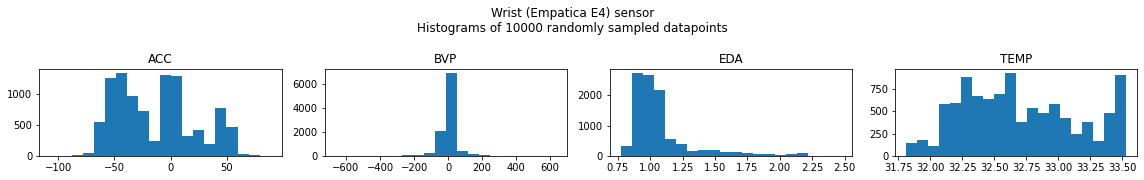


----------------------------------------------------------------------------

Elapsed time: 17.254879236221313
4144000 4144000


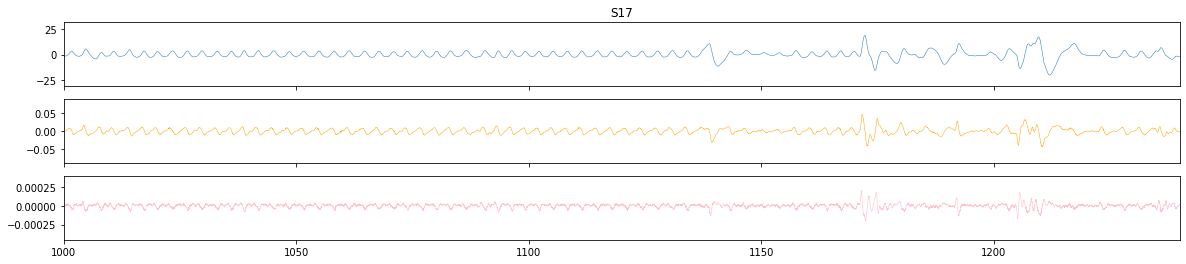

In [277]:
#Respiration
for Subj_ID in pkl_dict.keys():
    #Subj_ID = 'S3'
    t0 = time()
    S_signal = check_pkl_raw(Subj_ID, pkl_dict, return_data=True)
    print('Elapsed time:',time() - t0)

    RESP_y = S_signal['signal']['chest']['Resp'].flatten()
    RESP_x = np.linspace(0, len(RESP_y)/700, len(RESP_y), endpoint=False)
    print(len(RESP_x), len(RESP_y))
    
    RESP_df = pd.DataFrame(dict(time=RESP_x, RESP_y=RESP_y))
    RESP_df = RESP_df.rolling(70).mean().dropna()
    RESP_df['RESP_change'] = RESP_df['RESP_y'].diff().dropna().rolling(70).mean().dropna()
    RESP_df['RESP_2nd_deriv'] = RESP_df['RESP_change'].diff().dropna().rolling(70).mean().dropna()
    RESP_df = RESP_df.dropna()
   
    
    fig, ax = plt.subplots(3,1,sharex=True, figsize=[20,4])
    ax[0].plot(RESP_df['time'], RESP_df['RESP_y'], lw=0.5)
    ax[1].plot(RESP_df['time'], RESP_df['RESP_change'], color='orange', lw=0.5)
    ax[2].plot(RESP_df['time'], RESP_df['RESP_2nd_deriv'], color='pink', lw=0.5)
    ax[0].set_xlim(1000, 1240)
    ax[0].set_title(Subj_ID)
    plt.show()

    RESP_df.to_csv('Respiration100ms_y_Deriv_2ndDeriv_'+Subj_ID+'.csv')

Dictionary from .pkl file has keys: dict_keys(['signal', 'label', 'subject'])
signal  is type: <class 'dict'>  with length: 2
label  is type: <class 'numpy.ndarray'>  with length: 4255300
subject  is type: <class 'str'>  with length: 2


SUBJECT #: S2


LABEL unique values: [0 1 2 3 4 6 7]
{'0': 'not defined/transient', '1': 'baseline', '2': 'stress', '3': 'amusement', '4': 'meditation', '5': 'ignore', '6': 'ignore', '7': 'ignore'}


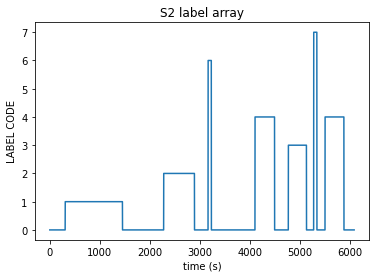



SIGNAL KEYS: dict_keys(['chest', 'wrist'])
chest: <class 'dict'> has keys: dict_keys(['ACC', 'ECG', 'EMG', 'EDA', 'Temp', 'Resp'])
wrist: <class 'dict'> has keys: dict_keys(['ACC', 'BVP', 'EDA', 'TEMP'])

 Chest (RespiBAN) sensor
ACC array has shape: (4255300, 3) at 700 Hz for a total of  6079.0 seconds
ECG array has shape: (4255300, 1) at 700 Hz for a total of  6079.0 seconds
EMG array has shape: (4255300, 1) at 700 Hz for a total of  6079.0 seconds
EDA array has shape: (4255300, 1) at 700 Hz for a total of  6079.0 seconds
Temp array has shape: (4255300, 1) at 700 Hz for a total of  6079.0 seconds
Resp array has shape: (4255300, 1) at 700 Hz for a total of  6079.0 seconds


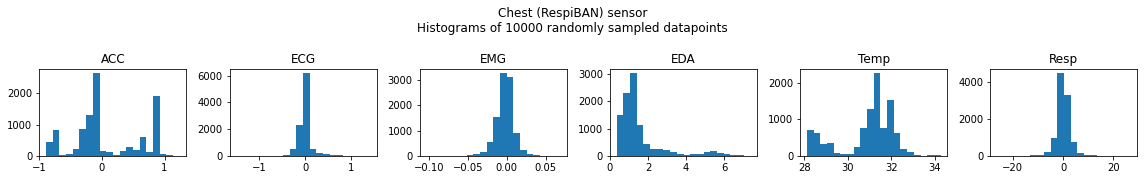


 Wrist (Empatica E4) sensor
ACC array has shape: (194528, 3) at 32 Hz for a total of  6079.0 seconds
BVP array has shape: (389056, 1) at 64 Hz for a total of  6079.0 seconds
EDA array has shape: (24316, 1) at 4 Hz for a total of  6079.0 seconds
TEMP array has shape: (24316, 1) at 4 Hz for a total of  6079.0 seconds


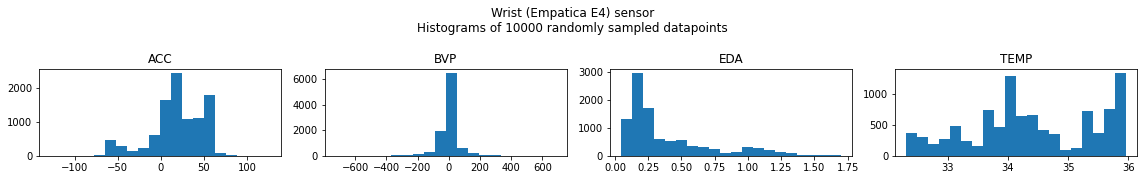


----------------------------------------------------------------------------

Elapsed time: 8.095614194869995
389056 389056


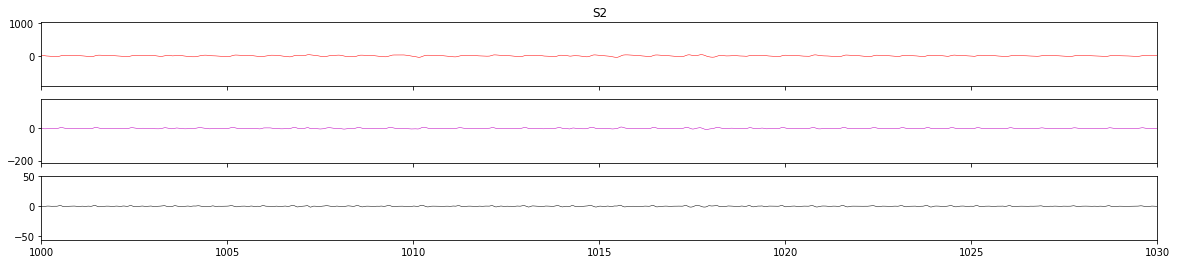

Dictionary from .pkl file has keys: dict_keys(['signal', 'label', 'subject'])
signal  is type: <class 'dict'>  with length: 2
label  is type: <class 'numpy.ndarray'>  with length: 4545100
subject  is type: <class 'str'>  with length: 2


SUBJECT #: S3


LABEL unique values: [0 1 2 3 4 5 6 7]
{'0': 'not defined/transient', '1': 'baseline', '2': 'stress', '3': 'amusement', '4': 'meditation', '5': 'ignore', '6': 'ignore', '7': 'ignore'}


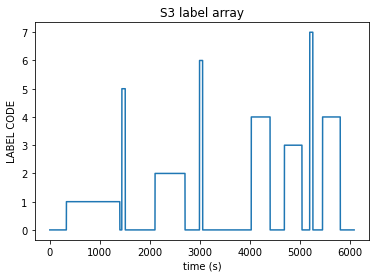



SIGNAL KEYS: dict_keys(['chest', 'wrist'])
chest: <class 'dict'> has keys: dict_keys(['ACC', 'ECG', 'EMG', 'EDA', 'Temp', 'Resp'])
wrist: <class 'dict'> has keys: dict_keys(['ACC', 'BVP', 'EDA', 'TEMP'])

 Chest (RespiBAN) sensor
ACC array has shape: (4545100, 3) at 700 Hz for a total of  6493.0 seconds
ECG array has shape: (4545100, 1) at 700 Hz for a total of  6493.0 seconds
EMG array has shape: (4545100, 1) at 700 Hz for a total of  6493.0 seconds
EDA array has shape: (4545100, 1) at 700 Hz for a total of  6493.0 seconds
Temp array has shape: (4545100, 1) at 700 Hz for a total of  6493.0 seconds
Resp array has shape: (4545100, 1) at 700 Hz for a total of  6493.0 seconds


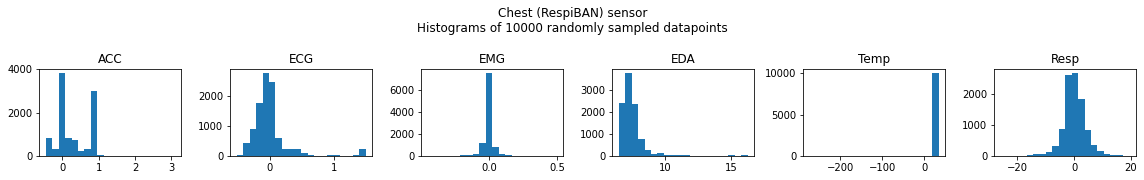


 Wrist (Empatica E4) sensor
ACC array has shape: (207776, 3) at 32 Hz for a total of  6493.0 seconds
BVP array has shape: (415552, 1) at 64 Hz for a total of  6493.0 seconds
EDA array has shape: (25972, 1) at 4 Hz for a total of  6493.0 seconds
TEMP array has shape: (25972, 1) at 4 Hz for a total of  6493.0 seconds


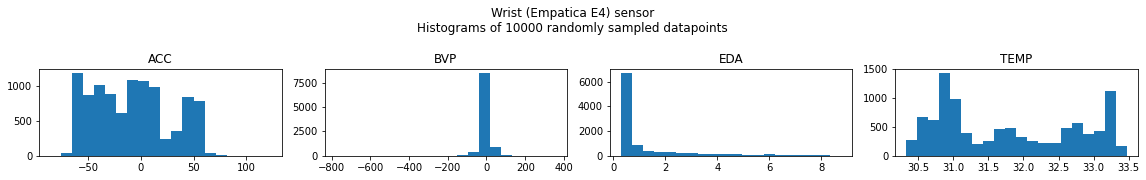


----------------------------------------------------------------------------

Elapsed time: 17.306676864624023
415552 415552


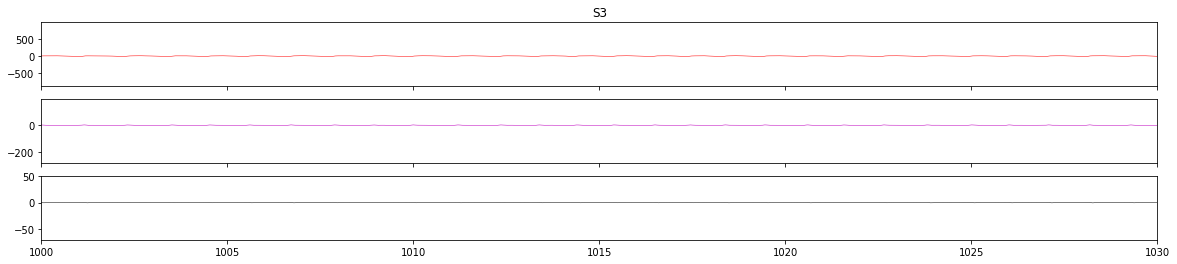

Dictionary from .pkl file has keys: dict_keys(['signal', 'label', 'subject'])
signal  is type: <class 'dict'>  with length: 2
label  is type: <class 'numpy.ndarray'>  with length: 4496100
subject  is type: <class 'str'>  with length: 2


SUBJECT #: S4


LABEL unique values: [0 1 2 3 4 5 6 7]
{'0': 'not defined/transient', '1': 'baseline', '2': 'stress', '3': 'amusement', '4': 'meditation', '5': 'ignore', '6': 'ignore', '7': 'ignore'}


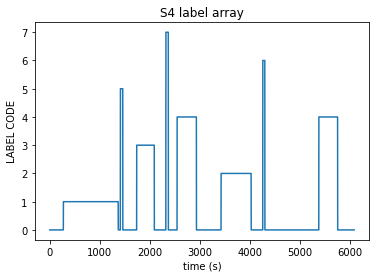



SIGNAL KEYS: dict_keys(['chest', 'wrist'])
chest: <class 'dict'> has keys: dict_keys(['ACC', 'ECG', 'EMG', 'EDA', 'Temp', 'Resp'])
wrist: <class 'dict'> has keys: dict_keys(['ACC', 'BVP', 'EDA', 'TEMP'])

 Chest (RespiBAN) sensor
ACC array has shape: (4496100, 3) at 700 Hz for a total of  6423.0 seconds
ECG array has shape: (4496100, 1) at 700 Hz for a total of  6423.0 seconds
EMG array has shape: (4496100, 1) at 700 Hz for a total of  6423.0 seconds
EDA array has shape: (4496100, 1) at 700 Hz for a total of  6423.0 seconds
Temp array has shape: (4496100, 1) at 700 Hz for a total of  6423.0 seconds
Resp array has shape: (4496100, 1) at 700 Hz for a total of  6423.0 seconds


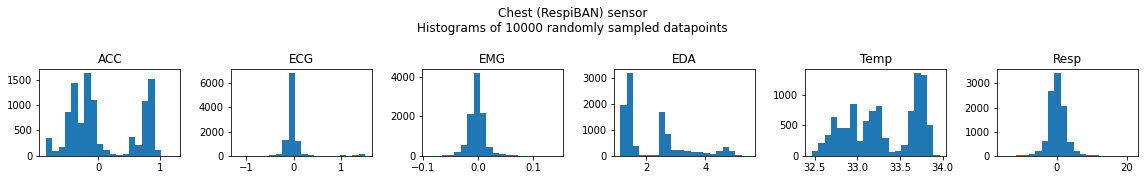


 Wrist (Empatica E4) sensor
ACC array has shape: (205536, 3) at 32 Hz for a total of  6423.0 seconds
BVP array has shape: (411072, 1) at 64 Hz for a total of  6423.0 seconds
EDA array has shape: (25692, 1) at 4 Hz for a total of  6423.0 seconds
TEMP array has shape: (25692, 1) at 4 Hz for a total of  6423.0 seconds


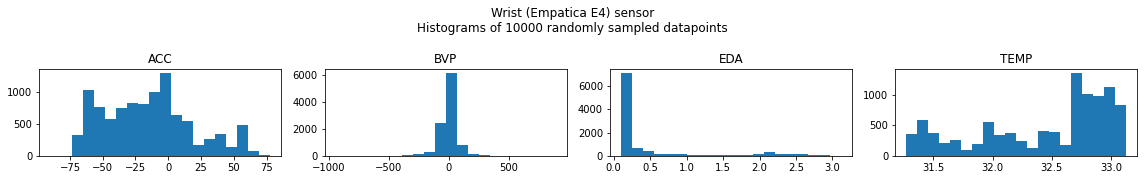


----------------------------------------------------------------------------

Elapsed time: 16.913608074188232
411072 411072


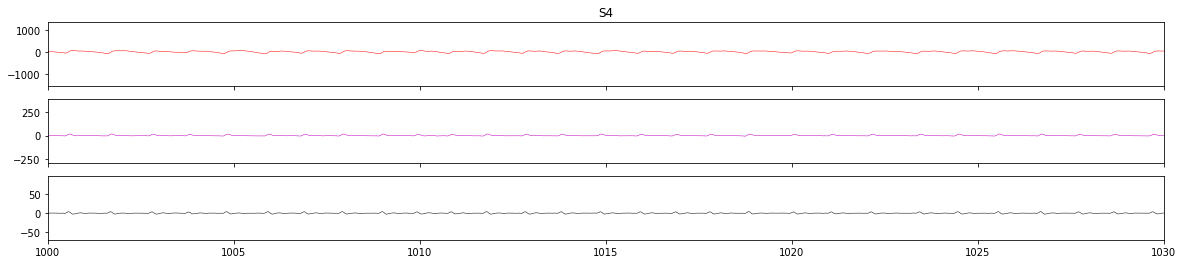

Dictionary from .pkl file has keys: dict_keys(['signal', 'label', 'subject'])
signal  is type: <class 'dict'>  with length: 2
label  is type: <class 'numpy.ndarray'>  with length: 4380600
subject  is type: <class 'str'>  with length: 2


SUBJECT #: S5


LABEL unique values: [0 1 2 3 4 5 6 7]
{'0': 'not defined/transient', '1': 'baseline', '2': 'stress', '3': 'amusement', '4': 'meditation', '5': 'ignore', '6': 'ignore', '7': 'ignore'}


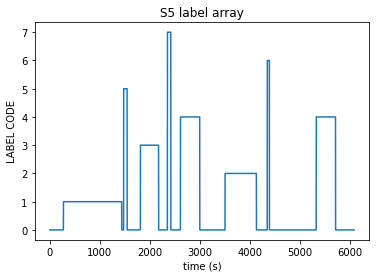



SIGNAL KEYS: dict_keys(['chest', 'wrist'])
chest: <class 'dict'> has keys: dict_keys(['ACC', 'ECG', 'EMG', 'EDA', 'Temp', 'Resp'])
wrist: <class 'dict'> has keys: dict_keys(['ACC', 'BVP', 'EDA', 'TEMP'])

 Chest (RespiBAN) sensor
ACC array has shape: (4380600, 3) at 700 Hz for a total of  6258.0 seconds
ECG array has shape: (4380600, 1) at 700 Hz for a total of  6258.0 seconds
EMG array has shape: (4380600, 1) at 700 Hz for a total of  6258.0 seconds
EDA array has shape: (4380600, 1) at 700 Hz for a total of  6258.0 seconds
Temp array has shape: (4380600, 1) at 700 Hz for a total of  6258.0 seconds
Resp array has shape: (4380600, 1) at 700 Hz for a total of  6258.0 seconds


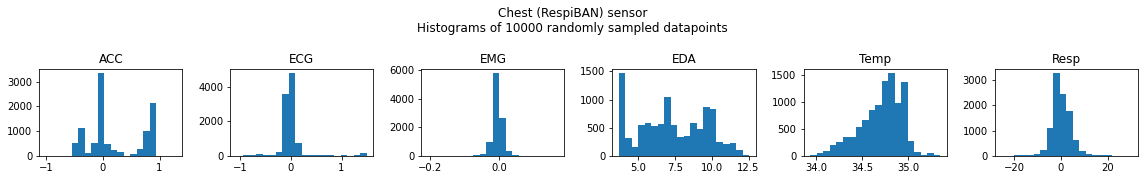


 Wrist (Empatica E4) sensor
ACC array has shape: (200256, 3) at 32 Hz for a total of  6258.0 seconds
BVP array has shape: (400512, 1) at 64 Hz for a total of  6258.0 seconds
EDA array has shape: (25032, 1) at 4 Hz for a total of  6258.0 seconds
TEMP array has shape: (25032, 1) at 4 Hz for a total of  6258.0 seconds


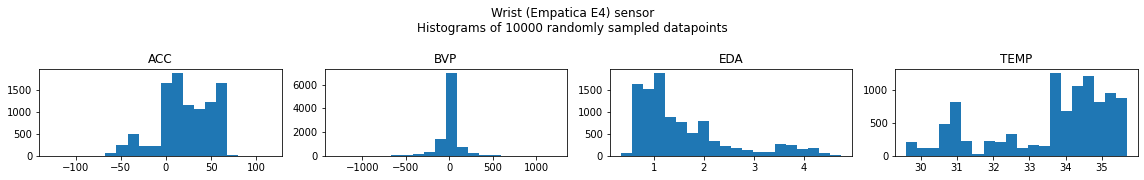


----------------------------------------------------------------------------

Elapsed time: 16.637436866760254
400512 400512


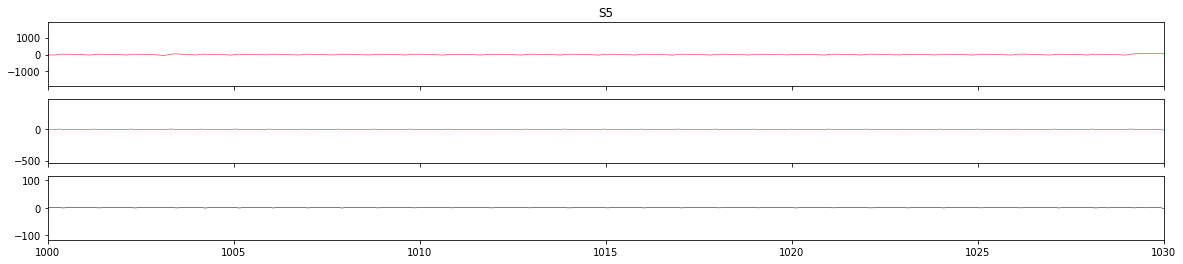

Dictionary from .pkl file has keys: dict_keys(['signal', 'label', 'subject'])
signal  is type: <class 'dict'>  with length: 2
label  is type: <class 'numpy.ndarray'>  with length: 4949700
subject  is type: <class 'str'>  with length: 2


SUBJECT #: S6


LABEL unique values: [0 1 2 3 4 5 6 7]
{'0': 'not defined/transient', '1': 'baseline', '2': 'stress', '3': 'amusement', '4': 'meditation', '5': 'ignore', '6': 'ignore', '7': 'ignore'}


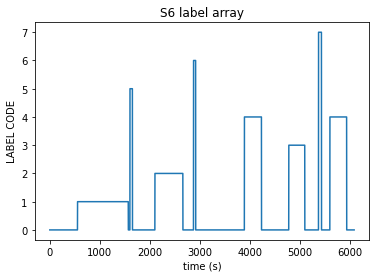



SIGNAL KEYS: dict_keys(['chest', 'wrist'])
chest: <class 'dict'> has keys: dict_keys(['ACC', 'ECG', 'EMG', 'EDA', 'Temp', 'Resp'])
wrist: <class 'dict'> has keys: dict_keys(['ACC', 'BVP', 'EDA', 'TEMP'])

 Chest (RespiBAN) sensor
ACC array has shape: (4949700, 3) at 700 Hz for a total of  7071.0 seconds
ECG array has shape: (4949700, 1) at 700 Hz for a total of  7071.0 seconds
EMG array has shape: (4949700, 1) at 700 Hz for a total of  7071.0 seconds
EDA array has shape: (4949700, 1) at 700 Hz for a total of  7071.0 seconds
Temp array has shape: (4949700, 1) at 700 Hz for a total of  7071.0 seconds
Resp array has shape: (4949700, 1) at 700 Hz for a total of  7071.0 seconds


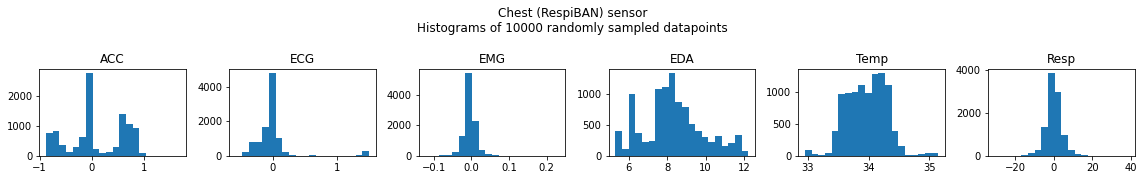


 Wrist (Empatica E4) sensor
ACC array has shape: (226272, 3) at 32 Hz for a total of  7071.0 seconds
BVP array has shape: (452544, 1) at 64 Hz for a total of  7071.0 seconds
EDA array has shape: (28284, 1) at 4 Hz for a total of  7071.0 seconds
TEMP array has shape: (28284, 1) at 4 Hz for a total of  7071.0 seconds


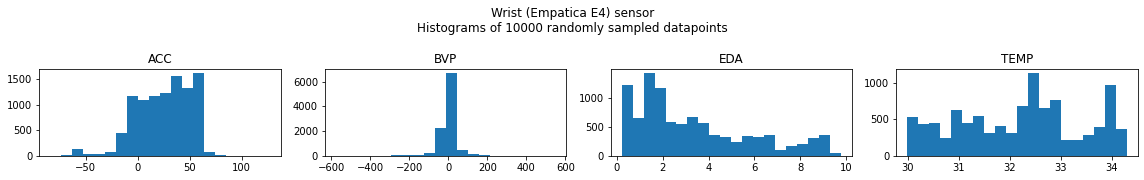


----------------------------------------------------------------------------

Elapsed time: 18.22917890548706
452544 452544


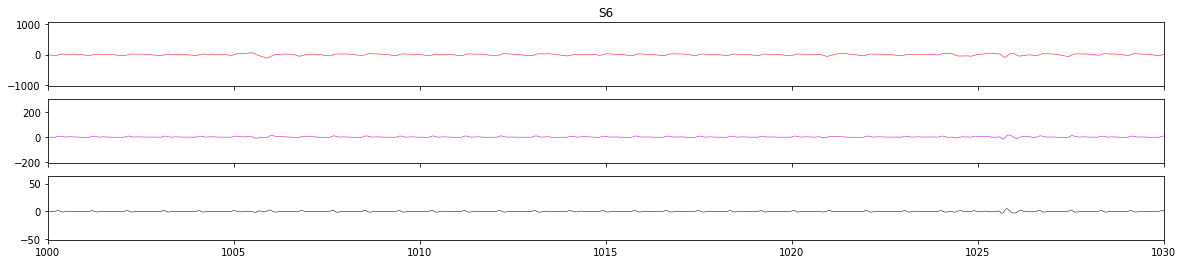

Dictionary from .pkl file has keys: dict_keys(['signal', 'label', 'subject'])
signal  is type: <class 'dict'>  with length: 2
label  is type: <class 'numpy.ndarray'>  with length: 3666600
subject  is type: <class 'str'>  with length: 2


SUBJECT #: S7


LABEL unique values: [0 1 2 3 4 5 6 7]
{'0': 'not defined/transient', '1': 'baseline', '2': 'stress', '3': 'amusement', '4': 'meditation', '5': 'ignore', '6': 'ignore', '7': 'ignore'}


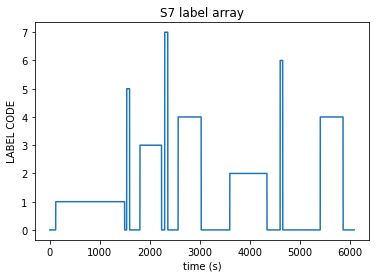



SIGNAL KEYS: dict_keys(['chest', 'wrist'])
chest: <class 'dict'> has keys: dict_keys(['ACC', 'ECG', 'EMG', 'EDA', 'Temp', 'Resp'])
wrist: <class 'dict'> has keys: dict_keys(['ACC', 'BVP', 'EDA', 'TEMP'])

 Chest (RespiBAN) sensor
ACC array has shape: (3666600, 3) at 700 Hz for a total of  5238.0 seconds
ECG array has shape: (3666600, 1) at 700 Hz for a total of  5238.0 seconds
EMG array has shape: (3666600, 1) at 700 Hz for a total of  5238.0 seconds
EDA array has shape: (3666600, 1) at 700 Hz for a total of  5238.0 seconds
Temp array has shape: (3666600, 1) at 700 Hz for a total of  5238.0 seconds
Resp array has shape: (3666600, 1) at 700 Hz for a total of  5238.0 seconds


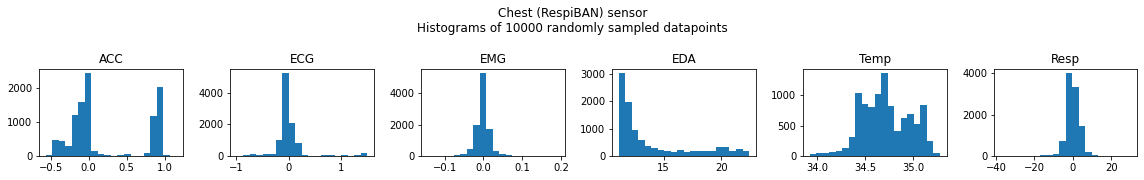


 Wrist (Empatica E4) sensor
ACC array has shape: (167616, 3) at 32 Hz for a total of  5238.0 seconds
BVP array has shape: (335232, 1) at 64 Hz for a total of  5238.0 seconds
EDA array has shape: (20952, 1) at 4 Hz for a total of  5238.0 seconds
TEMP array has shape: (20952, 1) at 4 Hz for a total of  5238.0 seconds


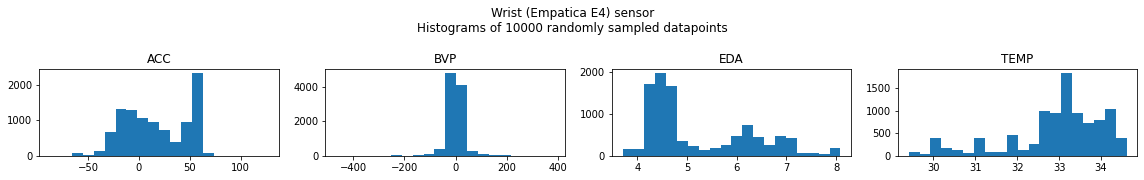


----------------------------------------------------------------------------

Elapsed time: 13.116267681121826
335232 335232


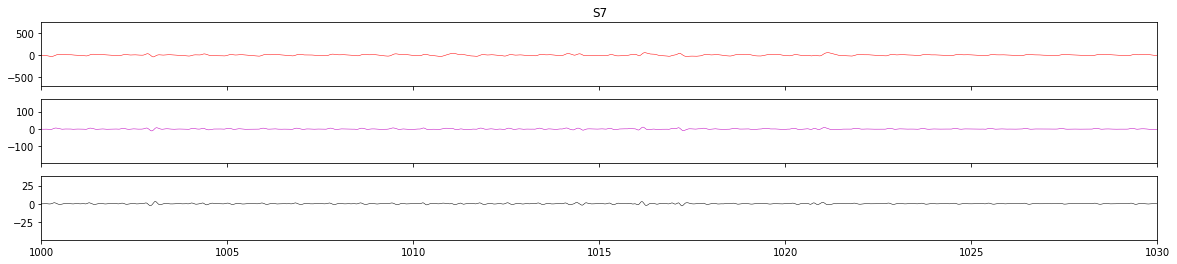

Dictionary from .pkl file has keys: dict_keys(['signal', 'label', 'subject'])
signal  is type: <class 'dict'>  with length: 2
label  is type: <class 'numpy.ndarray'>  with length: 3826200
subject  is type: <class 'str'>  with length: 2


SUBJECT #: S8


LABEL unique values: [0 1 2 3 4 5 6 7]
{'0': 'not defined/transient', '1': 'baseline', '2': 'stress', '3': 'amusement', '4': 'meditation', '5': 'ignore', '6': 'ignore', '7': 'ignore'}


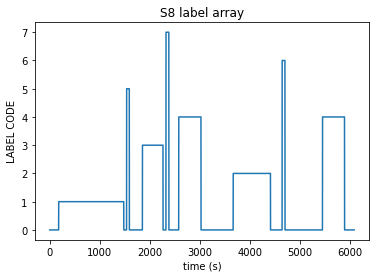



SIGNAL KEYS: dict_keys(['chest', 'wrist'])
chest: <class 'dict'> has keys: dict_keys(['ACC', 'ECG', 'EMG', 'EDA', 'Temp', 'Resp'])
wrist: <class 'dict'> has keys: dict_keys(['ACC', 'BVP', 'EDA', 'TEMP'])

 Chest (RespiBAN) sensor
ACC array has shape: (3826200, 3) at 700 Hz for a total of  5466.0 seconds
ECG array has shape: (3826200, 1) at 700 Hz for a total of  5466.0 seconds
EMG array has shape: (3826200, 1) at 700 Hz for a total of  5466.0 seconds
EDA array has shape: (3826200, 1) at 700 Hz for a total of  5466.0 seconds
Temp array has shape: (3826200, 1) at 700 Hz for a total of  5466.0 seconds
Resp array has shape: (3826200, 1) at 700 Hz for a total of  5466.0 seconds


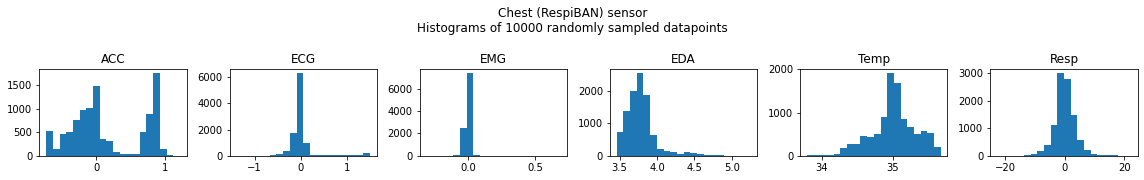


 Wrist (Empatica E4) sensor
ACC array has shape: (174912, 3) at 32 Hz for a total of  5466.0 seconds
BVP array has shape: (349824, 1) at 64 Hz for a total of  5466.0 seconds
EDA array has shape: (21864, 1) at 4 Hz for a total of  5466.0 seconds
TEMP array has shape: (21864, 1) at 4 Hz for a total of  5466.0 seconds


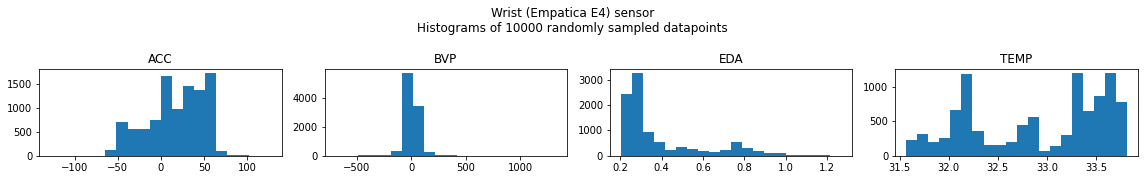


----------------------------------------------------------------------------

Elapsed time: 14.860137224197388
349824 349824


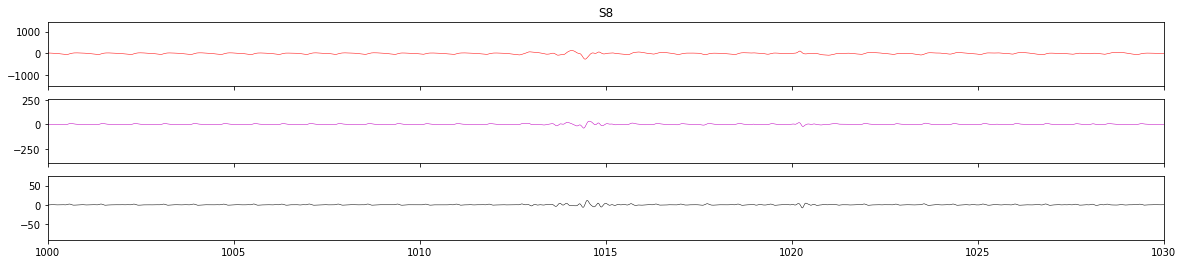

Dictionary from .pkl file has keys: dict_keys(['signal', 'label', 'subject'])
signal  is type: <class 'dict'>  with length: 2
label  is type: <class 'numpy.ndarray'>  with length: 3656100
subject  is type: <class 'str'>  with length: 2


SUBJECT #: S9


LABEL unique values: [0 1 2 3 4 5 6 7]
{'0': 'not defined/transient', '1': 'baseline', '2': 'stress', '3': 'amusement', '4': 'meditation', '5': 'ignore', '6': 'ignore', '7': 'ignore'}


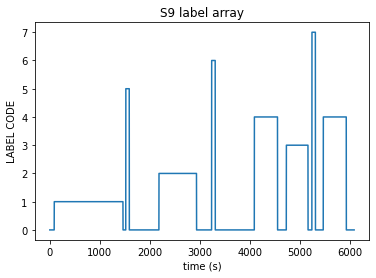



SIGNAL KEYS: dict_keys(['chest', 'wrist'])
chest: <class 'dict'> has keys: dict_keys(['ACC', 'ECG', 'EMG', 'EDA', 'Temp', 'Resp'])
wrist: <class 'dict'> has keys: dict_keys(['ACC', 'BVP', 'EDA', 'TEMP'])

 Chest (RespiBAN) sensor
ACC array has shape: (3656100, 3) at 700 Hz for a total of  5223.0 seconds
ECG array has shape: (3656100, 1) at 700 Hz for a total of  5223.0 seconds
EMG array has shape: (3656100, 1) at 700 Hz for a total of  5223.0 seconds
EDA array has shape: (3656100, 1) at 700 Hz for a total of  5223.0 seconds
Temp array has shape: (3656100, 1) at 700 Hz for a total of  5223.0 seconds
Resp array has shape: (3656100, 1) at 700 Hz for a total of  5223.0 seconds


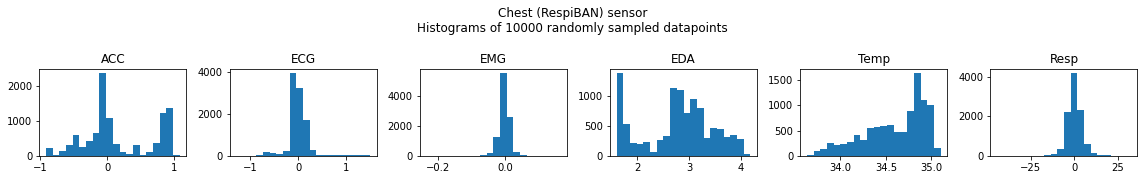


 Wrist (Empatica E4) sensor
ACC array has shape: (167136, 3) at 32 Hz for a total of  5223.0 seconds
BVP array has shape: (334272, 1) at 64 Hz for a total of  5223.0 seconds
EDA array has shape: (20892, 1) at 4 Hz for a total of  5223.0 seconds
TEMP array has shape: (20892, 1) at 4 Hz for a total of  5223.0 seconds


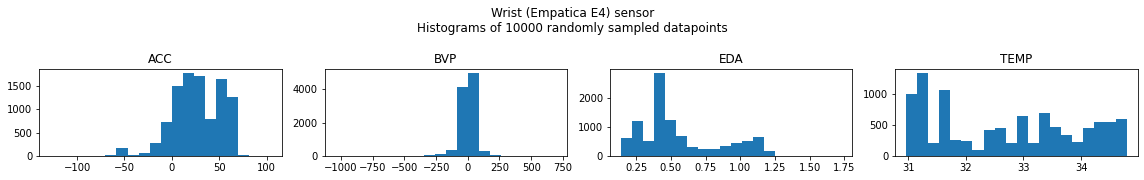


----------------------------------------------------------------------------

Elapsed time: 14.358770608901978
334272 334272


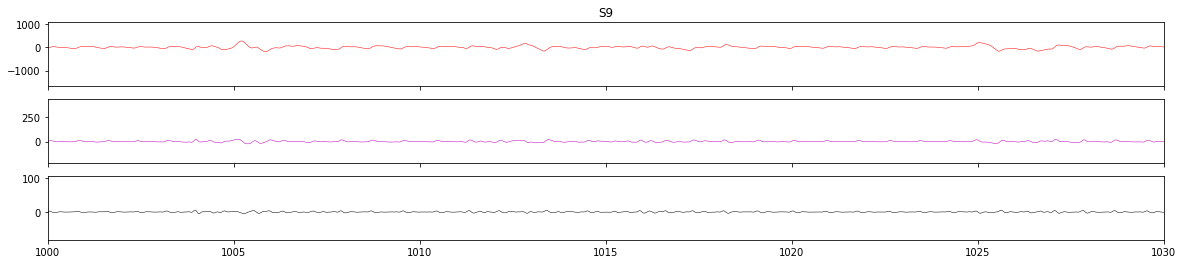

Dictionary from .pkl file has keys: dict_keys(['signal', 'label', 'subject'])
signal  is type: <class 'dict'>  with length: 2
label  is type: <class 'numpy.ndarray'>  with length: 3847200
subject  is type: <class 'str'>  with length: 3


SUBJECT #: S10


LABEL unique values: [0 1 2 3 4 5 6 7]
{'0': 'not defined/transient', '1': 'baseline', '2': 'stress', '3': 'amusement', '4': 'meditation', '5': 'ignore', '6': 'ignore', '7': 'ignore'}


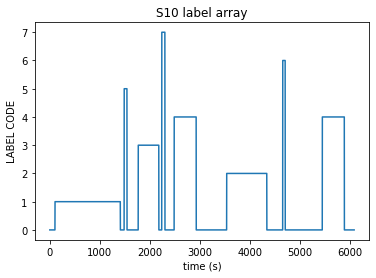



SIGNAL KEYS: dict_keys(['chest', 'wrist'])
chest: <class 'dict'> has keys: dict_keys(['ACC', 'ECG', 'EMG', 'EDA', 'Temp', 'Resp'])
wrist: <class 'dict'> has keys: dict_keys(['ACC', 'BVP', 'EDA', 'TEMP'])

 Chest (RespiBAN) sensor
ACC array has shape: (3847200, 3) at 700 Hz for a total of  5496.0 seconds
ECG array has shape: (3847200, 1) at 700 Hz for a total of  5496.0 seconds
EMG array has shape: (3847200, 1) at 700 Hz for a total of  5496.0 seconds
EDA array has shape: (3847200, 1) at 700 Hz for a total of  5496.0 seconds
Temp array has shape: (3847200, 1) at 700 Hz for a total of  5496.0 seconds
Resp array has shape: (3847200, 1) at 700 Hz for a total of  5496.0 seconds


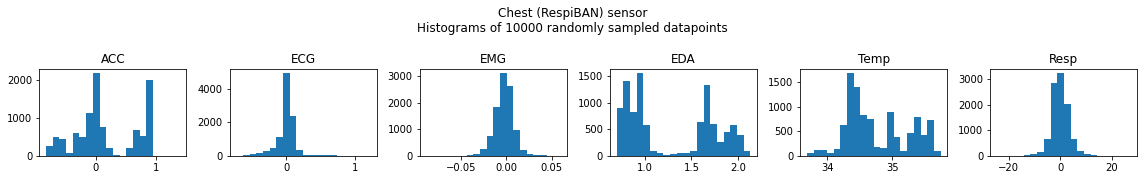


 Wrist (Empatica E4) sensor
ACC array has shape: (175872, 3) at 32 Hz for a total of  5496.0 seconds
BVP array has shape: (351744, 1) at 64 Hz for a total of  5496.0 seconds
EDA array has shape: (21984, 1) at 4 Hz for a total of  5496.0 seconds
TEMP array has shape: (21984, 1) at 4 Hz for a total of  5496.0 seconds


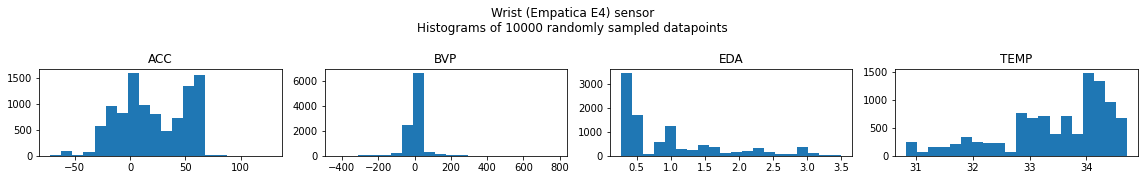


----------------------------------------------------------------------------

Elapsed time: 13.138697147369385
351744 351744


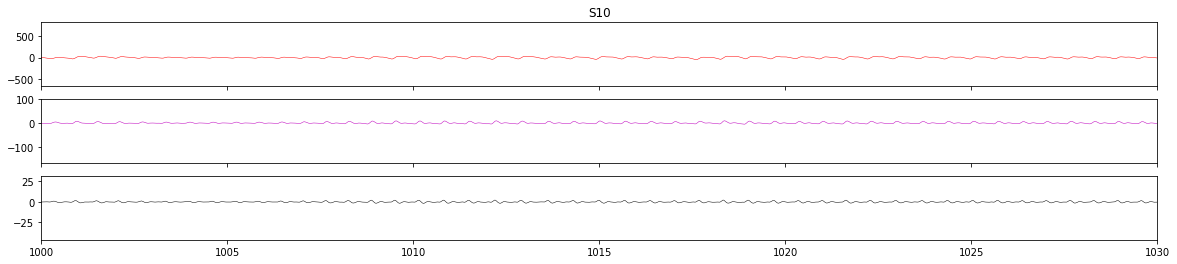

Dictionary from .pkl file has keys: dict_keys(['signal', 'label', 'subject'])
signal  is type: <class 'dict'>  with length: 2
label  is type: <class 'numpy.ndarray'>  with length: 3663100
subject  is type: <class 'str'>  with length: 3


SUBJECT #: S11


LABEL unique values: [0 1 2 3 4 5 6 7]
{'0': 'not defined/transient', '1': 'baseline', '2': 'stress', '3': 'amusement', '4': 'meditation', '5': 'ignore', '6': 'ignore', '7': 'ignore'}


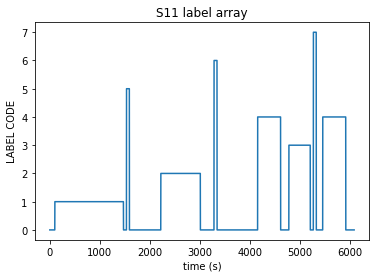



SIGNAL KEYS: dict_keys(['chest', 'wrist'])
chest: <class 'dict'> has keys: dict_keys(['ACC', 'ECG', 'EMG', 'EDA', 'Temp', 'Resp'])
wrist: <class 'dict'> has keys: dict_keys(['ACC', 'BVP', 'EDA', 'TEMP'])

 Chest (RespiBAN) sensor
ACC array has shape: (3663100, 3) at 700 Hz for a total of  5233.0 seconds
ECG array has shape: (3663100, 1) at 700 Hz for a total of  5233.0 seconds
EMG array has shape: (3663100, 1) at 700 Hz for a total of  5233.0 seconds
EDA array has shape: (3663100, 1) at 700 Hz for a total of  5233.0 seconds
Temp array has shape: (3663100, 1) at 700 Hz for a total of  5233.0 seconds
Resp array has shape: (3663100, 1) at 700 Hz for a total of  5233.0 seconds


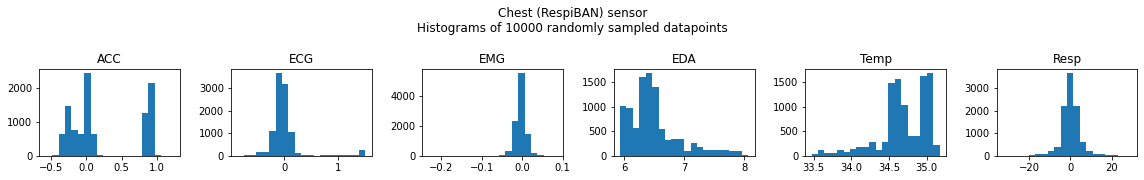


 Wrist (Empatica E4) sensor
ACC array has shape: (167456, 3) at 32 Hz for a total of  5233.0 seconds
BVP array has shape: (334912, 1) at 64 Hz for a total of  5233.0 seconds
EDA array has shape: (20932, 1) at 4 Hz for a total of  5233.0 seconds
TEMP array has shape: (20932, 1) at 4 Hz for a total of  5233.0 seconds


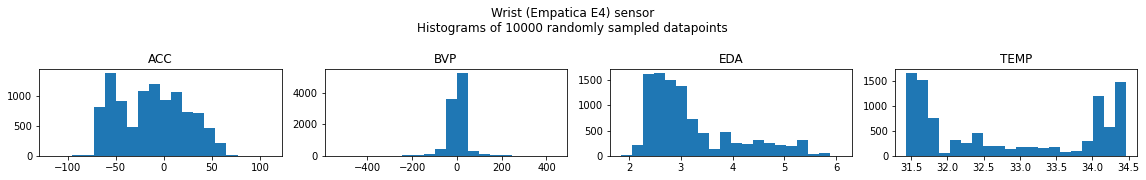


----------------------------------------------------------------------------

Elapsed time: 13.082435369491577
334912 334912


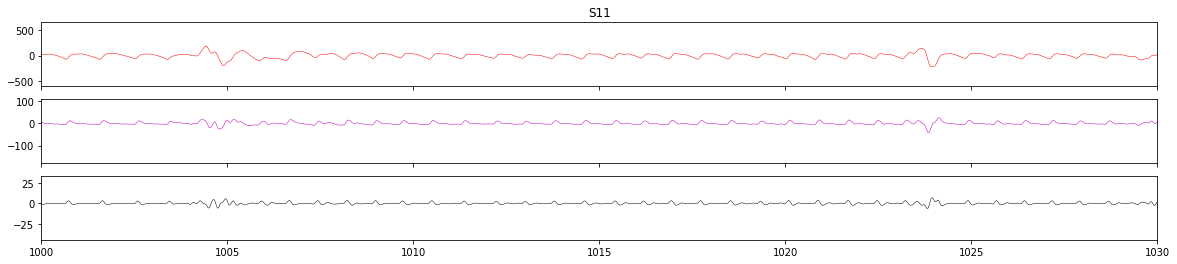

Dictionary from .pkl file has keys: dict_keys(['signal', 'label', 'subject'])
signal  is type: <class 'dict'>  with length: 2
label  is type: <class 'numpy.ndarray'>  with length: 3875900
subject  is type: <class 'str'>  with length: 3


SUBJECT #: S13


LABEL unique values: [0 1 2 3 4 5 6 7]
{'0': 'not defined/transient', '1': 'baseline', '2': 'stress', '3': 'amusement', '4': 'meditation', '5': 'ignore', '6': 'ignore', '7': 'ignore'}


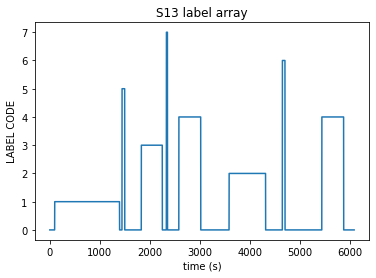



SIGNAL KEYS: dict_keys(['chest', 'wrist'])
chest: <class 'dict'> has keys: dict_keys(['ACC', 'ECG', 'EMG', 'EDA', 'Temp', 'Resp'])
wrist: <class 'dict'> has keys: dict_keys(['ACC', 'BVP', 'EDA', 'TEMP'])

 Chest (RespiBAN) sensor
ACC array has shape: (3875900, 3) at 700 Hz for a total of  5537.0 seconds
ECG array has shape: (3875900, 1) at 700 Hz for a total of  5537.0 seconds
EMG array has shape: (3875900, 1) at 700 Hz for a total of  5537.0 seconds
EDA array has shape: (3875900, 1) at 700 Hz for a total of  5537.0 seconds
Temp array has shape: (3875900, 1) at 700 Hz for a total of  5537.0 seconds
Resp array has shape: (3875900, 1) at 700 Hz for a total of  5537.0 seconds


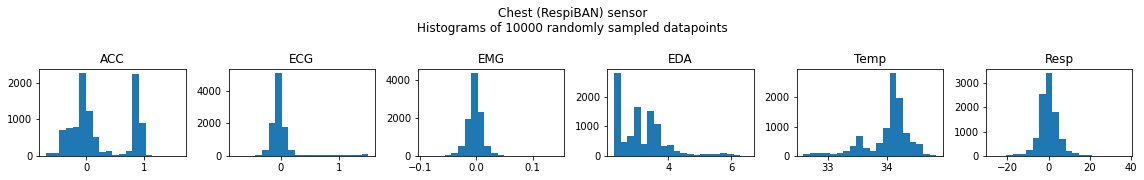


 Wrist (Empatica E4) sensor
ACC array has shape: (177184, 3) at 32 Hz for a total of  5537.0 seconds
BVP array has shape: (354368, 1) at 64 Hz for a total of  5537.0 seconds
EDA array has shape: (22148, 1) at 4 Hz for a total of  5537.0 seconds
TEMP array has shape: (22148, 1) at 4 Hz for a total of  5537.0 seconds


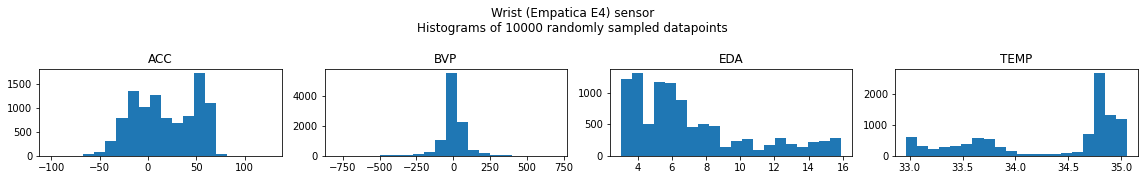


----------------------------------------------------------------------------

Elapsed time: 13.49470329284668
354368 354368


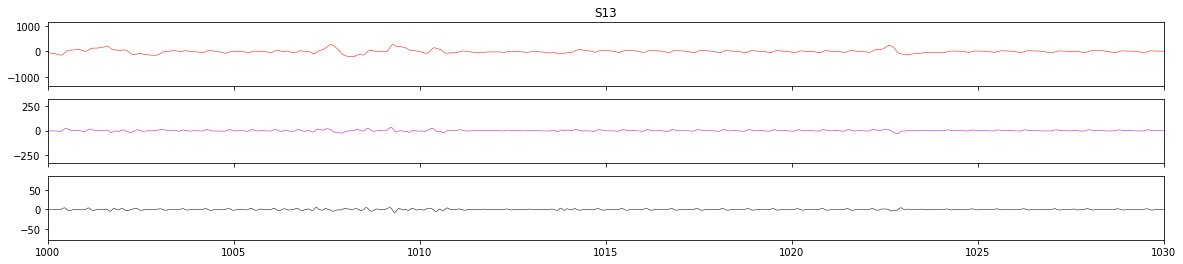

Dictionary from .pkl file has keys: dict_keys(['signal', 'label', 'subject'])
signal  is type: <class 'dict'>  with length: 2
label  is type: <class 'numpy.ndarray'>  with length: 3883600
subject  is type: <class 'str'>  with length: 3


SUBJECT #: S14


LABEL unique values: [0 1 2 3 4 5 6 7]
{'0': 'not defined/transient', '1': 'baseline', '2': 'stress', '3': 'amusement', '4': 'meditation', '5': 'ignore', '6': 'ignore', '7': 'ignore'}


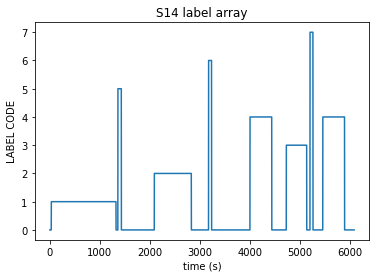



SIGNAL KEYS: dict_keys(['chest', 'wrist'])
chest: <class 'dict'> has keys: dict_keys(['ACC', 'ECG', 'EMG', 'EDA', 'Temp', 'Resp'])
wrist: <class 'dict'> has keys: dict_keys(['ACC', 'BVP', 'EDA', 'TEMP'])

 Chest (RespiBAN) sensor
ACC array has shape: (3883600, 3) at 700 Hz for a total of  5548.0 seconds
ECG array has shape: (3883600, 1) at 700 Hz for a total of  5548.0 seconds
EMG array has shape: (3883600, 1) at 700 Hz for a total of  5548.0 seconds
EDA array has shape: (3883600, 1) at 700 Hz for a total of  5548.0 seconds
Temp array has shape: (3883600, 1) at 700 Hz for a total of  5548.0 seconds
Resp array has shape: (3883600, 1) at 700 Hz for a total of  5548.0 seconds


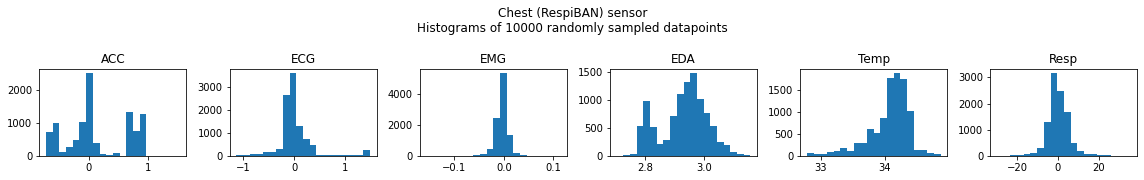


 Wrist (Empatica E4) sensor
ACC array has shape: (177536, 3) at 32 Hz for a total of  5548.0 seconds
BVP array has shape: (355072, 1) at 64 Hz for a total of  5548.0 seconds
EDA array has shape: (22192, 1) at 4 Hz for a total of  5548.0 seconds
TEMP array has shape: (22192, 1) at 4 Hz for a total of  5548.0 seconds


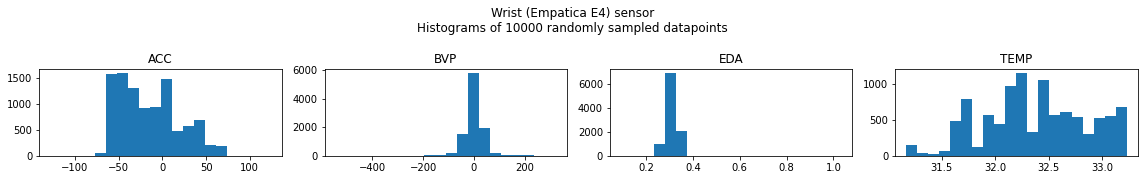


----------------------------------------------------------------------------

Elapsed time: 14.434113264083862
355072 355072


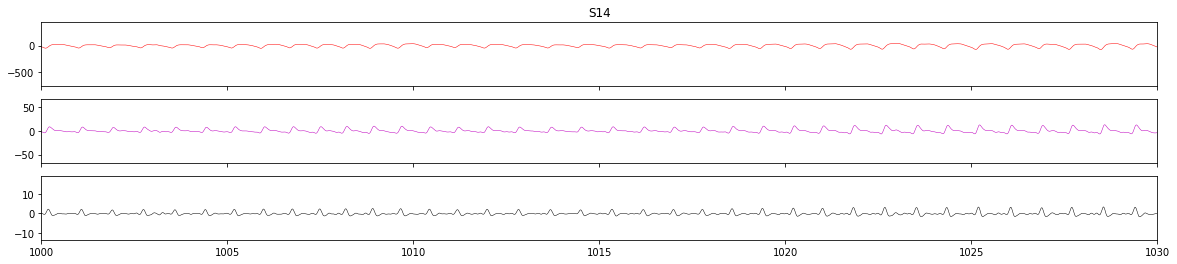

Dictionary from .pkl file has keys: dict_keys(['signal', 'label', 'subject'])
signal  is type: <class 'dict'>  with length: 2
label  is type: <class 'numpy.ndarray'>  with length: 3676400
subject  is type: <class 'str'>  with length: 3


SUBJECT #: S15


LABEL unique values: [0 1 2 3 4 5 6 7]
{'0': 'not defined/transient', '1': 'baseline', '2': 'stress', '3': 'amusement', '4': 'meditation', '5': 'ignore', '6': 'ignore', '7': 'ignore'}


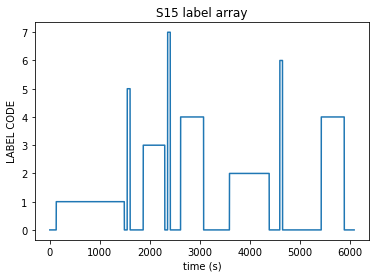



SIGNAL KEYS: dict_keys(['chest', 'wrist'])
chest: <class 'dict'> has keys: dict_keys(['ACC', 'ECG', 'EMG', 'EDA', 'Temp', 'Resp'])
wrist: <class 'dict'> has keys: dict_keys(['ACC', 'BVP', 'EDA', 'TEMP'])

 Chest (RespiBAN) sensor
ACC array has shape: (3676400, 3) at 700 Hz for a total of  5252.0 seconds
ECG array has shape: (3676400, 1) at 700 Hz for a total of  5252.0 seconds
EMG array has shape: (3676400, 1) at 700 Hz for a total of  5252.0 seconds
EDA array has shape: (3676400, 1) at 700 Hz for a total of  5252.0 seconds
Temp array has shape: (3676400, 1) at 700 Hz for a total of  5252.0 seconds
Resp array has shape: (3676400, 1) at 700 Hz for a total of  5252.0 seconds


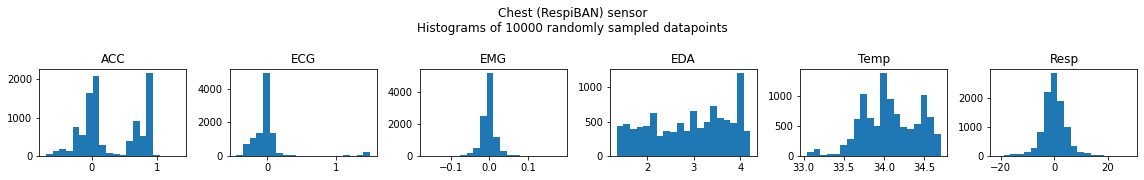


 Wrist (Empatica E4) sensor
ACC array has shape: (168064, 3) at 32 Hz for a total of  5252.0 seconds
BVP array has shape: (336128, 1) at 64 Hz for a total of  5252.0 seconds
EDA array has shape: (21008, 1) at 4 Hz for a total of  5252.0 seconds
TEMP array has shape: (21008, 1) at 4 Hz for a total of  5252.0 seconds


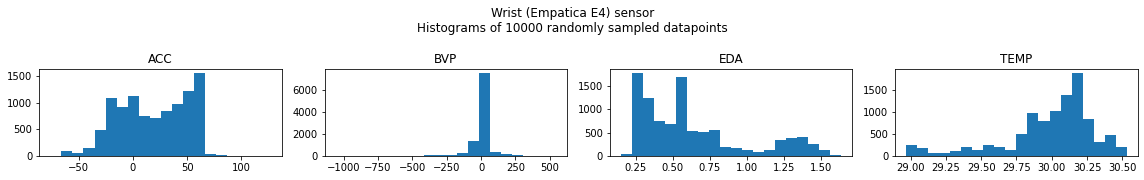


----------------------------------------------------------------------------

Elapsed time: 13.974404335021973
336128 336128


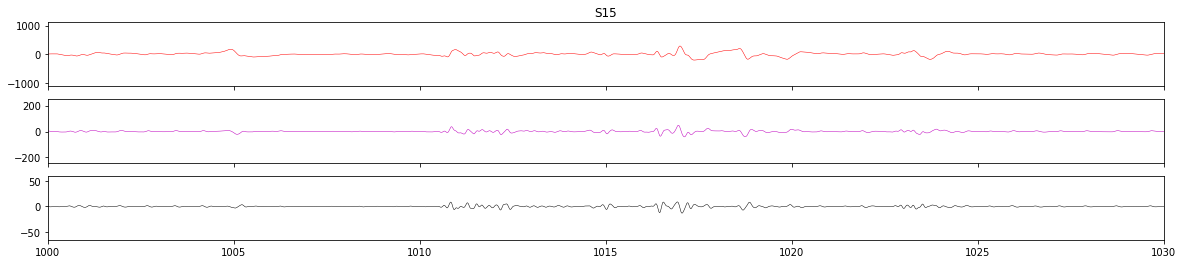

Dictionary from .pkl file has keys: dict_keys(['signal', 'label', 'subject'])
signal  is type: <class 'dict'>  with length: 2
label  is type: <class 'numpy.ndarray'>  with length: 3941700
subject  is type: <class 'str'>  with length: 3


SUBJECT #: S16


LABEL unique values: [0 1 2 3 4 5 6 7]
{'0': 'not defined/transient', '1': 'baseline', '2': 'stress', '3': 'amusement', '4': 'meditation', '5': 'ignore', '6': 'ignore', '7': 'ignore'}


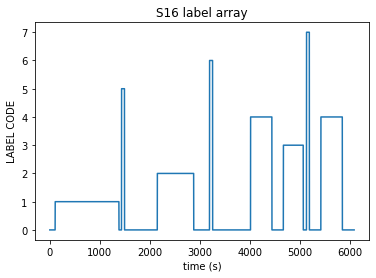



SIGNAL KEYS: dict_keys(['chest', 'wrist'])
chest: <class 'dict'> has keys: dict_keys(['ACC', 'ECG', 'EMG', 'EDA', 'Temp', 'Resp'])
wrist: <class 'dict'> has keys: dict_keys(['ACC', 'BVP', 'EDA', 'TEMP'])

 Chest (RespiBAN) sensor
ACC array has shape: (3941700, 3) at 700 Hz for a total of  5631.0 seconds
ECG array has shape: (3941700, 1) at 700 Hz for a total of  5631.0 seconds
EMG array has shape: (3941700, 1) at 700 Hz for a total of  5631.0 seconds
EDA array has shape: (3941700, 1) at 700 Hz for a total of  5631.0 seconds
Temp array has shape: (3941700, 1) at 700 Hz for a total of  5631.0 seconds
Resp array has shape: (3941700, 1) at 700 Hz for a total of  5631.0 seconds


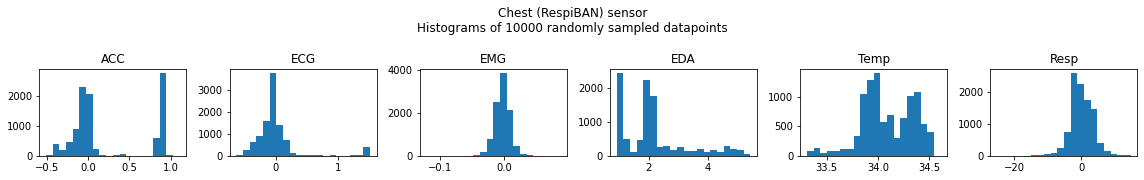


 Wrist (Empatica E4) sensor
ACC array has shape: (180192, 3) at 32 Hz for a total of  5631.0 seconds
BVP array has shape: (360384, 1) at 64 Hz for a total of  5631.0 seconds
EDA array has shape: (22524, 1) at 4 Hz for a total of  5631.0 seconds
TEMP array has shape: (22524, 1) at 4 Hz for a total of  5631.0 seconds


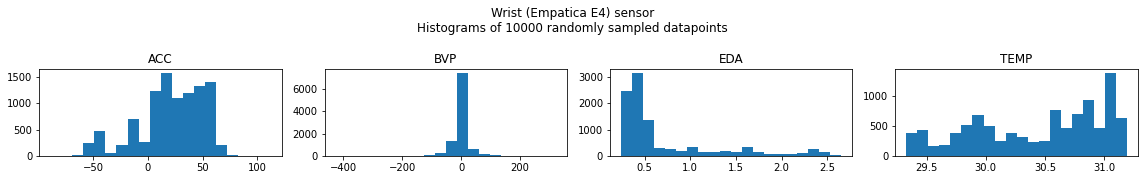


----------------------------------------------------------------------------

Elapsed time: 15.125318050384521
360384 360384


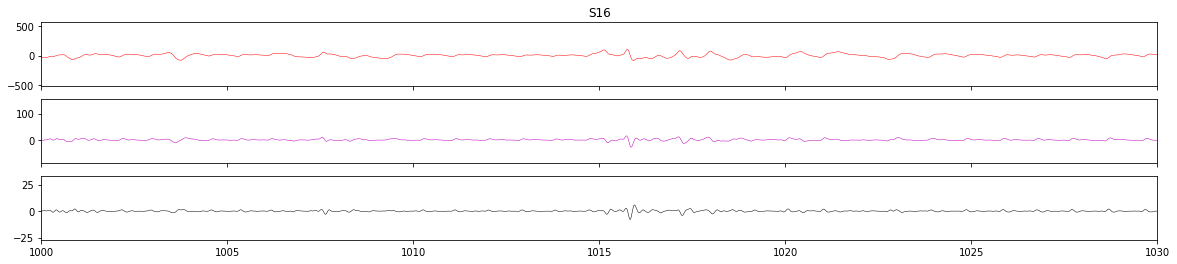

Dictionary from .pkl file has keys: dict_keys(['signal', 'label', 'subject'])
signal  is type: <class 'dict'>  with length: 2
label  is type: <class 'numpy.ndarray'>  with length: 4144000
subject  is type: <class 'str'>  with length: 3


SUBJECT #: S17


LABEL unique values: [0 1 2 3 4 5 6 7]
{'0': 'not defined/transient', '1': 'baseline', '2': 'stress', '3': 'amusement', '4': 'meditation', '5': 'ignore', '6': 'ignore', '7': 'ignore'}


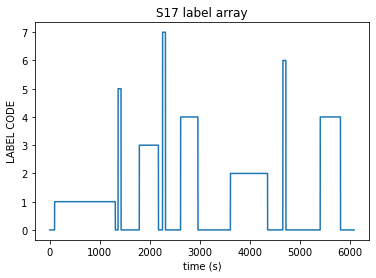



SIGNAL KEYS: dict_keys(['chest', 'wrist'])
chest: <class 'dict'> has keys: dict_keys(['ACC', 'ECG', 'EMG', 'EDA', 'Temp', 'Resp'])
wrist: <class 'dict'> has keys: dict_keys(['ACC', 'BVP', 'EDA', 'TEMP'])

 Chest (RespiBAN) sensor
ACC array has shape: (4144000, 3) at 700 Hz for a total of  5920.0 seconds
ECG array has shape: (4144000, 1) at 700 Hz for a total of  5920.0 seconds
EMG array has shape: (4144000, 1) at 700 Hz for a total of  5920.0 seconds
EDA array has shape: (4144000, 1) at 700 Hz for a total of  5920.0 seconds
Temp array has shape: (4144000, 1) at 700 Hz for a total of  5920.0 seconds
Resp array has shape: (4144000, 1) at 700 Hz for a total of  5920.0 seconds


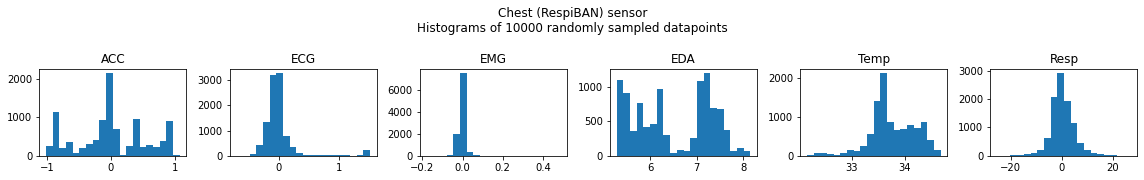


 Wrist (Empatica E4) sensor
ACC array has shape: (189440, 3) at 32 Hz for a total of  5920.0 seconds
BVP array has shape: (378880, 1) at 64 Hz for a total of  5920.0 seconds
EDA array has shape: (23680, 1) at 4 Hz for a total of  5920.0 seconds
TEMP array has shape: (23680, 1) at 4 Hz for a total of  5920.0 seconds


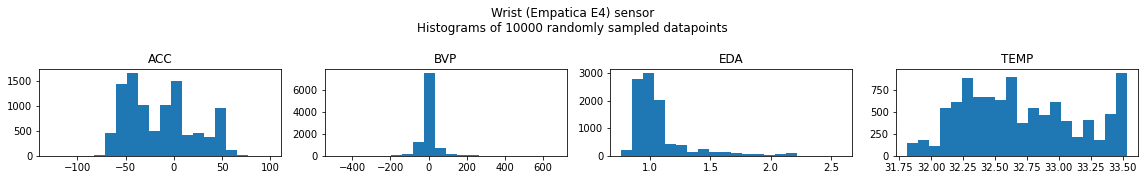


----------------------------------------------------------------------------

Elapsed time: 16.740140676498413
378880 378880


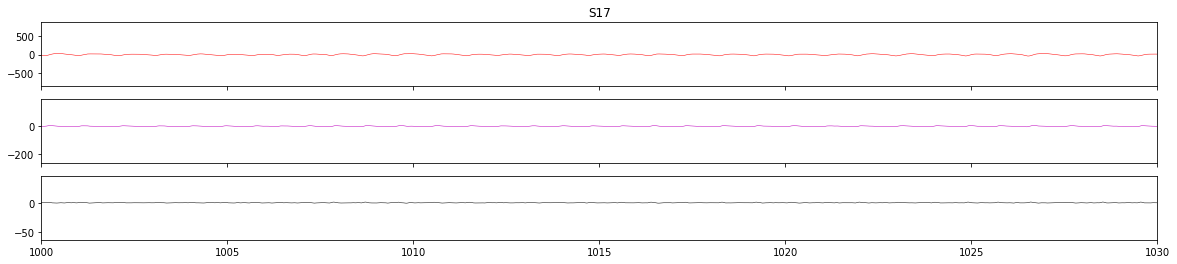

In [280]:
#BVP
for Subj_ID in pkl_dict.keys():
    #Subj_ID = 'S3'
    t0 = time()
    S_signal = check_pkl_raw(Subj_ID, pkl_dict, return_data=True)
    print('Elapsed time:',time() - t0)

    BVP_y = S_signal['signal']['wrist']['BVP'].flatten()
    BVP_x = np.linspace(0, len(BVP_y)/64, len(BVP_y), endpoint=False)
    print(len(BVP_x), len(BVP_y))
    
    BVP_df = pd.DataFrame(dict(time=BVP_x, BVP_y=BVP_y))
    BVP_df = BVP_df.rolling(4).mean().dropna()
    BVP_df['BVP_change'] = BVP_df['BVP_y'].diff().dropna().rolling(4).mean().dropna()
    BVP_df['BVP_2nd_deriv'] = BVP_df['BVP_change'].diff().dropna().rolling(4).mean().dropna()
    BVP_df = BVP_df.dropna()
   
    
    fig, ax = plt.subplots(3,1,sharex=True, figsize=[20,4])
    ax[0].plot(BVP_df['time'], BVP_df['BVP_y'],color='r', lw=0.5)
    ax[1].plot(BVP_df['time'], BVP_df['BVP_change'], color='m', lw=0.5)
    ax[2].plot(BVP_df['time'], BVP_df['BVP_2nd_deriv'], color='k', lw=0.5)
    ax[0].set_xlim(1000, 1030)
    ax[0].set_title(Subj_ID)
    plt.show()

    BVP_df.to_csv('BVP_70ms_y_Deriv_2ndDeriv_'+Subj_ID+'.csv')